## Labelling pins as Inside and Outside of Connected Communities

In [25]:
import pandas as pd

# Load datasets
unique_pins_df = pd.read_csv("unique_pins.csv", dtype={'pin': str})
filtered_pins_df = pd.read_csv("filtered_high_density_zoning.csv", dtype={'pin': str})

# Ensure PIN format consistency (convert to string and remove any spaces)
unique_pins_df['pin'] = unique_pins_df['pin'].astype(str).str.strip()
filtered_pins_df['pin'] = filtered_pins_df['pin'].astype(str).str.strip()

# Add a column to indicate whether a PIN is inside a Connected Community
unique_pins_df['in_connected_community'] = unique_pins_df['pin'].isin(filtered_pins_df['pin']).map({True: 'inside', False: 'outside'})

# Save the updated dataframe (optional)
unique_pins_df.to_csv("unique_pins_with_cc_status.csv", index=False)

# Display first few rows to verify
print(unique_pins_df.head())

              pin in_connected_community
0  29204200060000                outside
1  13351120130000                outside
2  17223030580000                outside
3   3043040200000                outside
4  25011030050000                outside


In [26]:
# Count unique values in the 'in_connected_community' column
community_counts = unique_pins_df['in_connected_community'].value_counts()

# Print the counts
print(community_counts)

in_connected_community
outside    1057562
inside       81647
Name: count, dtype: int64


## Getting data for pins which are inside of CC from main Cook County dataset

In [27]:
import pandas as pd

# Load the connected community pins (filteredhighdensity.csv)
status_df = pd.read_csv("filtered_high_density_zoning.csv", dtype={'pin': str})

# Ensure PIN format consistency (strip spaces)
status_df['pin'] = status_df['pin'].astype(str).str.strip()

# Define chunk size for processing in chunks
chunksize = 1000000  # Adjust based on your available memory

# Specify the path to save the results
output_file = "processed_connected_community_data.csv"

# Initialize a counter for chunk processing
chunk_counter = 0

# Process the large dataset in chunks
for chunk in pd.read_csv("final_cook_county_data_with_same_dtype.csv", dtype={'pin': str}, chunksize=chunksize):
    
    # Update chunk counter
    chunk_counter += 1
    print(f"Processing chunk {chunk_counter}...")

    # Ensure PIN format consistency (strip spaces)
    chunk['pin'] = chunk['pin'].astype(str).str.strip()

    # Merge with status file to get the in_connected_community column (left join)
    merged_chunk = pd.merge(status_df, chunk, on='pin', how='inner')

    # Sort by 'pin' and 'tax_year' to keep only the latest tax year for each pin
    merged_chunk = merged_chunk.sort_values(by=['pin', 'tax_year'], ascending=[True, False])

    # Keep only the rows with the latest tax_year for each pin
    latest_chunk = merged_chunk.drop_duplicates(subset='pin', keep='first')

    # Save the processed chunk to the CSV file (append mode)
    latest_chunk.to_csv(output_file, mode='a', header=not chunk_counter == 1, index=False)

# After processing all chunks, print a message
print(f"Processing complete! Processed {chunk_counter} chunks. Data saved to {output_file}.")

Processing chunk 1...
Processing chunk 2...


C:\Users\usman\AppData\Local\Temp\ipykernel_6260\3448211157.py:19: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("final_cook_county_data_with_same_dtype.csv", dtype={'pin': str}, chunksize=chunksize):


Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...


C:\Users\usman\AppData\Local\Temp\ipykernel_6260\3448211157.py:19: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("final_cook_county_data_with_same_dtype.csv", dtype={'pin': str}, chunksize=chunksize):


Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...


C:\Users\usman\AppData\Local\Temp\ipykernel_6260\3448211157.py:19: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("final_cook_county_data_with_same_dtype.csv", dtype={'pin': str}, chunksize=chunksize):


Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...
Processing chunk 21...
Processing chunk 22...
Processing chunk 23...
Processing chunk 24...
Processing chunk 25...


C:\Users\usman\AppData\Local\Temp\ipykernel_6260\3448211157.py:19: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("final_cook_county_data_with_same_dtype.csv", dtype={'pin': str}, chunksize=chunksize):


Processing chunk 26...
Processing chunk 27...
Processing chunk 28...
Processing chunk 29...
Processing complete! Processed 29 chunks. Data saved to processed_connected_community_data.csv.


## Exploring the data

In [28]:
# Load your cleaned connected community data
df = pd.read_csv("processed_connected_community_data.csv",  low_memory=False)

In [29]:
# 1. Check for Missing Values
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
pin                              0
latitude                         0
longitude                        0
ZONE_CLASS                       0
tax_year                         0
card_num                         0
class                            0
township_code                    4
proration_key_pin           157178
pin_proration_rate               0
card_proration_rate              0
cdu                              0
pin_is_multicard                 0
pin_num_cards                    0
pin_is_multiland                 2
pin_num_landlines                0
year_built                       0
building_sqft                    0
land_sqft                        0
num_bedrooms                     0
num_rooms                        0
num_full_baths                   0
num_half_baths                   0
num_fireplaces                   0
type_of_residence             1106
construction_quality             0
num_apartments                   0
attic_finish            

In [30]:
# 2. Property Characteristics (Numerical Features)
property_columns = ['building_sqft', 'land_sqft', 'num_bedrooms', 'num_rooms', 'num_full_baths', 'num_half_baths']

# Summary statistics for numerical columns
print("\nSummary Statistics for Property Characteristics:")
print(df[property_columns].describe())


Summary Statistics for Property Characteristics:
       building_sqft land_sqft num_bedrooms num_rooms num_full_baths  \
count         163355    163355       163355    163355         163355   
unique          7980      6486           33        52             26   
top               -1      3125            4         7              2   
freq            1076     19888        41502     21706          63420   

       num_half_baths  
count          163355  
unique             15  
top                 0  
freq           102662  


In [31]:
# 3. Age and Quality
# Check the range of 'year_built' and analyze construction quality & repair condition
print("\nYear Built Range:")
print(df['year_built'].describe())


Year Built Range:
count     163355
unique       178
top         1888
freq       11664
Name: year_built, dtype: object


In [32]:
# Check how many rows had -1 in the 'year_built' column before replacing
invalid_count = df[df['year_built'] == -1].shape[0]
print(f"Number of rows with invalid year_built (-1): {invalid_count}")

Number of rows with invalid year_built (-1): 0


In [33]:
# Drop rows where 'year_built' is -1
df = df[df['year_built'] != -1]

# Verify the result by checking the summary again
print(df['year_built'].describe())

count     163355
unique       178
top         1888
freq       11664
Name: year_built, dtype: object


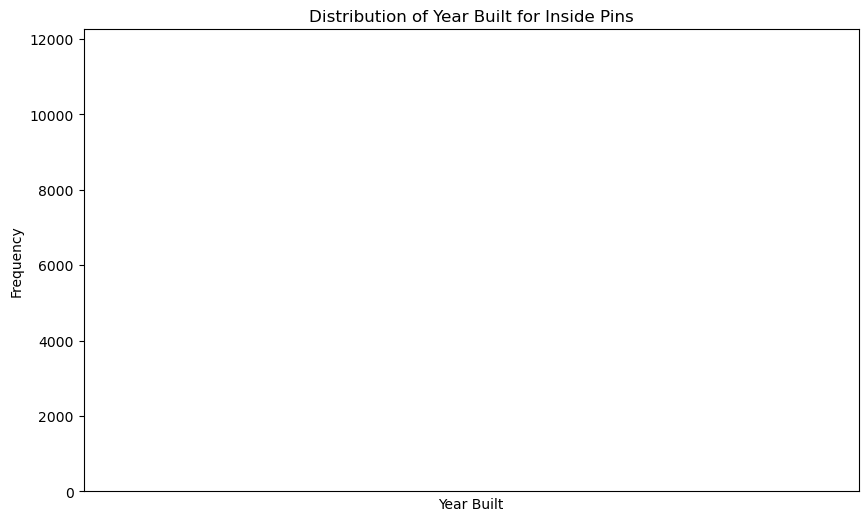

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot Year Built distribution |with specified bins
plt.figure(figsize=(10,6))
sns.histplot(df['year_built'], bins=30, kde=True)

# Set x-axis limits and labels to focus on the range of year_built (1900 to 2025)
plt.xlim(1800, 2030)
plt.title("Distribution of Year Built for Inside Pins")
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.show()

In [35]:
# Construction Quality & Repair Condition distribution
print("\nConstruction Quality Distribution:")
print(df['construction_quality'].value_counts())


Construction Quality Distribution:
construction_quality
Average                 161048
Deluxe                    1994
Poor                       258
construction_quality        55
Name: count, dtype: int64


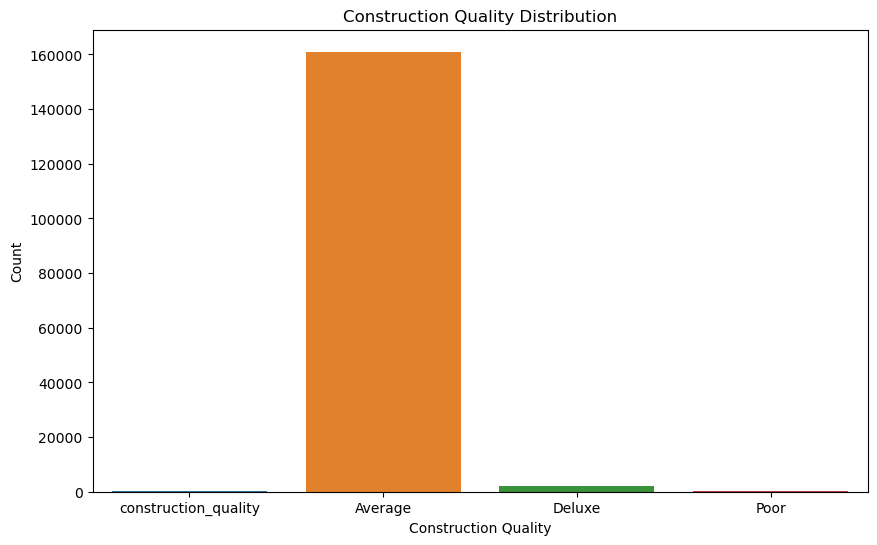

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='construction_quality', data=df)
plt.title("Construction Quality Distribution")
plt.xlabel("Construction Quality")
plt.ylabel("Count")
plt.show()


Repair Condition Distribution:
repair_condition
Average             156776
Above Average         2676
Below Average         2548
repair_condition        55
Name: count, dtype: int64


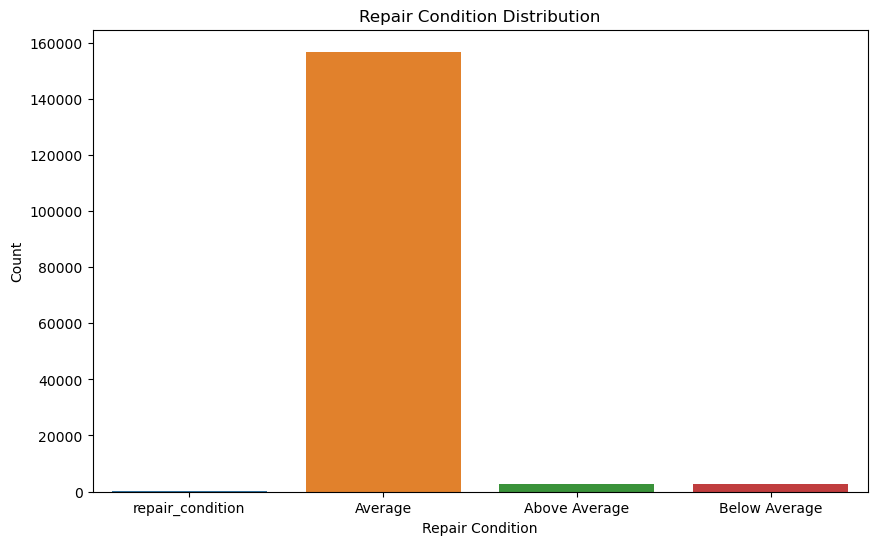

In [38]:
print("\nRepair Condition Distribution:")
print(df['repair_condition'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(x='repair_condition', data=df)
plt.title("Repair Condition Distribution")
plt.xlabel("Repair Condition")
plt.ylabel("Count")
plt.show()

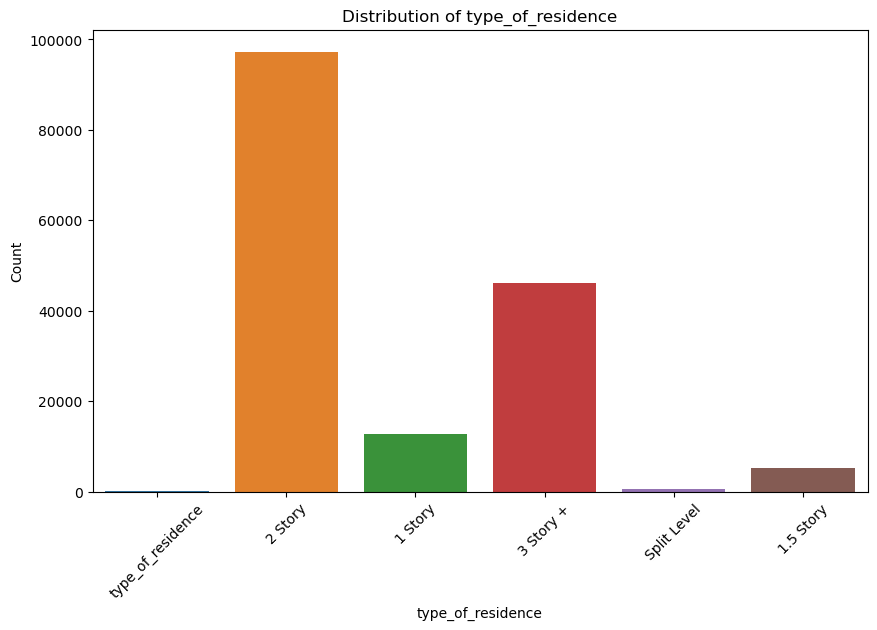

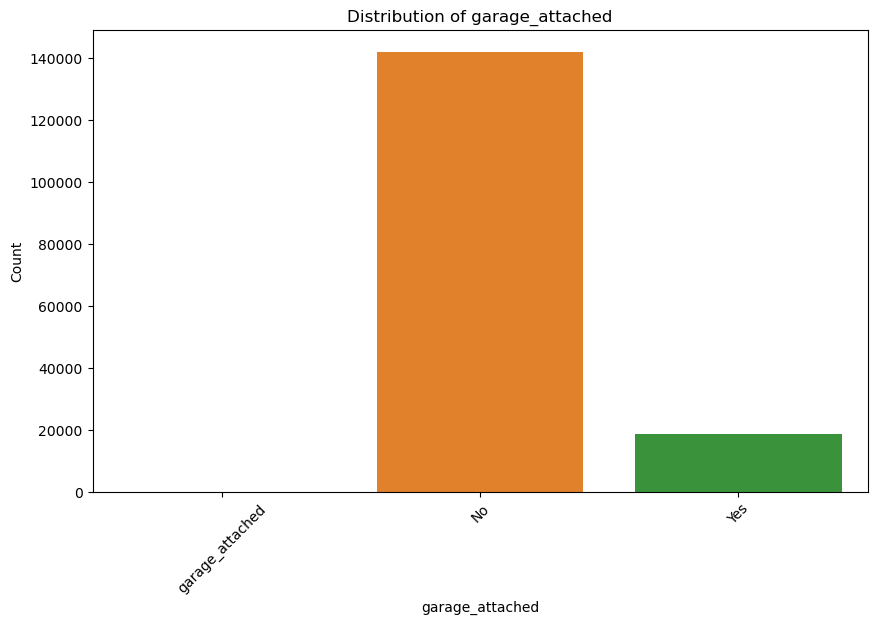

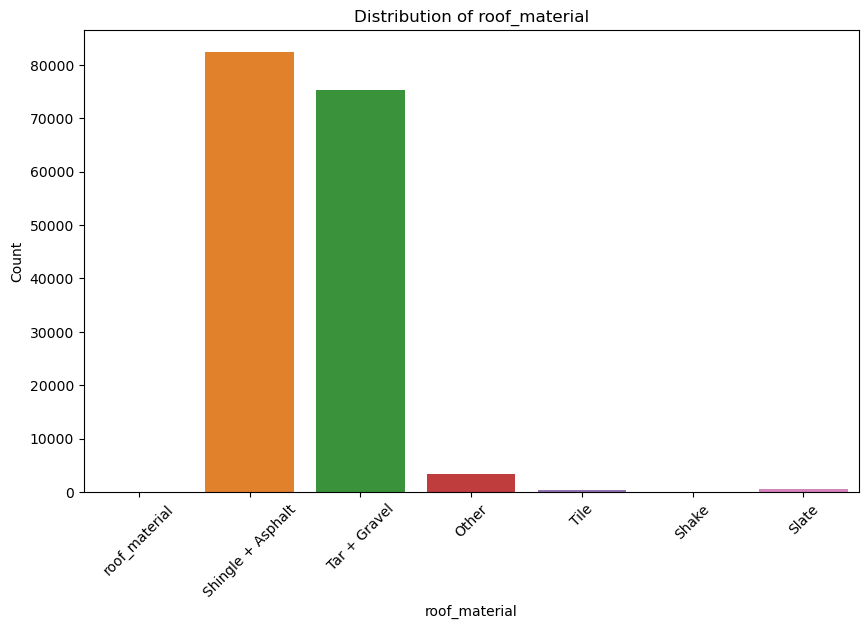

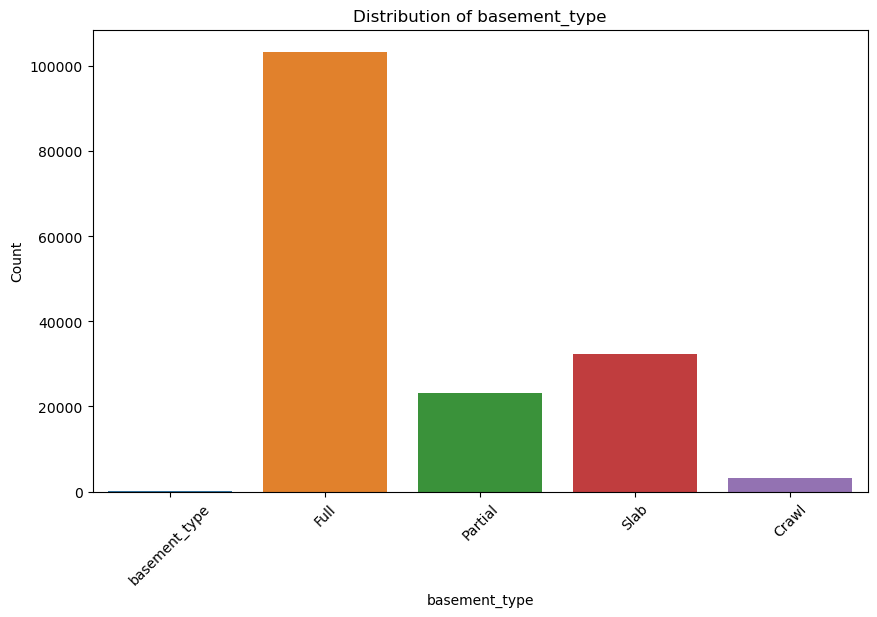

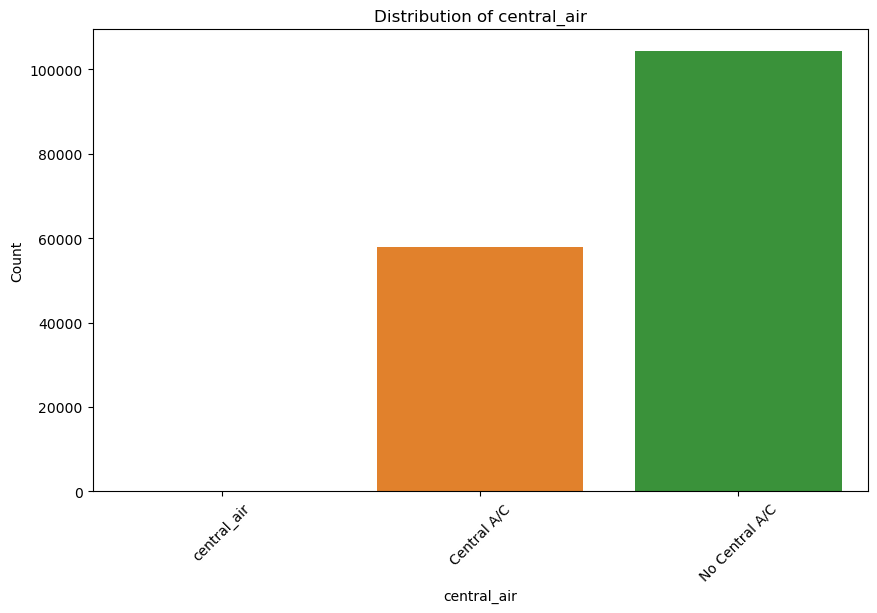

In [39]:
# 4. Categorical Variables Analysis
categorical_columns = ['type_of_residence', 'garage_attached', 'roof_material', 'basement_type', 'central_air']

# Plot distribution of categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [40]:
# 5. Generate Summary of Insights
print("\nKey Insights:")
print(f"- Average building square footage: {df['building_sqft'].mean()} sq ft")
print(f"- Average number of bedrooms: {df['num_bedrooms'].mean()}")
print(f"- Proportion with garages: {df['garage_attached'].value_counts(normalize=True).get('Yes', 0)}")
print(f"- Proportion with central air: {df['central_air'].value_counts(normalize=True).get('Yes', 0)}")


Key Insights:


TypeError: Could not convert building_sqftbuilding_sqftbuilding_sqftbuilding_sqftbuilding_sqftbuilding_sqft47531306442574664827538310051536916372053875387118012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280120012001200120012801280128012801280128012801280128012801280128012801280128012806850518838905188592532752420355220283472389457325732584027802780278027803987307236862550250239523514376540183744building_sqft1254417030301857240039602652427228902890396939696200620030289609601275127514001400140013881388138814001400831012261226123494694694612261226122616001600133913391339132319741974357735773853377337702393239323932393239323902390239024403421342134213421342110974616974593367048511577304050231281128112811281160316031603254859166363636387033903392693514361463799603314341848664866213214981494163839821288128812884989128834971456458618292026374616081608657614081408216114083624448493279949554056075365447646922186311124302430326221902866269431582795274227423671778929342114255236963846417238423842378037803646368830784602108226403007379337936882323012899771559858501826431608240048003772137821142104415637034869486930261968864086403627214820912104209120912091210421042104210420421968705550812181209138523462128413844278427847043816442436769583304330427562304237678751528307611272120455124565250525049804524769948271862411115901512130029321152115211521152136420441855524162013066251163043336145242994393450344704284439546473380137813721315304830473047522052205310646149805179499525592930244624321792177917481748173517791776218621862186218621861776120010623825382538251116111611161116111613461346516450344857496250344704776661501244124412441244113411341134113411341137113711371137128611611161114711471147114711471244124411341134116711671167111351995199659768196387301855651280120012381447140313632631107010701200120012001332518451841379137913791379151516339309309559551458137815111334125012471092132310961041251013791379139013903421339452771320336014631352267942512878110911091109150113773289263414661490146614661000355896656315136369334214638459337503827323632621919625560843500314048633667579249654918452994614957522588061975677522352231178117811781178124827752072245818541602162020921395286024271537220413831271366426372628263726282628262826372628262826373083309030843090308330843090308430833084309030843083308430903083308430833084309030832628263726282637262826282628263726282637262841222398385042603631969110721180264035413452428747432448245433973960180316994814241226561956195543534848493827903427148630894896491729002966342847934989268838857038136913693056272050912800134740775899516950855249596753945940725013900139005940321239784491319228322256283229124416512158242600127017183134322228284160416030841120322614651270190518822984481243501140814964043493850222768236221573300423930721346279925141324261044522526130312513953280225622142142840044004371036583219183816671115505938422017103211814272427225623068306830684295267427202668266722422996372837264734335640132867259226882612245039162744315028222822369441304362254449828547253195562520612909949299722097362216561400140014001400638892541409083162672317827721400140014001400964291833436712541834680140014001400140014561532178221261604178214504392651656601055411982117571315129012901290129013351335129012901290129013356854147614583114741663578590933035362692226012521248125212485630361013101144131013101310120012001200120012001200120012001200120012001200120012001200120012001200120012008736988212601260126012601260488416882078344820268286436136844445917436515572-16450582021478814220899156449201734822384260028243382354772751260120012001200141111181180120011411400140014001400311218802675232824101275170418043969114011401160121611387347766276622636660074814707521143084797547549656366489053616643607642514326439443944394607253791832364829935859791936064383687460375674487251544423530128091680381930691040573960903532371811182570370564872358358361514371813502188252025205876502550026663572545295325100609686710743263348334814041116111613801404892900423921552209606915126263609712721246124612721092109210921092109210921092388838781219121912191219387822051102936100810821082108222509041131143848478643962305784644648753332136471894120189022004000178722595223517451745241523351741143116111611143121012101210100811441144117611441144114411441176114411441152115211681152116811521148120011641164114811481152115211681168115211521152115211681168115211521240124012401240124012401240124012401240124012401240124012401240124012401240124012401240124012401240124012401240124012407044462957204113389235973597359735583597431640324113483355925592720629863936442135824421368484181494153223841423269548763897380135493549380038974120913832853711394231442590314431442590261052572480492646686459180018001872-146071102103010301030103010309509341130928112294437531647173224642400240030862764192622561200240041582400297223005760336827082596238222791264230413561402263425422016219420862499107223282536105631121860187491521382400944483281248139912862398335733573357876346202477334811501150115011501150743565605505268726872687268713241324129812981298129827548084606061208310182021243029620729523168318630791136113611361136113611361010617821550178221384036218619802256699325526029114411442873197414961964177620261876189924652490377429642208220825142851419211850113301408140814081408140820125007156627382664266411701170117011701170117011701170354428502975296033362676257213481348134813481565124812481248124816002816144212161216121612161216121657177500210023282860639415722808444516002692319223271584224417764335120099099092103474192652752154262216129884905313414086489264223902390239023123040134448241742146314631463146314639466923066152763292629264502142718491567182936662610281241802028962137757861928109728592556963785533534912801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012001200120012001200120042676352129128742231502219863128192642964250-1332613261326132613261326-138505234277827782762277879748381574238407010478465085198186040512440137413741374110212001200120012001200120012005489320016641800136913411341134113411369813923878936262626261884219215841632200813261326130813081320132013201320150813081320132013681368231613881388138813881615191420503687312442782640320731997068-144001924192438584012580255861364129812981298129811481148114811481148114814281380138013801380138016131306198411561840211220672067209721062067206721781320131415041110121693919941717440024651824225411108072180152082172978833731153114277116781677167716771677167721601047110216281670152010921732128820721764266519361980197624801160116011601160116011601160116011601160116011601160116015841250271079653759992397639763976397647253991480565654001882438447704795641448993287625151485304483964052512529849681452421850825896310025765163459345932916498040084845459341641119355712894531326583561429647674572463246872488244812152624238433242856198042003067279628112476489650494659484812152574315227682656312622423831374025044704269025644395450331855496521750435466546024642581460846264830481228122212332521222384291025122898110511051105110511055310492939843100374411598249454272898277439952560300829932088454523682690316029133032449253015761249641913996389140203112240031992692301331513192189218925100924638193088401441564202449628163246329244943080586227982800479422562464331445002600-1127125285232458225282666275813862964123925008796490054401200422415611740129012901290129012901290131212971297129712971392124612461339133912491249124949001732180949005028502850462921124814381265143010541334242710951095109510951171178520271256129013161334145625204200120054882628220339182594368137921550219618152376340823822630686724785438397927503219658213001726332731683269198629742304391747104194414035282234278627862770266031844778321365598886518458644150583113623178439753433488253221943477461754355737384733366471445549294356374537544653568022802295240411764261242637543996283424622604360240293702469511761182168016483547225626642664265827542616263426644863464637653051298411311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113161743916262867862008200814401876909630161236017841764228620903510151660782615172017843255153020582480401911628798621951059227645247022362412117411741174117411741986492837541632197853202916110001988227467202416343234073332282023172314-1344023152315736827844647422049105041265825842468331429983703266414402368291824782478299667261104385081920872322042885113111311131113111311131113111311131113111311131113111313151823821528150015001500150015001850199419941874188018082024223819371870187018701870187019372037726029867318384331811053813961396139613961396149212061206120612061206120654991206313919002448216029402253228122182340234021552155215521551681168116811681168116811025437144972250039004650570944034206415052986729529878035000188415641079107911401079107918211835340255716063251639261964510352626421616235605436107282648334628083364519632003395287124481428142813001300818647822694977482953782386767848427685219847341963033482088779046197109889796812706286854967473866824004710471087361080069536726731425607847932013441380138013801380421244783932686776991064459213082732212288940227522865143414341434143414341434143414343497437143934371437137613763367143713497489539455625604865206438653465344125604863516351635145006229622962296510622962296492657065706570657065706570657065706570657063516351635163516351635163516368691463686300630063006300630063516351635163516351635163517032630063516288630063006300635163516351635163516570657065706351635163516351635163516351635165046088608860886088608865046504622863006300630063006300630063006300630063166316631660906316631863166898631637506316631663166318612161214365436543654365436538474365390043654365436543506351635163516351635163516351667866786678662466246570449820086864976868646864686468646864686468646864686468643683470933075294327032703270327053702786325025693410343225692569257726774758327631752235295131415474492538263826275026252200327824722200220022003422446244623422210022301528152840844084408434002376191098969896989698963140244824483534349834984320432059754320432050405447450049682104405540552875572521504458384392637203015146088082218003494152016609732470484400-122446008600860085703592434562696367438721050241423661097643229642964524930443044304441313044304430441366250863675677567950950950625962592249292338389003149808850228233622539226132669506007329120982450640564052105488356583000920292023102537053702244250015474686296629662585602810201190930319213057802715323643742784135633182448150041168804736416935668022123004630290014301482194121276480648032407364804187435055272403412555105922592757725772153625762945363870203300123617503150536012225940212620532126205321263267233023302499249926281464819081907417501650161254224420802626building_sqft25621279111111231117170711731390246626486468517532873287495911511325299034174416478829824781129910861086509054301041104110416749350013781378137813561344230434403332132617985559176612961450145037523808520549921496170714821610151115113235139712241224142513651365136514141288162816281628162816281628162824875042504298104158481048102235312726262784631358625916593835523783372752955295377237724020711029284158509461395574636641584373402055953840403031985346346953463360588951764365432635825247540940172832337950434910918451246318442278946712703611621909305618473052111813464437443721373374148414621484184934941883506230403300347634763388338831053524146434281844199411522121290433003345526552655013526550833492216015001276144318481892175119741751175117701778225949954577332646024098304233161808180834121770195517592796119815024312461733745385550547243198382220521955210556585979357857303578661890307067274036124592361237383532303038225334465887118880270126343377497138403582262526253300297529754631463133265703392234503354335444152968459657573961396139615782696246873278517246763211209120913300631763172091209110801080108010801250361814523481495091352912598259046789582046836699534957335733342030639666885013691369555939604242499256621788440144434785518738284562629462551838239016274747625560464760492857003900384013431343134313431343102118371837136341744212482437152454134212241224122436813690310812246381221222124266498543474964254433754300400043762860401223842800313031425358308418804920158853194680539730431850143645422706204011003548566031725736596153145868536068403004276821924227304212784707423669275358368865521215223651881529143814541506670813021460541267225844113323686259519622911987516053465011339428043802-1137242934383491150071450217114343510297636312472502245344329731323013825400575723982398279628042524292123842746235697531293463446342492365534821367214013491269586649953280286629282640209354333083205718514540254099031406448644864486355472305778754857093375328627063780715550613235418551574628536149683609719171915015514849476318587749282192528914225289424842243382334014701064292843502241601351154216229216161616293823982788304026382646385833223615248027662664319630123421413140983605241436882534253428861386131546003416244624462446244638553488551129604050275278514248391012242964162515922837145945624419115014471374107410747020355234005600783478343699604434024621156827062894360041341325013250132504761202027122492356035604700409857975797345628173279274633044975347629761714171449214658265645481128134411282858478850763840279626722670267227565373537366515373464448363984150320652065140014001400140051444512218927653040304027102416344634463455310049146581236423642473247339622250340829105067667227265205520552052598247029222964230049474740563734714674286832004275420828364242286912511100110034563164349012151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151061106110611061106110611061106110611061106110611061106110611061106110611061106121432860288728873279288732953279299729102887288728873279320432952920288728872860320432953279320028603016326930162920327932543295301628872860323660856823130227722772277227722772277284828482848284833411942154415441544194215441544194215441544194221941994199419941994199419942194199419941994219419941994199421942194199419941994199421941994199419942194216121941994199419941994199421941994199419941994219419941994199419942194199419941994199419942194219419941994199419941994219421941994199419941994199421942194199419941994199419942194219419941994199421941994199419941994219419941994199419441994219419421554155419421942155415541942194219421554155419421942154415441942219419941994199419942194230221941994199419941994199421946034603446083371360046083371777012925750675062662273230202932325021995167290429046379562583528352700070003451436011076954495441107611076449041113147-1-126862654147621682003281848044284428419732493278322431803431158898017004880362411841778122229311021193527632146112321123211232112321123240051481306139611311131113111311131113111311127112711271127112711271100012001894567161102426818154683924222535845087552678325791540215421548407201403945990122840141920605817472068734873487100710027402120-1284140304380217743804380111614404480448061166116369436943896215820853586-13013423429162916963556860721053010530105303648364813492900375215848848843396248024804268357524323610361026962696324528085816211032192497103668005258629624386180266831206180267037502700243135002100190428002944510626643300422455581469209023723922375032733763376337633763103322091000100024802480248024802480336033601087119758805880399032313558540328133450350212093222320099099010134316378047333330421642162120333533354183328727283378230432394199378433442120356131604142495899034997123595841833882500532393272352449342882118575007680448052363119144912501708417054103859115517281320382836112784278495999599336639223922392230922492670342334233508590040083000140522741346494021941314213692363404336910202878363236321036217013320296036002273240022711301-11913798673275221776161220661741102728195649708111121112433828904210213515874625627018723408777245153697244046502150583825683842235224603143248425501306130613061306130613061306130613061306130613061076105010501050105010501050105010762696237122962300816622003080312031203332108031652261367241134636304023844230821725221210204020352121247830623784209429581840-1195815781578157815781578157815781578157815781748200015781578157815781578157815781578157815781748195817481748157815781536274330882677308830323612building_sqft-13716176444515230437773498101646383292635422807456411241124112-16699357446082836215512002501242722323689270439685196240550001270-1490035271764-127643802380243502493460836664500415043584866826982699895109164243066242499423808112216613734739222069505760576020743059218521853059199324841993205021082124232022082384220835663132224022402240313624291036103610361036103610361036103610361036103610361036103610361036103610361036103610361036103610368403150697872817281728116501650132418151485384038402746384039843984398439541209224022406600336039243924392439243924404314171304129212922200549119281886179811963096168022481808729069361440187083092315161170108416001059206883024003234355234702590259022802280586953801150105510551327105511503048260423262712252824802608258826402515135613561356135613561356135630001076107610761076107610761076107610761076107610761076107610761076107610761076107610761248124812481316131612481248131613161248124812481248131613161248124813161316124812481248217020942598249624262400238646685157591228772860584625005720572013861386142518001262158711921152298629762976295031563132313231323132313235773132313231323132407248861137258613750334689193874214685005604546050423153315358868360486855603150315029942860102482916396337382696482440424875401537897008127422183066438931502280332236212609188629472912107420732064162212329891028902516931823127269611852380271254421109121831204251411623323806132095615101189154828801848124814701247114014513004248025902648120135433451776123664065344944614338453628623951290626522900456345635106429684694374464440568520434442361039849809138834376446789756049685040254424802912397839632694425452267992297645685308699669969414617720248416897668443114581721902180617438761122037502292406824084332250247822474401441914356895224464300200512581911138312021056450024773950356776322103385225644104421250884320562440324161412870545217551154604166546054605452386145482392414032853494401439544014408044434014248938304740373528193642-1502529967137609965554971673167318843690039324200681068043936510049084311292839846717504347344395137013702860138313831453145337864011643232123744486011641164117811641164116411641164122236393646372336392400417321542970220022002246231031203120441739403476249424281140114011401140114011401320125427822184255424062610261030323222225072002330233023302330387331263029589144493435658531906888464424142468256038524080253231723711250833969280438825722692115013076307244811921175117511751334121652116212532121441964242024201964214491506396427526584254765281922011229542961668407890230634623308674-17833783332402704264039765686966184826494582238891513971449137674016647464202278785748346048391704208220402868249616561776346021162116211621162116234823482496226122612261226122612261226122612261226122612062206222612261226122612261226122613106234823482348245234025794-1256225282450243205700392159083146425012500-1782430009270594625672728570082984765325450602800742641272600213437503310122564389516269842424125460404604003250412540189138270055946720-145002200420613125508451638743483-15902649233152146214664684281385232684532307223321664240033903390641325202520677622004020422135492186270327544222201031503456642095395398113537533840426639552400335733572100308526484588608422421796203419944323322941314296696027507042040195656722052205269571924192419241100175219924530206236125362220022005772740265035003550922551121344356023182772331818246085445043501344130612601344106439603332390661536153324274043768376884783405340583398441724186425413183000381221902228203423763630481826931837419826165808154934442686210421842376280839302554154522602268406520292040310221421700157515113896162326005500108485370525889771824106811361152347616422824488440641108652228761264103810209931161288824301664402659922756315845782576501081901798127130483048304826982698405626702494496133504897-1307464863744110853143262225082556272855784488233444574860579439606072350033062851248241942490408035082058322431562836602372244131180025082992447644764356349449562296865441631103070383049963650484435784366932493249337933721942436340427443150392022004824298023144518240855214329465949865007433248844878307243504584275441733220405845723092230459492381968167214529934190541440984098409853084098782156378216157821564782371736452692112026281359363423462392333619322530102501025010250570357002182508410404413064862362286076802662336624483114355224162676279874642966254914962090160436962672267228944200491432653049257427823864432628924947381635542616289023872496240024962408274031882462400246630368535239225562304237225122312304822862600229629282778236026381752272039242430253819041512546026562668258020962658190423282108159219047311924217776252581258133972880303226782856290427694586268127362540246427304385271224621660148816603690575153705160226226241408140814722143140814721408147214725994273221942961295821926205143532592982220030163886477654005230221822182218221817562218236222962502212425023918192633203052523639823982398239823674-151302054216886708670330471103849218431503901210821464130367347243192396432742480290011190111903800250050002480-1335053764355230414781560120045291320449716952628434871074731701420149411753275243658583248136014322669642471823465366036603708364842012590407440629413941345554539279823004802275215375832236015041320630134052900416328805041339634603652383626322640492749274420208823103948243224441719144820841708432922671428282228602932141014561404145421567265823525719865929172581725817258238823762078266226843840241232464051650447746343250676471038022488560856085608820512527104375405042007591409626333480141981820502024384453283025922260437821282534470321846760340010088859885948245487243821182118211821182841294321182118211819689609782046204625563680255624244898489819569788683297339629822982298229823062298232004452445244529782645237729902008163822553472225547372116840200625973644289826352520437733211980672195854726400-151363627300135501750110880076753255289713962132520421758770077002580245913441080458711742102111880822286381421482726834883488348-15085508522002056205628522050205630372784289243782200556639963030481948191554828-1113911391428151217642168169124297186396033488141933-1138322377156713493810833204457822504130516224203388250865856662274535701408653107725051483182110651613409661521940175021201188792792118878129462293520820922738241026192398246814541454145414541454145414545795174283812001120120012001200120012001200120012001200120012001200120012001200120012001200120012005880430025562500250026863496375030482834435314751475147514751475382964605034475048202734580037663336199222201982119311931193119311931193308423765873317437803780709580553000636919602479170027202688425614203256161421061235132012351235123512351237123712371237123712377615225216361626426625802268211242483040279615381629111622762088198303254-12048204820482048204820482048204820482048204820482048204820482048864028602098110424042404407433974643464342154215309336594572900022004962357030003537532754195332250814511451145114511451145114511451145114511451145128082742430444665969335425762918844884481819686668664540237651952705270527052705270527052705270527052705270527052705270527052705270527052705270527052705270527052705270527052705270523642364108243644620749893000247025252489-1-14662490128622520415026206048604845303016292157203658390725142168383611333250034261838370418402484184018403074381913205984295028502850103104867412452454210337633003100658029425981179419483733373337334018373337332432243224323203280039253640343328832700255637523188408346862460258025962300570653922916330060436075477641374236423630304038394169123182250084962700315011133111811181698266826683899473219135686481048105725552764641058761260756075394239423942100040584058405840582304230487425255239579626283847278727873912376239125580227337492678599117044080403340337168563654915636146817282640217620005792331723203000240023502354235023542368236838173817396639663050373621602800493949396163605349202876-12084735073505622562233006006407688911101904180823912110247224402440244031322440244024402440247224722440244024403132244024402440244024723773377331183419139681396835502420765839143676367936793679648828024160582443002050256418005505550555335533449044908674729395838533853892489241892268457865786578625002475122463913028659037443576277831102780274227783332357629263861391629942760276027602760276027602760276027602760276027602939280628064159380715541717276827162768176826602856285618381000100010102495314568178001032089775675623043853385356945694120019102116601027003713270027002584917441504165416541651621120712742630-159494590809628266543654965432808280828082808270043701271230860006000394239424652268478936210621037906365342069546954347641503048900760102476076016502806167754005400536053603400241531535184101274050335097664206452347004900448849004488235223525506405040501949497039614957540067402328116114651465146514651465146514961465146514961465146514651465146514652784278414081408140813201008124883613218141412378537592247671643924392100003301658732826572665066505802368930001078392039203990396544824482249634742025385638564237122212223850325030004500514016182983300023126558290029923000290032242387852040054005120719005510551028351728109842123150342243645186105623302992248030802480256021929203350289995783298320179987998228846222288109423363875803205044883037207755871716112141121431001408202415552712385046521462409623162316317450673197676625377087586425762706390046562708149248863332364025042344250423883338222213963425126771674703470397203225664030481720650410784800274025921425113221712336233623963750170837193993320226572851285136073434320221563975617426573587310910047421242124212396039074876612411754877300024001584478226712728383522224744294815684156841568415684156844178241724251798380034806643664370807080670879251973261-1-130142900712137038992715110014782211215938541366378026302499217221602160362057832970973012330360921745583487575172789176027607200172869104970729433484460115011601760210230933596265241866760706710902302215219001420222122008001232139606201516611844118441184491247371536751344722448217228262750360916502452245221752570151918451215148514081920240024722472411655104454366317644176449280176443068402047321810538858114608571272061144222350071251219912966175101021642148558023543632-17096270025123141387220001658234223425572448031681022317001140278927762664266426641768266415521768266417681998201920192019201920192057205720572057205720572057205720572057205720572057205720572486248620922064209220642486209224862092209224862092248621022102210221022102201221022102210221022102210221022102210221022102210221024420442048881250042803654238623864969990311448841795193247444801162622341807180718072234180722341807163322341626162616261626162616261626162619891989198919891989196219441944194419441944194419441944194417822545142014121871103719071494142912552832990147613051148129713051148130514761476130511481297129711481305147614761305114812971297114813051476147612971148114814761476114811481297147614761305114811481297147612321612154814961496106298429615608122851005100982698264336130015601300130013211321130013001300130013001321132115601560156015601560130013211300130013001300130013001300130013001300130013001300130012881494128814941494149413001300132213281300130013001321346725346386218464857456587853004814-11805936936936123612365627106010601060494420502106210621062106145616391401140114011401163916391639140114011401140114011639163917331400212621261780140014001733140014002126140014001733137613761376137617801733140021261401140014001733140014002126212614001733140114011401140114011639163916391401137613761376163914561376137613761376178017331400212621261400140017331400140021262126140017331733140021262126140014001733140014002126212614001733178013761376137613761780173314002126212614001400173314001400212621261400173333422236553823961773296060616061861180287310390103902068228029242609210032003340255614002286381923401381277031426962146820243866517217207260-18504634148043418784378958885822400838008355835583558355835583558355-1642030503498491849183962396289553000415533746060162632451626208021621324313243132431324331024370437074401980140331422036412410022608544096808460-1-169363582835656766242496239502620201627601036810368469224101856539561743640104010004582360026346604362041283418129801298035874274775123763961454270111639163916391639163916391639163916391639104625886588660484161285423222865526728621892278424841523220019362173233264656465101229982002594027422194281027002875191823003158178071943700307252955730218422883123158430103384176429142259386510614106143960372036963245405327509409767243001096864864109686410968648641096864109686486410968648641096864109686486410968641096864864109610968648641096864109686486410968641096864864109686486410968641096864864109686410968648641096building_sqft232918261452880151191323179131365202224132537181523323090293451922910926734302436389821272127582858282662387233043836124662184446421843276485042756042276836442473172522182730186148001656307899223365544308017207181656285717341995224017341734156515651565156515431587158715431543154315871587154315651565156515651565156515651565154315431543154315871587154315431543156515651565156585298529852924522140217223643748843196802200312052096260225413984707470719368940321226529687185302046563300945121912711520924136871414111602170122442344230223302330257125712159215921592159257125712159257125712159215925712159215925712159153015301530153015301530153015301530153015301530153015301530153015662571215921592159215921592571236223622362216621662362236223622362216621662362236223622044768160063783304430443044301430443014304430443014304430443014304430143044301430443044304430443014304430443014526611508115081131011310113107530160025042002440025762920410772707270727074227422742274223720232417621762176217621762232417621762176217621762232423242324232417621762176217621762232423241762232423241762176217621762176223241982198219821982198219821982198219821982198219821982198219821982198219821982196219621962196221361874186816964779665066502870200049206477574430121900199884076217152238424272464316820642465226133753168222021564725977168012024576233244003699448319802751270978205292471223683138652818063232175439201066932793275880412840501020010200211039663966304360001848256315321532153215321532153215321532153215321808222018081808180818082494180815321808153215321808180815321532153215321532153215321808153215321532153215321532153215321808153218081532153215321532180818081808180818081808180818081532153215321532153215321532153215321532153215321532153215321532153215321532153219831808180818081808180818081808264918081808153215324698205822582186304830803232217232942190356461006100190815122334254549353675470014282112254135752016408401374028401120348887303648225648684044126048963032136031203888378077106243471116121692135027661608218430451428255520914000326724731170204123482294640148025813276375023623341331516382714193019622047149624721572315148322405142115223165309324124478180122623791364821301982166529204818110211001848207824643450630829223121389869662286934167226003574309629462858540031201504300017122366259235333034193234562234211422342156223421562234223468433462260024566254187630182360251860064386286026082243225625512066183222051832206621142114205119811981205123332327139511557601699246614282517466231684200174922682268226822682268226822682268226847701446184822503180318010721217193615201487503422321427155424811589241835131504175946171876120012001702321021001750175017502424175017501750175017501750175017501750220017501750175024241750175017501750175017501750163216322606163226062030203068367557429242921063131110641064158811023652515327901974182116242571135412801020217720051122112212301080354453022604168051801057145699010731168990158414401584163513441320132099099013681602990100018362427118813664136642016211210231056976153016891356381042094100309728452658402021642340595730804342674719573450-12286332724641404237223562310294277030489769152790376042603509267630344412268823927242348226262664239233872148322240412158246239762162382222262352229224247907569049443759476012801280128013041280128012801280128012801280128053504663552050856031875186424032285928082568-14738488010784949213140253430742726240631143008324842487050335438403861254624182418241820222418463821152248224813301848140418361645156014671377156045501850861886183396214825682568219626043666269026962696705623727884259826463870264027642764672826501934119135823450154540644955250028942702254827502750427542752368515242511928360076747674564153525232302084662544244270173941223624032638344723622560369034173453222428042450245024504356565838144356693640565888421412301980464936622177151215121512144018852288225029282234252523582200176646605736290827503000378361284010419822081254141520172476302139901344154021285625810030241526415264564014533145333004577626042383264063774957376225362200332848784355495052133586273639071800171629441053342218481162172225781622256831843408166839605832389522341411853246452562620084800250025001958285727501776864086402172447525103432182015982090114481144841914200260912802236165616924269246223563546256819985625276030362475587033003192285830404380408036842230202421123084114761147611476437529007086672037477580644824401908384538453588175043491812518125155215521952196025391424347427502070279420607375282935702825199821726852589173752206220622062206220622062034171515202356327678787878164311963505350517604558433132773292329232921896545137942948312424518944481834981917453268135408589930262486387024491548168222155450163243682100645618484236362554473117120038289000-1-1-12680258018481848248036082340340026462646264626461325330457722016292521402396231617941785817525024103243223622088301417001662166216622243858207610802022390056104350352426003799553316058689275087505930498930004600220045003220149536561660465035202948-13440438140323360675031662757703747003975397563683440459357103800330410000287548883388338834762350196030912720193413204484375042003713-126502592226220162304297026263024112520169242100353732341386213410742612450017042310196610028822082207020762088466420581560217258288451170127122544327422921688167253742794898101010601548248638133266214323442400166828402606271423105763440025082604196823842368236837803822258045532342357522902361303934867765776575292465230423844184214221422142214221422142214221422142214221422142214221422142214221422142214221422142214221422142214221422142214221422142907214502600339568941344334830384635303034503034270629022848268925232579325039004684184019121906190627783827255623002556365625082226-15030793267065042194472871621826110811083030575735501437676162371228156313479454334773250512752865229470823004184414031203234421434503534417536992748255622542570123965204374400138647410-1282089704002209802448244636003541616288963660-145006848450033943358363325344102272411372289029762940-14004002696106262952423269353215538422682388226823882268238823882268230123012301245124512451230123012268226823882388226822682610351822202966143012621116360622046907523357191944286047503514166937176736339224812406215823524417162427502410-1323795689568164032122462324761825848725072502625271533803030170529051428259824753600147045284528247560194656788148285100209028984114300026387250437530002943435829122848445126003338288888035844164225611088394131682912260987983965898446773915391533922172204833682080361035465592559238202720373635034760333623404192449412460852212026723691210321032794198848401148571257122832308630285435543554351536544418063444314626183100328735562066402819809661484206214491421858858317831783832383221603800168032582808120046443628165916801280254338244786231222122420210624003312192019201974174833204700367824643712330034392470354493709370415826163358283657654200420067176716249530722976264637713427-135524332154920013198285528553006129451294512945295834149778565229231607670301812302816076215617501666467629795850480013743372355042644264247331682165216521652688384538454646248241254125297448605790498749871228341616447106710667926792347134714612461252245224162843523298225034502250450033724679301637505751280048303379406457518516314192696217782319192530725387314233441810988988988924-1-1325053705370576474817481655638771027510275294425484782215222729931024635152443300223521827326732676047604760482088208378256825520552018901008295028082400240024002400356426994160375357835782160616563406470444606480631863182598353631293000455015121170465025111397191422602260329929281760390434563486648029362746650065002550133371333713337133371333728082530423626083083470326001610913026822250247440203243442036573360384139623962650059210548105484212421221663925392539802419288028806318631863182359131110002750492042631300122012202978228014232272261142991790636048391200179794266005842002212820863592359235926162429015663091240826661521128512851285128512851285128512851285128512851285128512851285128512851285128512851285128512851285128512851285128512851285202217221908190010641098274221843819704155911434447-1-1132033461510180146502578257810641356553055307874787478747874787478747874787417862794-168165908590834002058498050701080108042007421299282005000292290002750353637202132195226542471189572016681668166816681668166816681668877540511194119411941194118011801180118012521232123212529666966696661200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200787474077407740774071536630004346622862286527256029873238239923992399238036653128216620723896284220822954208229143550321024522272168010433976297610082100821008236089503536353638221866241030002288-1-115510456350007120259234522277264613001494233132833858245452444826324929762528245022142588150020642991418024822700311253021428704055202394129230261415574957492990162047784472525010401820227017601454311620287156199517471756161537063864271353182873402644431784607920021809114014081200267827242498422442241620220022002200220036681004-125861035103512601728221212484967496716281634-142624578777036718892293643052416660070954224309561462248487627003100300439002597300025002500311028212750527646724717577197504368472257467142256422842882199740022175457263054385438152533802934458218901520172081720262484190034062623452432543254220030962273112999496949629742686260015124113240575681409914099140991409914099410272028483666224625002288239025002500466819559189215003498279051405484567640243484265044961596593422282600554439942146429243685760589060004425520839303930-140984098649064902688914327161984354443503965300043404350286228621568156715671568156815671567150015671500156715671568231818481783286228621783184823182018193120182018193120182018193120182318178318481783178323182318220823182018193119311816193118161931193120182018193119311816193118161931193120182018193119311816193118161931193120182018193119311816201720181931201823182318178323182862286228622862286228622474288021424140346834681104415018862454287423022816108685001507112915607601726903616015011230920178468011282614120013601260202859252422245052411406237651601762422845575696404035613035275226501596294825531779389612001080168519202433216629792600213224321768817688176883000263211761020400535419161727172731773191262631504500-1-14387413931003050456440792513320054323892447442964046906224916069061038127535861326107017841784178463851756175638643300251434003638143834563328250025004000476028119191693919-1-19000-152401440014400539444222100969338842003570515930123387494850065446184829762928225631683168550428804020468019322280245041283371295943215175272732462526275384016332454244730801670168012921155228822881856195221242352412741279195919595182604634748753423290025703434308643203240474915323654344027262772281076252625241214521974135913609681788166316032070102039851984228014491297164912802608139212423512191821422042535532944368238650002400-181062365458644634242426244366926514844254275468875004050399027506335285170003650560667223946260013208050448364744545384240501087841462268273643143200303257604488271452052542567040003000338029183000300057727154335359753332351075501478254603338399014257041032290442602054685816800353219523307305457003400294566981100694526922512625025552537291033212797841869533444369325543175408846145206206436964896436048702880263567848850548543054044380434922498375938603912499646233159474440926836405026542654609656596475647534972142324819980000055505400412532503916262227123600633616881688239424403075276411613376342034966239784079865704416622561167295068221976197619761976197619761976197619761976197619761976197636843174262631521672183935163681369632509150435650003160685217101710171017101710171017101710513042843798200033663073235520342600680026404027216021569650132617281493149314931503292241911848234015561157180619481680840108021401380180015424194200420005261312249783321198024393550235231614944612970386288628868906890192022886000511651169905718271821368193268410764020402023424836357923522552452428803408689224002879262416935211038524908660029013077176625701990194519451945194519451945194519451990551725201584241059763300285554752650335044252508690039006900656562562469378453139364109220644155988233245402044383032221595487522881676290119021902190219021902190219021902190219021902190219021902190219029312931229012897289729019564956430983098119730982088169431008613349361635076930188018801880188018801880944094403842307823312314-14384211248714287450047903095861294826846302725442337623864677926964950277923004434390037507470397260212992380168475103330024863847324025443637227252566520362336233366276034464059102403150307634763190428440525875846024662467329117161716167217161672319212601976874542513066360210437693698136606200826352668176018881769231614502455124819021944442713682317187419602278244412603125257719001324154592425321566424726321105502822849900475216332444169823101550276619252079144818812058113322862148242019383192121631412128118627321260200223760001287211654005400279817492114328798425422338233822629091698128014402702293220041870246914781800833683363000220031582780188812101950120011523252365637893048534640832429604332164908280526551848176819702204162424081012311527501335189419321436189025811932226224382021187837801342151116561684266484004032318321202010204020701005190831442150313216791095217632402005216044625640577594534344434416483128235296008928403849306750246421152360202024807043350354135204533972102610901090109010262138583896922642728211216531232228033884190497556882992-11998174219571863192617117169543433783092295446494036346433792911245032553394358632442265256828863108281824681302130212241242124212421242124252323942299440322926238637443440648668551728172817281728172817281728172817282022179518081808180818081808180818081808346631174124309425343368506030384772427226402208707635798298646517004929221022108121230048464152390016107699228874503228721224005616302460092568461610368401560207725872091148226272304228314822074382040925175212233881178110017541440203288011602522184821571426494589821617393133002600392227062706025681702220826883483185018504542283519001760112032005616118888035403312406270766204311928144372421441854185418556704185160502140520227122625631224205043153712207185226822806981780620242136343233686417532655503849335488693950264635163796310718403884188425163165193223405400540064711936193619361960193668175085633653103168316822682200220222742460148041222002207516481600800393614762420234044831000523861093081975028642108230431801993768828801986210039797092709269126912220536862100200018482700171062501600120020241928192819281928192819281928192821522152192819281928192819281928192819281928192819281928215219281928192819284972497211907360024983300375030193840345638109750975097509256187215529001625500176454245104646636083091165633221564458423002070380118043398206824412260192811201945341625901608181028082416182031353507161551481722265066502831873610656392714634212370561201027237623168449736452120267749393323169027529320524513461431139910422266268816382712111525522880231426242760378925503442378539362795218032002595186018601760114782670building_sqft583537083942362734086034288029922295256470622429244726562253255024282863271119947821782178217821535243461120105612261900198034562585343916723489210016802538382237501904202419922635190024462798252026465214970597057500585032644285193217282041349426605970371442064920252545123437396419926352028808401680276728651152744760002798765022117970335943422946280826082808280828083931280836842543162052004720189419922880332316682394231216802274210024962345364231405302640457813936340016323600414017421150217425684320611946597000354227142226874720821776208217761776177620822082237623762376237623762421203020302030203020302376237623762030203020302376237623762376242123762082177620302376203020302376237624212376208220302030237623762030203023762421607487099515951523461468177690013201888188621005999599931802002389723202258225823202320241822582272214918722149187223511840235123511872214918722149214918722149187223511840184023511872214918722149489349861932460821193-1205614541454145414541454145413121312131213121312131214541454145414541454145414541454145414541454145414541454145414541454145414541454145414541454145414541454145414541454145414544170514151415400188022652284260028702870287028702870287028702870260021972113639851501912309627209209459401173563076021325613256529462643988268066042881-124704908510019306172551831511682176018721764232112801764192067523120832683261380134420361447244462967429753114080598645352590102681026810268237054776664666436541468160652351468285050842552262220244411419427428255-1540646263866719226003425520037319920992032003574443443024554453926182460487226335043418840642722437133682912219429904086435344042722292626502728273426684711515442987654318486054802280813321332133213326096372135044080868687002848510468481196111612431243124312431243124312431243116011601170117011701260219480547200351080771170117011701170117011704095492033576040291910713658348844794264057755999488755025451647746655620290239694686435043503322358440472908290810320521832703270292227781548226323303758634547315028158443292152263016122700396049022542517486193080272225504875933656227206312836322724451826282886303628245394279440962738295839002696280626284133301229004632711927844755253023724506181418721584222926002902275631982648198024371917195815847314206828273867324616761780436234145184416046004338471948544854300849294731297828362184194032032578245455684565496520223634279639704338136414522308256617162016189417522014297325302184227214085134509721085034177614712064153663152107250877436273452745274332545015401383250830591950363343123633219417702662325038404827196483588322832238431656327686162450-1107751890182615342117159811403400154915402370188027982052351548661764153631901624218020242400193216963828156085922416101037011888279029301724487354494863169216902700152622302344234418289717828027303978124021091969279023862516210056313828204022744101208827541968317525743420348472773882254424961764216620261138120022403245561429283765291027002430245633681468134978581715209213201260258220462526252627031994214032372800210410802618164613363017184477161242213217761532147216542590283522401330197419562270304030006910511329532962171286089024175642902582261813801740465018432238204716326087304828742382237627302730266416021982464020382676193620722316279225606741473693330042064404492944943388845647450310635463438216669787488931286883727240619202624588623764800103269126385830145001500124002516429016882939324732473247324732473546263831941792646851965679209839083308646232044826545715985760923610755103929860882334929441423933813381338133813381466210038895225443498583858282630229422945692340061382912278329122912363729653571321628005205102367401549060284352137104464375136874674631956904428446140472540442249380695725004025930050886521461743564356496236272824459344512668285629564335436243624590572731003064283066844500269877256044376066128487457863465341272252292320285648635458264028141309292448995340313221982153450046444956520252056204219021426255492366024042404376237625525472846924974415227182676310548344470600942994900397051722670300843474671530268322540538151004680262421883690279227364707648642424638402928782506248845483897439247612388415847165139455141792664359827963993430880274684697152684299403523061516151615161516107323421068107314771462136814381438143813021302130213021302130213021302130213021302130213021302130213021302130213021302130213021302130213021302130213023750404812441144124411441104246624742466246667866786229722972808921640622954214019182432700528042432363036303630171912242360236024962496249624962496249618621450145014502880308027762416249434293289215830302642268025142512289428942622282028801969269628503432390929951178127615515163930124512453938262636031325322425981601174911081452176132208706763219682917310526361962276038911206898861482104012161523169017681178156057643960297026943670713414052543238913741113133616022289351022852024238220043064121725702673280815721572157215721572157236303630707259479428276225242432108010751075241239283360382236574347286513781702185621092935165031003100614843641412342712971778634822623266227812792454673767376737332349721590160019201260286022082208250652643802151674874811361102508474856791485105613461188124211661242247059095361243820705094373421443360152621046601320176427652335165528162738273828342640270028684794399029025168288839604314324124072105277616802346291529124053142239452211228422842224214225401999352417381902336529543089195865407215254424711900617426005316330527553216281827753243269421132113211321132113211334292113211321132113211321132760198219821982198219821982317175636802064266622822282228222822282228218701759175915181759175915182437187017591759151817591759151824371848184823562368-134804543294451963780405637784943164441981034895824695449570005880231027843840539033523845419243255471593740355942399631854000737063863780480033834362396532508808399941523030-13984513014963405274247382412147223365942-1359120004106375032642214418887503852445866544281673558024874780023885060216224003408580024484264700088202084289032721669166956525253969178482177202428982842312035522920449142454446419150642646273026464081145214521452145214521452145214521950106010601060106019501446146614661748174820608358106838269674490362660236024182334241824182162254828399375512120402040204020402040204020405796235017952073340021242500747632432750265815721970181629707831386735492604297035052710302428862596249224562642410754183070135695823491260239762932351635703570357036964546466632553570357035703570357019382544306815062310231034182368834682206147275414183916202046234534102032878628264024443413428429573032319027243040387022403064250471788280376237622960208126082574284829673504244036073895267029162924292427203028284032982184380822202220232225242704270428402467175050973224165620142310257617601424234520081284241715122029290219044390286024483595630040202706226824512247408030805071349331066486369923945411865828223453370214061125378618562057414635497008231117785685450025254295429452914536-1474609669237823862378117091239123250024783468318565527509102051069141279831264800691260744800608522862812642064202784277220883146439037852848913347477375643104084518355728562844284448004477643631026918277353582668231010512405166405481650461157974797449511571178683103054541521842184117243812473520825485304200857336720393647784947799555486261-160753456229545724233183022003080557926402700236426702460468332862830794328361223112231182417481574131115741888170017001700141617001700188817001888157413111574174815741700134013401311188815342262227036903693188738127940480748072014500054361610158715381759192381489654804638703924503797413327361529901280128012411173117311731173124112411173117311731173124112411173117311731173124112411173117311731173124164958363708866567386315691492720100003591151814401479144025442272333823421528142014201420142014201528522930309450415290211891515720422042295627782160248497443659750012751275121805304118806554700810924506158984014481777448442456614061406140614061406140614061406140614061406140614063883945271002546242861565244121602100564364329360428946084608293627703318387628102810348942182856392454153576336937353576336935763446484210740805822101792179222822632207720772390207726322282179216831792174023903525939223783932440492102396239627162396239619536586562706270808876083057254834681009560036000417932159048300033212538825031162768921682173525681947165482369689466006189633001896189623282029189618802342189610502520252022003002490566007592737360295184775277012092811227491126697802578480052002355550068571748252821033210332464507947465354382451223638885315059-1499211099126030601988380220402040241427033460590038721190727768682106261083010725109712353235323532353235323532353195767274950170419473015311067902672420061644133461721873897718839798628817297046552775972481017059828172478855839661826289702460217239335322760927094896522377623842411852684750200877104251237675572987256625812442300482143970345014854900091021136113611361136113611363780291685201500150065325682105669300486010006505829563076396018202860166816205571569415278490294744253846-1211254249186101047500599910239210221022102132622308110674373122278247822162448158022662350216216294623-110122252051765295529525934536-134302578257854459498393126532457245730242457245727134818794068315310597344348330195217221722172217221722233223321722172217221722213219521722172217222332233217221722195218751875187518751875187518751875187526402001200120012700200120012001200120012001270020012001237323732373237320012189208032206245284828487829784823402340243019246666930180471102153615361536153611021536153615361189464434723511123151187030524746270629922608382521783458338327365040681380709990969299662595112215217420925766453413425382106252025202489347283521848184811574610033325727-1734419135631203619082120224235161469186210920967092588598918745336606146610935245064193234208234852116207086792700779768084734708053405228285058593750-1943882212200226222782278227822782880822124645250-164202462864344827806450033871552106831345667670814139409-14620-121721892403130661344180034962684181721261175221014081492449820644494410158975897-139591431143118912816-15140611720581966183220581832245827821824-1231348501680170016801700170016801680168030325640250839183410860330002433459010495104951214687833262824-13360501565092056205620562056205620562488375025941080406212155312248021105412300343415312651336405168450034652936186915441470-123221629105618262122306636944292284440821760313631223633197323416348321926882264309313933866127014626689152012106309680523652367505185618561856-134023282211421802161264950942840237018192066181918192050164057291578891089109306960140322651416507445581760304234562244107141561915240437976147543747544415685226612106362193484110776077602251213821382138213822512925590045972121274637213828228425506625275064286999740438237843044264392227822122010226273918354261827501870187023961864200621971720264327702952525023892554271633002052205221832052351620523462260026002600260026002719271927192719271927192719271942992394238835282714249147245761329211282970859225301577445243604650126015622660266026602660215225722657227822786556633615642306-1590057452915427520005295611035124171676667662335356733707353-15600392047374030748064896564-126244313251218621999625728806304444942962624393629233220307326642814259242004087236020944032213042166573291225082562256223762562261863212544258233172462297025562556400861652568256825682456177617761776177617766641148043102408370426644020294023493510758422712456369020401700275129142904237236906210230926422376189614913149136600424839904390402224202500230842942960830836821297679002008375040502722367339561332913329119026446364521802178226821782180400723301602366522964232294029164326202422241442140822881984216317341755175517551905-153905390569962753501343263366336264036853080372421002100316812967194848972079534020242112-111000345538923178350052664536609816244560119462544247225682568720075007500409248844092689421612161216121611817643421902190539026084758260224402440244622006975537122992271185052805040186218881874-13402245431583240152438102864280017712991220022042080236849112256602611870620034722442241622167380241229343603237636031056575620472136204721361800234023401800198819882928278422402476180523701600309644502843211213203570275024003456220427174188207620761836183628222338277425532835226832802192273921662166270721662192211165443342343426702532256828682372237224682433263437333488278430052259317329502464246424642464566356633367242623902722201616831590159040502624361029541101171223321932858254033532016213125053225299211172754350326693002210034462440385260122592153417763276424863962331487522422376268034005545396438163600545334743197246417413276124914461159240026642661214435856308469232283930250031363671457049663192371116524569372326273870416614520268821002322272414781478249033052518198236666051441653056000362034771618358039002184426344286441206031244720124002151149815391755229822861991166616961932176622622794154818422665175873922166205023301584228884696480144081148114156017752672190623541684200060722781278117881432187414762816356818681325330021983195236635493474322719741037710377277262111485394241693050272215421552206415122978197434151872265240001992140823184362693135911480604828006000175417607716168036163126361618481848633627002058225047303969292135562268232026022720209218481904147228921710359814774480194328253389343830323032612520723750889188918891-188911659426254218435119271056101642755679457560004403263213971139717363326234875250309664506450840032433689179817301730173017301730179838632220335018401600218120583300040352447561254771000159920001972646941701184200865764885526523823168592842374750375082948294550147618100364215400216621662986257643502588553254863771326934502062204934763540408441904198173417341734630026052199669613773181482504200236728984592471019003391265518394292147821562822419740503200378530163016462230291632658529452926300025422526358822522368186911222557226236562858224413201080155133802466149130942771216824064506351471551850185018501850185023642364506425622364236423642084284015071440873834972842237218082414240635884056422234212061341237262842855018902980298026662980298049374980335425012501250125013081220224242260372635442384205546521650239048454281424533392070221020622430774141142496289023865102232423922376240849054456445634083098220926842724272423101996263621352135213521352135213521352135317925182425242524252425428734614578795450113619434660764806540035573727121916282191265325274838377535202065304075834439400212781363114315001691150028142430290924812198367125422894350819743210386421961349126112551452145215002172378726722602218434603336178314983672153828322361364222082208257236334808306035363536217571866621305732073132849432944686333032245400348033782332292322342210260229002967339428762690359727543817198633222058426426303145318423082362264627181392139213921448198046912314185437482620326433893901208815602592274619342853276533482892144034812528255819443671194418602697240231192952308226942441305249915559463029222346342039663405224443334875433734322176363315842520112533852770277027704991226622263760220532592699373934013274163443543040612832533186223369813440428242823430317127731267349215911866626360952332321875231426118811881188134445004500-1431729392374313344762642385824202704347635792636283124723925478227123504290338164095311435242976275423763864276642623245201437893993417733733194381326803156249024904604264276682675252025203825330831344165333245502234374934024608453139664520505040603860405637504050375042453594266440684320412546773294424529044035353743355498265026502718275431202256636632223897342927324025401835674308364231363979293450402974383122572396239626342530387930363894361838973978244337113138374023621881315919363124238823962388309428782020-139743007132032833153295623643841149332972849216759432660374013541801302442663865256432912844321428863277354320343996301940024644786633515684751017143786342028042224289029122372194231233492269451092931254832843211211258217644495033587374354030362684264050713835335133514982322624843838264637384424372231582120431231412368256239213255-161004224166219502800252224243728280035822452285433633932273099912801280129812981690259025901440140014001440306441033549463630642016360325901386211125402783206532194557190421705975348837263442859928502556279117522248248632074592181014621182118214581440105510551055145835763556405946853440373940013504351541314165717040164176307239233100260156282961373938183120765745154200247633183553416123583996373541403180241529544414275640294152223037322941241221262872429541702606385531972162216233362336270038193819122853024267035042540174225882482301728042704622813988-130384653375029964353305643092652260029407590110253474985944524848483015081508150015081508150615081508150814501450150014501455145014501450145014401450145038103810104137718771816941750164115301518148715141481184221362148159414671687150214841497148821262052177614691488179417341632177617521782244621961606148115021487148016681487148416922184353123761918241046203714486636722468227821786775225019443313512169982334231610084075308946268676949010818200014941494149414941494167614981501134421181532153216041604160216021695-15142102033380551136758766384633559024375050011440144014401440144014401440144038843189819928532943300222821470384947043684314440866924630030306720292290195104326532422264518622722430221843522600317149602284276146523066422635141378160626561973137818681640211019892370130220742086612661261760320834202344282429312466260924252851532343954265805249385381584432763697245218923651397653343150360025482160353333722435373020412104326759948325921649322376440052116714278047614233377137718400472847282592682637581777247836516024872123764142396645284965250045758142417642938530549388406705442239483546896433203320332029721119311193111934040563572446474205222232223412232172210374013206450928540152360246424185892928533752515312627303009232730973228316813682348261031052309237531052840172215423171317141521884275045363150777411656825418545522848697308730830502658237426562958148540803908429924685403567086738212496846357980408040322874403541935412502250674452726035434184232429385928437752833960434140744050231656253675256724102410362632564482458252204884741019804848826820762284212822622940219233044253478342742902196129002976250033921928358738454209313639083084262439384713218036724992366341123037250246414020438645224522816121674702413741782298432921204916465048544821313328224390335640521883290621563547379576008400726621802880420036143270120996534860843866708504353484509397535284282367244163795384037433184268045002556417838535019355840384038410735374644401441983795393331304011417349024278357638654011354636443708228036962640302046562580264038582800280028002800254428482950847232933963418131484089264626462646443527463429248428544611406533972940250413502394244040062541383857512550313230872500267230802912251842502520459129104578255645822850262624482642361125101571380214852818186967501242141025403408248846323546219016322315241125184917748874889397427235632438558049482232192430204890404421843985308435551090324335202698262427822243231323882398257641661843398258483796400337953235298017602496225019782784290235943570359421893964481334053192335053043136402040444255141866400257360797550314830002576-1174317431445144514451445144512751275127512751275127512751275342346674666351058502670259633853048267027663292400550613740374045222678289633082616345229243696266034403860268629062973235028123214233223323131332424302430243026264464518425924566587113302280216221802201226823042304207028531365262825922424217047322864270437772658406639654758252835952700260425003964305232662810281027324350626431642844256825682808321043772568256836123622284227542628245047162724319925023852229628942542344732502598337625992192262843152628240023402474248430422376256223762376237641044146230223026978697829281932106826821917232626123080245013252925353928283374180425731827247033103156335732621125297223181876318747184718432031802220194423352500284122563938350525802546367239532732134423443446434421003550-197434050697554053189284928872700223627653690417438642112286232302884289834421848147249141671158438552974144029923590220032125018404840483230344929123080390228922530266037021908367230873520348027305542158328642600354027002471258423823268348834663105330033002969470039185412331233123312331260755242524251503240213630842880290733912707515919253485337329073254356538323827350112932457298832633430165042622977341321684156358836522192242836501872275030662660402042753430358523202392272330472816358831183879193219712423254140664899296029802112711971191800171657314223356428972848455135912459328024521710316235202522332919654333256035283759340123391349220416543006236036304175282838403976229825803680394621662320276422263358354515843528310230033900363021001706170618741802175417632100216521652300230023002300230023002300201921652165193719221786179518791795194523004804480440505056546854687090291625002500250022431134268016502862256726483937669727342536287015751377376431421716260024684725232437781872391020002096462236502566270530273426326724622785255627722024232524302784151223422126448631262660326426824742384232443313187333474233404231002091179521567430299120161805266822802354194223074106310532403728350632085608560838804125368523762926360034033657358633503452254237892340316833904163180040203070403215843880238130003028504414684061245824582230226032441584238221151915390011012353299633723240141918723675145237083281355825563059226021942647317934922214362736202130332021842041315631201791369810258102581010428233254327064583012674880283192333146412100360022801760244825092200384035283520345524488709870987093470431237503090355629684426222348845250651610016100164205555950933068297425481944197019701970194419703308495532362620277218644507250941103968248029701592152814981498185819151498149814981498160024672496283646922000220036537215549987384952573339573957772836363726723748064740795025202520292072603713526542395399420929482671192819281972303135313189255420242658943494343657715743373837365460455625484440269174250224042395225222523102356452102954359419513528352858084543534041463993362435645432407753138640365741163130211462404542641455462795727952245424364551485440129505021475254003630476954153530198002433210621062106124312431243124312431243124312432108336136812740286025653604398034001833265248753388680429824353192016811681152036863924409532426606244434564723393849103921399355505613455139163805599379984233477723104687352847903687432939394452405083163726336637392814244125793423362827602863353526082991226829741380360814003300172817281692169216921692169214401278127812781278127812781278109017041395139513951704170413951395139517042690414042099872987230462242338249332763304817093390310232523074355134904133386737081674359034984117702951854736133657947400396086314119388838885232441036843783379242483990263438464972480237654014261237474263376938763555436248884098390064294590247248284704480044213951331844563278336137053224349621509552728348253816336032184131360327935370223425483735358216583360458131442023432049384373336337803019465627693019241634743546329415211508152115211521394597289728972897283169366039543443348443473135348436391919357031054688343234207888788868801399-120786237334833304248387227885121521633426480193560002400231060481080444275896466711671163409251132163641450736459751188444217663349353942605511381332865832116348348593021331623193716581589158915891589188667053000381923763549186734863351109764532251022887200439116204514488925523230887444160358228894809374729404544385632552566490038343672239833522743126214247138322932899411355194961458435183875247222442332348419323684363833692898448245723036472936272640701030402520358512803379321247036216736837952812406530241497357330601820915091503552229587804200550041401010010100507625004114-1404438104740385512538119702498361521082088257524122160224034022191540042112587317852614193373760005092-136743674434031254720207018741874187449686000975059265757321045292400209246128416258095746012396020171520714670234296399646347119252646178928620470153698439813041155115512801035115513041276113211551276112011341276142013004941773496159105488765972724296066204050423945004778493626908886463412384080744657545919441391175213694219601890180018001960196018901800172819604750475061141122108010801128112210801080112816025309437347866485028403960393252594749397229304731891953748802207252476660686526362620292825402629445287746750420699197738551163202962277337595508480610881540054005184239435164117575254005274205869164240648069998427166841104481178217391679167918921809180918081808180944494005501012562058140036303204326027382888385849093933290723933077622567446972208828513225169354484860794363074880284446254032869470176670912133522936450530699286641738524554474822001696169616961696242224742386426941407423200423222520714737062750250436248550219034224535391130423273707146951802206069227367782235198606377437293867379582656955449661836262231020281872552853764833628015961966199817801407160213985846693342663448262440008364424644588264552147413201320132013201320129619001900190019001900190019211921192119211921192175002730274611201264581214382606639242910325310518201516831710202854172636304232943144567714208597838933144161616161616161616161616161616161616161613441320132013442640263439273360330036303990261226762572639630402840644225006572299172275277240459296489216724404754475458864675366930813676390728764864324232425571376245897329464056096062183120108478769648877329792540504077273021003300357228112951149433602832291636574624161011301760176017041704163016301630163016301630163016301610161018101632161016103350133537347276827684914236218241824182418241824205818241824767961026153638713951395139513951395139513951395139513951499147314731473147314861447149962591650-1318734943601569059222406252915681680188819448544477043201148780049684300435952531640338435023200383634181489338663388888410053510070683592565657935594575968381218453716120612018401886188618861886188618861702355046002940741937357789177331084683418827585344289017954246527245757848498944822802240056293102722118443867329736842019315931443236197022881974365533013897364516432970246117781478290015521770299113772520344425362728248023504251395462521426290530403369319026283000315641793044304430043142265127662009340830892480205731322269276034605143247134265098400853822286363830363965215045904650430241192288264635643135124415411044155715571044129114571482146114571457148218881852185218551860172422511976210022043167435548813863247541574949146714173329359537784907425949463761376142594259425942598175817541085756699153025840699133108093265744953996852655351558155815581558155815581558155815581558155815581558155860821102466005500682531204618780677852828264525126030354060882830233231372848313736733673429062137100926713281489948967146311573503300701919802622678838721984343286374238125933005529367623542614418526383382460823763816385240574206256417603309248827091722279140867790779023902567183436812403262228235148220838332025421852085208356514481368151118351680175640501098534805400718040895352796981844081312034723354322750404434345520833194185736153740358345635259525937703047203827507426742636174064358333842811554461655592315219322140886230254545264415876415276640716084337851224762452615381400146414761408140813762202343036684116411664805067243027308736354640145524500151305949761685013120573441143491364250072246255025503620237624482056207320732056207423462346258427203228274857641006874395949319120495783203826314835284737004706396033493174357834365310502439874237259217615571206217342173216219414278427842782725222922296662277447733335-112761218127212461272430320002400232822905936319254004953261621122112211250491480139247245247399644074209332435006396424827182920435631204175417551002100210028122100428733003300204722882261229222922292729997684077406645966624443133625676279663325332163511635116351163511635116351163511635149664966561656165616504356164482684868844865276027003162231763973120554424842778314730603083182318233225386728313127238836302673206225772631201027027396731073107396739629463348340631043521271936782929552210730241138792646255644476239352832482940151236302844283218923190260171526210930683898389359134924963496347511769176917691769176917691769232323232323232323812381232323232323242824282428242824282428242813929283848071848187632463752254636001184233821926192615451926625060006100429015276425043793193292819483371260926804718210074701924157315731748233620856858220027952622170022082232328323983292602428082624275225841724278017613434348823242744249633723800258025742865303624544329427562183036558037261840171635444582182318571857284933003847371426463192328928891807229318383293233212802198341421891281376858763600180022722835331434393200325024533606396333682966285020901427233630443189249131841100257316722432282927592759426527702770293229344572749058954233660042902774494844524653333025684745-12536385233172796168017361342175229951856296426983740247531582196177421852050286040953093203228264565372519101540431220852822297216683150379623942500296218953073265826581880224461186118128618882246371852421442261626162142217229162860216026842488243219101796258040921036163831613594435227742848189240915205362836223891389121203320243860035569224022071764273039212392303626381440250727802940322530694290353829972395277829712026248417761926314926203282227230223650404235763084210031581840245110553613616503200376869322730493234503804262526522894266473237323375459003963395032582632238436443076326726432475381928963055349222832280283319683219263426342700241214311351135113511351135114313988401640721176266524002226280457263714268834303530272039411328137629243268287724702797429124931555472020351846163224082125390032703726288031093378170431681304250231981320306738223286321331773660184830323994283728562676350237983521366627382936261347605347554119441800126012601260126069513180444457123743280628562864359637131800367929504613461325831552174615521746155217461552151416801680158418041160116016801260802511554711540583373242023945478541054105754369619802950212017602520192419001659193233001902190222802709168434483429321426442576292430602283159636842691257622261664229022341360108510851085136013601085108510851360118415841360597259723975356036602548313723443220577057702675181433583227347620062250228019004969196533572988159639513951211520143084461316722585221916802475258215603069272831473147277833893130404662882906314627493174394818322656268227394908540032412662270417602519328710645550626824003589224062286228242150043153247836304063591921121590100810813888-1105001427314273472626842695381140369698214233392200379421487412257639546600-1780025321600151241592112383124843019498745264662427238611936392943907200235255823375513453524836241817242772775513602100472550002003465018303966602835501701678067802530410766777201745443772548445583294174479627643382300643503556305829544695394483875187-1276028002942221829484404328436892520269830352724290471174832247663905214291247523468411040723582384438945887276687902160448237383663336930803080142831442774699010172795390548643300273430667171348424642244180535843150320030782582265542302627297627841403267135491440153014401530150015303481283822683944168916891689168916891452774419955256373734223338324222921932209527523092644353754324347028243217804651645216227032303528193657266519511622603212897747708666201222602352416215862418349920704158282633262912393136393728235270064248244450974005312015213288836156312362239682504245924592700270027002700270031733173270027002700270027003359321434284468344934491521375167516751636762657220026323510264856991680400111602784265036132650180915593450364536603036172815845400263226554161161046501983196458843456602224242520252024994369260225745154529151285414361035744794404656993338140448141640369248974821534222542425243024602460243517402435246024602435212321232435246024602787278724602460243516591740174017401740170326202620251021111731168525105066506636313760371137113728371139002609211125102111251025102111251021112510156115611561156115611561156115612201213221182201213322012201220122012201220122012201220126432664264329022902264326642643264329022643266426432720272027202720272027202720272027202720272027202720272027202720272027202720272027202720392039203920392039203920392029962082208220822082208226342082208220822082208220822082186818412634208220822082208220822082208220822082208229982998299829982998299829982998353127232723300027233350400733892723292327233531954895483444322939403101269448141841377624900277946883785376013201270196719671967168816881688355237623762320071737173843684363086281826802400487132613314331429043781424136783032303236783678303241553032367849594290571942023741412836943694364443703918558643284623546835144902647851004200200827062097221820682288299627063267255739403500318531432318265525323996263427302968239619932376216021602296297824764056364551503576364024572551372826241969320058043902588911432114321143232963896447831920227423764609152326302632261416644560369551025009642866913660260629583129283833653997374239971554112211221122112215542777277727772777277727773610393339333933645164512929280827842792282226512792253025845520501220903867330040192200258823482348234823483024170041053198108034165348633922119210018562210189515021720281827892814281427642764278928142814281827642818281427854972466632503250325032503250325032503250325032503250325032503250325016002277226022003080350337575187420035003840683526782644276835164274299025483652860144734473264437364471293351124675025082508250831771998346039152660-1120007265150982473249025532184263426201687150982196125012501250125016782074180018001800180020742628199919991548154815481005156015481548136215601548154813622794598224573440466924293112100259405491395779753787268434113854424220271890158030541760174417202000160813156931220019802320247557362452142827691372148114813240367519744410482821412004271134654610241119322915493523252969652840022000197222004472285817282544160021462840271219201690191241401584155914491440200617011546212421242142489131345072558849153380338033804293268545835853387024152716328017603417289820753495358818782500364514211520142112211421142831142706228842093147343139063110244124263734236235712110292313442754330018901848378074282116631463141978197836721764338838892508262214961462363072002604264043623395662538973673323040281841428535931200242425233232437143713204375735392816454734713650300037983756299537111688176040012798280117223689465243053632399025963894405423844054416742783780250039832127195033023810381037754255306048582990552355232270220851005100310041281725198944835892375019561654746184113309755853900691225022400200036571606244721693456257535653569762229702860231226763007516323783855307838843158293425872587427143304330921680588058597924822142247125182702380644213114327126753186284037682671379640142160379925064114701432104426470923313822286518903622189425412550381626902659439937524026239428544092321420213236203026502744375240275184389647614801385417254192364329765223343650783696338047254188374236583586358635422175242229704044328016403276271931313936423530625098639922882100230043314980490019884785410138563071211423763656380337842800397137363024297030112478247844552502297737773777378119283284318711482114821148215338153381533846462588253729712971297127723900717659143486311898054643600361038094300185031352602341615361614161417501432158919342843215620502954203636482183175415761535158715813568359136662860509350933974364736553770366336473990372039261332133213321332133213321332133213321332133213321332133213321332133213323774377441024102410240314366240436962024380133752705536325282284257228324356-16600370812184406210051264266705923642727196425903302121854862350170033902588825065340215637590186431683951315045643172353133774507329245953305386930232080208034764762413137082427443236133843168031763423403234342916326028923146343229763213340022402708259017163100310027843060240027003938400420422009216420922836283627182204207222092819145213361336133650044263234017523575373439212619416527929714971428121118192118901886238758203640285659825982282024384042360027722562354824642259302115713410286253663014200332322592216034203035611069783500218212544365220022003200351130883812226223314149226820133564221628004749171672363133387841722376444449052580476828033030430329101169577539901221612216990252023849369763891600286024024060374520241240622002632182627482610240013730396651243686391557874973628744033714232733202317308044112376833126542100299229102336233623362564233620646633172317591693171119922562270419202016426828801680168015964090576858041528284022239021852324229282928295522903023913818281470147014701804180418281828182814701470147014701470147018281828147014701804180418281828210424832164182821962315199518281804180418281828182818282104248321641828219630552249224923612361236123612361236130552249224923612361236123612361-188014372499249924992499249924992499249924992499249923202065206523202320206523202065206520652065206520652065232031973125396428633242136049183484259241689174910286848835316380413321440289823561720617041701426171219602424171214767286345655542208252231643174295327002964208673285853234024965580198221822048215921592159215921592159215921302325232523252295229523252325232523292965352817160216619671755196717551996280117551967175519671755216619961947177319471773265826581773194717731947177319964740920170240992693261918881888188815343262226221631682168216821682112318401540208419221624162416241624276486625944535260891065176021503444403515354716136038152200451340725753469633601602128232673905391518071540938872933986195913481959195913481959193519351935193519121188191211881912195911881935193513481959134819591959134819591959191919121935118819591935193511881935193519121188118819591959195919121912134819591227146819121959134819591912191219041196119615291529152914941596149414941494149415681824149414941494152917931494159614941596159615961494149414941494149414941494149415961494149414941494149414941494149419051596149414941596159614941596149414941596159614941494232931553585305035852972340134013401340119902180218021801990199019901990199019901990227922792087208720872087208720872353202220582353205820582022235337133690260032253225330636352462246236173466376671947194283440503727338633173435353334362462246231222353202220582058205835093509202221282128322432243224322432243224322432243005468241153958398430283028495462366236379737174344395839623915375037393739459845983743750575054864412341453972417041554248418441135034475133211136330015032352547212752196108824006934246324632260219811842465210814285187219021902190219021902190219021902190219010000100002973280026403922297326483084275126692578266939783978266925782669267825322536251725842654265425842584258425362584253625842536253625362584253625842536253625842517253625325004444737022710271027102710271027102962316229622086208620862086208622472247224722473013301328643008286429522962295229622952296229252962295215581558155822472247301330134043379137913791661366136613301330132247224722472086208620862086224722472247224730133013306430643064306428652865258442524252258428652865306430644173417330643064286528652584425242522584286528653064306430643064406441483864514527833270298430052462523443344241345134852877314928774334433435363536350835083811311729963811311729684092417457756061-12365220417581918191819182098302426914641393426002352267926602047285231773630363034162870247830662442176419204410238530492992148087071090112011201120132042002800172041824032438017761776143214321547154715471547154715471547154715471547155115512143197419741974179724215598559818801050312919863798410019602187300294540414546384469306930279027902790482512532772232425002376237623762763159628982868289828682817392118552952307529382792279218901890306930694023698469842376300138181848254220903285282931962300197617302552228214093043290611521520116811681168116815863624286431743597376017671565319661182859611861182024205222692106131516323848247554392510325231501672245221802595127723111680176432655577679424784732256341751320161713201425291421721260289224008401004221258075807285120521920228019483038279617641554155423032420184029031993259843501056298819389694194316030672745226620762733282928294060347216142463220024542640277291317853172212848963482379044886000323026811920147638572988253225321277150912772728184018404206337817602766334823942252264323871428188219762996299626411947244417041608290829214284371818143202304036284827340260031781165623621560777616486204617421840-1472547745556261317512251157829882556184513502170264941253648253121654531302226851504240712609601830264928556403064160330429002931231627662028269128893262239629943967263914431443365337833224170010211596183345921358135813581358135824682860317011961632521911494221289813204779333525472333328939873000191860923431608900132090012042686170017001700170053554659546552205370537058567098275436903370220528712130269528222184154052292127276011774980297021204264101016071686137821121000314615572809207819222163185618641080187423376962256029916336542812001955123853284412479125562994107220994392370825165337420029195103544832392240202213604536441074474657213027341728432470836820328449444764866844622046806480642435334342241474222312961400158915891589184717971797158918471589158927243240237121846829516651112819113433801920177820705002132314882080480054002505254415122902198018902342800980093420324031742916168016804761240448242640119911991083179017901790179017901790179017901790179017901790777760616048008000805080005700496878122734591537842072338565701800135420221875185418541854185418541854187518751854185418541854185429285058455220402609439230241386162621626220381800133814861649164916491649234023401649164916491649177015371494149412001380337953702116207030803208-129884164231019161563-1233973527426723825361212831362136213621526160016001460405410001000100010001000100010001000-1441324643960135016121612161216121612422117601729176017601760238022401760120026552647355218882544269120801920210337503918151215122115215015401848217833492074257422223350307214400144001440014084752355230063888286822402496271025872625264628193528240223884896290712601805318237904052414030362307144029832520615636102790-1695269526952685216381720258085125072507151220322755206818865066506626145625304016741674157115891571155717551571155715711557157116741571167415571571155715711589175517554534915238461700644017983070435697862586289123645508298428385127143614361436143614362184218421842685233226881450145014501498872141312021196118712421549918152011851185119312432192228322832513225923112259251322832283297130022349233334692238223022383469233323492559959722092169216922112211216921692209220921692169221122112169216922092209216921692211221121692169220934503979397939792406199535222394146020481376137613761376147214721852185220482048185218522371185218521852237123711852185223712181218121812181218122082208991699165778361648342824273924522997194428403042113440095870343427201754175420272027175417541754175417541754202720271754175417542594202720481704170415241480148015241704170420482048170417041983198317041704204820481704170415241480148015241704170420482048170417041983198317041704204821671754175424483479280731722790324629713099307028352793260236285855585531542092225224003530269426372834263514801512272222802668242721163085690030742024336036002604330436182400240029444961168047463906456051122462397825842768250448022847368321192062235023024113219638644668564624102274349650104832232023204038400246504617237837802450623343442936480047714100410041001934826682663696200095681932698447961856242026192638301841286832683238222680354827963559207823407503330360822893678311432165680252825021776296825509243600475921827982351923785640176227032566231034873800352964926492412046623031361223092309457838724244-131732530307630763076330048132751114305113210015425080253850032507256625662405202422392278227822782278227830433043304330433025270541203294474447443179346326182918270713601792437427683148381538153139334137813341334133413341221447584758228028852885300830001710117611761176117611761176117611761176117611761176412132203370284734593654259651143998194431414114169437624920210043435760-15073460823225007215921943630221023727680252949014901259243205015217644443689323051695417547238722142245434922568525276387638500528003282336020162940525062003680649014056272030822200675284024663960390060005820305340023708311841473440414710000667230616912550035712162249535892356234124463294-1373026925819581938543880385438262880337140957933226834942121192841003601936093604692375414403572381623722372828420031125099238252371710160021401951196020042800235223521868202339833939289837463076352836433652647364733075289832882180348032453495347535745375363028003930116237241840118410802970321831281608162415803128302634913975260321303780516132802494275439075810581025822304510733903645252025202520318238033916292535853500415635403540230016001050366745154515360929683958433748803784485435534161428239161915282817222440360648894889174236844742455844682010269526183063532920751487152038344116318024963609349924723315351622442426281017822618390834253834579057391868319530722298305227604893456086086586586086586020182852997262642302334286040733495299425563311409821602142512026172016854135340417659555685433550344929492919004884255136042052205227052749249624963161170017002200244822883305382013686168616850705376302668781024121612161024102412161216102438515454516623363997439242684590335462394043362751153931267033002399270017282780230121773642332735406367271818462886443657782108274726852489429958956833507549622824428748822817366022782512555537994300342355446375475552648929402541347919863144469235013250511621404101363332742803450548674409482849682468248528203882382932024300224830661880424860635973551648352376240245064170307155784230332030402603261026102610261046112684-122803784342631485358250838022730286820644661243536963018438030261502283819403196328637503524226034102070240934983022284322883354299530332288274819873396609852297320423277552135451542684485364423124092374337734063435335644314301030603175442339603888375421584353430038323511378439792832270027004059365742902200407849053728352227322420246428604658392922802374144943993487239842353916494137383781350928082852506038903800371339303554323933305154410642303599428419353612347429862512372620024147388835542875661585322332299831754344284061987776652445525658492151504848309837261855218552382846555130469854815040402217921912179221001792179220082558212223452345234128152855257623452400234525182345184019031813165230011855257821972322931212590337250855085317632853289328933182413297032893872597732212254338831643146314631461440223914221422202423632552246017602102206623692177242217601760176017601980221620132486220021763420354333003933701829443720281945292567361742843775375023042298238419401931173133601890654837512119309424561748117937984375337665486548-167746038344955744268402638123887377440061792225633323522492168776877374932481064445008500576453135313306844505252662549453933780064054326308251753066270021014163463722526231546940003368349851983522378031213732406630241584882158438163132550255023630316037653740384465022829457123004276239835282694233239435244308058981613358638633630360049353129-1-1276055623700180027503631274027504511670463686368321330522134215633003762198724031764388056831591102831848583829572021617163341690330428144842309332962356321238763977502531954014309833600695754293276357335733402388632301482109415391222122212221222122212225076676858315598404190082484165032315722411657272484357939372826267934744018246833065378438941586022538939265736528444646840232721426804346821122135421929183360435813823714193429352391367332343527422414222880224438322160350951844548859833857836640535274512451266606744392917281838426638333891288038501072201841183680302835104042388339083861402233002730188217602464268137953975386448593960307331653676669360755625315037303712396839683105397222302232179228324104315642332135283634863760376020751851173548861932385046207560452042003630412732081125037267568796640095184363038564760446618043326-129282100678056272200339243504246929227552755130424311750175039782336244624462446244624462446244624462446244624462446149614961496149614961750151718871897187017711771177128754385244624462446244624462446244624462446244624462446213116031603160316031603160316032279232623262326232623262326391016164122202654703691255330433156315629663786421545606000576024572457304930902640318032502788224649283510189532923626314132493177196028492814210025603369305326803054180826714644459925203150219227722590210218611480180631742904299129604290448848723750214423042080192025233024374147972735259922682100109225962646459941821947351214341997376236572722189028792676321019441944194419441944194418453024207636541584259631876768163516351152115211526356648678504437273661562582483051842556395123922080194814763572321617292856312657009470947025002249501958895889377635075920183223763762301534733948326835686432898402713803864250836643883739263005920-134165625367224233339559437689209920992091900348037803132378425852240356529543716397834291742184431684340-132343780941360419024158220039484725507632763354538836203622311024271890120424114896630467654438443827602000253042003802498638524158402032123067428339073701674767474692379321793890330048157896368023562332262520503738372952072409402634614026441093623907455430662089153030632582447339002470180018041526209831681566180613601725211215632098172819142050334018681616190014492480240019441465155415521520152015201520434745494549256232002926306226111974447214402579377031213581340530006257259212844479278065226522275432623052245436023082247530302576391622002720413831233382313132103495140820801312256665225429362030364480371541001680330239603656272848753036471616802768960096009600277729323197371343344334220955145514420031283256278025782578196325782965277527756642374421023300362872516210420928622340318828363024229431773506115111511151115111511151224834721834235430953322214017282721216840801800193421522274213032203220344827012701283322593425192019331610185214593009303930283803309933483348339937053609330337804321442839404189260068444298280417641840300637053610470732611780561030361862215646551191011910561537623600211254033828336545915536-1195817341958224416364611280435284012302833793546279827982296304364431506139715685440524315561698161031534965381547133603515043134380324265205280460019582046290259374203782044173870568536634209303229882486299238992049366350373258459541223504103719902022202219904622335221504356-1-145811950395531243405282823337785559536202136520530483208454976252496237656003690421432281560218420083504573520313726188119324680616461646164656265624488254863811978152842404466168030882652167416741674167439104275354826946226622634242576171558382931402873112420277229446582240627526363651429784200584463965382503073803960449755952936613925963994447945931088611712117127184413160233940285925003020445544553498425826151479134613461695160016951479147914791560156038523556428117162327172232482704215515961596163517515102510256572554241326005321532153214297111004253571245854208222722272648418834252992299270863988882144564491231023103564431257502192352851602379509440922752314751312581409238631948313231523050245423764076301852049462213413504802231426072682205218043664240042646879862414163024700248804047107210721292107210721072107213233244132310881088108810881088108810884422398139813981398111882787204141382772216614932284504041944884282525524531285543223779168016801680168016801680205246284744622826564547561456143480324564044100255820202020202021482167596056085520489642603919720965514308-1473177675805580538403840550333603384397547564590304045211503459015601560156015031560156064134494159915991599159915991599159915991636110443301348642682160125414298654965495064378046004614339942753387298649905715561739234973498447092220198621764443336324143048249031232936453922212148615544104332377613125349422002340270067626762569556951910379542605874468937801518151815181518151815183468270925643919207024302662476139373936449120762919273826852658233141372534835535812926341630255040993731302846114811481148123811481148114811481238123811481148271632333610255986762022151429511626374444623164246745984598290878362468445744573421474047403828382838693211487244725695476293769376473153852200439667486748484037115548480014521452491575185233474610641106411064150723487563719044534458529833315237460127141356413371152115211651165115211521337505814691343146914691438146919531638156016381638907455231923132549153251920585458544095206717741810756231492616285639183743300039874043274238002121121612161160116029491790213924121952212519621962252283525088142214221422147912481407140711901407336014402707251331334434442222922292229222921946197516682231265870642614269047494749474947494412441244124412441239402916202221162827219824122352537036183618285020952430248255833241603953543358539141915156371932922938388238362184-11796308956164830382027083912750824523356699882321601228814485146503813945106451365544206494249424860532431134710276053014875496839115676522542331648433043303812451145112313300841102657212012044557502940405125852826783228425523001774788375067506155335826568850190177842243561578128518758875887586201119724628190819061265752303637368306468646867206720662266226367625962100540171467146638745843186398443485612430543054152251247456429642928563948416767043690822982296703542523565807740860781342013420134204629280919604565425544315784670469305807418434932162592059203276849254675575581250495049485182802397576050043192297244501640600864748613263842220964360342046063966264157216841365757611879269631911598585046094609510357309890989084764170198016034364453610441104411044134031014621330765358535830123153425442541944641264126412298616004930315884228422357151233828124812403684374737473764389217973470362555302244575260778624994399431971638545877638453854887476239994641105931059321969928992830904299401765746574731073101932261274705169341422202058408930751809438517947470525346203591304017282234608260946826527726403746217047232596232746115764490042155106289724613932503248834436460840141392486436904840403141184446238844913117210052322485338130215932277847522733439232751720379430592473250831763125327236288261037103782682610371037826160215681068157515781602245824583872324869673353100411004110041224848512838472542914200294641963256237840324164313427593570359151844120363044884305556539361876187618761876187618761876474945483027136025176624595621004559413747523540475226512968382441462258255036493528433634801440386419728599159157598599159157591366144013661366144013663405746474642797440038462216512924003030156615661566156615661566156615661566156601049224723916494110805048484351002860285040314024226432103886358838854557453740045135439842243987300315122758257358394871447938733559436546402528200822784893422821484648302037202204296843932250287424945616168042064577437449804980252239984788201547044094384013861386138613861386138613861386106313861386106310631386138610634485448543924540776877681660606820901896296143373179292053894731735861861735735861861735466257605832320322001240368352684708414232767410359457383103306820142912262626813410394239424052608228303230-157945020172032493468540820203642202439465481267337353876434343802244548336391689175828204660241730242569421051634082280716061606467510575373347654352466058324483466528225696569644713164425223041161110811081108110811614961186016001472355228703719423037831932132420804240312837803397472665606560123812384140444041284680455447529369369369362750936936106493651905382339733753375337533752354278035006105610537442886198019802179217921792179217921792179237823782378237822042204198021792179217922421933341324692034200013202244290437253687188030203844296420402200196031832222179322722081125043072346228919581958464432893420383429762668271412721380449844983570282438434858168024851560189023361319288048751637257530322178346827741307182421422110175619363210463719442498324041881280229727902389233021282625172013692284122220682142180619473687307752501165020002520155417943804307431722080322018901980346631852168224030242154294056587020286040653591405450461260504850402842457527702750190422472247369121047468668687467468668667464183508823632809315989018702520211338382882369137272135217821781440216037582600381652963076376334623013194926823309268826882262810449084908384884584608434922802781268920942100301439403440450054234982489297699769318026074049221554775615561549612506295221942816172927064161108812961008210733033444493045023952172081720830603040201939814326428128203339335739455026297042573469462626223260323227601995345038252030373721042424396439642434243461313931286138803349330536113309268841223446284419804800264057122516780243234661804463456643328244419405758200613781500159515501020140013862193222223882388190723882719202527043576257928163998509119232552178012721898180820291634247765124032112815371909193640202229382238221904417040753004300430043004179435903590179417943450494749412436186620941059330114073532301929522750120013308100325334983350193219501710688303935313393339341913156260026003020359427202795326327952688323450203492288317151040156012601260574620961992199219366047190644362016576030323645151616481633163321021989130813841602147030002080208020802080208020802080213620802080208023047320298022531984276024582164165618002284244828703933147016002129804450021371611259420942080236020922262230713781278127829922884214216942397239723972397439722322122225624572343163213532328241819002071246030722090134474513405220222022174350245393080205427593080316537053762527820704822213126504196238061445696384044043024302426324994-1143378244210653905390building_sqftbuilding_sqft4713359838045841378347254440240065555917680536064145475251856223189240555400241236485665322124531034418054343690117524801496920229616105540259523242928309026574984498434322814313231002400550018003126215628806264327018804686339912603758270958002880320342036333633328003150507617251559218437385508280896022661818163822324248698459715104200432954851379836622472528063213164383429409450318237492024290219326828299061022312554460304488448014283234601554184065406554763414255243002190483645331293912939287224484640299424005377338046893360359732505733384824484176330630943432547433505865460836527108-155802310254845754320536050104593220030254923700851504578628840822112310533062290275936164163408927693600246240482602451221984122286029267496288012601386541862251592298035502669660355502648403871694692291036292882288446251914300124482034203419906681668166816681516458862799307824965133379236007142937-123122208276023323036176717431743174317431743376624005793579357935793255347522662836204623226150306621524707844256585736637548754444659721505850690029445270405651874100522543623528697557234050209031748204500530063753912345060753452573958654228587435923021632446233388596144226147626768032268224831921110111011101110349285411131404105031203192230839210672224826601788274835403251233123311428288021003194430930941823590456883600105099018481848398729161325460834781892140821921740287337981675307546413381111011101110172019707038207752164632409533524623192080037568003528142867224082507154624182120167491215252280900321030881331927960418424642268884834275259691218592105158456242322348138043648462820651728268225682217247626696304014404803714584575652916134427181584162888011742171590463304163206630121925384024862214149633003428685834505904164012601886126085022464968191453765287423653765376423642364236554564983131354119051562192043021760178851841898600202498826612971927320848933312205229104380168012593174378320403110151126261540136031122646714117135192378478818992438233823382338233826202372238023722372252325083000181934051489235616804686717172026162226125010561840179414700237723722058864171621602334176029502424244632461000216031713348307246626690145856916252473049521428819278617641260143210881303987100042685274527456765676615661562455325844624704122791125523469720362756165188374436543342756228163789328223672457405616805040201244253116120013861513302416283350507667206720105070493278431758562268559834053528559810329286492618312000516651663372405064989321443219822280221655806003600351335646333923242324234238524441385244963933-1572057202608254625465880424824604154214420584174143991223102376235422902332209062015508248624202312462036522500250025003505139503538448114481144811448114481144811376232492673204621522152204017941794179432555667274229402742272425682470323110872347931782200168755361196254066513654431737364345445825405872240032643600628248002238448812000384517583024302425932800396027165544257424411914246624202216402257601152017442668505849436432720423042304436284937147357353236241221128671759122816971889227016561663924308814753006245624568196469264631684262316826703195228292410429241898216821881478138718851771178639362256353030002322232239211997237049162408249629592568904292323741997309114283200106223271392224022263658122510509921732220020781996199619961996800135037601360136013601360136013601360586942283696-1391225927163965318918481956256919566495190819564631315031622088202437517201150720111090096076011908001280163816381450193620101800442243502900393032165096517559774121288047646164320432027842678432043202472284831263374330733603832346524962496384052865787125858230250033122790240046004875-198045283405938151994255640025608407344373314396617962024236842246294373517505154136551365523222348774614883966310423005306326747765827232854123687399894266674565825024002435614804989705082283420233241222912315025201022836235423543160352818701671224917234560420023355526322027171080142628352763210090038402196693822884602396019805400417412301382207267213396721008128467218561099215678424422385127517662100271416819952138374019802920112634981508945280024962502388912325660246048127964375826402640-1519829762334-16474234028302400367632763078200420041840459011801584245043413380378438793888382038203820139024779263423082124203323042223230419621968234822441736248830502206159368217841672460039282316231623482316231623582316107720322348748450849507755152250825125430846202627234821715804270817224050370237178850340583221606150288029202635300029263778513624703554336027573600636443042772336011172365360341382904268835923656365610203055204821311838253437501746518169909022420256422984724736673663140118027001470184443332392122113871056437428922696289226222464260049801642148817391992249615094488331283832942343236453050280029802730-1559555842900290020462456241247505200440468414452484834545820494027503017280056602568264646505634415840414500442844282310446628683670286821122614397223827436257248161583120612712648243925002276259121442158227622763100323711222700270054002700260032942360303655172700163012769661729108196643362590-1289444222800262542022668252825282528340225282537252825282528252825282528252833963720580212936288655822220296435642972396045522919-11747304831102048248430722420157812871776236822502250225028582858528026002686282214343213021222976468036922288498918115374225022922640220022005900570019783724374025682968246426132700861958722910260426043960566635367404278050006000952928001888982787422796917342581910111011280013381032225632752666211261162474265442904290111020002438327632234992-133452300464043684400257239481278209631023102410231022491272921764067-1418028842956261826622592259227042406203725262482104225002520755117121006174917107402358144428131320215521361846159625481134309635982500256025683451902250826042594267430502404240473622476145217341379393232682572118822521728966345364536453626962696250596922861440115217122594278440513727220021562008136216381035148813202912270231832933156418602502154015382502177029351714198612781901276116662432124821844456271225722112210017772306237612032848108818761310393339121516225854942601468348372102285046202050205028254844189018202000204427041646131318302288188417702084204421921928156031312332594011481289123273656051296286211281128490026623184700136717602959160215841584192014641600149617281774172827621600170423702832215224562580180818251872270425622381179463538002112188026223892237742244292196087087012728642557189617527801089260012902137105648422496459835202754227022082224218222383786378656822997369644443280423636042199253820542486355196592852319525742376105043702034248335282176372033432404256938722198341865587191376027522750144015681605158215821605158215821582158215821582158215825924259626682428254225512542311426242880253236192236299623205054240021422334475220448487276637682944303031423018166417001083113833871820499662602482131424163308762133223607201421608510255025502550190238768220139824503008249624962532257630562262231691202954113825001155214522518531034044414345627843293380636362694263026881662174834063704446615841295949575189120379229722856285686282702307480733559196460122175204020942616242234563456345634563456345679862304166629242213230224962434121612161216121612161216121612161216121612161216121612161809140840632914277627721848130915905496656157421595159515951595159515951595109501095010342803194198916041946236722102282241825425240537226602432250829968628414310164255028843481178418842919343533602992324424222172177218021520240525851520255821842620838423961906403240554144246531743158252427843180171234163716167415071507150715071507150715071507150715071507150715071507150715072864175422522064287621422112401216203102692213728296029602672267231402434243426892236261024322312-1256675008064268016321564163214721865167220901320174817942880425432359318361427061878425634322144900011402408480048003657803426784107640853582234373455053747243010650252125212521252124443774232226723132260025621968237023702028260819481892122512281228122812281228122812281228122812281228122812281228122812281228122812281228122812281228291634082544260029488352359417501630163020601812330020142014242057520166664300025142586676727842784305038067254249625522454227231207841440535826005550197422002500810010081482937177315301478156379823169242382246810524211721252608121483918317436523250600028002132-19669883408525028693250202741674900191617022409225933001095081601600849032343840374429524896120612061206120612061206284426641580351035102333232838424500225244458398225417981496150415222394536321422346355835581778355835581772345634561984355835581778123212321232123212321232123212321232123212321232123212321232123212321232123212321232123212321232123212321232123212321232390040811532352819205727800272621622332316842002415193514082738136028682773290519781630207612001200215023882592950-13620345326452336235520442322232223222322232223222789232223222322232223222322232292312762502279825023649337416809089081019101974015627401668803228024082408240831022459717172220582490867740116813684176278623662786236623662596239037042390245223902646255023202320232022161944202018922020196419641888200423442344234423442246229227692684288525722112371826142614261423381972237223722372237223722480206015481536153615361536153615361536153615363567174020161632163216431649163216321632163216321192163216321632163216761920244423162372237223722472739931432306743536102317230618681848186818481868170221421702165617021582934421018622716240324602526350724083575250024604866286228622610269426942377297429743042409134134892255623962556247825572478246225562756269051643440237823782728265824252378237823782378290822602260226023372260226022542260226056944576253224741978220823262526232644882404302622022202220227762202220848601260840216455052702332228446982665246018961800193217221722172223402580264026082600280626522757271225802532281360935224249644141844345734573457345734572805291032648070301638313736441624002352240028322280450030123606283452243858440448063678507333223486284429223101330030915344591740324071838820242248221637582639510422502502444632782770234833662518294023923409233223763068392824262426190223222278237237923817292842391984432954052206490822882512444211257158715833722522362071882556233826123640406553033156445844582912304842154425450060522656249624961458274422961437208022481386300034063386769030844178247628182370268436292428242828493154315431313273340434443404375286403024325825685786328220421848310819201964255025501474147419781418152218441528152815281875152815281528158815882428125412097708067708062256225693823722372237220505460237210951312529227611463234450705713205627182904192619461970197017022262226222622262231620901468867864195526381484148421042035219478692450237824502462245623782466272424662466246631682456238424562964330025281646246427043302275625683510351015801596159634083408155215524256173231923192316831862358235831863186318631863186318639004536240023602492234023402272230424785450250048333534441027722652300817323696249628883000-131803110977117201590147014702124960322831019662094172827128402489270087622722112420041041848796184813002422198017783678105836781012133421607227221486148614821041232024442348192019923741555311701486716821261497184884421222796195887022002300361388288288288216421636882882882882882882205018921964189219643513154814087002876243812211350510622902290176043622308841510672232523215512316122614861007105296823402360223626082032164615847721582147015698678201445194819321848184815841520256814762924292424122924292424202674267426742384287428801681148322782658180011821892378011641643154016802070214021402822244813231320882882178417211675164213971512735840362725862492394822762926285636202966247435125034467216511585161731658641271246224442372244424442484244423602288236022882360968219222641947200475121786186231321607183412801280234239394928244012241368234020042371183618721872186013123064211222481432143213081308130813081308130813081308130813081308237426609012390066383780489627663678275227525827732053402550817840822592343552836588110011598537540003400220825845646494725605712321628512220198212891017265223482348844112616721890220023265001312032283130311624402440246244024407484398209124522452741724202420242012692452250044372592306024664024205221601936193633542188270421567567477471652191525182520252025202420252025202520247225261228819819819352018304812472817408228222172223222322232223222322364404020682557319921282360242416722260226947612360232023202232223247639121980193219746931407201630247922603100824502348328732214046224036282260102211002368148120542054205418402172217419591958195819581958195819582006100879683283283223342334226810602288228822882288192019203025119724661795210023602126214612601069106439339061224122415691569156929092909290958632656319517789699699699692104205421042104210422962092209220927981250134412001200120013442053237518107481288119719988928921489112024678741176149915341428135382882889880822309241120216421642200220022002200220022002200236023602360236022729461144190019001662218721621495490038662880217821782178231023102222222222663175313023093114310925621803116410681884736258245922116255022262250102010201760425022682372597620412184218425943986626462642126-17620762035132592602024642322735829762976165069861956285821021940683277417741239417228400683210191101911019177242298229822982276772447643248128777412184120013441344134441164116396823562279179010712024202414561384184899999926682800258825642564202021744395225622562526119711228820882024122208220830363246235424462648244625002392250080020822810312529322500244524452646259627101200234216327510751883012310345512092450244431142276280218801840226816001600168016802924299123705016188020422400298019861986735600186012531388843125211751008168022002044249716802478120012808001916182918531648840840336818531788204020405130106432141140252440482184249623971582924-141752368394335393108310848273000256814845622242423701548380738072952150515051505146914691505146914693795160023561471225414791554135637953795253817771574155426562606250414581458145830561260117812201178111611161116111611161116111611161116111614961496144814961504153829552955463021621554155415542736234446262480253625361458232623047809826330104404239026282394275643983528951614581458171231243300207220984626447860092950275319369681914239232272500250017062290132330801372898141017249828822348234823482348234819841984334519321617296128052961854759194421861944194419442376240822761910230419481948194819481948311121522099594642574191330349902640388811567203429124881320342576242422723200390646022688334820768809681016202814529909549549549549541183107511062530165411344104232838419681526181720843618228824703523220427847682252825281848184818481814198013241138328226921992235821722420242013442961870203429571932171924142414286025322538253815752274268631902970230023002300418830803020220022002140212421244284280819322127343520882056218031922322234020582058317827402896493422602299-1-1309227582950385823482436184020802255274235581644156216021872115524641428195645963170176033592060206020102060206020602060206020602060249621283127880129213681694818212020582679223540492106225829232106264038344086355324361756456026223176213654425362279926672200281484126879348025722572268446204669462024002910291231142790233719321958287027302432238418082136158227363966341023801706170624663066263423982458221717802190619221122230295427322868520857152608245621812797278813201388138814441728202421562254336022002332294418901200900169714409662104664180622742356332823562026708753702548-1314723403158183818381942190220642748196822682512243417202119300117202958246028972208133230921332133230921970197029823020200820082898342922742747231727602580255625562556294048333448517252327633679746882620360133845250883721602480333855713162323637703770491128503248278225962964537627502672556838855247211621162143211621162502308628162708574853403186920048752808292644179945363629182716907821962162269621167323732373237323723072302394306928805551952229633963396228246234646591260046004680134741502150215021502227041212415747675667566258620161896223823166801769276927692769276921848769276926801694736883688368868162600262714392224222447642302274838008400774184008400726072608400840022162216671132231690840018181794188469512578330014001544154415591559715824002994246348301415189719321932193221841008232236967634763424374271373575297529752950365036576024332771377736232559781624971960195517941794781620362991150010422823220015201520231414962173160725182518473711731154824932493249325442761180313446722436132311374248376237263762376237623768250837083374194019441646264030601950146874462142221457195263290428802644280239423358229236452394241824362014201421242156160015392276442514401440158484622782342303223772266460825361724179517241742174226162616197226462646157715771684291413012028259523182241210013602730227116781678138022322646304421922192219223322774273629562086233223322244218021801974221022102210223022102464215222102210221022762398242022402568413514082960174924402170176121982172156848662410240223822382238214142136135419921568252016992674262037383738199215872042217624202376376320162332333624262624262412641280126413362624334953352289238024481908225327531956190820762386250641173330333032944161307022762384276030201952267241442628464431403140162415002637154814141842175615732404210015201604157220402820327330693057307230723072323415052772489026862218429615841584158624307481529235164212432023043220531944297408346439182128208037621888187519531398388340733704130981544154417891742759624463493316042408202230321883036290440142648543652715172224626182437244444824282244653942309466612601556291022601210198419841222241232062512244821922088513332012252297616002432244649325558555855583264335028963100295220241848273020001810220323002036213612841200131437294060233136622236418829904159556652565097247420802080208020803060231822801836209226882508103223282328232823282328232823282024166524183872322835522018611530042804212021202120212021202120212021202120211822663203241825209762372229420242000261225581957181439663795235430481980384322161760280023481944207420482430292414922816-1611461142320232029002328-123282328232817282374242420942094209420941748187214401994184022522252225022522337346033683408325229163515669612801216121612161216121612161254125413281440144014401446144014401296122412241296256819441461226498413921024152014401484144014401440212813681359136813681368136813681368136813681368157816902736273613681406165214511406136814001400136820981860196018002076325020762076476110122321515841591158416181600164816001656151818841591159115911591159115911600160115251525163414408131164916491620162032301862186822002200186819964371434115201581299623204320419123361944224017481748203020302626203020302142176021422446242418901936472827281980198019241924192419241924220824842050216218222162216219411855245111942046202621182118211822062206238218242664167233001828241718442420228822882100207227721692257220242156277229701642210610741774271227302730202417993520340220505286528682082022968208208201640224022124872133588216248821260115284012811632942840732849084908490245821003148408616801728203293583614501450-1-122561336136013601360136013601360136814802470142614351740217281076516911322181845302000267931702226213222362132270820342886210414081932281475387538217222002246-12080211021845295-124001360136013601820336033603360336033604860356415361040106623522352856968125411201282112015521392148834662254377417102318184525041260283228322904128037742248220017161680324021841832172839603960250025203774237622362384240028981996201522882436247429564344219690003447474732003906377419801680133013301330133027601330163437743990133016301386236623162352235223522582990237220522090209018902185287418812260122221722172110022292100204032003200291625082772288027722808266627162880248029281740224425563214384724122512251225482512210225064629449651271493154015401540147069188526406006001200120012001200210223242886226463024541726169220641880171440588008004398395814123960396024081400202216721520864148238122102255428452724362821023198230043584416256840504282-1100019322002169811881500267823402076226422162394261424964131354035401700506421102436142815841584367230002778173316361734203326532748283928005571290431081353220725742100168016801680257243213761432122002742381136903856238230942700266417708822674432110102298385831163990399094092084043974904100849547482227447572430217818242162164416441644164416809688340104040642112211223922112924212714961840232839901616108020442172219629482182344528161584242822642831116225362200229221802122184816681377197410343774377418922526176820088200744618481866367119501764174821201920222219562248-14311256833003300228820344065323122143274315017601680924408026402000256831963196123212321232123212321232123242694158205220521886253022662648210021222830260826462664219642181710399022363868384338682002393921043939632463243920660462922088964321921124473382040832730393920543990275523082336241622922612360023441900230829922880-12094246614401680178418973136113011301130113011301130234621562970278439962856248914701747243017641722310835162320193216675640564023881416266832063230370546989541933157815741574150016361554155416281546106715867591569192815692460151224421570166922362180221015142200792567022002826235022402656224025922304139122584608489487828782489410002050226622841722172217221840196222051602172224001531144619542706369828082698153724661932193219327601720229625902540267039183426216819801772129621602140226531021974171017101640168017701770151425712571151422002200426620403822-15148878251485148514887825148878251485148514887821886183617281824188219882006110713201320132013201320132013201320489482774894273618724418164416441644164410801780176017601980138013801380129824641994168720249247038782348334831544190640354035347140351520186618237038703816801679255239453945394536486444644416941694147417081474168017362526367733871512156468005937365416411640164022702464138613861386138613861386138613861386138613861386138613862428375980855687251225873042459019392604401428981402249024902454174296921422052212435009003613770361313981980213236483295232834028912196367537883826107325662118184319741864204021202232218419322402217221121184118436484086567660506150211620643639372055019382296259621903705450023882650304548892825268835583203266823605080281424762652265226522652240426522652265226522432229648891840184018401840184018401840184018401840184019202272770154023621980660214023622142660276024889901026100210611980101920047707042212289836408783456364811304023157513341430221422681902229825021980348425542500225422542274257125202520266424542454245425543858350021821920211216242800211234562208529520722442242024528004302230936812750405338262355214022282866264038192690260022962316259622001464193623603726358826762472378938043726214015161435143514351435143582218702112105624303672199640802658326021841039440497242662200252037929909122526211817702400220623244090352810502117328836092112255024282568225628502850178520502142357821722628124724092468201636546729039662216281610342508184665735132948303614512490261214089451698325869972001848274014496970372691694013843684408038883024264124042172236094526142536294871491512130218363597273634322342243810504239-135342088362136213621362124783087317114343824382438243824969770182434002793210025686336288426243642117636683534293825142066120774835613276312066023607041721110021401952302910342124180412326483124180836493839396940804404440444042128352236812276217214841554186823361618167092411261050397836483648101222282229840117620461744735121622323562218421124011248423603672364216882360176035821980281612003783142867243082704312031205868564023603123221856402020202423002038227836932448218455262552628819353735258023602112173622724404236017822238220036002172759417635853585316823663024293624682744202419802136236522262238344429402200382545004488311537073639231624271968184863513522363632222148465631562218236023604709684625323188415842574208368136812264226421824158415827763449778877885568513922724230-1637863782100276534835805519060212568256859755643592265166180620566393678367236723672355536726144373861204023228822642070273839961801180119563372396039603960396039603648364839543523353622684179404440442936505722402240227415641638119014601190142137983420399615241524399617801780178017802090178039961562399640125136238026162724218025522549330836852432230423042186222013549039032214351439961993498032262016395435361516140883398339833920802047216620721720345718488403171317137021440144014401440144015124926122412241224115612241156311436963498166615791556155515551555155515551750175015552475141514523421342111561156122414001235122412241224122412241224122414501570156615701570157015081492171817181718171817181718171817181718171817181718281254512850465943271072195638344752383438343834239423942380237225222550240838873887249016562120279436782414165631267792195419341954195419341954195419341954195419341954195419341954180718071807180718071807180718071807180718071807180718071807128424301756177619323845355896819363492201621002100371041163309239839993999399917642014371014421735245424063432255017021702244829283864386438643864386438645769381033005147198020382338367836781984348341014101176411694186390841192184147014703222352554105410184831193636353623008201656108822402680263832406711245119783864386438643864371037103879387923661680168021008822178181419748402183499721001050222219873710312625001880160020251600371019601890197438453845371637683768647344606765291512801280358539712575123222682106103024641804172027823842104837493749374937491420105280035369242430149619001978160037413741374114962156381666783936353622002244159620202352220022001635220014281428378835798008001440800360025207207442723141016263996351456525661632314402223144014401614161428801614144014401440144027541560170414821500250825082508264059892846249228462846283125102728269226922692269228902890231626552890255628783002432330023002300230023002300231752628576930822832291027322572276040182384247031652464289639962476261228722772253841642314328124222604225228022592237824562660274827482748245623962718245627484008274224842544254426874122288743203492522025664699470453381088108810882568262026202620234830283028302826205007308440083785266830403082120123597805288563108-194085718509462942532223631183570304836063078323428103284323633442840311831743056313532463594154415447273980798075190268225082886455148153278470424302210221023222502233426764152250842752742432633125225343833123342321632082624307053385288518132103166321633423198319622434026311431143312338132848170114411441144114411442376523228722814391241582640296031444208270028282500242826682568294026882472423729803802267239712904364827363393183246007314284825842998317037043800304031482472295630285016449124722450382526502698428132964638549566675086663613721372732348125884244433003434304024542463339929722562229022845165284029543268301823622488249226143393402023662424364831681748174837203720964294995246492249223024254027569999976344762896220023682486244012801280128012801280128012801430124012401240124012401240124017482738253637652426318444903392241650753458641431803176302834065439542475848046447665527172270039143738437928113192278245392520289530642260285228524764365033525951494927182586227224783366388221762260206420243206411836551660195627303350314830404175274437124456443148273876307839522580457838395268416722683354286824821896223030502531214840681545409228083471314032102232243046384893291428682286330231462232295429004563710447463984255527003264285649922712344232223222306067264631256312244044262726902926285232303898408244013052851026266144390041223826327233902630320657364437275231143590338425713958341055172821424827942874420446763180900078152868194236203294239223443575882716471645550279233062902213631883188438329003761429645572188246228643866891093092412190822002340234020961992195214282540254024382304430961656240227822782544254427084098491697923984233623322610197629903250325032503250325018672406248441942434352643241144748206422042460347733633774223624163012290829082908363024322504347524322432225029821700292421962196219627502789224897182866234025703679367921422430247022783240611428352160271428522829202820282028202835641124438324922878443735932682946320023541528238822401540358218922594351516209582024987112914702568308423763091249625748803091228624062154215418964800188219201598269721862190307620021950337124161855255684961761222022883456230623242496334823242496232414162180229022902308288633302246236024032452245232782228221227023957261222721538216732082490263822442777274824863593308845323116112624662486215230644298163216321632308827362604284613621388798628646452914269222763768279328661880327427762536450035785262282629032822282243636729672935583578358235821584544583620033004496824502450220840482530118425212554250829044746268824663726251427782816369436942480257683622541726748254426202450257034072508138050642184106821942410105823022468252426949242694137134002820248429402600360823902536328413762532246231221726244047102376236625822974525628482522550123902370253627662672334229883006396036102804426343714044282017046654215421612474380425621946348647431582158230344576897323523735247224722394252027542284517526833510209033263326338020502332269024932784331524822988216823322320232027681146176015322406238431732580232023321056264837413741374123002759356715842404236031252654251631802240321039812148258928862616233433802274245422902490195020703697289529583406289648362914221688097788025142388261619932254840234820041932230026842684267826762232223222722448227226242584221122662266308022267357351076222022562262217222202130217221782172221421722348222093931992204022722372306723442296234422142025223615903060218428392876230021923745269026901133146520601218112814121061113522962552254828752896262018281880217023322520198434302272431030361832218421842184277227482772237854304256428046562360167324582228493824682320254825222426163235613728176024944098367616806168278627323984302035512272339922572272221618901944225030962236199211183672996455719488562200336422362200223629733456228222362164472216081608358221961149192098122162360188823423063260836973326305915503174278335402344368492003100405047002202220224581584302822501560212421962250260224182418258237887562249630423075300015601560558635692152247624762392267221202248223423523333371022723219243624365802224422442378305621362148214826856858350041181745174820002130219421942150215221942195457416123177245424542472257417463036255425542554266427722574271828922624265222862460246025622132214425342534196221562006215622782278207053962534236423782378237823782378565523162300238224821057152055982762276226503066350321003082258234542392216625382582160230523076297422972562269229684025364534202204220443172568575430262944294425682576227223822522288029702628398226762676313026763101267626762436267626762676267627128640425442422360228823272646264628222930249025362532243725402804324624742594255249631920128831862658265826583847263626363494263636232636263626362636179026362388128829863513255836394944184618831852258822623198463822722272207620744755-112401802278426522052367524482526231618762652370229392708270836243624364620522052205227762052205220522052205220523420289261146114116611661166116611661166116611661166116617461746167416741674168216741674167416741746174617461636167416741674167416741674168216741746174611661166116611661166116611661166116611666114-1173041912153214221422142261623702412235823582835283528352835283529102835440123642364236423642364-1-11792179219981792163126922534284328143034302227842842335232682832302630263020236832683268254467655098379117081742149214921502160014921742174217081708126012601260126012601260126015021502150215021502150217461746167416741746174617461746167416741746174617461746167416741746174617461746167416741746174612431520151815201527152015201520150217081708126012601260126012601260126012601260126017081502170822952295229522952295229518362295229522952295183622952295229522952378237831985229597959762228495095691310485034101925822582159521904656249015401159138023001936105192552728229429102260105901519330622663927103661021070222260481500104923703549159598722982196-11856187612090-124006384471048587500-162404752-124621065106510651065106510651065836237235952517217418412880300025569129230413125797243024302244232823282384238436532474247418001800236223609201380107018321832232622722252267216201620167212242374237420242272374437442816223619642326266225722464246415342308236025982400247636242292233625223298240215842358141423602712101224481722223624041216250029082500245023692316200817601319218445001045113316721832183232902562227222722272400015461012110013641012240424002440384324921012227222722096253584020622348252323842170151224404782162822962032225050852180693521684274244825168142232254623902140205620562440222521842228234424281302236012341804249252022448569122723164201425765164304319202820271810140322366124588165619241656201433662008520250554388219020244498235022261073250622082328630023182228149623604500520222782636227210041004160914281784250899018922452101622962832245823344272448953162958329493756123782022201410032034237412691968109121562677340020142848924434127725780271724101678220925543270203245721046109610169241456241620842196306721782178217841133744457826082448483310511510225491621782008200823093069616818045995239291691626482004264820502050257225722572241811262122248024802058263026362554250221182118205212552316391216325009251625161656165625563084316471693123308236963582230889717621700176217608823026316522782144326122721242825204624782448217625922480250022404988427735005640240426972796252827962796279629222362227226683656230623202322261223523024236054635776105003000276825009602974457629742696262426241086225622562711236027222280354627005000-13750437511800214232843700-16064-1218023962163311323603993211658382117316222282916264029162916291640583652259938864981214819803786246821262710150425462570239422782570288927902790279025702526245220082278336724302517354939401926249834682604260426042528216021602774284628803990297831442254233430702440254625062658240629382650263426582690228025162516267826141906276413202929305424922378228839552844221225142514209825422340268823784880289822152036378325862340254228623428267621962346229824982658-1217823882430210826261039227846352543258692822572380721022600337025762230317026462646264627382646264629922674267426742234263026301740288835472178355648872440266023422532264827962796253225322412237028421656165655945594381725522912504623783078424226224185524741853852235845382214285626102448258435732286274227582888288030298808802340276012477208262626701716357315242366256627982336302225522458505824322538210034742590133019422296382832932538188226182404219028842110314929572824218421842712284024642874266428082460252019341839256225442586270427062598251427448802442252028082448367219324549207626162714136321305772264620462877139024732468246823082542251421402462270824622790279027902790257025702790255023322954256814522674264626082450268648992498174017401738352650913224322450442788220222022504247831505133240231101535764215281528291427422496595220002604251627624899251122602718261626147866238031612232227824102511227222962514288423322144150045003755561349603974220822082470237223782590229669651371677225002320219022825037214610121012232210182136244010485097111337743849296823702900286625862894334214732392241025285207246846364636472028062924176423342382234021003070235222601654969229612512194231015401540161027568288721440147014285060142816201452136022862480281027942536279024442558297031926362275825502506502827082752224022402261214225282982290426242770281023982708383633802380471037242536226212481248754527882466283224582704394830382500280245813054236023762624277610701094101210422268474321082008322723852410135813732580277411639342934492586326825762690125024262496238222882418291022281752468782812461920241823002280236917041400233424082408240824081302138218301428142814629273793234025704839239623602360870238726202620262029624284323629042660268625822606237024882588265526962530261226122368105242612292029772560184230852648230424262390297348764635463646364626210824562272487811671600155615561163109212883136225223141964227229122478109015341042227912308952292966235121962160392965367702218165619722986214454322218255048002454170445701483227826702184219023661099218824701102212001200120022723096239417822394257025702570434637391964301824103393450621562156215621562912267023282890288628801364136413641364136422044945378824929244863236024522184243223682096189292426402160234915487982096903212831871452253017541012324819082069221610507321748148686493219822151257411362016260816281748264426441078241048302184239213002438250026902423260433362420242026902712242625702272310426509551108223025862484176817602322116122981257792946113524549001746111611162018179022866018224832645704179417061706176017608921338892107389217848922246133889289289289289289213388921142160589213378928921281892107389289289289289289220753347267826782678267826782678267889216141448892853853128113381778125312538928928928928922110335221302130320021305499148689289213688928928922356322032201338133789289287013381535130211561155225622569699693032360613341007595722562288105299210442148484524782558264213662166216618729687042102145715122744274427442744220027542744274427441836274427441838155926362636262233602712151515541554454234803480155415541739173918231139219021902163130811391166246022976057294915901588112097639121139118981011152146109723341892646717603987202144525352106810568805397346244045903367448602436222115542398160830933186244779822371385213418482398247416802430189113701926564625082900159015881572157621422432-146673553540023002523616483203712433230383252312014527264268339653645849298641224194346242425724978316381638163816381638163882263944449037663028464430383038303830383060303830384494253326682524252429362524259819041193138628562856214628565776463546591535141314131413165611761176building_sqft117615791120112048364836483612381725100512451005100524582458230220461232153626601350123230721470152712322263226321743630321622633154237123712371217421742518224422445085225236521289184820964497264822762521255628102560121823402620112025443912349430044849397630152944343339222288278027663082394244672592294629462220435925001261100744497263812264212421228483042261841762864286428162656579230502338215023521748471037502500473650411408279922366473247324732276824322602231547972340288628824278378627041475121224452843351727021033136810132298229522952295378630582810280226483600276836353600260827521512495090849075907590813829323232323879460831683168247243174776473725682272383028164602547554305187479447941328126681134746879696219177903631604041293627182256271827182238236025182835371745071518168013391680168019201680168040384038403853463888106810561056105610681056105610561062106210621062106210621062106210621062106210621080103810381080168016801266126612661266175717571757145713801380138096024921796107751222184207637087788778835072024206224702078207860624225261425232286219042008343717307612401240136013601360124012401251125113601240124013601360124012991240124012381240124014521900268825702816481226082640267026463795258127383536304230081296355223985344106810561056105610681056105610569521050105010681062106210621062106210621062106210501050105010501108264424842644264422042361259223841700230821842184298485202712459021601100427302568249026522906272228522332458837382464475148554144414453405356447431202670334333433343350435503504334335502296172030982800615038482132213221322132213221327244136468211221029184813401340134013401340134013402136292812881099128852362950535038291368-1303229502280337243755891252226403218276038083808260015571953195514405000280012705148272210582914284017282544282412862448305225442544301532503000407445007900334413532182136810121716792792277417347785280035731912169418961896409110127145048808001008200013151560156084016202150961161579890315301597714158417281680651651190017223873682704158470437241443140314081012923836344713025976249420965671716148310209246722079157770429702210273621385009242432667241030023450298812862112682211670479237143714377937791584158416471804226416051584240019664410164523341840160516691523141212802333241218384794479410951474372437242543179837143714474035102040169622731672237657021136147437244551487518063724319625549031477134415591526196417601700814752715269454899159615621466158414661474146615261596152662673069306910129163198990371471415487141442286810751915714205836487147141071107110717143852364810441176263724967487147141071714714131010207141170131571471471411221271106872434291102920836386117941354130221781915748714714184835677482592376937691142115221533648714184874899071471471410717141148181271471412051335260034004668168088088020243520149618301577284912421584241810502766306931623162109242181073600203252444895493537323732726921151559155916011474313815842880276927691752876159615591559155715571013176012273261152617033876146749892080110023821818154915492838454516622276471320525148239427722075192032432030142817606729245559183817523678367813981600159648631662385227541760288918481281183620162410130224023031140811874032328519941750175016724776261018566192367836783744374437374357275630061832175228618404225197421422142214217341912191219124860602240503930200424642358423645633420420033482856220023501900161031201339615120004674714132336481758234524151216321030803089580468029732973297316721332240037441320714882155966966601584343015961668239316681942377415591559372537253725155915801580155915801559155947942127704114811022505130826626548611328363680011341580179671410292572299863031603725368012501407945192026901200120916265100114214603050192010086079401521002100819247272002853336019181918191819181918191819181918191822172010214821482148196846445134487762941559156015602476404442514959565841473013576426222622393433604217259618546407770115519531588854181924521474155915597361587162616261710194485516631948157314741878503713321332188811831482170479220882817189029821710167427964200177315601760463217504632165620611838158437443744158416051823159216001600183821902190374415843021187617501218660162515841577183615261526152647111526212815263724374416001320175715481496184815571557155715723744374420121526152637101638155921127705882580816308017606601408340837053078149118921847159637101588159723561764152017073876462016261338660-1-16823540144871483456804086-1-158888257531680160010712640175210569542880335624001820166216802294341638952990522048302184485229042420117012164789401645005384306422502699270043503642228621043200228622862438243824382438243824382438307825283636330027612716704047493500390054338396338948462971268422863286228622861969360230863286224022403450210231532470186816482943432025742574233221942194219421942194219421943006248425322862-152382584224422864092409223723109221821521187466843023750248433732820189630302430388033162298193622322034374418202754374437442736173851452376566238555967136011871440136013601360241824614692231223402210221626184656290426602236223636362536275037832866260829514756288058622998346424802248504022143744374442453588124751505607204054866894243231748700400837442776300210893972458224802578152457092052229622082368292623483470240030402840321429102184218421842112292429263012210623584176220024842354200425042272219333642510360636063606144068092678627040812368227222542272218814391439143922081681427261631559592820541439143913601360220822082208220822082920143920972448241822561709691532921920292426742325281425802520227251256786257160076972716069567542836783672192385825445925272411003596301178963104489322623915391532487326304824152354224823142286354556612208309626605319331929562776295851543384295428572228123426064380568261527914321336303288528014521140114013801380258779818602302264692415549301380138014401680586159324815213611623600330724302372327526243155354821402272477027541924145235702330303330331187995108312542105444038976195591616441814266235666594341527902790152031252412516622722960144011883752375214391187118714396030234422721439118754242472332620041080200456042400188828646057534023522032271835705918376037602028216320284063118714391439498038942342314161382238165615641564182615641564156415642454245658055805232223705808221426162250494042511764214824243952305090752562721138618002651352025542254225480835133570311731175577285318501814207817113664343233363426537542155753144011885302117519022184276919021902370449623381193642311616293218192196194428202042305410263000118814403360113120702322323116504030577976201439267638761187143972363312273646512590282236612726212037629871916143914391439343218482712271820457029375224043177227265882121247011637431365239155832416143414361401641122891017480032705460507964801438143814385946602148405796240837522712143914021900190013211416256462861187205214391187247823442903298854491439140258354135143814385410243659165790234611514779492138685099556835632620608725323845387224483426182257873825372646259200920064084212-1310838103816250835862460241426463969575715202278227232202252227822781603223222782278227815722278225422782154217222722154314840983531148849421544209443926360571863676219148024301464282238762446146612151540671054033639152015201719149513631363136313631363136313631363136313631363136313631363169713461346134613462381238123812381238123811346134613461346134613461346134613461315238123812381238123812381238113461346134613461363136313631363136313631363136313631363136313631363136336667234240835131140373255625562663718041804258423333828319625203242280815442442223816031603160316031603175259761764176427211719176317633447403928681100880176317122254176317481748264017631804144018043606260665376674346558322691170226912694170233912432418018022537270927092709170225881702269426943114604818887657365871326900444054661428213621661083575731004102230837712304310826003600134715361536153625401202249217042490678622003128552333226875322838073511387938281188243032981512313830601544278224541544106627003504358837622634266218142664608420883870198027093996599433812784470336402964379853255346429410001008434930583654362117483128308022165384472745092736245624562456344424783082358135732906298228386456203832887497307264216709480041766849933045543420284338883006254966156633344422103726359671405697544222142405220844225836111040442874292463993180293233113814437428205460243036845940391839183150108624222338257022722958579248353012282823005676215028481302250022442484309922965574217628602014251414963337261065553362522952294752407027362900303626524436303626524250405330362658267023802448148355042840284029002876284028402900287613222348353932562964296863212286504025745802574231602913174426242452237015552112204044272318286428453486277628322397250425183712196822602584264863005916404423882504357639575625267425122576307624722688276026105982600031173534367728042752274040344102193526721935358536992172257025363565262027622280239224122590285612542916201012033441950198034023402254222082436108323922392412620761980193626442634221434984500255021642628292227025808245019545817376226343472253638002348222823603962333674165388244826102536323221123288284038773732156417283701370139363582290057882718353434983459534023422898235632843558333627622764287630544366299556981864566726042210226838405565281658952470456024386258340633001608267814082218221822862760412552721104141926624158272711794410186017223483189017342276900-1-1212935642016232832621002228022728198926302340235658472354338461416573227220962868448035203022274820042568254416162340148525622232795969666966498912601503163724103597388532281612195951511951543017411570208220662460268399060426042235025903480118111812474287038972392242422542640246632302118221827662308250236821368271822541320132029161710242427482166216623761440126712671267126726072196255724302511106820705040499078319481284934311611811267126712671267126711811181118111811181118153643478226227283324135931563356340626872262321831022676305634182978143433183264227221004896260651222952322423621042365418482962-124443210192011729243168251134509609122640355823722372332123601216118623001070112919242949393818841856185621041430744926562304280813092850216425125831176818562208109679287615642434236528681912305319942508245664322916295733752780521410142480334824742474129625394878277028123609106323581942512447652400-11832640225461054215421542312472827489993858481217005067848239650422396-12394172224543418212020382432244632842898305226922386245674049175386125283732226044461373304620662564230412525774291224403573348323982710640877885280105020701919308422541154115422781393189824002406217811812815-13534353412502304211213931154139335346601137199825804125295926042024260427781832243222982166259831802532291821402298293610922124876257840823025378631921154115419082100305816312928427619628172322216328352000258423163773134631122112367246484428367828303107391036383176400828843176237634243862239431541792344043882730414050403299162616403582236652653498355433843460441425044435311231123262371829123462390430363084318642502499191240143357220622882286229225082408228024662442237438412344266026224097407410261026331210261026109822543300216626651750198224002016357325501029-1279125274295294029402817294033332868294029402940294029402940294010563069600237225001996250023722372237223542372237223722372287820992099142855563922320030503301313231323132313231323132313231323878260531322204313231322640267023706678262535582420429043861610168043624362436248721706288028684914409928323730281824621103341230862656192028822408334719962992230424983528233620043225239071424441092228825822582257839362460239661292580261424082532253219364623198023221854248224709819451044240232082860233842024116-13073161225642510242025942782351641861092251916271172105628642216264025202562330022409162880284427661880224010262332227225002717394229622818211230552142383229722526125427121809207850232000765335172946288028944094463446343366446024692099177622622498231423362470340686426022792234421202136212021202120212021202374212021201795267625762576278866126450128216525416152015201520152014402060407044652158215821581888216029912254225421661990230822542744165616861554377431633472225422545773-1214715844665428127541728232415842104164816486813328825203715140016283588358324602460246027061944194419383780250772082516394022343267222436232502406324882488289824062292226026921809278630073328265628223016202820922304132026382786244823922466244829163316248227683405227230443537254428122000315827604092575727482850328043654050274840352596441037873471401539253152347729744239605727422552231033402976266427502212254625042684422434412612290831581824152116082736328529044761370519463140642957873378348037233723213416422474160824203578250820462520246022782318377627481544243021362514241618961223180925192870459321421980453922401634194515592304170427681127276027602182110628002800245437992354220424542162453035072502388228409997703260249827124180225621703882388221322524259621703612546950521188245438582568253627942781566439212452281434623400243035571980211237253726378344251414235034324630-158134068306630722412277225022706305537533696225222945889364823603688256029941586251630444260412529582922602115582800115024202100271038453648233224403688236422352632361837252200274423722596417625363114231021122248217210563672360630285600469027505125507230002224251221163284309430872078246424531347256418963690368534681572260222242752-1222317641976190419521964274439002052212420522817461734902184236442902492422146982254117236871980198019802172343217601760194020302747275416721672357822001864380338032442282610351710188019402200215618622172226034352702279623422462163833122942-12186220017321666800184819112256151720049161768130026641488110025583878134417821796140820502602249826928732266101610595616265901672167228781012368884084031041672238243659923311217632032108223655985622282239383644440923982288354326323768353725222160345940352648343623687533078222016206822746277624524437269023991832217220042568258220041363273025043346262851842226410722002224252823632272224823023850-1227232362184296727842200176017602236225729741980198020521960314925648981744184624043500392123827701076219677013207852432770135020243144110422781408110016106478239616821500220011402384248522781816770170424763204234423622212157620982482210614702448254424662400796137421042858353818381344128414962496158214321406200920684168198013202212286016242970240819942378175217521428142815961674182818284989243854415784462617171702168015101662167823761700170233811608160016002676278446011968188417501980152017371608186417542462251829683744374437444078373688143797244422281608217816922058229023622004176417642498439222182720227421122990268035402012204816842369225623501029603814262360236021922432204820481323243023522596109221441719288810029082184235415401760227214471148704404210981964134620481445882990158910231023141716712820102310231556163059013489168010782042107890711002262226822688749681799907836863836836125411058368368418362140214099022548258341197239120401940114324167621143193676256005358-1606634025928256260722586384035433276116501165060783760291229402992258060544620262423483044726031702847466834683753-142542676362237283408403837532704375325625160412039222032311423722760243032614536340234863984564328089708829035538340485748574857416231016183550892384011646225523609360942724086289036546432672047753426162016082910218436483040307649832800379244294471224443263774235429404194304069612880241831923660718270472152822267929882664726630188818405298145114513462108765537002700243471412257235423652252444044074142565466717239032882488237223148406859393911804022100014122788373236093642700270024400373539932448356436483416600247210003347112022742842145292025521584616158480015101510391822083645101238678157815733725775481630833271264638403798390528142294230022166768676838314068246438136164225619043300344481783634800800120060060012006511656176023807411106651110610419766512001144214401760176017601760176017601440800800800800144215048001362129624662382238224602252193218481848184817411848373830207502086512268233001584158413621362250211243117264023761670124817601412144932222457176033391282176017604361136213542326323121322124211420702122252225223574242422602260241829872280210421043649405631802806261227482270122324503174265818002278240424042368258926792536-122142214194425262214388326522454235840413672368132313021403225082772133526283105266626712526427519481948180719481948194819481948180718071948194818071948194819481948194819483581320835813208358132083208320835813208358132083581358132083208358135812078336427462746231031102350218424504096199117382124154030902646258118142516198023482272596420583162195817601079226821641665229823141103896133624432547230048756303191424964048985321928941680248040362238327922462246281122462246224622463186388827271056242126639803042810284418901626255113441592103110676092056133299825847701232676737113282449423766601496244274839601364244429044032-1598446411710279917487551680168010711065293439052283475060486048749661194230496854164860583296244500395836602800596426476000674039005561445836424200355262493802422438648840723023322440258459144882406845982904583544312900121035362154225924752826173212001188136415005061144117025003852176090715623381184926351980301612857771496154042681628252028601650171634244600132055634092132032763166448016321184108026702688391640131500595066356750304841404527164819675196759900196751362402035733817215621861588171813423366543252911323127630965901435615048791421261029422332720201626401600325811361347262551624746348934204804125015602400132029801504133214123150136519243426228829851386101210122178226810562024229234205714243214622050142517711504146227804672259931402658617130102652115731122070234821752364351636551928228827722364330215042096293727203600611227722928292829321000205213813234204884016569889881800302419981775882144971411782981172446803312100842721260138620163620756256839401470184710121440720164748063060014453366662780015481665177512381701170112961080252022431893756133291321506806806002316256816561260303871019206405462035298664023931506352810141039187272028506024483323004368288031833825750018481182183010902795214217604224283852502310390957224022736483628603016256816001461256813208803574480436543960792261075622682322205229046589277223002772184843972640264615126931039151294629585013369045752772256840001512270016763990288020602703600920520248413201492126015201344196898813202676720104012871152330051442793267817645201328121016611440640138921688806407201596144056052020802612173188213781116212560812922536132020549882029108015201366301548808194805601344520120013021512792858531380228615363000401448513494227610921364792106482568314422552904840165018481672158415843600154020722880140829042464170029041452264025522794352724641562269125685096508143565345228033444395191621123168150142143078704467368245123828468638438568534483343600276967225342502197416381400268817441302147019322758320728442508750027605754381022052604126017642030263720812160110276022882484787157602880347430271596226613601140168267285115121260231518967848921628275722344264251826563386391822282228222818362257266420822706304014281091407440742143480130721540811745924290254062003981505839663519619540601200176064018482670194716542580172219322997172079810502436282316802405363513413616326497718664017423643923780193214173660499214801155882268818907141292102964025471260164512601240297986011346729663599344415681428103516802318945836916166139901140182819321932180088020549101932129610122058500794473417863489180614004680161263361890-12112293422261260130213641848167275928351680149625485604941428168022541250361025081554226821121848780719134423941560121812182187286826041470680170028142814250226881428239412602346147626823078264626673645247512501237216025444356436613652628288036483080294034701920275526281540218421602394510126881546134413443045149614282454296729041496149614521680246470416761765149619321584945360397616391029401923762495238864346434424024181408167214262832226625762016151217647147143620630314818961884183832462916221122114480176021002544237654002448213088216382178134413053200193218901986836289819331728966178212581260223867214704792103668013861836102991520001512105029612352940117614701848945151285013652863560208028711680100042561794235431301498268838042546238428891920175017461440117681928175130513070203352215031112640265021562133126019601872285623952058275410080218419801176252014526601606392531565930593029406002628298815401840920546501911132100132312403700162875612601260136850410083347636713202058432038765118438428563102672343213441636302664012001320238811765201320560196837281683488415402172216439371155160767350025502748138088067263022051522220520367042205130217301680144016001344160063014401202600033001296195415121052777252413026006513930234825964224297648811838309010921425156224001362126014281995340215122100149670410403700177143201026102610262692388127453232104421124950142822086002895136125201512239413202205280236962520100823252016987115513202004647723523312226325082416301217641220128158052052028772496580852041440864012323183128012002917191615961280136050001092261030241696169625741170176018402226126066050122644105658018411470424724191246404802080137210201394217861772478257613601600300616802754882120052542096600222011007828782810501240418012801173106094028561440112028381640144215607141512307238591050560232212201285640700231867220811932700286623006368283221501684146011341438147011761176936275222902290179722721952192833241320176426112258231024801336172015901520100894519881764240086410453542292025041344176315601728114715121512140052022086802352328524706120202027081155274113231176128060014062268245814282600377924369692076108019673468360032221102386474024802520236136001302640252021472105148826473805236831982208116023465882520261426002775172215541554128020241920134412801322159618725412807117623405522280146912374180014707142352298423941600134413606404160220012001200120027489552759560180021841360537614401365294790390317606401600201693715121600714299242064851319233607872-169126912288023293988457520072298208230453842333042013864777100816062691160025737772616698442842728754533003078285017683460275433602218306029063408311718362409192019201920192026853872274531743861106410642520122731922074226211042696246433301092159611442744277234402696159611341476239415122394173225321289175272014602100114816801050191025656912627618572618204211363774211233293852174438523087304223602360287023602360236042408088297920822224700264025427480230017541634189022871818228316342734319234082404254420242404382222031174383224962676181531112244114218827481134220020241232211222321584215287222721788118016726426285317761512640264654012921840158415121512180642001512176424002062138614701890255873582515961558130216401218142811289001260184851723408738028081436113615048362160228825389101760226031541760344423401512278631504232264036817728273626164884488443662772212212323141228030423042210020903600466092470501344189087484618903593760126084021841786469219209202640173629061944144014401440182034081836139911602400276131123200212010401520960208820301260351510802538186039802972258418001320119027752775120014201575217463063063011979456309689689686306306307921470792826226218982032147014203004502816401209196688030734284388315203228322822801760122412602091960438040322946283620702710304025021808108016001872200026002120216086010402440244010601538114010408968968968961658896168016249801750140027363245152250696012503007900136450429121176159696011762208240096015121512229137141584100819071354164024001126210051122730133068010002450583251743500115964013886721845206315962104158479826121440168029602460275018662277103413646511627130214331302130211971630130228163094338562196000396023106886418456516809451232600620211963012122160212284075060063079813071318630437097463033911786630630630630630630630110263063017441744167217441672174448131744326621661914260028681768594331533117158416722102748218026941680804262816281838183818321832183218321886258320161584221423461232255218483214988168019803231874114018381832183816681668166815962880166815961744174420891744174437442020331515393600352224129883010283722862277323422341085108510861832159615962142227520702184360311861916222679217503169237623101085108514211850169218381668166822344132224011383939278423282280122327241628162818381838183284284210628428148142376234419721820208044684032262141803141254410561926234610209662104125022321130228638983400201620002180151820042004281930063353215010344914420041854371437142006302300175723003127261626163330242033302420261822482504204521061914207414721472326229651900274813441344675214081560134422683543816155637532094264020883738-15740167814492264117723642254209416882254265228982898946946256145325656200218382390194014601138269130903172279039032708696284521973975258024782274307226022196288223611776990261025121417186019901430162822862619265119643093184038502544353621483870572761509821650270623161964191219641970254421303501287736333288196419642528344120563078133923781918268419181918191819361918191819181918191819181918314122203516316824702646248418723750100710511620287734112010201619181918191831442870192424844739262828682868300624312880288019202868208825442544208629244779486525241012191219122868216823721904297918321832191218321912276019844122292263571868183220041840301239204104183223051902379435401752207817263546236025892589291923082148172619022596270027002517417223601920128517821010101016681668233423401926780235318781758283088018586001844976287026053189258021303133140412969872664127810535340427699615621608149614921716969112920522072153521562720367392420048618613270187610401520200017801932174421661830211227661984300048121772159690818722682203220781321968230041222216175813771940336319802194214017444198287623083074204025562418175819682263167343361137168249061178324020241980198021182004187816283674285224791660169210661762189217392739163817268891756676258674020472423404363205629463578214833841964371829461788352822161366208829883132298831222088313224382472240029881948233634501984306029372164247218404060133218002142306033263276220827305180322425302500315030061832125118322886183228863576294122663992315366753825208823481918311424621918191820363802226041544010315335623224232539403016877021251840315024621918174429761744174833001744201023821872182662437392405072025721826182617501458192615502010287731264296591029371126123614171320836764125413211920235688215541668249121241752168017382014353684014768401260840840175224501584272014661988167219443151783014018808808822234190295130271816377116442731990990942180849401322124211201127118610351730173017701770334619261196792199818191814110065111081105465413441726162815849361144740110482420219525143660149725882208224418549912336233621842622245614082850357312942530226433303621269243203234500018488126310176031242989237625831456218236142340270815442484181012602272174417441744174423763917165620245098798882167221429246724926237016727778601868158475681620371656165616561764103410502880165612002192202416746001968172817281644327016381638285015843670680600960325618181503108023922100100810081472132024573372167223811980198019801980196619801890195419802040585116018321008318027572004346814701470159617882052583216721962140824577142375191232585703232116687561680239229241908252825281969882202415121512108013194751320200022722280339056966301900353016542508624184870412321232311110404802184126029226842772475032502728176426501474259925993384184812766201194600100899033462951220021169246002280113418061134172045614184606289041221049210492234420989021424880190319321690286010581008202476718213002279042001856909384820621144112838334575201612721760228096819339458206360022501444882780313345552088152013609661764315615401386128027364635406522202280439544522734924462018403450777792244617221021255221309081848163217602630263022361720209631143144211298713441792196031282856792840158418201370137021521703320713646885792274815127043816246035581832295222722172351023763558347248362250364815122008164018321760176419201920159626723108466540621992176030002275878441004696209620241512198015121512151215121890189011009979245881134182416807131902397514272184419410043767202414962768274816171980178820401742207879212842016756192020114591128154446801265283218523432217524971584167228942894211263051408121043003408210928961835880320013421760245287688260060074211352721184820581343170074817601454636210358832904176018262282284684014701132226828752354226812009132349248036002202273612491900523883060016007871000190782616381152137552264700375940464736486929652840307259402331264624294300295419862226180229703762460618201682165613201992191519591894212120702550241414633915288228603144249233562472235516081035183019461862180235432503394545902760394238072488367828772008928377130123612307528232748113530002430171630062877273030062371598521627142280139417441820287728772877287719363410247826804004178817441932328251123292178816681668292225652514121711472833305823525676207245302970165646921227279218481392260143322848266240853956530826242383324327041188207828168471536415014226722268168024861512151221482766234917342700163818561650155418481760168023122112503980097815122772149680080080014401986369619684278228862718061428177627211584255216721440124846171848310840022700215226403126420767213441818167229402142151217342332198094647901890220024161736425441732436355531201832178824431920651180023351601183033481260259425801200148017821554110017461600216016386301260237613204158357327062530200420041170144023001086273933217251364213201464140513861232316846501764640144014402848292528562479176415123231777120016381698363238044198263622681710051316698421071005281312618941980207222103393198425041131379619662716172616441986149458413177311731683897242129704380452130483243334238075488296457442192203641941944291629162916291629163054194430363396410837082072436821423714127219922232208831542088357720885724445220642568200087230003472346532642284342623942810187827301700505644081632528019953150165615842082275233723123290418284014273040202754338410831710176496910261320179510621157198027481840227250163150387026789401068214215711932860672231082080025155101910189076010352568159615121512151215121386151239562458166817661512138615121512165612003414840158422442126151219321998265413023180226837632805338414701922192241001832183229041918184814283069180688214281428260018002429327623223912140814881479192014222384184877718112058184814281512246415201680144015401540272819801408170414701766210012601008221614401512956142816001241187280142508244229193341175025891344672158415841584186415121512142447011776211218762016229530571260151220701344220022052205142816387532385288917001428250823305260236023161848-1-1255265282200237658705870603535009821070735547004222652520242816320036254000306696823124213221323156374042582979802847504438319858611601114825923480883746025499345024641692760163216621748297156497876171638282356315637983248664220521634181220043258192437091296149547558230861340002608123221121962205820461878204619621260177619502122201032343192244434625456379560182088300619121912409823106721381348023552342018601633228838554400418420641596230483614287202024-12084272040522712208675621121638163817527092709215841304-12872748205841281746117636123520297024412142155415961512756164615121319141020032871158474816687517311727286691316862702112334430362638184823107561930151215127567561134384829702970158415841584581838209141428175214281944109228802546759622081936132029242652236315964512945125818991836385224632400214436001695240048094210375060008321672327338004500368014281512531088036105672649276027604680169835881344159629502950625462544264114653581465105810941094795027224314159732433408174459722160215242402534906828802800743674362310250852841710222853151752179421622856223436844441175218083426342620082700200814521452672145299014527048801760145218485478285025742008106358401687147617522226114886124321864144021531748174821923153198757393498278433603674195348634414399936664136210028322832320041702194375028803088190848303602713420884150400226407486228326212663420332535763573713036402961269563020801186811868212134083840144025892080340828803084461749274133804-1715636003935390159462775307283022568172216561650159615964557166021728324927-1112245002828736950790179418403792724072402511412610264341176026881285714196314281644142819342038714181010562016107171414281814181418144742building_sqft7742340111728805065180019797610502350232250-155961324301325742520136890616561512216016802758492220572057205720572057205720572057205720572057205720572057205720572057205720572057205720574597780256720702928100747201344125868153264287118901556155616871687168716871890231818901556155618081556155618901691159015901590171815901590159016911890168716871687180815561687168718081711156615661566171115661566156617531571134913491349152913491349134916131677134913491593134913491458156619271780160016001664166416001600178013261326132625361340134013401340134013402400228035153176220840621968404413781378918185180476815001500150015001500150090320241053103015961012101226401814323825861944299233001600353560086008330027461671108010802794162710801080108040004072264070023392600286416201192359530741764253713441132435299610001180132216211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162120602060206020602060206020602060206020601558178279217091696170916961709169617091696169617091696170916961709169617092162216221622162212021202120212021202000212021202120212021202120212021202120377437743774377437743774377439703774168840714071407140714071163616361636163616361636483526383838328812240167249363078106021353492490016002904161616161616161616161616161616161616161616161616161616161616161616161616161616161616161616161616161616161616303627842784592926882784278426883704444048302816323522982298229822981360136013601360136013601360136013601360136013601360200320032003200320032003200320032003200320032003226622662266226622662266226622662266226622662266226622662266226622662266765280887711527672004806945705679061162896568794551563105340831369848396466652485248662944251028457241100832465117529452987628948263876900627973726248329284311294629972724289227073317100013133341433422700462037723762384538611534176781767826736148716034743647432617161151279803870228030094388738034152484255228083328329542904980457541826275388943653646276328382948324686204480456888449807-1-1-13235307228323988537653762565421241673926261026102580349749654824398744824384468936969300362241644950-19282020005028-110540570036604459212160903912-1162215001100142811001500150011001428110015002436157621011785222722262236223622362014223622362236222622362236223622263753215070027658252621262126211821262126211821922118674128282420193240812360219236995250680396030608000378033353198870479002624600080002684193684142120375078003658166616801680168016801666609622271576210117852227232314222220142223232323162223232323142214221422222014221622142223232323162214222220142214222323232314222220142223232323162222201422232356263542732941544284987522281824176817681824374037403498239435103580357070741694302236864038378816809363680498235263590375716003756261645903174353832393478309920282430472532346480648029704593385947521262340437446512464346434643464398612811826182618261826182618261826264118261826182618261826182618261826252718261826182626411826182626411826182618261826182618262527182618261826182614101826264118261298182618261826182625272527182618261826182619211921192119211921264128276210382030623642373337908688868877027702770234443366179001790024007560498928872234720222611932346417801954168010008927592424001760164028275566276027605549410638524434477425562625230031204941379528042112280827842784278427842784276027942784278432842784278427842784278420002000200036124299185241294081489794019143878570757074950418544933657313646141683462036004569658349773690228252054435424333384128421737631881299129881488172232804795256046713787381611161211111611161211111665834226406850311920194023274048395416801848853037054239525028902646264640849397802280221944249212541254186918692206220618691869220622061869186922062206186918692206220618691869220622061869186922061254125418691869186922062206220622061869186918691254125448003584-13769633650401600595241765109472027962100345626603270292621001995108034021332336311288801260470142424717349338474581614720843056288119642960280010473104736118457237324014423944433150395474674093579119641933192419242164196422906741352035645741489611947360049544140475649147721767146533142966267672652350440987210528848543903580812684566765605681386037685713485048503840390825422070376244971760212044972105216421642105216421262126209821052164216421262126212621362126212621052164216498804599347819604642634138303974448484386348332153204214375031808000126820202025222377498002374237423742374237422942145829971458108133984398454453231406838884374171017602624262426242624262426242624262426243824382438243824382448324832382426242624382438242299262426244832382438243824382438242624262426243824262426242624262471532624262426244832262426242624262426242624382438243824711836425040650546633162366529526068267476004104330055554350210521262126212621262126212621262164210521641583158315831583158315831583144014401570144015701580157015701440144015701583157015701440157014401570157015701570157014401570157014401440211321132113211321132113211321132113211321131570157015701570157014401440157015701570144015701636148845865281465050493906120005060251625162516266825162668251626682143206720671727179917991727206720672067214323792283228329932993306730672993299322832283237912856247683102988372643963966361224002400228022802280228024002400344037603440344037603440253225322349253225322349234923492349234923492349234925323486253225323486253225323486253225322532253225322532253255463150336331663274334833783168360031433143169216921692169216921692250816921692169216921692169216922508250816921692169216921692250816922332233223321692169216921692169225082070207020702070207020702070207016921692145616921692169216921692145616921692145616921692169216921692145623321692169216921456169216921456169216921692169216921456233216921692145616921692169216921692145623321692169216921692169216921692169214562134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213418001800180018001800180018001800106003384133451922545254525032503223022303675-16552368743321553141017011400332668562945387831533420261436033960223826462646185638913891389135823891389138913891389138913891389138913891389138913891358238913891389156834512451245125319534745124512451256835600612629322544300097734393439343934393679381006597534057825782-1325062888427330017851638178528802880288028433000563020682068196296006000360032135544-173403422-12444175017504468349333881680200810551920302046623102465623943984761676162402405526911848210441582718435646524032127113921392139213921392139213921392139213921392139213925760243057605164640223523660525637442544585930324752266024005166458944583032303239931252359646564656224028203960451442754816416235843840396037632200248036302018255449243600384021922808346543563158267131502480224023603422433023941518-14796224024012376660056103244504031502880309226405538515721403324558953589456694828004221487244103969227834064678403239694470305838854158138027721194408334341320446445016006241820583175372043474586-1576061172604390638403720300926802611220525481440199322002400370126462160134425601800555526283240330023313696232042212710260015543276378030402241464681544077228846564158316343891764222036543720287240833069544433963393682415473032484235223821240114260066396335724904656465637752016819372754563906641739254384341237442824465646564846487641885736136036755604396912384488325258602751278328984516378751757326244859283129431441583618313119485280514840403561466831903624375322092727314225884974264036814636790226146944268846018625533617007104157415741176117642907500518741584727462321205387171444100384459271909061002772445070551177238406408141181433639453092365229135187696052325850495048365425369585123024302461266126754421362700518446564761151217604655787443134313458226914638521055629648404630424866489648001720220055002820524046101444436152036642980666334952376331051073276707533542728510553733450235133382525220536782814537346453011211625712905585223903228186329602948264718631863180418041804149614961496593426462800446426083039912713043802327650601209219921905222817822772237834795076148016561985148016561985256630725329329031124002226876807680367417933658536864403406267024364875498229925952189020701146330696623960221243244323-1331233104140162322592870330017603620504324482154248394129992999426436653128410420342559199027179706126612481248124812481248124512451245124512481248124812481248124515861766177017701766165116511651165117661770177017661586289724803652273520501838183818381838183818381838183818381838183818382050205018381838183818382050205018381535183815351838183818381535153518381838264926492649264926492649183818381838153515351838183818381535183815351838205020501535153518381470153520502050190019001900190019001900190019001900190019001900190019001900183818381838183815351535183815351838153515351838183818381838183818383096229640682200356448602240301261742479247924792878902436022325345020801236162216221622162216225360536024422182227234443698329231752766558555854900488446521025436342500220050603732482162243432350425423702370260726677560037443744374443384248424842484821352644093645345619321692351954425499495834951748408943653726503562253532316837303040338028844125453421702251600913863132217445661600187024062104572430723070652425363202220024443207243229423130257651241750278821943924388837443270358851244863418432561020670034314520746226009210325053300331026642960552529284334585010338465273625439-1533020754252210032345532210034924779111611164800255230934098391236373594319618222948376022021720302231105004491443652942368321424629369032344532239023902390239016331488148814881633157015701570157015707005272123523925239460362445541812401240124030243558341933703492215422222160321619802822367936362143139936805180518018186208355852432184137321841373218413732184345536883472448653752254875774883458351035103764477932943736210225563534461751423510333046505043462340413378287530353712391338523528350125952595258018061320214136245292333165704447776424003649219077004620307023144917438227403996356632876774588426033110222827164137525029402612303122261171116465972456217924622496312439093408278617721970197040422080361847524404494410002156635765271404533435343128427032143852452129532720262025762264168430872412171630584962387023782288258435466197373522501584191550225670607515291529152915291581132813281581158113281328132815811581132813281581325235213466270624483300100835283402355535214302305247151749209629802016549654964650376242483719380041204120182131133702184817643072224422008419841917382592360022262927187518754432318732243279123016562156102924381520140019002100218422092760214846055293156016441694215020271972451445143246434738589558955895582232376063457650435634023218349264895775567670082576288229921508166421281830371140383971233246205752406842245370129612961296129612961296129612967060706046275100-1529992125655630036007026517555562160188066003439346324543276250234323840486423543309330963211660166016601660166016601660166016601660208020802080208064001137710805992478320631672428320181512285616773744490033603775294036002385364449343992338418803068292526201920168829041680278424424044301334832273207910382158712371500275523323570447615842368211215592697167722572000140628723867346548992226196614021440144021921778222660613148310716763985220030362000770017602526204233513584205021321750227729181360317720523360278025302400525054001200136013623561261226251587558923122790252013502080273624242900283733802108226892014401360228322441996199619961996200419761767283119961218121821511548535844413207279820002771276830422000269626991960263227304030228822801380277220402436242723312142123028444473193245091134303627065637935110714521452109503320622568356225921681606749869685006000-12465201130904088600093007560585057755697590064226597-131503771212022542552460539819232730496764506450632020002162375736984620290020901752207412802000846055743750388056507000616023005457358844691482165022581960202429124315260417403159335423762381220020032588248018703650337221381848216029271923177224472310244016262006322128008433669190916911691181719091691169118693135364623523276201643162136233622801840231012074879423019323893195820002200240036081796157140865787171329473802272828352172152013442729182939053420239350584102126026531390184024681615262524362310274426604058207240804662130240712009200420784680688830863580256820322520228029091776228826401554166420373055267821602589354011213224554553103499260842274135442935923511400115024239605433332472250837624333-122043064237635703064221237741175178736624242389335346888424153821840464448243330303669043951361833393062257463162180787530512131238021686471210049623090227340443200546425643122228835681980327844645796194635401618161816181618491431982454265928732554241537674223437520415625412525523198398358205551239423942394239425643042266328482469286421462711490618001800204020405693412733525901316821942097352557089100910052843276447120314941494142483618264612002796354044244013398418061764816055204800780044641339213392960047503040153270021932210024541040151220191399197622802730285613862425164618062234188028802281257412343087296017131638176454680226824005914691215202202269634933322202419323339221422142230251613542786281334522870400017223536148530714248254047062772320137393654270059372637277223001936306650402622235231744846304743476258500239752904165031162956297066001302130211025203818081808203820381808180820381671167156315631163427982597286226036339633974415400296574256900387575001354283505760712816257200144002629240323522322308981544320277494714884864047888640448817593146604848962018315030842940189067681078936003241775957006666565276476696655283556319629933722711198134201557345616335184419424123480306043883755257342493648640864084860122641226412264996823412400255626883651165015072088225015003681250022682200232022943582832011952345339813402315631953195641061175229548753702456530150603740564959045892429057515706605158595733262639544347308524404898223220722040253853096366160032671741333915751380256423622324402333042660297917673020168014323275235014022074334815002798396627522376431740682187113326002384240017333146566656662565207022002548238425452921230025274929100037262070352817293110256635642180229715601282157513091344148030363124212131052140342930024800251866249540462059523425116806009346557105589265055893325270625105886268019902240197631682096226048694920469536372102426629403168172217221722172224883331620726522920293235103493208440282594322441914924272424984140301043514311368743002900424628687644237450855692325612813285238013972357334816961968259017172217139717141955225613142126140215443303268036143174317445462950135016432192558819593552340829382928584053843804397534921575184523002290153787323111813150037201500358815003716414027792846345929003885250823941932184016766834198724794599161225762825545154514968285540003717284448243628292818132786534353115493578158861927596155893842266647174717360128506984294047152736265219862017472229464416389140745748424319922664586031402798343626284653342423723609383923822694228821102730161812142688311427602820250026442983147015466888220047896642301529041503220524066006468926842216263213071307504655325337567636982436607228801921257540502736619535495622562237503636414041402748374414242904438446553222275433333114315243263930256220103393167419581836144224366488427548843894392425244308394847644095131412852260213413443558369839243840392434834188314920231314256118061831189016212074213411887081396057885404548454901402234050915091612034832712380430962304392023842514228022924677325858025919642653436387638765222462638727562918291830224971415225323052266441612889392429461808459939363533303628563996553041192796326743322731413427303285315024903066256222743726287738072474334856705748507650765766292014573416368334163416341649063712270227023035270294736993447339930082354251438943852365546902328471541371670270625443746293813801572166021421500501924003156542452804800664248003798171638552724-1473938943998702046105352535253525685184636863462340670507008330058715604260917941872608761506150365762854056386442245187611729722680236858442484548136843123424458175459582354105257563351305120513051305076259622002247168037734008425559403243522938463735447345586619330025363447450026405757152137443600208016395424179533811640319815361500177015781578157815783840163742814104460228323568586225115943543795326780398138645094425226682472266826683704338438383838232026406042467461386048655266544064615761515916658417642308149543742606280815462334619246233354239429925886588612845976279049530281723002204170037491714840236021002544765674283348408950801474113420683276112034322160283425922280331776737673207059043816211826221643519539782112390346743399318964134692382818903163136031442393227219813080224024643460309227229438335456166044273447524950495049503791299234862282330936131829245919542160378637863615222016403246301867203168343527123554394260123969369931045880386416503223673223812226199219366732202021832183218321834040360860003454938893884490211231242058864220032501280313543842552486421926435-1844406900271331684284415824812562931235255810401948452560288023867280-15145432363263517168032374215-1606624782640464022682480342020202662274647422466368247522840282427304698187723942366410045993281579015845005269628872693242343904830233932604523198003966179402816475616802741372246132992256233601840184042782376273534864740310941032014208253434884607546514844334450392210211834803762411352264059165039783150316814284400149627873437299233902292248446622222289820901848364628983354184036902800131232561883393129593108283936121974375425203435264623122142291043272880289338434000382848183088294026403229274784073787378424246863750281017522940294017641932268817741763386643474677294925389098121030005058253035281768230423932192302430243754481830624819438555441548294025654752236631852565382544883460120428081353432020004039240625602769285623943442285641222747184014446214221841344349841922560546025084936257625283815518148032622329027201512216038622103150515051505150515051505268959113020381032468477-115004185268824755300548429684552413421003680178633602922258018904781201617891428903330031622700327618423159231636722173212136941778399715121882437436863824402529823828298522765676488448642506434728002989378628982980377742772720441935882280360037422838294130041592387018952811281238702544315020484294201626831218259027272856391118462675264024732828343324091134396227722560289024301880443620804370371730483925207021001408180020585013501350132004235226401848335425501638102515161701151236003938300230034884447628211863567836961840216020165112511223942860156415641564156415641564156413443229356128131428451144285378321330352460292237492969303628842536285018507320018164032330840112327363121174398185076231334517645905175861604261335452142216207225643294372058343552450651243924332835142352477642454752111115003372280039451798213619502898331814081494360049713850653552807985798533003876282632121788294850163692371623322100334428054329115931159341255110285615902425130033002184584443568019243029262457257621772436285634572763240017391683453625542852239523322900378047703660486454002860564331683444741719444112257535204507202427725095257414982406381238824902243638921145381931949231332503572527717322940294511505692645153357423221932088376225764496478233001444637946420979243716150555921163483193846084626824458805880588059862304273324784710273078827882368033124193367250731216877625712348297020161720181521474977183643872185208720982098208720982645138651783050224433413436150315033720152655971680169836692844201618863144396076044643510226216003292240018901981142814281428752398116381638546643706174442327026240297623002259374516802164202017602816270825081517151715171517151715174382314133823203311426523154287228862886197137801875198023521680193210003262100321952195233228072712284842502050200493639363179877738642422252031292136189239362296483021428822062233518563474184023928184100652839189016961196411964323231504300302719322256239079203144107231623234340554754401226821023152342441581280404424603758-166486264822726824752515723104371475238313360360260753000105642112288827852785425023105275707146755986575424642544600033546318684837012168530015231523152315231523152355084200-111321982273518801890-18958895889592583258325832262328622003227220028363649296274514347468736202200966259234262172227222721435800225516806381243418408814881488142282540091891891891822402240224022402088513623452720262130753360170080020952420192019201920156818281828201430321986279225203520172618471847184718473420263238402711198719871987198719871987208830021800244318302387200320031628384042781352280819964652274767034804527821333124022402216022462246223231261554153815363801380119802904189018901760168021242710480037542738278835341444231020363276160033002402-12032449141762448912017161680-1-1470041044392240024007380200818001760204822882484159011702212156731204759482431121918365469961709151218321622371119101344376214561456244018301470231627562842182425035574369737599326783361136361792179224043033298032965445464225563377344924122412250824123318355216865968282333071744284046201866665137227397739734601085017782016163820162898812205633123828218430523438167216322835264026402464276029902990372425144230169616962386362623722184239816921366239246422616298822041544150115003105418220772730275527182000200032884302499433442048206030712823406623763397294229426271384732257038684086267500346516062835651446953663360021281738981441686604675034087968330035714005577550251900591683102832208044934356513032373888-13620116450403354360620616480276034651164249021292078230425441748205821922971116411641080610806176016482006366429041888276028901344360016802069125071250712507532036362604442126664326419733003324112021204916568836094818468543086864200917720216921862186193919391772017720245760436043256214982583382898149814501543022619630158466907575308926943591180632872950258026164750328616505040475036154914314021081488148814881488148814885220517573485681512232501982491459046750256815043508160216021602160215092215168024083465333918633920287028702292237320708742247547518242448396043924406516927224248321116721672575810243522049981936210031341586154615461546154615461546158696172688435644152540345623695406637537802500715136507800454225201311240022744540244769307425410422802357325515601200160630341930479711600502433491600197845905174193210301050152303745745060001868163916391872187216391824187218241639660040924950412555007305456022021924192812384123842294229422942294229422942294229422942294185118511851185164801408949461480066606772160072007533800020244081180618004315889671686413576416561656183718371656165619901990199019901990165616561837183719902350235019901837183716561656199019901990199019901656165618371837199023506243266023132239223922392239231322392239231323132239223924132413241326602660231322392239223922392413231323132413231322392239223922392313266021606150573020202120239610500610255621800873450814715343211041104110411041104110412241224122412241224122425882491257422522504306843564356982798270-1-165327872787217370892810750390059167824160511605123492349234923492349234923492349234923492349234923492349234923497175717571757175780010350199619241924192419241924192419241956199619241924192419241924192419241956294029402212167118201596227429152269344429152269166815961660166823322125294029402940387628469000971715105447840554183418341834044418341834375370047504400387595007410437043704370437039555274712571257125437094749474750075004988678867355625288013000450054007898949094901115000156889795540155401554015540155401160007000497643203678280036784560591015840158409137913767201188911889118892953295329532720295327204008400840082567268326833678263726832567400840084008272029532720295329532953554437207910616983068380873169658146895174407595625471925040630272918549853613920795764046404640462396239623962396239497610125157956457362052441862-18064693027368250411418764187641876418764309180-15185504037203200343237622400174835646392241515202124800033904824770011778117784038306063003948677135342550260039422346720060006656147003750-154725250468062404800588060001140011400382847258000840011550196619491966194919662341196619661949196619491966196619491966194919662341234119661949196619491966448845341800011475327660008753496061817635600-1766763327928232534025000188699816858464800235827992799196519652799279923582799279919651965279927992799279919651965279927992358279927991965196527992799235823582799279919651965279927992358279927991965196527992799279927991965196527992799235827992799196519652799279923585582-119992825073606822143004724455771417410500069007800937736902838234028863671416126641905525002012201225002500201220122500250020122012250025002012201225002500201220122500201220122500250020122012250040052500250020122012201225002545230723072307230723072948271027102710271027842305230523052305230523052453165116511651165116511651165116511651165118791879165116511651165116511651165116511651165116511651165116511651165116511651165118799312241749693360495049503981217462793523269638084992463029883880271842511880202440805336367536753600367536753675367536753108516843624275387729288774185918591690179417941794185917941794179718591812181218121812156615661812181218121812185917941794179417941794179417941794185918591859185917941794179417941859185918591794179418591859179417941794179418591859179422422365292323652320336035624350290043232073500020703939579833640653585367536753675367532353675864011279112791224046803570870071746667666766676639663916994792516422164226425217420942094217421741764176418781878176417642174217420942094209420942174217420942094217421742094209420942174209420942094209420942094217421742094209420942094209421742546254625462546254625462546254625462546254625462546528652685544656043542292276626606198618984029502316213660195097509749293276266120862898176417642793193256101860176018602174209420942174217420942094217421741764176416901690176417642174217420942094217421741764176418781878176417642174217420942094217422322741341832925656544220643167513621341709376220382016157543524352415229105628276227142023261927264830575248488822520523251595376266429661074286551665166361820163610490822646111346114363895267722803076206318905238202522101840255216822482273421562310251724692291488134025640428415141515151517001796179617233750208734263234344930446177574222603617361563003150360853675368350134772376-14484253633002484256036183864255217081768266424362958222847002797276934892837219029443115266447976052398755885755379255443572329325802580212430806061413140863912391239124051384365043168256624523866266238282214585053825382538263344088434425082508250825082508250827612761276127612761276115871409140914091409140914691469146914091409140914091431182316201470141514151409135418291795134627992959179349713445208014169256025362384246437593180218121812181218121812181523139969750213418221724133020962773210036483374163228135338291721122247505121122105343234321976251816581658164017202480202430363168210056613783343227728392839216181618161816181618161816181618161832405591193627125598378634481400140214001499141025631644164418082364158415841644164415662780312924163186220527972520456925963029567066784216487848783343385640503667442233002898180636444456660429703843278031983010609078333354353549503213152027162576212621282128212812030389326403324332433242176202116522273165221764202217618771877202116522176153072100339636274152316045005208327345601987142437191532353739000-13991624062763600562653295430220013581358167316731673167316731358135816151615161516151615161566614675-118888301567056824089493259786117-137802947252029379952282828282828282828282828282828282828196052362824265228243016240038882889729417205148238221841880340226543152208119126600533923524149414919721643164316431643164316431643164319721972164316431643164316431643197223361952195219202508236023602368236025322532236023682360253225081952195219521952195225082328232825082508232823362328233623362328233623282328250825082508250823282328233623363393348015841672336030643226350647863897267421233960331623542552345027423778189654525452391838973137379470844079827582752288194218341804192820561936447928122681200024734394420018482115410020604771603310954369593617113340334042844126288071672310512119291600193244494032266437501340130412001298120013041304145414541304120012981200130412981200129813041304145414541340122013001200134013401454145413401200128012001340134012001200134013401420133615931618123215931232134013361336144612321200120013061200120012001306120014461618123215931232133613361480123213401232140613621260140614061484148414061260126013201400140012601260134013401260148414631340134013401200130512001340134012001305120013401460140414041404121614041494149414941506150615061292150615061494150615061506150615061506316465453084454839603513442151982024299212871912303023202356184041761152201616642414296440443750375018904130192026222481241816802961288031776592518455943470546033061400588279742972621069752436265645755598312419368316831617222112161118003006196519042912216231841976198018813660270634462760511522082102207023486841756456212925200100850193882482025726540810268546854297221113300220032211750150123762705856186024782100501650004462367236725535400440042960146114611231146113271327132715132429180819891985158315832550255826142614261426142614255842326000151423371570727176033003224573132643128648364834089317734655949176431324658192030822904711565696569441024852000222063934739202619824608145132004419308443502843200042903030249629133352259225922666369025922592230423042304230423042368253421854161132038573828282325541518145814546636217221721916191619161916191619161916191619161916191619161916191619161916217219161916191619161916191619161916178463296329229828213000161415042861369418004173103701037031312099217634082826282618732518249821263074991224241720348526802862286218762919254817061780196226981824182415451414101214282448136814241408215214481545307727761116124025471760156214201562-1357217862061312625472492254740951454145414541454401731114021401225142000370426076529198420002551255624872416121613944355148222481296153715374407164016401482266820842498281423121876195221722208153045831624420319132038288025241530152615261526219817481800174818481513429813523311240922602530286128612861164414541454146666514021254424082376146028612861286120271612238425181640219719621800180018001672286128611456286128612861286115562154130025861636147022881987253042522652490149751538902178516802042987102915631535441070054146335433541579157924903162175021652634553252002016260038222562260034378606860647522697399943504200342127292256383229103163294029083553186021001720186016323003189031041596284754881840184024602488247224722488246019931856185621102064261050403675525064405160643231163024341546862492380024922492249228024446236824183493232014701444329732973297207221113306330615321532539221372608370223883776149015581556199315561560155615564191210913758501375165333002280244124602432315044382540350022202724279223052236208836081890185646801798366025103068306871283200937027323958432931863567478417023330249429952995296212541898168718812339228822441980117351605190485620401736190419981875359435943594500015122592210020942366677414341034276517283440931232855264619258324463516800800187022901758219437072058233214804069250837203125137613766986350628672806274440802112211223981335282722262216416538163894347235613561400451005803563220330131806345635105601315035295799668721122244223635403738542665088039373600159619323998294870603866461452502320232018122382340817208002536252046092212109522223432255048752860290484664278401444434116231051911152208029821050121845126131113421841965204321841742988151230362207588693261330963216784912993932315363028561008374542853775278430801000240021032103148420001634168031081806294823983750144014601400136013203115154017922142412822003688138648331029531513441313156947792037286098827302920361925053916108758017642268264033121100140970068010601100110037802571233010403662209336002400106035281920242047614086242310002720176036782418140014121480303420002318218445361880176032761418403248001554140020171768197417304224924352656763654264016872258319416002310160022001386243617821302168619321890252012808109182698831501920203120432604120090032881400115016211800182119261100326921764344378031681535167318482208258517222036388813002190101222002480132042905328149519945670598915531992562598898946814355250522882280202536361349338841585817300046535544630027303947210012604488877618251759189054660751366136621341366136613852400437920132800252026802733190872023201844224020002080295018401875254836803486252024333278140021841540128512601470109230602352468418401071945334966154160260645461440756214228801560840147023812320126013021800357010801803360068046082682372037951296956201639603476568813601134268027302581182122932730132331503168412220792831246624661276226825201320111312001197309611971365422444222408417841786664704272812003212132421368971895406515127777147561638189024803006714460113321848368828602009777288045992583344172015891521394054613221824264021203854110025389662772721756175572015603249961214832562904247761810922900399226402640159614402480333326404146194416851361194918721181433527622400230213443449117622267206206606981080440027202592243626881657208828262266270019207601910888255021422600250622301440111721522720720126980845128025149917201512403220101659168041584077184820002116323411553906119724782430353531806004252244011913630256813443198240027458802310720132064094073517641480184881932812772445825741729100818061320197426043453285614708408191638160018781662187740188611173353715962814291619743720235716745456210018902940277234323920426371254219184025627201874158616201922204326533187210776010001360199858817316257252694596031166802100193241582704443710923210180036272800176422763754400023927731162260011132190207921722773729068029889202042264011401400208019222031192216969602480225121001720192411608882948408749658304592895630401920174027251321350140851092272018403142319213793696149713868611092118013867402640330028262436105019222424254123943246-133001960-11176217222883564208016808403066900149115692407474019324221951595152160256031364092210021691391411932341033103310331033540037201050693326914421176288119202016271510331033103310332062103326703502282927301480673214403957331535283111191815123704205913201864180612101760940201631054375195025411232159623644884138625927921363126021161370201622053513441018892200110011002116328939164701398099963804355265162250343522621764365812063148446235812100945760960234625381722233625105381604046403108506442622947264031763416330030241862352331374692206814707351584151277016122268149626041704672136431083803336528442100100864049263803310412781278127812781278127812781278127812785550427825831120882840880884198118484194521724789961680228012986602293164221201302208020001920138619742748274811761512693451843283700416716283780760681029982074329212792480792446584243116994899482412222013201386245414031889438028821803235220366934776202651841050120086410163750210026883840459743205078362847793936406275623981505192214282352184889931762250166432902816270929111656210028563516440055883963201630002184378011442772136423291034396024366250513624122160322713442628300038433580152012351120420436152184259217552184218425772240236010002226183619142016119796618066602040197416003080137520879871290167211711954142811573578224025561017356250430003540176426045600194023521614201635281808286315603912252013791760164094424581040608058893864512970562580258029531848121821002646333092413442772184848622296235233982100336012182352401940324251453339065492390624601386474030662436284012402100390619464257105014804720130249896000455241582600277224333528236026882976264029872394252012001800143914393456134227844026460054955455152025285904441047952560364849295717720023208488300472847284125023521302346522682436206296032561166396015403882369643862598454468224662848236963663442236962376469547524950228859523072-179857985339622084485300026471710334046563321257651123402427847185724268826883966442572177217163421703276292819743900253814282100235297124017278727822684680272834402730-128601782339137624488590428843654377240921771273924642244286011762420402620036988547231206240561639605727293721002277269315602880352823521890195539112016420923521020117639483300384061862394364513447142583102946624410294030004158441023816426324840322019132612073584318250664383288043564858120056567968038081260144072202120-123622660189032053205200441582900106610601060107315127001716100098029258002120126028001680880920144024801680672160019203937902120086425841800295218602629136022001640120010402152140523691640216526041848226811521361165627042000501632203075290214093293242014401728920264629402352197440321386201623311880246411201339378018402112244821622162147613863730164019323935240025222184325210001197104022172880332431022520396925802580350118483150540035534284212014281428105525202436355736483072369643564220264616802560334734743222273021422394239425003408265249004803340223523276273024784305214221423672508858506366190629824952305454825625260421426000246422801260475224782856756100066020617991512216566624402394115270388011401840184037042072273013201974261820142646285212392340176028141560134485122800382827303720216013302142205813861760144086120582240292840602160169614402007142344736721800485176802928118325443440268227095962800214218401960193225524296287541582860270992448932993252015122184224020162682169320163890331235842190460240703808783193218801969821430665055491111192066220818061744210077763792514236675496504729121748272720001600800193217601300231015201240184035702208175837503832201639421344672147096823371520164024001762244012602054320615963616296117474665126012601344148017791994136017681428184817643546320621006512205192026532772141430001995107120312310330035004228117614801360122429903360180013202436157513602016126817602828162019321400305458961650136528501466171630361521515215152152640240016803519966228821003726419219711218276240011920252020243654159286515501239184020202043189022402904165013201320474515803606355215572336276026404824233215812795327024646001400300017641332473124444253173828871932371525322088247898018121008223238345600298213447563080308112807144804277215121470968113410081254145216805642562281631043302239435561408340013282170288019222880427924202820200075123800395230801044960220619203901264075610403528302435043377236318481386210030242500239429822160310538002384246426831052277230242262392032764413100830522408211218803456372021006075487522682025218382819901188427221423174282628609703444409513441714184821842240203735003350327347521680249633841764389492034062037286018061470164023066255748912741360201618001239100047251904327620167242024176037806403455343530603148763210033888-194242448-1-131412448298525622898188492426682816495333542464750275021925192519251925192519251925192585803324332441492254169216921692225422541692225418081808180818081808180818081808180818082364217322442570268521732352129361293627031891214021401907190719071907214021401907190718912884288428842884189119071907214021401907190719071907214021401891270328842884288428841800169216922302230222022202230223021692169216921692169216922302230222022202230223021692169218001891189118911891172217221891189127031907172217222703190717221722270327032077207720772077207721402140172217221907190717461722172217221746190719071746172217221722174619072703207720772077207720772140214017221722190727031891189118911891189121402140190717461722172217221746190727031722172217221722190727031722172217221722190718911891189118911891189118912140214021002996354936544968409542393960239438501600211234023780394138401240176424327749202512921242988236224383378663318902576134622622440144830242016300026842332608633548102010415816721528121834063800245638912520338828142438212020165721420231503768378032402646255354004278206844102677235212602100351024152562144685713799408618043115400356434002116523724044002449230382320318055209600310026132250211719021778652987176018481344323490326042100163237522400471516062800360033803840404550645400100801196558807800672043202120-12200162419361756326556071600390628891739159942301764-1-123524347-1335441591454129935643564211239733828840365434323276201634323590372023523410281239492320374116801760164038941755180034014678218430802341184818483300528021003948264639692200625013661366139413601394231441581000868442722000350027242358624065525124390659045223260436363300607524042400360065034686378042005766528067666000600029763612160054601406210024964488315032005654428424202732329040801968215039608981301039062898192053251920283722003557540022083124400220245721166140877021841610423639691584-1750036052574180617222226214921491852265118921424110036969007021289414006602814193233624320-1290027302520-1855163448000777250007500616856256375538280723507340022382856178540325244448856166111462028007104488125208594284441040353402353435242329220043208280340223703528226845364776163819573729195239691184302451664672151224213534240023941978882414062043948134439574320495022682520348038467722600035283528547271281517151713012244433456691680233636965361480077121664409536002898124821983639210021003412226822882320366346532100287115542800336024981890369621422898330418821547196626461394422426463741359324641660360845521980065902386312056253854155418908822408442822563400750024785922520815002352359233173843117627543540185028982617510026322420478840323057415855142420192336961720149214721472284729766870345634562961296119743014314536291374176423982520632125202940-1688168816881688169465820-135001934334338285110432615616303894319245546052369637473960464045641848205065521500073561202043205148363027631808208445786400345615184013132543683213346530242016211457603300376234323449349863406340560222018803990211823944818214233883800326761353920988498841804323444363456882446422003780340211808-133002412306030803579231031003792241215843312399336751580280023765292224422002280480105612201920172020243906135057751428260551301878245527062090220533003060132262211986330034652248403236006000499244101864156018642009431823202850511252923906394824803150327632405544900039581889506131112896303628602586180089902436834035162712337541284430-145682337305417338003202360036003969420845063075128020002112423731981920360015202038119014481396142221161374859130234025775362254806600135623104146259814286279186474407440281720162200190935281864120019322184264029543546412132552944779282039065865806412907129078160988832504876319233123312138612422247110519201722256234405904371737623762106410643150128017202776247836161140996774193228982478306847254824539614807946794679462268260030803967118452841940567417732160258023765040195341527128768076807680274726171800160019601277230411609912488268421007159715927203118220030802390920385592421802777277719601722247545964596174826462055205528932893343212211936170231502978335010293740184028624375376528702992474642963040369619941660192029402040518423762240164255502700260023762208163836963300125624812484174841321856243829141612216060001536149615051505378013023120378029242389735096569656965619741344306613449601848572835642995352522662520285326403843226819761890205021934520239213442080375116722883487519362275379033601702421224803816420018061768800252038172251760760490624802400800265015008001800128027131688168837233276112038004786223013742800194416801210168021021280365435281734771611822520248013601206132032501146050137419468514404026668415967772070180419744332118210271312180623808282852241023942376770178127503433968221817321978204055811826500195017024284168080034693821224028163219121020002394214222703448188091813204132041320480010972674193215941433725020002456149730243811424625203105231012941588176498728132394252024802646500129613762367236723765271429613889102384853690192021561640297121841962243059485948265428284099500126762542212030243450525033546450510051004800-13750612351274228504021122184176051101780273422461890548125841680260034561380220030266974220024572427320227721936184833643846215033181920224025841161135113511351135113511351135113511351135113511351280029502781182619712310189045782000220017721260322634502100302417642494186233541827393813022560258022093266575122682310244020581740292818902280193236403933237619801789515315202106288032801472331819583600406548324200189029163128217864126403080233219363724181221281800186419201176303649401940773484812442255420043203465746832781433234914081630212223201155316816802208208029202480322043184022352821124230297084021802880349823811720200015603100146432242709200020003379128028601380402740271400148018983150282524004092217526881848272220002142224034967209201310744211221811400381431111929228025202024213456585195180414805250249637441287052805820182485023562610172095026054875197428601800248019671840221613951395277014181552840155451421400142830803843396031202436407724004291162020141820260020163145231022681974240088020801134504012921354131223105441840188011601344235217601404136614382094209420942139213920524897132020913706210021131406195321662856216215188342464326414999661296158439068521592531024320-1-1-1-1-1-1-11848-16497253225892533273423292916215429162154215421542314291621542916215429162876291629162916291629162916287629162916291629162916287629162876291629161692169216922302230219021902287621542916215421542916169216922302230221121692169216921692211216921692169222753072233723372290229023372554284321562110215621562156231621562227263726372637263721562262226222622262226222622262263726372637263726372637263725202394197419743510352418962090283125202604354077734102961374228111260274451742436-127005670455413441386118830421880203028184336277223761456193223921722305031384375268443164040350043482388436831923496228017603402221029572496196053082992476739602684180028901638220018802640214416244402800289018621696176420001720118285911841268271318002240180030007521850198020601646221981217121764140836932520199212521050224042903609208013941300130039694554134012681900190017603708198418621664240022882360822116403138171727001394435618003795182417604500378019464008190242192400190840083870197619542475155719151470214702202461783828141155664983496871481680159668833601836232628166525272060001892190517282764936720120031502112172214082560210023124003660190822803088240054733906-12360177238081340193623232323216032421760720021124060256022322400137619781280274811202850168023521914224015731840260026801600154830151640576023212208222553111960312033667031926206626493034533750075001600142814361428299236301370212011202400-14636276920141722190812812964221760061219361092288139994200382919201096163816439181296200081905401344267820408693511184433905262349420002448247588025626912465618432200214618772053178817351975173519751975173518772146187719752146173521461877173519752146187717351975214618771735197521461877173519754300980019072114424595178320512051178317831783178322132213221322132053205122134595-1-14950621318500157613531353135313531353135313531353135313531353532410020256625982598273127312598259834402598259827312731259825113440344025112598273127542598259828662866259825982731275425982511344034402511259827312754259825982566259123452591259125912591226522792264226422792265220022002265227920532017192319912026202616791679246520532017167920261991202620261991202620261991184922202156215622202220215622204640456995441224024002552255222612261255225522348255225522261226125522297234823482297255222612261255225523180318025522552226122612552229723482348229725522261226125522552240060753205257429673079260426043264260433203235260429673067332031262807275930853027283828382896293127362736273681841452399259925519022054666129001290056641887188718871887188718871887188718871887188715161963196319631963188318871887188718871887188718871887188718871887173017301730173017301730173016781401140117301730173017301401140116151510151015101510150415041510151015101510151015101690205252802556228419451603188216031945194516032314160316412020228422841603231418671945228416031882160316412628231419452360186718821867228422841603188216031641164120921818186718182148214818181603181821481531171721642556192125001921255619211738173825567512162016201620162016201620162013781369136913691369136913691369136913691369136913691369136927802780278027801172117211721172117211721172117211721172117213021302130213021302130213021302130213021302130213021302359835983598359829662966304035983598359835983598359835981126953112612081208126012601048104810481249104412491120956112011209601120112096011201183118395014521504111610041192134618261250125065945520165616561656165616561656165616561656165616561656165616561656165616561656165616561656165653529729972922002874293110541054105419801980198219821018101810181018101811441144171117111711171112971366188418842796240024008643209457978641880452966145385880371534726092245066232250539049922850222748003472276725541792179217921792179220342034203420342034203420342842241426322632208632523270343533483174686613681840208837801512174061795367529852985901590152775277303057485748531953195871587155535553-1-123001396342243125637553064650308031615025487558391880267497836965280184026401742798516324361452246432765280245915273960184844702220344432501628447453802220462021512464277251117602280165047072772828041805424675055552520315020001341134113419003060134438281346342012002551179518001880100811045396840250820561722164017641752117521376032132970289827073420132412701270779172018501320123250573572404132134513451381427402769200036271600427576021680192019201680168016801680168016801680168019201920447044883690258433881235211228742173180517282400380726462268303875393969342222142324202029922420192010401040165622162508375221205082290819782000171020043160225241585438268029102750120012001200156012481248124814401560124812571440277754002288260050552184255222802280197122802020202071802904120051023564468614434200336637401458133813389661338133813381338138520203600202022802280126011521140110211021121112116804224184813090308050992640402220245082290448343300234014033780267835081760373529043684476523763500-17612732044082300308644163348352722772701262824643032240020251980366039832184399812329689901622820252645552736130213021302130213021980104019001448424515463300236829442600205438123960319214301757313634654719558022004793367850403771438513643060499143082893105620248403585193823102562273037632268840233220166550360358823872846084607218645832581152770968237610652320349834983498124312431243363011201344403218902677121812181215121529763751208035643507191536772265662811971191119811981198184518451845184518451845184518451845184518451845274038702604127416403066360029823990726019702688442224643520362526452840243025203472336033602300336034393946304515543714144034022271353480020402506243012341570209020902430243024302542198011101110111011101110111011101110111011101110111012391230123012261226198716101610183849502816235015783726370723401038103810381322132213221322132248751800402714961460149614521496294430363654134013201320132013867320732018442080332418571272264211001696166428103084240017061680396620752075207520752075158415841584158415841584158415841584158415841584244053101116389850404489269621713494190410301030103010302283228365642600189074732600249694563757502860343229041099210992109923339312033063306325029186288364048751862551421603052459052802112193622307416450045005040215034971290236833391764148214827500-12995422618061806306048752720219818203120121612641230132862651848112501548154815481548154815481548-12901629449125952-12730600025002949-12027182718271931289819848364823258205880582056886357614111782688427847343582129291662166216621662166216621662166216621662166216621662120001572980008640232823282328222626642226232823286000419433006843768192019201920192019201920192019201920192022507120278443054365695713340364016071607160716071578121022802280226423102310231023102310232123211903190319032320138275005250540052505076540011700206541704170210030584162416227282400518424483000150022142415228027163477188431091880600045446500303641204600600080004160224626402414256221125264119011904500252066006600177818631490214902149022196277237768401490216161616235242471908190819081908192819086986197919791979197919791979193619791979197919791979197919791979197919791969197419741974197419741974196919741974197419741974197419741974197418001880188018801880188018801880188018801880188016731633163316331633163316331633167316491649164916491649164916491649164916081892160818922145160818921892214518921608214516082145214521451608160816082145189218921892189218921892189218922165216521652165216521652165216521652165216521652165232029902400238616001496149614003636712521564650184020242112945345018405775577560757000352511601456228828602080162816281628162816281628162816282400360021841160116011801180118029722093201616741674167420541674205424823705247024702210209017102280180618061806180618061806180618062280247024702090247017201720172017202084172018801174197011581174120012981298120012601200120012001200152015201176117611761176116011601184118411841330120578130054930224822264044166617201976197666922165338922114035666052043300150715071755200073227322245742214000427542843960328314369247043248107342952800387623581323310219662520570038104770377942141512435055985064237617172464196023842496396339633404396838146375299683082304415084084025367001428142814281044198017961050246416001840108631201600264011723000274220792184487549422160877255254001118642922912480232523281068255229201160168034092951333625742376116021691390176413443272168596673510501285220034683108239939453602175214701592555025722448198041412820269529584536-1561618941046446561890227136083856311451605472453631501472124229502058300648002352276021003623578934301280277127714004290428323630205424861974126010760294012514186788245184266197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197183835390575430242631441030062688294022404334292833602700328032205311531118971621390623642016-138045376537618201379137949225824498249594851491152563354511232542268900147010086384343238822220531113024837252046373058913791379137268827892016880653038041785560636620586441260600176445303504308036303843410434622772321235901680115219551116111611161116357422981386230611002430114732241591172017201591141414141414141421843000402440384070204638795904355017551742175517421755175517551742177129003756465227651276512765162252900259617603360313931002440656176620608852868286810001276153028971640117617603978168012774583017162024202412753080228813205658193649805760576029903525160015961596159615961672167216722530278080020162780278027802780223228982388208830561142218656522600104513507644148014801480148014801480148014801480148014801480148014801480148014801480148014801480148014801480148014801480148014801480148014801574107829483024159615961596159642251565156515651565156515651565156515651565156515651565156515651565156515651565156515651565148714801480148014801480148014801480148014801480148014801480148014801624648035872800277220121122880945840676567655520561456145661199915702157022856185401860187212591259175010261100102010204355435597159715323744006274627422501415442537762316239110913303209615521199345016201620274468042760212231322850267021862186559524762476213277917021237256825981426156927731588975216018501850185018501850185018501850185018501850185018501850185018501850185018501850185018501850185018501850139413941850185040503456316031603160527125002260704182118151410858116612422428111613531045109629042654125410122814131113648402072750106520721229312318361035198620147041848840184014561456158815881588158815881588158815881588158815881588158815881190119028707145714522881986198613201512100815661566184813921890945945158216802234226430962912539424301512160072307230-1-14092882120815841680600156621901310238316028281512999198026801727172716271627162716271627162719321386939213422062360245013861386138619981066166217001684162614581012860103225123491248822402454219019123141150496030883231302215103384184821123231168815292100355536092122255521822160176021009184254355927812036206020164919491927589661664349519721848140831192280179616201056159019742324180017582206330016821548756154815481300168115903128440531011746173810501050154818907357357351040322224481596442209415901134125410881008136519272024882672966110288217941124235868183413026936931029672636567987305838449036601029903159222261070987188087983221841155146490310081436861205520111196324068886888360855638001241140813443090221415409212272297371410087147141344167134894642665036326441429025562208144014401440144014401440144010831360117618672619102912606092394714714226810001428263212191165120315541439154010401033163998016802766455052022061744198622722372372152742250217227581569156915691569156915691878244052802438243820162346220822082208220825302670243839311219257419391939193919391939193919391939193919391939193919391939193919391380180016007206401512306696064016971894920100088223741740216830302192216830252168320622042192219221922168219221682168219216681668166816681668166816681668166816681668166816681668166816681668166816681668223422692265226921902190219021952190219521902222223422341848266230401638272813611596177920163052329813001300130034723472152414841484148415243577330027212721340247081240124012401240124017322898378541284128456030473200352835283528126011601160364011601992320018801160116011601160320011604560456045603200116020001880166418462528116611601160116025361630199221671970299010501050105011001100110011001100110011001100110011001100110022001512151210541054105410401040104011221122112211221122112210541054105413921392112211221122112211221122167713601700170017001676108012221222122222992721272137263726228853132006200620062006200620062006158417051705170517051584507663365865298534102020254836451092220843542520570428602600418041364185170729302102279933403749177621202316170417041704170417041937532831623266378032452436338424432738694275163024111481114884126511120224036152552325634042574257649001118761504000252631503920105221842068226834862914496821282142202414401120107238942226305245022112120019322872170132766986293632951118422022143999189218661892189218922114256243561932526821125601621916193816220057813140361842061840176417641840184017641764184069441127011270210624802480392029041032110321132213221322132213221322178317831783178317831783410423203608193645143172255253004914-11260126012601260126012601260126012602811945209619981998199819982126209619981998209620961998199820962096199820962096199820962096199819981998209619981998209620961998209620961998209620962096209619221846180419201827184619221922184618271920180418461922238523545336332220002584216021602160216021601748193419532122212221222122212221222122212237506522512627602205-13100172822882384-146167225121815412400105255543615275452654595105024303600408056162880336050405040525020742074207420744186234090324925616224668045325252018004203425024854820164450003006572631283906118403608376620432508139502040862724002014200021602120138613861386138620002334272420002400838279477947231023102310236125192164216425002220250022202500222025002670124820682260336343524352359213441974168026201669233723381140252098498718341776177617761834360040802266241011981198119811981198180818081808180818081790179017901790179035603712-11224048595304220854725472159060794868-18355-1360025204590206012146775058353390339013331333133313331333133361982598274422435160693678623562080208026883338333818483375221029042484251637363465968376149054574145239683968322347651900248016872126248626522840183319191919191924622230189019401900203319001900190018772477221420002000200020002000200020002990558426273843348354004773477318323036303650251932220018861886188618861886200820322032200820322008200820402032200820082008200820402040203620082040200820402040204020402040315044882628448843904488449444222091304517602696410840262526291742665718103534723517120028353888389163004224845818802640159618262586162443564744168029703012222431122024233616801440205811762944658231122376344422002388189038644932190819321616160017161344470919361560373845722020960171017102007363485820682142251621662000225688217601386346538181344193621722529252812004347215618402156184016281670167016701670162812301230123012301418141814181980198019801100173222422140228622866416250828363528369626602752300428904677464588237203777568511342352252018402016119718593498176413802084386142211122128018902468429015002442105025211886184821243129217239782020172228522156188022003366193691539602970297019802502166515542696261420241932226011981035193216803744149437393237218419961764437934923723455455747826671241761245612456262219745256288029482948289044575430108014052954331216802253300453843324242324232423242324232823204228232823242328232823240923762423240928231875187518751875187518751875187518751875187518751875187518751875187518751875187518751875187518751676164016401640164016762212201020102010201020202292202021702292213025321983198335643426344831733552371284622401455130423472160601260126000126012167601041220010453640364098025281050224824563532364636513651900916141224423314331422049682976449719002368236825471400208618312314142014206050462846284056328631201718349214493190798building_sqft14515616324921805888588824341866126012602290177417741774110036403640364036463646222822283633364036402793490649062763283426904438507275737573210025201890464321602160144036372280108010803784378437923792378412183806249211962328232823281417134839001976335719762774277417961796148014801480148014801480229836522168217117951988266026432622214726602152218224652233218222542246224623472784282927842113282923102077202021132163202021632270234022742261227422742274270622662266232223222309232223222322232223228248824817321732173217321732173217321732173217321732173236646855685568552376894408944588358892511251117040438090009000399246513852242424242424249319802542248525434470525066003011301139101974176317321694169417631729332855861338723261777149724621777232623261777149724621497177723262326177714972462149717772326232617771497246214971777232623402326232623402340234023262340145823403290304830463285328556805680594021582596312820062566636027303852385642186869600058801085410854108541958204680355712373225002450218080035772663254222042204245124512252160016002604255616241624607560753763140622172178354032211656181218611656171421282128220621942194219420682944294457932738225023001502150218491902198119811991269918491688269717961986180664801925192519251925221621602785265213682178272614591459198018002040173018481848201623382040211919182531200419402004214815842822158415841584158421571584241214721472146821561632145216801368136813681878187816541878230422002174243818042066236226882944221729213389208421401840187818781656165618882976203218621862186227183446344615541554155415541554216836841356166818241600171711401132113229131920180026102447260824022700270911321812181218961896150615061485150615062106183216661952179349234125259437365242467559014098350646092702349430764542322254112968428631612480258428001132113211321132113211321810181021832091214120912703-17080387483161862158488748864143214331432143314321433827827827827827827827828827827827827489546024057405840583258534720382736300021802856288263063035283828239422622694180420122150380132924047324435583308325510854326033022750300641162624190021731856239445064506445440203482505052052410400041065133621152513692422415300153003990338454035403406844292240169216841710278217102148194021442212307428203074307435163075307430743074307430743211128012801944128026601776177617761776177317761776177317731776171622081728172817281728172817281728541254961212319421816181618241824182418321816992959959992975975975780678069702970299299297584544530848184549599591428142814439609609609609609609609609609609609609609609609601443144314431404144314439609609609609609609601024960960960960960960960960144314431443259810012220821812326202619784161248853797668108523874409624983568293732782250194426804786260830395841225021162116376213941448206617073475353442783876344135523136607422041713166115962354200922791697177920902090202320232023177918492136192021301912202622232223209016977020217421742200217422001466136613661709170913661366139911381008249226622279246420443067549620744780528125061658139413941394-1-1-1210616762588343644437913255625562556255625562068471027784875213021302028-12385283528352835028352835283528352835698721301912202622232223209021301920217422001399136613661709170913661366139915846360400022843680154013682823207810071932481652145233188310509903186966103225001300506046482490591659162620336034507314486630244756495830002460321026882668300025002975275040732910291029104404-1-1486647872068155438382982220831972336211821183700-153005300210035003000563217471747174717472355174717471747174717471747174721902080210019323192325031383416189028002730489696224943439146509518801665213421564480220822082208293427342934293421002710250025003292382220102376130249722272110080532587043468345641761700924672768854217217601017108117641600160016001600160029271122100088020282200694731842596208018524861800252060405420527629447875787523802380166316631663166316631663163878010401320226416528930235726081575318328601680168027602200220048003610198858813596511826354649442438735123290219611948407842421034179437813781391919972605176452501104711047110471852197818901978100710074080235425002500194627821890525052501562355641541215148618763212210026261447163072001314394843321460160518901470184284813652100-116001320245712000228086013661440447221754501680238858829583500320015352082156450102598358427951511134513781378878143630091958110015963476120011379762800519666012870698169816981460046004970291431784851167121671210033388341010408805103215420881528118212102120417821312640408317043008336233623362313815405721716282137624001677512761390278031072730220019681000372917022448359835981038272139172357900172316161632180713201080236939673967396725623386498114562558building_sqft932996675037501120408990330014015764300080008000189222502403292812008500850039033316796179614077122119186361636156175617719071901134333119531628124018682266227322661102480070025003003104534722470422429815943175825274507450725292482261226122840360010802238-124802497248016501650563656361963264634333452343334334663466329265928592825443434403640364036403611241185912651840557755775601023308545663924-1254521864750242416782986300026972592341634163416769834763476347634762526119618871764179742305442544235363558261632503250210040682304282227374028277237561600460222501600437836403578357835783578357837573642345554011896460063941512249034822490342434822490268815721794846179417941794146014601460146014601460146014601460168416841824183695018361987312014081010010100291521362742846049368311473147314680916691669166468047581152205235113514271637403624362438483432343218101340258434703710371037103820285528551407121714793628362814914059344027001520385450915091665439012488309930992332241325003066169148969872727314538973350335029033750-1672261526155625562529363024117364362184279327602450300078877283568300030002002563730481657489623623030285023812500305011814320432044291266450043204320432043203410167964616461336033602589411634453475341536283675259632143974286036402611371237633567117611521152216938973884374737473747374737473353335330803080157139509281864186433003722372237223864378038643722372237221554239324002418351433893952875787579163520352035203520566156614137403226255874587458741035261424003600184830693069149054185418594959582750132019449391764313022001858-11153812001200120012603564326638401028610286102861014010140226422642264226422642264226422642264226422642264226456194557455715503500116211741764318132623298326232983407340711741174116411641008108052805280540654065406540654065406528023107469746935292371924505217282900368823523382235296879687968796872754-1-1-1-1-1-12761250025003748319695995911601044104413441070107010703141435036303311448396096025705660566056602064437444001554214218809201440180014409331975140512801428168888090292219998275024369242600101416502772253121661716136519206441200934643093168917223216224442502000-1870160025003266115296630804052405243682850931093109310214521452010704014702250480648061707138618861832262533672640240512472816465914091409140914091409140940003242405012841848434430861054010540105401054027731008608628247029235226883240239230002500250070292877134458922250600026602710267731843380300021031783101244941082782525017283011154015361920168083618484417423480658065275627503745210027422142411843561407162618242684284275618141104148010771772112737001023252049684968929168121073228413610403750105781057810578382233444024274624181936112017901909491451003300317626002472-1-12650844484443585358575773000302042636560656029523301188854845484137551922892255637895111108027502750484268826522630275027502907498737143016401275624192949882118238662450712023004020250024701430381628505858709970992402-1-1271849503520342135283850300023684005-1252030002728324956205620397532321030860302650390039952750275040754302-17385300045453200-1290041743160625029009300930042923000250027846795355288328832335940152976237642004950240027681428149421612450291623122950440025002892435041702154392846711452814528145285225355813650415839605325319029505741350016632145146120241200345824892489212021202976212010261044104418438518513012724680368032550112018752458255525096311256532507827567561672175622323078571357132650265053205320245824583380221812351235123512606602427127543172257268126811500-11480127989211076111675267526821400139789289218005904912397612823503239491020102089789712601260104410441260126012601260104412841507202515182083170410942426-15065506545362864-1-1-1-1-115842038451229704230289225122950621-12154176014091750400040008161139354235423542250831201015124937441134104025161180118011801180118057285728569856982750240626023461240031684521452148046554982254445984598109061090610906553555352540200017851700572047664766423723983107248324832483337024143724372416808437400125181251836906083608358452000149144254392174524212840242125981168111681116814190116813292331292255268434903490-1531053103471668332954896346048232321264736553816192021183405403832973952173824403652354535003738300233122756200125442544400031003100474010525166024332543167416741625167416741674191616741916609260921569355248283080345023442344234423445490549029184515456031982448179134133272297526402640264032522420-1676349926780130110462980275822002980275813991709-1-13528235642001410338811041104302422972297525543620162223138213261326132621121989219031622277227783610092733310638843473347329164182143214324114161822902199354035063506562923505668566822922000228013753808368236833682116811681272127212721272127212721987127212721272128212721328137028661404140412421272127212721272127212721272127212721242127212421242124212721800179612721242194412421223127212421223122312721272106012721242127212231798149619202187211221882112211221882112211221122112403212503720275627561540154015401540154015401540154015401540154015401609157315731573157316091609157315731573157316091609157315731573157316091609157315731573157316092328556910403538353810001000102053075307220010401040104010402964296429642964250030001779158633001218243610401040104010405040321010801813141696060306030603060302355196919692355235519691969196923552092209220922092209240392076206320762063207620632076206320762063207620632076206320762063207620632076206320762063207620631990206320762063207620632063207620632076207620632076206320762076206320762063207620632076206320582079359025143543251627493240238023803658365836583658250033283328332833282160332856163407340734072951598840584058405835323532353256256075607560755880147714571457147714771457145714773628362836283628362859616021604659611913191319131913191319131913191319131913518210401040104045134693268824483360246429753040395062266226119939803594607111272425025164320379832944195419531623537353725693323224022142214288025803363259256745674-125024032410439604089403273353184294220821320536776825007912791210470114212001200120012641211125915169369363388338830363830370032743432333226363588252470177050334120244695469510406080608046404640132313236602166building_sqft32903290154015402558197064026462914965096505892589227801540210021122112211222241890165811886043604399073162228327441283104-126542800295640003177105226004004849684964212421294438063806380638063806500079152900295030003250-1114049022500250053113000350131202870870087005795335015463360377532243175532431203380312031203464306838754851303642112880280030002841242024202415241648841554155418171817540039833983120913454644296010339103396939462032423120390225763097450030009486461560424488679127325235-13657462018401584242035641716592518902850285027702600109241502300488248023922560364444393734463523193910281126383652284473913602938487436081603757875781555286425007852168040923555255425683444380724362434264037863923-1560223004800253330995880256719714620332116481040361145342275402629213750243527242411232523251671609060906090569840006172617240005704359433482948294872247224401643542426230022194344836268826402434459265266526172231697450745035242372184822002740193634502646530822002370164888232402392239256755675603060306714224038161160116011601160-1-1300450325032612061206120719126042630540996010405242524252422732465646566398639840001470175031206513419041907680768025002120300013383040304084012555468257554602622262226223880388038807200111210905406540686415701570235023503200-12750236223623848384833223322812081207500260022403500925200024864574457420503000-178257825344450505050202320232023202320234716324130761799274634592258246837385641173015301592150221701584145817623724328924973624365447811305530165676370427084208434943293940375850634321267415921592134615921592148243201632337517361995331618002477161629663853-1-1143014301430143012951295129512581295129512953696302430082564221416552030201022332134171216572000240724002286240017242150162719751612180821674195216721672167238055020971886146521522526145227874734278429081440144017481748174817481748174817484160421236454549453430343353504931702316259627052844185918592106210621062106210619841984198423822842188018801732317618542087275014401440144016041604275434293429346423682512268826882688268822772277266417531782395749084908969649861042249084908109514938167424442079158416721453156315841724172827363449292816391629190114401440144014401550158620161850179316291629170520341705206716931687137315961648139413941513984196813441367185620007302218220072007206020702010290829012908278720601815182720602060206020602060206020601887120671206712067498649864650482940924090262238883470161016105565265222382250488131801587161096481705170520341705170520971737202820282097212617201737209725722086758475847584758475847584758475847584757375847584182918011801182918011801182918011801182917481748174817481748174820081735169017352010187417351799201017351735173520226700-131543154315431543154315431543154315418481809182917861775178617751809183723442138313821381802308025782730486620122012201212251427819082506192019201920428426222440204052562100200042981974179015841230245837081804351982742754147214721472147214721472207122161798428428082100376537951806188622884284428429233126331514651465213333104311244991324600266818381838201615122088179918001800214219805805580511520232035662248198833892636263642262174918421482046160616061684168416061579164423182318250819061884206018842016351526703142509726443307243029403439248019722288185324182042228822881838208416062645148624473212425721361757236429702070212221222122212221222796212219282122212222905531427237343080322822002206252078608064958611064197419741974197419741974279027902790353325783599350029043156385231283264397143503641312031263845399031273308272122502253225312761276127612761276127612761276127612762442212621261476212621262126147621262126147614762126127612761276244221262126147614762126212621262126212621261476195921262126579676961846184618461846184618461846338740333425370613112260146613111311178014231380152815281528152815281528267724252108242524252360236023602425211024251831179918311831179921771799179918312104210421042104210421602678208325343802337834403485205620562330260414283040355624103580273835902506199727932099390016932348670142372055192219972310277926031440146728403128295018461846184630092070449720362036364523122310297621462631271224622486124412441244262326943636236022602260238937542320252023402650275129252340234023404481233640841440245136362328232842093082331725922592712824183696218133253325246426303129281628103631268636944755230821642100233024781836181818181818181823403477238423541724435024541724187618591859211418462114186721142114184621141867211421141867211418462114211418462114186721143967100594293184143022102531641433434235223522379259718083253340625701805204817782077325626653378417439104522517137852440572652322112145861144022228824361686453172497590759022141921212018561746185625662080208020782789278920802006327473082436300030002418308319656024597679263204320441524152417644637598431043105994599480121056026448030112683297413343015082993510137329628403382338271387329377770294293346921052105318634933083217224064118283226362366542888488488488488488488488412264793411878195733256374513021448862903610560681869152271183756922122213921392139743778962576252135312901448517864146330043104310431043104310431021182414169556884726424750522473247324732473247324732473247324734568691536934302464046943320182625544570356335632604730553575280181991862023304011002200279825352096201123922016228022082280224325002280220822802208224824563005234528193190356425872762494149768346404822622874318640444735281324227486516317311731110591015617312780248030495463546337433743632442393102239235253370298826527056153632032198166422062184192224481874221420581952149615621562149612252384238419201392153625022173229819362340239033484918224423212128178019502376232940943085131027442673271018542232317516641664166421442068240021942425343683388338498127441758314032222098238820631483345120452045179418802346365713311771177017709166126512651265126512651265126512651265126544692984196014482612402945906480266319021902190626631902346920592059253421762176217623432193222225961960237826242719574116421868184818802424118623791750142815402294257314211438118413482375208015282732438021262126342418881888188818882522381618881802184418941674341621832427310222822030141124422352188623213564242732092366285722862286207922862286239524685778213222462099232157782427241824242308147614761212174924362436170617281690169043606232148818771488354134551167642393900387582052168432321563988206219762232230229122376381323922814201243292128434332132604187618763305220819961996223422222188218822912001322627502752364127523278180234462406253043554355435543557260211021062080297120112106217513081308261668282624147065346534208422163180206268283893210020022002200222182002174626641680155735912232242624261940194068284941162016201616162014983000136014883792211088239961702255222442732648019632168330692061497184819323371160016007425415083042576576622722799279946606705130525568854198764575104074707425055009707970743172324990045934810297026842244243836002642490245194820195619561956207664036933693461421202582490323481552204823502660247614724108005075524045974895489535353723463552382268217021702170217021702170217021702170217054334572427030885156286915581094427243504314647371672314347883978440947284935501356556642359629202836374637463746494680949468200620063756227820722024214420241872833496427156516331224310431017001520152015481931295622982160710717605853432867959384216014951471223222322160155018481980231031802688441633862926372065343345246024602723253469005594623467864525845845845845449371041105011445641462167357401365226927394547434628462846285554424026861754139413941394139413941394105665076222122212221504044179376320426062356488726122488209258414467851820052005230127205016455967504559433750108442187276508829757868705238622844101520152015201520657920062006531672727026733871823582323140653580127201102511748110522048204820482048321032342250298020242024810048124665914045111905190587182462399529062462246222202220304230418115826287607992198419841973198411460949918612293828833260243629222922339633963006249722992497329939782444231021602722208824672200198022004520247226982362277031641003722822256606622551893356033602360147036943565369449643412405046471688236626851956230023002172217221642066216621662166206621662166216621645283528317543978269226862692268026502204212017422159166420422471192021602160836525831804136416161480216037772439377767336804225322533609400021601920198629622531268122801408213520211924742567332172362419571723193224062368255319081908250515861480199427792104210424721932196018761876233621762952170217022560222427363938285632403965284825201518243634502065198822802280228010752209822081944221322132586188523041946184617882865289531081656318528772213270024122792225928524663253641701892185618564032486025402400223426424002400237744035182018722124305332055039612346883897216018841884627344224422320019021962236432232304280819921102524661908207622022880273823582266215418842012210042544225526735193261329022902590252021922237210619062826283828073396270025382604252026582332196721862871230229863490220021142300838510002440244022001731157622723242214919103912211018451924212719123852885624881935190820282171205327622260216339302251464733003642203321481567-1348358005044254046003356480655528322816345645091837150215022504151215881716783225442698254435285487292519842170248811471878115592022882284216721603338318831225596634121502674205620562056253525353374470741552120192025909147662463314057237424462356260825302621214021402147214021401959232029742176217621761892214021262129212621262140299427282386225437803429280621402140351925622400284061003187450024523990207225122376228829592474591524965520409671262378243638281596457220912420267024523556165222061699481878076810297201008239422802566980213263023202320232012001880214221932600136417942600260026002600260026002242145231362600211910328801092251931682200191219121912191219124177255825582558255825582558255825582558235224186580658041045850261561741693169316931693207260822883770205624121904128026292102120914102016331233129127000700070006216-1162818905443544331245601314732002016220021002464254822882400191120682288248426081118111811181118111811182200241172003731920586473532480410428141680228064020887601386202427881356156093010402100280023322058206038193819140027602200112012965488984100890090090090090090020801844126031495376487534002740329452824959339222883200377014942684284910803918202431751136240035223380-145122800423918003564208037626850240029203080230053443486311144282080344434441540174713442856176061004722-14315430049921680319838884838360039848137235224000185851858518585185856492114010804875395127562192412870647064414124515531840251417551672900297623892366436272013441332226819205280528039273927288071822000235017382730-14772215611341505391624593800393627602520163829402871768331202304280022082762-1175825203360347073693496780021123520114423863419332017425000336012066120661035028005124200028802730151861518622523970-1467439804500400032012304320024003559104510451863308840583250785778574318131497297210261026102610269729723065270629401365398424962173-1-1299070039902160274827482475391624363600337496611001600192021324368362517603124168016801819216054266500117035136222640484896312039362612464316001600882230325148001634252025204063182657723072448032501233261015202250315099016721760204023561017101716054362436270501968990563456345634563466085812879902098660990129385899066099066016301840324694012421396196428721818124213963200364829932162828760491222563950120024361740307235282266290628341972235220342034275418907414007249361218587692-143201920538828502058685011102536-1336031723504350029033696-131501920700027722148151229402268-12922294432082664216024963308217725783440184823942222330618782016107198410381486278834403474104431083293215245981347124212282724114011501012125411501246115010722308228072519528311432103969413630181036240023402462200036423404279628562430259216363136208061283896680032505600-1568525304240513668402768208014402320232098764029202520146628188602280170483632349189181400164019206402480260429602528264074896916801596135096919743312547232802520255013023344960960960123216801770166476072030661470160094526462420290422887353320760197415846801440218412161960169610371200268017102784257410802260107529682400360811401140860223215122982207110262640300032345760631863189500467755505400415035196000-12394225020582310172225623738211817821136172228261344175820161920239431403220147622406801140882196029762080206825801075200020002604197427281428260421841760312424002899168018902493250420162352945144918501260155430002009114027302856157021442925182010562016281427302730284018801440206221313290226810082288789304025503005139927541280920175815127849202576160021841708151520001512176023401848134420162016714151214002314102922262806140015362124147024001821216621561820288181139203120-136043080266431940882136413641130189013601890201612001200158414281774980162019208601440274413205802280229797522542320228011008061320building_sqft1320240019201386192620081800152025603240-12530224017202670144010401248171293611601120189011496009281480156811601800119214762000140084011202670800321832181150307228601120192027601176192027729202160135528801200237637181978261368021602240248084096996915081360138618501600145713602040184074072013602304136032551440246910201840308016802412310437843996219241283127-1-12604-1258487410211760920188013301800136017141720276024661292144496096023561292136067264024001656218410402592252013441344168831981580204016801134-126403074173417223714471280019109602304246415961854168011552330100818481600211230422456211246532400315020162690226238724620289866019162232134669330241994234496631952733101231844675735562028601040497019601672-1360018753256-1-126922960-1-1342634082850136016805133204619263780294619582440108020161740218421342284106939752604207820042240148517321789218032231036988988197510922220121721202448160031114588385830344332304037082623169821543201192290033282855315016802068192040431520864152015201520152015201520152020703725310017852392526426962762245031883096170224632610-11035216037682850357531504211-12667188027041440406175336822796128033351551-12544233643082506687475003080401412205270024082567281426704062270039603363532236762892288024752850295226842640279614402796840122532288409252850212428501760270442874380408921662366109218483840736770259225922728132025601836367236723672465146513672105620242322256019689001760718246984998400015121680164040321760197414281512201125202104214621429031113211259432200-1386429041722196019328821155966237220241512106416442976244824482760244825182268979225223981600290477322660576022882800750210926294629462943408308036603660366036603660-1160096818767601003220023942990160064018408821016156415049801080-1272828522040298028122400-11540-14425-12960423932362072195819586001840176017601696275237054875285057674563210415402328437127424032231031003100138122640113769182280214925354628462846281975197583284128405958807735894619751975372137213721372144094409401547104710322454517838480952294497559275295595761848422808447937923792389478967896457578968541457527611046753793100445241003780527256705740476824684725398412216966952453854609210632815935389300480982266025435541916744163292881100223024863614738164958000342817201960201419992591808225482880220439274065250042609432854478968541165622001489150410296272452984468533389852144190119011729174321985334203232222075284425244116254823262326432230662142430052983968465077003274653759014129412919761976335442959478443254884710198986442454245439566711655520703000233115901590159047884800250280831951195163188634794411939913953406384381130453497279929127781659744234437101881202759203795203848344758461131842449250868404332283724202737370630242332442227604974242450222330233034951434687669114442544255157933677967422829545547823246447016152828638104465247820382030183626942184299724602428242840402574220222802288228422802172306024324410414339243924401421442112201820121630162019841984201223322526230423342520256924102633210621062088191616101276200518721800417320223024230425691628167220172101293143924512325031362330862881542500250025001818186818541928162016201946194416281672167216281672162816281628162842037584758441467584758440325318491728202767416624442804346334733747447332802638468046562570440030162650310536742846297042262558200822022448265620124000280826224857550225743217334622742486427241443072407236512800259227902484248436052262200822143125464427762288283829802818292628082882305470416705530727232652315236122369895181998608602776583232129550955045136800213124582037203722232211222322111474147414741474168024752110271419751975158841303059221622162228222821562156216422462242224224202376217822722184242816721628167228972841196519653267188517251897315021243807375037111540246421482548785316323804230422262304312025104791350418301830171021722030326832321814312223242406210016361636163643744245-14281167216281628162816284258296543434041411040983663362143924752316847443240320246252922255022682014227823241966196620952345352637962438265042343770325720983954385234323354269543802250336728322660261626802920241025682788278835762138237424662862276237372582325025802200274649083706399633302164296051363477266433864470328255627193548147315694335633563356335634093136451744732442163834233110390519652863436843689234498921102252225218808760436231003100382226322485273026722738272927044516194419442037194419442450225448405322277826442162723039901608593446484356279625182841237625187176400763346334404185262140201021622144240021062128879055088850107911089292731120655857724241436124002777678487128259512018128043446266426163784203451574958495828943084552015397051009149463962378279619742916609128262008100873072412656127571846197827784371921614556616879114278851213050444038013096118383558356443714371437187295430413845753276340011311143612660570449986764546027603658603026001571615716461948114982852285282624353904150678650865815001980471341498562673725928940909690929471102278604860488488084884888088488488084888072337284755775577605423423402340234023402340234023402340258422682016214228271386699811902520233020482250209685785749922464153019033537388629363339306030962426333839342318-1211648061872079383811306010064986229611132299665924206516253529163600134797343440126482892869450941486480995220957310452601824406840200040778010853197203529144022862298218424224608397229564185500487186181948096008685702010860243615816246427254849612181517341394169816981638220719111848197417341368171816981734151416981758194419441990188419441944194423552650108667928268182018401840184018401840184018402155125823186317744771956173117311956280428042804287428042804269826981480211763166015301288128812881288201820182018201878309689689689689689689689681037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037932277713520263421071951210721072433195119511951195134326168613110801080108010801080108010801080108010801080108010801080936108010801080108010801080108010801080108010801080108010801080108010804907539633485012144045906243785010941105387836181725141514151725172514151415135313531415141517251886222624292429242921241735242921212429212115111511151115111901173518612362236223622362236216821682168216821808168123622362156115612756611840680306950761167626262178237022992544198319921983198326231983198322513294306044034777353427882586315815321532153225522150215021502150369332372941271638613861395545542862311432512716318024402970279233182157243229121490149014101490145714901490140021002100210013728117962490208420842084260621603567237623922862375526342642264226422642270637207951998199819982384191519151998195319532383191519981998199819981998190019981998199819151915199819981998235423082328230823082328230823082308230823082328230823082328230823082328230823082328230855325994434230243140322233151137319444012175020602360289889348400678163461472231343044293025317076510025044692970255244152865693001997113134185551097410527533235103510544026524144557737641651165116511651182022982011201120112011163215361536153615361632163216321536153615361536163210956137402586215020742074263723902627528526272627146014601404140414601404140414601460146014601404146014041460146014601404146014601404146014601404146014601404146028471704193817041704196318851692170417041704170417042314170419981692178617302576892810997127562048204820482048204822772277251522772277176517651765176517651592159215921592159215921592159215921592159215921900760840443936407120002000240419822098230620982044204445842464507923461885190220262026268920652065159415941351197215941972197216001972197219721972197216001972197216001972159413511351135115941351197216001972197217041972135115941478197217041972197217041972135115941351256025602560256025602560256025602392279659525952231027887674858928274377454823581920192019201971361429143298101971045512601228119811981238825617601774225792253044298219082675187918981534218821608880212523821037920282019204420452075193320842140232619501950195019501950195019501950188819501950195019501950195017082327185217081708170817081848170817082116239323932393239323932393246424642464246424642464246412108101102210232922722080208025922144218510200105439876889571761596200217049282201220682198206817711328322013801248259112481524226835037385298040111087111029722972582819371775154715471775177515471547154715471547154715471775177515471547177522642892235784428346177115431543154315431546154623922056204422252160170817082492208856972438286420141855194018581521152121522101163820003290220830402464249628003616388533707800267020282700229224211792163618741541151115111511154615415015225711125107684048337833002132213233701709170917091710176617281728318622643028411446983415213626705114486246285449502928408876200920092533230225871904144361227412455229854992380278225081739151115111511151117391546154615111511154115461546154615461546224320081784452922753684196825982203166023832680239224522302282652831100637853640209623621620150015001887228117046159346611400112921165175817809360926943366966925001605197686015404470168629922668277622727470842620282117190821242016201624002124212419302124199521496080468313499652630766061632158768313401040104010401073107310401040104013402738226322632263154815482050184813201320178912322386211614081380158416891850168916891689168925741907190719071907190719073352198824001700235623501468250014982402222620981172119238192950180018001764176412001664166514371200128813141840120020491926188921723400246117622874209615248096605754575416171630138693210126482202176017603726373022082430173336482084148517841821155310942364249425031122291019682204249519511994273627362086208620862086254394443274237234764725144511880188021702170200820082008217018883274268819345394535259853286328932893289328932893373514831053152372737271004438381842615050308527523477350434773056742113722939254125412541254125412541254125412541254125414231176217621762176220761762176217621762207620761762176217621762196721262126212621262126212621262126212621262126212628761642107821134044891211731481341625382538363913816859562181274445301292483974216708136191092624122812367239053375459812645422035481045127481098810549468974002960403211910138829602163216321501638216321632163217421632163216323222163216323222163216321632163216321632163232221632163321424352422330326223072283395222170217021702170217023802648250833482582258211622185018504876208420841230930002856167616761676278921602160167616761676167616761676167614341434167616761676167614201420142014201420481632683256229026942484307827602605360211340115113064258033023252272327233904332031723320332010356374419551955370829773693374784454950544023901944031044107364829502950148178759831510884-123661698169817321732253223862872369329665484781896483207341418701870187018701870187013891389138913891389138913891389425189649216220523442532244820882088208820881086616104176861012521252175617561756175617561756175617561508150815081508150815081756150814411441144114411441144114411441144116681668226916681668166816681668166817241610165820461560147614761476224622462002195630349726692444528964441649443780158515851630158522485325421261908047886350532486143415428196166632062466221024822268212622707413126812688286882910314121313461346134612001680156816801200134613461346121321821978157416611870187016611612177222247326938654336150795489764761833442969567402063301972959732961767176793574667642042519906634220882088208821422088370472181960194820161055580585067507092641252125211471102110211021102110211471102110211021102114749594959237021847950423027882716206019251833360428201883187518831883182120562969563022302230223022302230233223042530131613161316131611810208920822394485493934240119072089208414612084146114611461182522082208113552149259016382180450314611461146120841461242635678856120018025518290448862712907851983636248143561016473201558415584332024864254456015311210457725694740920242200367224483606557817412252259642003750140826222392249223722282217728563160261614963780460521367674621010782874887723344330632136176405391328016477918362160204420442044204420449213921392701974485651242458250828773050101769291108774899588987301132582022760513054964347816876665057237691282024094130686504262721124693918011912010270016802676220014111648383427741812101341013489765568882079657722802822082010334826132010201020102208758786768676873635117878919246388508508508507197453557661178412207105005760349033541186912229038702160229620704211287429044003243027121125410435922268184123603199211232401920289388388838883897024098101074764865277284854494145093632305036091922208820704245204424482552211222084141264641644952495249524952382538737836768058474013466258566336115026387875230242520250728604884646024728304552331203973931284664884488448846900233619846870588348842360359236002378238823882582238822482388287223882388284844654398191816724836553548909240510548212640265242189415140814081408142014202064431123843112360091534176243624362448263286288478295244344392439217441744835226625550290886702156-1-13262779175045094369353610501050145735855068296256434404768-1585018903070978086948694231634263123256030625589105123264406264867170-175242840284068375907387336984896218818033385621615641116111683161352784878487848219625923036393811003700309023942388310876805442273239942166252025202520252028362520252025202520850850850850362980212368227285085085082569549300187794567143490917942444385876087908526527362138206820688160824129649933885327208070375627283993237036193077107555918890958253109582351125497279486400253017481748816517401740228448272502208927264255250823364809284233815085228830422248259828734800444236634323485772763180563945844772556314671520429059167798614430725292103506014124465292542611472426654753000265030441824100001556558689904587754818008840816182144921421829323336494147558784516029224164389838989108271222022620304249973168317263282902244831025348282230485050493839654932662446419312293227128880621318442754782478247170229626642008229645395361461228742922297028923484474650913918561626642878287879864572247423182606471928012832264029283785426333123224302442584500504057003324409231683168294629702970428033494883225722573256313850493200278846052305268629282606253827683164272028442637453437752856258425122520263632302100352024762832275420043393405428262910369516322796267636453670252023022820140625802832313844282850267632102550385224862812542265102550277222722272254416742718800130423976243425922472251647114029378922722526312645543681153644291272626882792267633362676533924163279310223604275302427604716366779928124893481128694874831653164291728203356327633843384338495048887490234502822280278422868290428442878280827842784289238172784270030884594344427962796279627962556312824602862284428443182307229643324280895013192717024882488248434783240309642532634233228443112306890574674638428802253289429442476247640142816293218973684260225382448282027124074262244044212236429584599310430883187310024062412161313042614249631201704264624002673268838014037339623642742274826642922294628442784278429225842326429642952295229588124214221782274277655152404255424622426238224002086275632682730283027582520252027122724272441272724272430302592262826283750475033962548-141253680540048512751323134203420502646013135583228132364352323002260100810081008100825562048258029722796264034768821008212020041700-156643452252096022542928208093019324758725649501380400526922800246010221974-185625535395048386400137712005667619284674071406243291046104610401040104010401046104612281192122811991199122812281228-1-1-1-1-1-1-12856576060012483398201634501012-15925592510129662064795349534875334458893640275252132618280834882324428780282872741630949693477383141857584202424141900282030224170274636042876191238793480307222472358221217324357560717784428581470462626313416011543387038702058585022882058212810122600-1330040922510272826043350819382675625006324650226569639631233245821128622400703847584797-12625895510338009605810530744257878741015593354370046921000233401580158080434863100648632706327632461554853821002020193221102100322819325320450026501000225474014221500-1420175603864257639643711251625161848159619362478153433122154563721262464241224121764108892420241376178221871946999137613901000241210352068206898821302130704139012071390139010001848100017641452969565356535325413223006750400045004000675026545000-1234414492412100010002436261923441600113123441402144822401088119011901344638190210606694271035101728150040601890660011089246306721680279466366636185075393930330017682974184828562856272316802421210621802742289437504224-19300-151693098163815843298900336027361743274590369036903690369036903690369036903690369036903646451840410441254104254811761176117611761176104610401040104610461040104010461046104010401046117611761046104010401040104610401040104010461040104010462640100828802214423297073463360-1880342612006720118011802160168042473104227229811020152016009774009541057274812921794946693127685486196910001020102024482477110018107701484148422691965150420002000200052475247156485382082147022682060182019721880176063094717644334189026101056528562856287981287138610611040106150482020240022642400255631841848216414212679305223523076295230082712550427403200289828802934302477918220265826587299290426983434432737083251302524123932383314302632427030602356205227124369269681662516-1302413441371137130452664896136591015381703134413448963846807426142923-128183384836133711041104110422987644348735501508133788214401601550536502420218994823932696140496027522640298228002640854727782712189098414675146754788102024244187-1965625002340234026432850350236003906390636122250365026002900-125952200253617642262104010561680294525482760208219322530280030002574240036782000218029008456-126783150474987220015121512431426642080344433905084348694522045549240628142282210027649002528252825123979244429962304265322261890220279418682249822142394224210602316850264703390336620643180519639643882406121402382232444102513191222321926222622482170647433443331331423583939542622162500619213202370255622422166232822368724352096612551085110851108511085135003076307680010262367225894894882819009546729549541806924108819929699881848969969969190482890093196963602442700-1285023143540-1-1-19249691029218727902113175827492749292825303766458755118086280022484530223424682028204029702384-125642514232623082280158419582254152610071007100716826511583945120372093016792000604619201953195220842548249824881914233022441787231621422160791432942616220025162332248423642560240427322326233238362812393923083320243822123458279833223082487549234297354342422264226423182418271625522544247224724464171626942742279036112196277830062626280427147998236430963100370245062326232623261624194419361446209019361818471656060266026525035002400156927443432-1338625003952321434402658191322082302531679921896189618962919122931681184200814892166255423202254573171253900-1579924201800-147204441369645983325310721988801915138024442040415810321032135019362564173296080026402460179245152310292042043268245466542904230030784449253030542550290025542454372432103156285064083080250029002404293624042850250030002904401425142550330437537000280025402502259726883794393627222784425223052534265044462800280028004335-1-1275027501150398434344236129424082490240824082300230025142300237223002472362510341034103410341034103410341034103410349420247234682928289624729601344630247225729882914287624722172175224182992200463010239541155249223542300320112252400264613734626240024002442404196819221000170825682943247250972472252015181444110314008827983780345043708551146177219201488156616441612138625241400441036542264253810563487261820349871974374937491708824248627241616237223721744178023321980198025142512158414761764155022102323216029021908221022102210180417762025198022681710244836592629323258682536966197420241056234017762070888612120002663266326567471960820103517601936149613022024960177364099284411531200640264011058001056233255902072113610561040236613812210199012811892189218921892189218922716607960794784192621542284216021462492274027404284299222563750153824882384281426522364236423822456245121064720110812163328282820561533241127492376409523672316383419221960966548826872696306625288886106410641064106410641646138816461607160716071388252821871646143114241424143113881388252822741388275023862184585629004758342921871646138816461646252813881619325129743954478813681388138816462528138825281388177216071388164613881388164625281646138813881646164616461388160713881607138816461388252816462528164613881646164621162484216476202610682821222090996101123421844364225311229115011252208317545133164256031323438144431603128144411049142614616114611436062288178826223358198622621479237023323354988336038944605454-125203150315050402300262880021841422123316681680198425322216233232852280193413521842176414284860234234023531241417001700176417642940236023922912224218562311233228432657192019202184220817541736185825661784201426142794489624182004209625883398248025648289405925502550927623722460246425464352435212500-116521460183923422314211241361760159616801908254826581932244032351475228027484200204923902119144615723672318486941050031521684188018661792261650562112274834322420250854386204214415849457980987740103416802000153615363024430241943686101614139487544382784-1332821986900215616802900220877702508172212302064866882115226121534163614124464240412481542198420182200183218261660298829882418900172025521952136415381872205617001228193619001944337649351379141021582196231026001398132314782538151837443744160016002860197884018902132146015041832178816801796214429282572319273927392283728373740364814082448177418141400206418322590226622741856172025449378132014841980267127362736140822081952155115361554218484023041734167286182026463282196475675635763576720020762189304213791444144488321126267410539099103202562241036402322219428361435241420722834207020631934117740717182613236452668184092416561928193623952760840149613372340613325907481544210617601548377444692872165017121764173495016621890128096929611808227219961506149414941558150814401440194021082155228687815367143186824881898190621121392139213921392178819561542207810321956269238771689131275813662366266962420198016807358224620701556206421982688250816649562619170418152142208854122806370521682112211226222372723619946196225011252858212019101768172017685780578028065620190831325580260825764018864686462688988145022361770432643261160116011601160116011601160116011601160116011601160116011603990-1465022842284564856482296553455346744255019743769376983729353156271441282953240224702378932932117211329329329329321610218421842184218421842184418421843948261730483120312028062496235828302364158423136606601760118838643864138612041920158423052272205211271638121014721956131498623462034315722002296397391621982970223419807701540104410301048365122002420127216312656265613682594205224842132215618232156241820642064345634783898256416622080208017602384221321122112223620522196219632842184493225202052165622721864258035464071267634202676480223522528258030241584206224483750156017803900238233872679243822727578406040603839257227702200220022003732151822322550361144553908232631621650296711822412233222401756510324662800310842963380924236022422266227222721680168024274110236324062424227225562248109214282448240927544881571260002560254027962704262426182618258240532618140022942250213213013612361273514002100651714252635517141890215292416421784149613592413966222264045001864105611081499160016001718240345001562240415862086141114111332496412510246025862316840183214403657372027898802226-1159230781397235626382092410023721280218463014403703370311481836193069030882412230823082356235612511677375021682752225727554183418245543480798183422761437176017602564201478575952149614961496377114001360142822681950915137620852058227820582800193629552501154628161496302423642362236223602632248424564005248811181286229223602360425742572316212415481512272817442372373234572440361829762540128220022184216420322176226622002100223423282082208029151038276449223228020641008170537921728129612321156163211501778688141619492352319423642280149610208381424132088222621100172210881666166644884488214212544883184818482448379714341728172811582486242829404340258015243945336022072370308237402804385528382650120010412544238825562170268631772298222822281216236623521200329122544012229315323080113242072426561524661440317815842306226868517011279945981212426101496102811281116265235072244224430301596156716481346222424722572257225722392182518253545871587151974132114282142214211622164216426352460246029542262227415121384100710072370218421842184218432682184432643261084115218044608460820842190297423522570283418952316193525461956761728372220388527681842223223201297129722142278215212973312537927952768273534512120236431231281207221422118279627902854225623882316187021422142214221426468271054932998374431801926298358402304444044401765124020722024204021682076207619209349341984322279275721662130213021302242224223942202226794812213818192024701141230840981848306614141286248424123240240079833354239623962510217221722091143686461948233631423009233623362336234425102079208623163201267823362304125012503315234424322432243224322344234435682344241223161907544815371537231021482983351623521324214028902564240042004100241830314242885218621868821744136013081308801194268072920422121482960407032862326221222443256367921562416178896919441198159225885361487988224031111529836239020801789172317831471231423724100410031862572215435882380211215392272354629723608397815931924568612102316224012601710228620982394232843923732209222043740240622562256208220824692480814582173222896321323464210015843528208820881457234040322550196229292190502865103500115019442732328012481144311327602272195418023710262522921438122418221822149414941598205637501454143412481494272117251494149414941494162015682224555426401618318619926159208839786883411245801904866515414055286276561750115712002016205214882092205222322420208814084320413821985246227617041904322321242616383224832988382521642184438340142400502854234245424540507473933077558223514757525360471647168339756626483692547848842648264826482648737444134716455173741882245025223009263025043921367026604743463239361750434473324290267227323682211529842556928877481584160816552870180639363828924838407748439827742840431757602532582428962100380436602930259623442450283640924272232523404194291221643121264621242196226248453857398426509006405072487248103622630436525791629183427663915220422042738430230222840259007440272231563058323232327313276023603621896436214589754869721122010746377740253776377627501388136414562208305822845127774836211888264817781828362176686036774887422286337941244122258227609873591047734980496832902132193820023284193854592170238686464836250821602082208212828425443143852257225722995483628322952168419362041381360020282642242424615129252621221700157233035184468669633795390031503831238050502126257642681152666418001342232023782184204820481588235640953708127227422198247828172198366341172496412126602220648225088491852185214051750382322942612258437082146311031108658407123102498240627813645173816307810189619002160154021051540364536451814223220801687197818422872352640902428242835401452283696488739472925702032168715622862251077482465249024903544946223097748263022102003207020702040220422522244278818601656532222922140200436212405929721702164228085681914252017382829257416801842436810590159126302630238623868905246421602178223622362236222017201514186874881779211624922184149626622580183222722228230035463699206820242530220022562360105010462400223622364304248451815181212021003003243219324609112051142372241651145114211220562184189325842496766239062691346919161850226038422112230821944212613835703663364122042260161224811612224421212840220822722128227231783082187215842754263525841496261627513504495021962184227226282160866075302306230627622929288417968060657665767080708073781290129012901290129012905051722787248724894682865987200823991840813816562758168225342526205835503550311514521865145214521452145211881452145221841545145214521536145214521452145214521452145222811452168034262848292030903090315228084870314429022580327633303212298833364887491129682968268025133570243639922928285027982712216843052458415822323300486031263064286827723066450049921968426920402076230411160400236602399189027512084257620842084208425762084257620843567300024521117848602576212020842084208422162213221620627603242586018702183885284573612087962601317744014635453075366822770286018400517262944833801051754874444642302825176421361668676826602523199226932060209421009762567945752968245831829918997224322518179846564548304110041160816081608160816082128212855712508205645561443165647138241150115011501150115011501150114284821217828004800551134286432284978724542221826792218801670598901833336402719782491145632289031742890289031742890-17401550824722514255621701866528625261578220822081574112215741574157414662476104167584725774941402578781106482909618264864926702670267146897689767504743364196004173854929884818403574707680769276926723458143022826528010524788478841020627517302275121662254179213861408149624088652211626622672290025721817171230703036336624922208254045922944318027042978183433822409301626088376236023762272107532322840280031402545262428481200433618728313509028249636223040142958512145664041286934923220209870896753201315901680211315843540158416802250168012251209120426481316199517021452147266014312138206627502112211222302112261031328904209020904042350022202042268420721223183990001050015962818277219161458289013862496246119842272126622281922192224042560114413001300130013003363162821208448392927928436441329244035759675044499378329843711556822141520239411001680652858217215843783499272016381400200813502008836115126122004185017643706184822601920442819522542138017122430856648760266539003366-140504650-15742109410941094109410941094109411259420807383735886520294504992100206386506712933105841113947765934572143411239092469672632172847149559851541020410578537092445852328446568784999099909990860477825028457853164725494748568055423084485568871878484375453342126486773444227782451529784256100689958634658487386483640685028758114553384824191722924199117601700187610081456616100610061006100610061006100610064273276291022200442514401317131713171317131713171440144014401430144022801968117620262388123597797797797795495495495410009549541000100010001580176015801580133117601837183714611440144018371837183714401440144014401440144067295792672914319535277282378192094338022572973973165215175459921364840231811591540123912391239123912391239255914088368663253811881117111711171117955955955955955955955955955216023043360939367771059057228256882387159000900082747869882384579252845784578457845784571324868406039166816681149859976768560413276027793826322022227423081998217720202207768356244893950397417371600074324052493883807401740194578670582970655286295022502168992134474248766824924354361244942084492220774142431013384276610470438080785700670883448334961212420970585011880558053011152994748904446150284452540080521045856764494548596335124517285929726817852776864564073383936611113651551290418529264613463521071030451456435238324676415250484138424844009324479710502370222023042194464121682608260829483140711650409276123188073116887194930972784860399284038085142112632107588724872429058907771165196365851490249516319456376357470450285028640758922070207020705460898899428694106905334456346411180294869036908496577552846011706117066786244424442450725247130511872970970130231248286227422742274245834947375122016133573508364836479988302273236523598273227322732273284128412-173689240143714371437172753615718111025542561256126063150126219321932127224594752234634962686206428382168283831209832592225675075091142152118911891189118955502300226022044434227221762272202820282464266632032002200420922714209019982090199820901838302317531233986960247515011975197522722272227228922458302418401985194412961998199819982080208019981948208016001623141116801132988100098498498410002136117016022276195810511051840840112590057382072195411851000139213721255201212889439431619133010009103220120893693693693693693646221324283228322284220021782524250830042384238425602560256025602560283228323352231223122312229622167080184824482448244824482448232423042664236822809369369369369369362436247222722272236452764947494715001376235823582358144814481644422142211326122413321332235313461346418845492182455445544554135513551484188312001332236024862320305122602552275628232700245244082672300027921026102091891814162266278445511844199418907176551155112250244823492266243821302186216422023001406879713681328832522732675825002500520294029889889881031166214829881293109801318129613181224131814681420130814425724-190765436543647702316487213001878187823281722129612961296129612962400403240321380840870840800900865840878132292498283689512601200120022121998454220081328174913001632594020741044100010009529527951811281962830697488115139881143089918743465347839873632552515208413371466158442724272204028422146763260545838109920931230207218202627363236321980193822004434214623942512658820581642226411148136913513511624152513519739732334194025962726292827452092337619959780861487963858827488293873603043226177345215841168116811684295464643226055211047524752524133482600350033583000340730003252537346265096836459462816535897449465535899909741999079867986100010001044952952610561054599459948304599530749051137311373740444324240657712004395140416509001564125812241300918918918918330014081392140013121400140013121400140014504800270227372638263826382638256011301233113021362136136113611183168911741174126022671560196113681287137313151312126212621531127313161400144744734458213619984125395722422248265574821706217591235422342244814441183104810131013104811831539146616732400140514051079109596096096013019248968968968969248968968968968968968968969248968968968969249248968968968961008896924924896896896896924336033603360336033603360336033603360336048604860451225922766401124642464501345254131415852262448273525564374260626063420456038164200266026702806254839394743212839693891260422882288419126002800271445784476893429922656400241283840271823583520400240022734236830684800415229444176481243023448254048365198433841114564248029262864415028624620536144284437113012741390126422301312254425442544307339123228444626243282735669315464288840005990420655683750877249864977421548814470462649357565756575652544259243984398270028604234481824583984347021251086108612662772277259132664276029442896255625722572509162912732213622085778288430562236290045102754177423842434278824465555401153012392300025762368135422654062250844434386421242124743223048123022298430644692323228823840484541943822427547282398587126081478273637642704265664524632465045512544244827043216319638402768263926722174777926442563452124322980540325601177500746112770264629202676455328262780290428122858276427228484261054034497267029042820282029283002480353764059535537322533258024482816380428322832943228242416280047164716469810890275229642660406543955364506425703684396930703381297624602492252421902190468621562952224821844287412533453240466225121491251225204826450644044334480460782840780123918361872253417102328240478221360163311041152190067081628946332933291292208412921472129299298498498498499216001890118901121512154575524132852411211104111094321462146214614271220118212721634119611701792303014001260142814001400473439215649107585028506433705649384210758586515143360149115511491136028881833146413601833130011493216973896691399139913991460137412431080108010801380108010801080108013651342134213421342134213652846684544404960496010801080108010801080108010801080108010801080108059855985136515582095150420712018183921601440218920582243123276815401760563156315631536056317248200030991627217214581396159874817367487487489408847921561953140588822081029143710442502250294502800580525473772238418001716162016121627308048487562592172825601728597023842030202033861274176028745881800148145281107110722542708274629414542206021702250241022801914311236003600360017261560417343952784238223822382225426682484248413922356244818241349134915771349228024442388480015731824202494465736187823687988134913491909190919091597159716831597198019803345684649604960179394511901112261664622046217258143906103610361036103610361909190919091597159715971597379247042164123216321632163216321824325057354692202492042002114223424202258225823833010924433036852140247027602880207034322332755723727067162839093892389233321628137213721628159616361644163616361636256114588888888888888888888888888888888888888888888888888888888888888888888888888888888888888888885024235230005952401419182420195820221952198225963168109610962040889298561662313685352326551609265516091200121823741892214221422142214224367626243680860816081608125723500255032673426539221121058270419652484230023841048198821624434293229202244214221245682440921155837671886-1187551727440337251832448480022081912235220501911319061208145-14150440036134771291626703960545235002850667831503150259247802250478427103200752426105448275034005250376616002346559328602162401956103000526430001500280241265445357635207680-1192722702447848488057945760203620082876508856082838293829002900578755247034180843002354205220341609337221572157215723702506182024961659178016561608762016561632220215908808802240255410383801232842604946232223221674249231122256252038015880494826742426234622602260236725342592303227202822300414501102952193253605360231623044539316446022802385021983026254030142352511232802878332445132352256054538439100492357111815784578482029242928252018921720160813642600297034143290329015841576159015763612272029403072307237444716316821442304240421922548304821121998240026402300222028562862304830484360338029523894266628401886798029522494985524861812282033123312323230124683468388563274322632083000420027681388913460422640153415961534159115341602153416344584234649082370266019061943178026461452832815301814168323642334282022543080386743234718496528909438384324202836302057605868268423402842236423182354249544252438271618002270227020443696552827239264163224322564275219261920552033006336318023362156266228322704666624902490270021722364229333482888129226082848179218643154241023464770297054402228252021242124290645333536327632562466246675857585216820922092245828685281180680129509561426140714988288282126392921242156241621492010291828942906273421381672828128178078078094143692387868334552231220822514223820681048124811701200112823542354239824882124212499629648673206813442254113611362696238421083224322419002226180025681680-12432937224518802024202426883348230423041089130011731173109016262568324420362036522052205104510434103560190819981972197218928402880144019141008663663247024703408-1300051082308537578602280711042483078262226222665112241901880219027961251284863201904202421022200345825662766211821841344328821632220257617961898172818081536222619241998-1-1-1-1329130005880519621322112211228753658110426321952176017601760176017601760188610401040104010401821151215121512258625622586151215121512151225862562258625622586258628562586256232032300266315002124183637161384185420882680236826443980398039801990199010561056105623732454324219921968381065307407136014281402140832082272227222722272239423801632356125677751353880292829283272190419041904190428792170215616871267118811881188552031801848103919445625230430842114211421142496288028802520138623762760292910341012322080096393421525070970970183210931014968112697762502600915470045607921450352520929902420-124842760903178017804893470058802700265238692800711690401250798142841978202875465412466586780660466042442238875903303581610902728-12337233723377562750996210028142373288423844504192004276-13910-1-1113464895421801048105092422643490651150023423000347621006607923000172075657061026610266102661107725364206199076432270225037952910420130004264-15712building_sqft4391680292430563056150815081508150881211358432018701756772515924368397842034530377581214192419281211914191484012181218559414751475147514756952531814224848483833131772275450138499581655321332133213321332542554255123499848094797479678547764334539377830791779174827417316611428840660536628852042196840007866704978664470510351035103223422343072246424642572463528802352456228942622219628142814281429083012796820201979876039274462281825922980449130484932304839154062527925443511286225762542298247162726228038285421257229562944429729442590259025882588129811951195220612321547230612361212223812831329132913295850-1602049184918338343626264626419911543157415741574159421431393847112906480614811481294859504638283632562816256013021680249217641221111811251174110912841010274446742720247612331267534636397767431441712490111243971281763121021420137617732784734723802230278826344992498320322555248240544836469248001200464440622588250842843030313825228100360021162068336046082592460812131467283221471200281230423042600812834761519921465775506713441350133719151521138928542602122426405343211420003196467228163072298213911391314615141514103221564674741922442896380216262176319810121260254424063139875431142502312230564794319449775067270726014281249624963228490824949907956246424641072260239572764247430544510449127662234305426842532194713801240138212941221130313521352135213471734286224003750148328842672236847702806287629664691302212671758114914641408321527522414469144131126139624642942273061195963812840142454380525482114300031006470265048844884600539702728737344165424816221834993450409817381716540027959902100-13824286649784806160235922750-13000461125242796438823402574275049004900852085208520344963602510251021021271248426482264119621021894233636992330345042242748295625381125108011521104116827101408249210562490118613372900280830222874260012961176117625961248-112809541450145027244272438332001320404213921264718244701329374474648706222849483744219013022409122121602272140213361336138624482556491428682070135211481148-11131630881476137813251398135215678002616314213251325115013008016316584334080103213001248122512251233134413751312137514291128120910651605252830253072135212961288172515553450172880089101272258416771274258413781378188725841274115812502584110012191515151515151575157514601344124814561280135013841949396676268826715277767475-16528606860683000310031004032401415392532943202020202807-1-1-1325828394256301128302144188614862458706670662683788978899844092230456775677-1249623361428889588958895374011849662584132021004210412250850898610081008100813092486469648964208-1-14016-1137323203900326735502850228824162416241624162219221922192219-1241413862500558013922660840201621563692200088087025049363096312411882016600821901989163018461630196416301630163018891630163018711871196419641630196418461630184618461630184619641989196418461846196416301846196416301846196418461630184616301846244024402300244024402802244024402440244024402440244024402440244024402440244024401989163018461846163018461630163019641630196416301846196416301630163018711630163016301846163019641630184616301964184618711245030326110322032202108-170072050068675056065007804933725725500708550105050011889005005837501640740107314287001050168022182481248122182481221824812481221866966432352537803780737015681200104034321560242424243616363646265688480373707319240838462866723672362432411654735319629446322992457240502816254425962666341726864134488344132418120513102292240044102840246443352772263231345172634949987026702625947410702629564698420035853618249425883164501626444740306841695253782725902590411322124671269247044248478273934025465686222652455154392528323458475775456639363882454842842784276626085133504350436172362496723177279419843126264823722990538250853414172628342384289025122512248029492356367531787153508232123840787246113963475568324180304442812560256025442768242429922226313016502694375324462372518424602606254430082933426623184360522352235223522324505950595026642902311275967626311245032720297624248859448521642164702027867347780637862624318248995802329047134162-140624029237125862756275627205106189246672941531638743874400444824185308242244272248030482512259641134509334860482201245636843046272432162740251235383190463247311858185824525871477048122968290441374137406551846048437927723719459336572752264856203248264627044815221215604521764490002506269226923096310686408391386429202980424835284246251230962800445243266135484226562664855027782728265627282728461140623780284228425958329253372606252826222544292639404437475526504935410744467782464444284140317222725130404424963064328024182952219245663276456626225151841843442784526528262422226336123612206424183084663049745430573033083186588068196876337616163637348414661510433828244005712539675493717017582602267027341826681391772670473128133432375998282528281422085229519017722575228122812418241826703894282827502984292647944635181526883736367423203295276225602722281025604575241645244929427844884302290038944014244022722496385827182246448239064260405627083082475244992712425434109415344427602624374742422442236823682734457235584068236821642568256824003744343247043816480925544356452447008880780027001210545554555596524152415596541054105125356431346257465635021989489932364836487872127254713036303630363036301280128010181018101810181018101810181018128012807506720654054176510370087008712820441536156825321737448227124350447342067296687982805379334720001858276811148248075187518504347672150384664175766564650752720457844702272238423844539458751604158269052083040585327484341249843802912482726803834297430304494462330765031277649232728265642546171246048544836643552474437445848964047271248062512287833403216332725001968123112311231123131019661352175532444305114718931215121512151019101910191092109210567521752175211772-16392394235483548456635724402100210021002100210021002100210021002100287608760576022122100154027607870787054402700321030001220275033751197242823944508-13042637663761600122511736493811932580285728572857152812961793180817741352135213521352155716532846472535561268621345050018131813393027255398539826642092209215403524977121167548897087241320204049674967140811962040126016201620149690098098013642958561092092011711050884952265621601161230023721022452026829108062716271610721072107210721072107210721072107210721072107210721072455821942034203421942194203420342034219472262270383925203096117662064487824672128156212981298105810581058105810581058129812981298376610828630212025873216359835982930270827082708487827243880227028865187244847135350103292450245015441075107523162845559014235912241417752148261659162500168026205019235291212914347103446751480960574210009609609609609609609609609609609609609601754270038699609609609609609609609609609609601243585025001072103210681056126021602280299817716088189918991883188366015002628245428663064104161041626703206299018601497580097426782598312434261923432718991899983112802070269617231092477442504250326412471996181628951706203416321806172334082198210428581026145818528190196828561066103810381056202414041378107515361892161023283948371042608641099121374410767447442818237536501802169616961802156415642092195515641564187621601536149214921860117023702370237016784007400747961820174015081520133014306000153621609504122487444644137120011522711762976952996151816241584164014721854193828224725319221382854147216001380138018981472193816001600163614721636160016001500150027844852250023853099292025182990669066902804228426242079200821847920270024302726252511961177117711771177117711771196119611771177117711771177117711774838589014301430143014301430143014301980198024956375221446183488314423041848344539481351639079503657410715368036450027202164429345365245621991205073459944085730129612961296272038802720101794152915044464707486037504488682694474782453012161566140565604433043621300285504632639647948822206138816381884162423381488244015842970713185813144784310639551694180033192276930100812481212161812824972491475843292100684890877243509528510455025046493044281005643449690467463444464583210170121654596456651901195876535242131046705560357483860112474578457842604260516346254446443156303792481898225010730851154641828082808280828036993699369936991600153217961600379224442444126016762427152014861424136441582291263320982236248321725058224815641540106615922200106616802380245227462880215222122660157510502961237621422016203218001789178918001652256016002336229223762668130811752412112024001344134413441150120073673673688323763384851207413111516470313897827481682139614701734114020528511078107817001214208215551540197216242778108013381387112812832300895124917915284458998442006135488448184818487610623998411478523810032283295469546565843324332433250138748410343534419441943984299107255544450898915529459448275016481245944812662259015440633612189504929055226522632765382591060585160666641044872968503710080992110521468644584491410410404140811652203220321886215426402500251027321196146012501196487812251250180011751600295026042022159618202308268428304593236226942810296429263970171412242378882228014761651269228027795260416201575146418962700166915872394126811002200257418302598122820281029102910291029102910291029102926241464101216481536148617732756128844643912482539124431367536754839476439871296129612961296129612961296129649833699467543841749525510116490510710261026103729107465478457841273619505852905391414342031243240083997338578337972262426244986498649711034445964888427327104770986498645658406843444503441144113876132213226784444358162814171113001052260023041100122512251225153425502383148838071087141124721299690715361536453645361225511704233257627841854310852384584257218502336186714622364180315501550106911441048175213644068392418362714241622521216972228811021932230426361881241671124815260017342968211223122608240824161734124814503120180067874696236012768741498257612761276109110459201060107510721354880208817641764122620163268162416001535207187422634200828681200201620162276222039312400118411841184118411841184118411841184118411841184118411841184118425192905225014482212861218844442260100514601460211210809501284178296621307021197424811521193115218632799224222601408111416801542976810836201615441572171032143024198328381618197910544788216017581140260035983037286837441964247425513049306972542304171320164848108024001870248040712304165225542556103610561571222818008842106182025202200260042309021036110418602256900142817171386132022002762161156527601309203219681135171318408621407195019251518162012651152280022102210121875617471165385823762476237623761265196490820001421356917607401540125610968941536930126088020802080231221883042280628006615486920641288995114012429591474274429117042112285122721870-121001704137911841184118411841184118411841184224418962284188424723078143718562152210012001108116010569482168477231746063405624554384840170413591030850850850850850850103010311100110011001100110011001100952110010201020102010201020102010209009001588299249141584816167333242107358228382033115211521152115211521152115211521488188131763352698012737767104089088088088088089010408808808888888888882393102095095094694895094694810201018950946946947106894794610191019946946950947952944951101914071407140714281407140714071407142814071407140714281407140714072519343558446588343534353435795372217197356937203724444681747939-182328232903045184362343324402656135586072294229441622942294222422942090239220901998193614522954101210121055105510551055100591291211001325211270412481214119560039544557459048074830386714569433034169811731012101211521344250012161676670158891811951195119588019962790209019982161925112820303259112811281056112820301996112811281689112811281128184312071152105610569241909157794316979431239943429323471008989154892414048942142272210711100249627261012143782022721224228013521016142211141114103410031003100310031003363972018432216139313934122195292029374257262621608349451041163211471794188422982808264030491920223413441344969975933011521334133410411299109510048701374879720181354636853636408336744845484548454845498949895142459948634770574754704539108364539492518491849184918491849184918491849184950795801434445364344446445454545778416901690135612042446443441849224219801222172511301130245210321503150319802022234646212736900280038509209249729669661052240221044671656419142880134421522428105018168931052114217701952910107223442876287625601852109017069031104114218481482308424901432396288818322156293428002832186044852652990180463096017821782191218722552144010081008918366524961072023443505350145672622210096620102010207020702712188818371050216034086000273823002640366236621760319521969241136227814583600210010661066106675889002256254447284788271923486210621017921515112011581158115834002784230925922240-13324332441431836986986177711521596176018121896134419841472708570857085326426402332-11440222626871214121412143050665612171440-1270017001520158419381440102839219964050104017011722188423812448862796535882208241222402800369633000244813862816288042622520870026881320-14490170533027842968213344284224239234908407006248640325032842160344014006721644520248014949601300148819232400268024702238281033928191428239931001760240027022884240064503414266732421626273415201944302417601344432021002100205830803334260013334252379228122856-119021980-12240257622883287576024961200500205002880254026041776265210290137026882600174515722436248020802000321322003300392143163000144024001736136072064015402080218494524001494432800176072031154801380945222822401542165627502916100822801680248829542154397221362884400014701462176021761584196017201742421614282688-1660212419441800268825881448222028417221368260088296026403300140012002874194022401788570156815689079248611866184096014942070156526821160120025201278138613602480179615101260825145625081408191412511512176010071848167239426721329277217641936344898096014521452152090319323746building_sqft38513851150635706921692195489548954895482500250037163716117111041104117111711104110411711066110661370015892220125392414152608137813781347225410901090109012513855209120912057416141612870287016758883600860221003501308812061722110572083287240394535142400491159893452128837943794379437946777677720802062-198524651625building_sqft71857185718535222496349879227531188225035006600660050708172500394240081186978-1260035449701824198523271353137316731136154514266552655244088129667382888122033836389031251986268256824682475897589112062666266124377547754775494139413941376593334912091202122212218921976844260644301212649783551224022407092710209612601260126012601260110017731638281621521460123612509581840241021108612032216020161234218212932496126012601260126012605742262182813801380369211541322450045007321700126922721053968627104012609692312126021442485219423802332228612601260126012601260799121612965958682668266826135861358613586100861794181616651095237816152056156813021260126012601260126012601260126012601260126012601260126012601260126012601260126012481248124812481248124812481248124812481248124811401140114011401140365016105451138610921760110412157041260135556728161006100617747822100158076025805067187811521640455627602800345021603400280024001124215624002982194619501950198819881988198818691869186918691581214413791925221819252218221819251869137918691581137922182144192518691377158118691379214413771379137913791764192519252218192522181869158122182144221813792228221813771379221819251925221819261869221815812218206019261499221819582218221819251869192518691499192618691926186922181926214420601925206019251926221821441926137919251926192619252218137919251926221820601925192621442218221819261869221815811379137915811379137913791379940988152050124802265026884947124834161230123017083292430632247079707979604552278427841509117511551155435127851620162026462391287030002810220027714056329625004619324026802925271012322026202620262026202620263810269118701155338694945424542316223001840280243933072307273449417574041004008380745091200521452141008100810081008885643893918391841524032924353123644278513942784100410023891835-1181681988280306354327230009603764567011704224162822522252400-14632263111288112886166616637572430-1-117401740174039663966396612501235290046004013401312992200739273927392250013661366206410643920392047717722772218009362700563758995899-12720249624962930546641241694138268046804-117304358-13911840115619292086669827778856885688563088339748383824522038754790532753274345476017164068-11520109016911577-1193610251234124312439822238331229561008298810503072194915861586332315831120127026182402256722002877197725672567213422002567256711758611298129812981298129812981298244824482448244824489949949949949949949949949943071575360014401100343297121842230151810403000168020321247131125671106110628001120112033122346391026882502253297024327840704864893298317411604building_sqft226015302272555201690010581512100822002112261235302438243821093114346315301339159437504901338418483206-1377366097991266011881191119113201010127210441792108010801758970988200024929651177025311188270057535712050475022712739203326452033203313004956183090922233500891860800022569101629214210941680124853305330390625612500320038373837969969969969969969952980952980105717481224800860277423261050178513301020102016721083840114410351766193620351050430815402168205835523228527652761050882882184720965500252742003334242440662772432317331681917238031962536-111243400672301613804639305234763878336030361267334439361914639463943828675420033581560760229436942337147822822398165225502256115602256172522592261651202423903840775577553080323510903880388039983998606110071007100734912861150096626041296240034772352300637082544250080537201920924100425302620112238382416278417925800296912411241124717234572415223371002710901338279627726768434443443621362189033104416429386411361205120511681468101512201110122011101220111010541357373060003119-164503754832134523754365365127042824282428242482282816321486143212011200120172907560103211047329279811711868114410901218127440522542800800386143623861108231141088107491294210082346234623466321550112181142935147213001218255120962184193319331419566431742808468041505874104817341458135393872080072072017788008007208006278287201974137213722008188019721152128467217056003830105186086022801760152219802552840906285727061771148435082188243853343322500056828470693929223215571932-11263145297810529519242818864819354924002076120422102773345135513493400627721615373242844284362936291095206215721311127910142346150715451545358435843958395827502346234610045676106012001686118922563050114211171340134013283360336033601328347713901602247912951232134013401018101810181020388629983020257667508709957182622150199033541444246080522140194835166132626144102232352035202680915077343150379522602437418278425976654010181018101810181018102110181018101810181018102110181018101810181018102110181018101810181018102189889710218648988641021101710171017101710171017101710171008105192499299299292410161078107810222504250425042504249312711021898870102189810171017101710171017101710171017101710171017101710171008254425007824283675422300483937923912372637701188-112031120311511138310004035880704330391013794524348-1635220034563538353835383538353820123600756704100510129669141276966198010531053105310531053105310531344140568148148148141058748902215410011946115228801068229928522204242619281944220424262299217320862173184822141848221419832322221422991764144017641764192817901658165822832296239816581658165816361658163714071637140716581407165823752461195724612375221619572216237524612235223523751957195722163034217024612214199722142173196819282114217020861764221423221997246126882439201319381658165816581657164319342418196814072214192817641658165816581658165823982852228128522398228124262706229920441934200523241288105084087511281128112811281128189622039891034806792693143018306667304980471079012101008116011249246666306304509844028223922392086211119801980127278210001399139911762460371437143714242020681050940720756814840861202413651226800123016566117611761172324223130293248171446861523152315231523152375147514313712882140602812421872144017741738144014401440160049356354805262864803523047733096116118683960300078676249264425562567394234063554355235523499192028762292261022261562180815491549650535962234427642762808432626405000400048965988-196989316121724952159221541008518768100010009699599599599599599599599596562608183111581320420063219205762281269114089697168688681213960560969367236724285265919902008900-1-1-1-12855198326541636174217421742174217421772175917221722172217221722172217223648112325751974197412121203120312037929882008977113418001920110411042561256125612561256125611880188020832083369496915206721702154027703990400172517256729891717155314226306165015501564663636003600425213281656756748042048001072107210721072107210721072107210721072107210722538335050245024164022001852185218521852157417521368684182719662333148426002244350042001989120410501360134314581041104111751285428410808849549564630207011207113383019991320990594124848401254424114424722496-1103610951296734734969969800200829998482304350025692336146616808161656310034143228370425002216200836003600360059685968834121783412172727924192027849312544104436408627965916284422501288128836542068357231162600209614801848233411853867237526403870180943007174400040005000360047602298216030842224213227541077840365126382370378533784395300823643848960217019084068214819001651350039871175205619921026153224201974208422203192198023044821268017163751194733802860264037263000369220742256211213443483158419362070-152525800105610568281263136399010528405280209792816208701728208424122412207817601936165019321087432071421903105428931835183519361640207210589661052151011662458211815963933157028681840120019842078162238503168487540804420216616808588181662103610361443101290718669609358436530503500165419831868111010662464216629504766-14914621027282792415040323250222625202580284642063158286828624194419422852098273314583072307230723807390482183162337631614470352842383750398528725756516055982592514834022551206841944224254061506993235823283071383468764056305236606876260034512840265047757695494138463888466253828160816051181200241297214571752246016382400267026882688144327502166145044852208217813801380132024543037138023002454142840522328248049687524752417406360258461747008782478243340354621126627233853902616114840014001400139755835-153882176217613651120752722112911242319840717812761276342830007729532124285230003600862982-13697386826682592375022503792642450203986290337282782300033882964275033463630234637442600319030361800-134983498228048472576319829835848178017783250328836481901316823282730274629532640377633083980260447194071407140712304258024502068222018487923675265038251978204121122302184843502388224792413867045002737260025602688436823401496300049984208720034891848215214521848464411402786900876021041456312511441189889889889118935441728397025603554286021255600371037101511151112841284849584953141214455964032220023761920-1450028553136-12923126014402600434043406602076186692413642544336833683900390017101710171017102460546121689450472922504469121781914209701838135779256105610288024002442244238001680594810089571374148052855285113412352924292419641128291527902500building_sqft7539877539927317317317312260228820161512302410171320232088210278801980102490013441408126919122376163819701840882976189018908402412184011852040184832282221946612227211206722975335034022076324921801962191428023877220859761080105617508002800295388002800215842412100843568804356122411142367180635302892960109210082100921237682424881130173074810501001208418221848103035603560102970250068078043203080123722001152107419801760398924848282874287422002874287446745424389029382724704131821232123780808149623921360132018662472249221301700151229122166183624892664128324722044117312361500193726881470204027031640234414288891002133010055881605271619365250438043801575307233162357264031921600168011701170294022081299718892898286024401263118612601390116120961506264010403801320241782756163215842026286614262880106619361089168012502400240034162180140051923426671205015001746176419941572185414631176150016002700334413941030358540323024120028392520184812002640294047462604308416881932273098614401512140026681179256030502040172225092320168024402860504028703330184053491208171637423834432020163570810036842880428013201560280089948994264022802280326024342280219326883476341436801650110511972912150020224528184016162040600239418702478125422801120208838362646190692020605602022176022533648364844002730760118824628902560168015841848780114425282240263411722400306030002134120010802612251287525602000224042571680352819391920248028402674368010512112137228807603203387918953150379211762473128022263040208026042274249112152248032004440400448291200039002352280024482520294034281102886926382052333127062520313224787042530880600330075614961584600882110434122880231622242128600129922681488955840197419262146990105626402264263052782487104822321760148025201680215664810502070289816791128176049524401350292813444224798965798188037561778435828682464221628321747154843111012193210405558447920702078235465423722289214420946001998289440173705356159762850116822860693025965658742660751034280363740492025001735-1579029043200185446172640189018901940367815962184202820551176224014411005756431433003300232079920321844215623522438103420724038247273522449879698989722696369624382304184832139662300243668552772164825682384238423842384238423842384264226522652265261662688210010620277024041722243622143008376625322730327338164698340049761045362458554665342627932145576016381298331822143492415224002950540119834419450042071212033741170011700209416801936290420002646302426402140158492283336204013021496172232102120365421721660307436813181988217855202024232630082028-1242030001295960111621008401355299014561700163616362100302739333369216023713882910071549385596010158862554906000677520638822640288097924100248012801800230741551980114411344899-110890-1760462007604422430505006232552502213165082527283480771477147714284298125502288336072412354436019512299301417742620371234763762714107115811851112011331050204624001408190022002346156924961848244529901242124212421216124212421242124212422350913932422844803164225231203300548760041053102932409602574179515841254196928884290345613741751175122252225430027728823528436420992268360625025490414959735062160018082096120028984575266620006123186155449982338860405640563215-13264381842663547756286622082658304830863034308630862230334630863615140973444576168033022479246433604088212710801080241942122842144914492594691369132352216157126360124061210382160216014721757251117371976299716742112882343210509482700704961638401299840107314282112205819781055115013465043218441812700351349503449577518421942334813027236187087623525001360836083059294011448401736173618806225303628318938893849961450145020306169616923463196150010081056699569956232134212916232250323142314231423142314102786440772720323932393806250645886797679714882919106391063939202989330827944224475011559901890200021902622112044002992972397231200230464766476276035002319658825503093309367507900324229001820128140323696268430103036207624352362280862502058104142922352535853584528319634002990299035351733240028601401819321563720296012162000214010923234211217991672364816452316356026462352163111164674124221009242116202416242240214013862184173110501883218820002208124010002756275645021351520192038842915487027722323249640020809209132982138411341557330433043304330415206168616840530802888245622008821287319226073300276251632222828920902101116801102421242129661137220215531158-1-1building_sqftbuilding_sqftbuilding_sqftbuilding_sqftbuilding_sqftbuilding_sqftbuilding_sqftbuilding_sqftbuilding_sqftbuilding_sqft47531306442574664827538310051536916372053875387118012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280120012001200120012801280128012801280128012801280128012801280128012801280128012806850518838905188592532752420355220283472389457325732584027802780278027803987307236862550250239523514376540183744building_sqft1254417030301857240039602652427228902890396939696200620030289609601275127514001400140013881388138814001400831012261226123494694694612261226122616001600133913391339132319741974357735773853377337702393239323932393239323902390239024403421342134213421342110974616974593367048511577304050231281128112811281160316031603254859166363636387033903392693514361463799603314341848664866213214981494163839821288128812884989128834971456458618292026374616081608657614081408216114083624448493279949554056075365447646922186311124302430326221902866269431582795274227423671778929342114255236963846417238423842378037803646368830784602108226403007379337936882323012899771559858501826431608240048003772137821142104415637034869486930261968864086403627214820912104209120912091210421042104210420421968705550812181209138523462128413844278427847043816442436769583304330427562304237678751528307611272120455124565250525049804524769948271862411115901512130029321152115211521152136420441855524162013066251163043336145242994393450344704284439546473380137813721315304830473047522052205310646149805179499525592930244624321792177917481748173517791776218621862186218621861776120010623825382538251116111611161116111613461346516450344857496250344704776661501244124412441244113411341134113411341137113711371137128611611161114711471147114711471244124411341134116711671167111351995199659768196387301855651280120012381447140313632631107010701200120012001332518451841379137913791379151516339309309559551458137815111334125012471092132310961041251013791379139013903421339452771320336014631352267942512878110911091109150113773289263414661490146614661000355896656315136369334214638459337503827323632621919625560843500314048633667579249654918452994614957522588061975677522352231178117811781178124827752072245818541602162020921395286024271537220413831271366426372628263726282628262826372628262826373083309030843090308330843090308430833084309030843083308430903083308430833084309030832628263726282637262826282628263726282637262841222398385042603631969110721180264035413452428747432448245433973960180316994814241226561956195543534848493827903427148630894896491729002966342847934989268838857038136913693056272050912800134740775899516950855249596753945940725013900139005940321239784491319228322256283229124416512158242600127017183134322228284160416030841120322614651270190518822984481243501140814964043493850222768236221573300423930721346279925141324261044522526130312513953280225622142142840044004371036583219183816671115505938422017103211814272427225623068306830684295267427202668266722422996372837264734335640132867259226882612245039162744315028222822369441304362254449828547253195562520612909949299722097362216561400140014001400638892541409083162672317827721400140014001400964291833436712541834680140014001400140014561532178221261604178214504392651656601055411982117571315129012901290129013351335129012901290129013356854147614583114741663578590933035362692226012521248125212485630361013101144131013101310120012001200120012001200120012001200120012001200120012001200120012001200120012008736988212601260126012601260488416882078344820268286436136844445917436515572-16450582021478814220899156449201734822384260028243382354772751260120012001200141111181180120011411400140014001400311218802675232824101275170418043969114011401160121611387347766276622636660074814707521143084797547549656366489053616643607642514326439443944394607253791832364829935859791936064383687460375674487251544423530128091680381930691040573960903532371811182570370564872358358361514371813502188252025205876502550026663572545295325100609686710743263348334814041116111613801404892900423921552209606915126263609712721246124612721092109210921092109210921092388838781219121912191219387822051102936100810821082108222509041131143848478643962305784644648753332136471894120189022004000178722595223517451745241523351741143116111611143121012101210100811441144117611441144114411441176114411441152115211681152116811521148120011641164114811481152115211681168115211521152115211681168115211521240124012401240124012401240124012401240124012401240124012401240124012401240124012401240124012401240124012401240124012407044462957204113389235973597359735583597431640324113483355925592720629863936442135824421368484181494153223841423269548763897380135493549380038974120913832853711394231442590314431442590261052572480492646686459180018001872-146071102103010301030103010309509341130928112294437531647173224642400240030862764192622561200240041582400297223005760336827082596238222791264230413561402263425422016219420862499107223282536105631121860187491521382400944483281248139912862398335733573357876346202477334811501150115011501150743565605505268726872687268713241324129812981298129827548084606061208310182021243029620729523168318630791136113611361136113611361010617821550178221384036218619802256699325526029114411442873197414961964177620261876189924652490377429642208220825142851419211850113301408140814081408140820125007156627382664266411701170117011701170117011701170354428502975296033362676257213481348134813481565124812481248124816002816144212161216121612161216121657177500210023282860639415722808444516002692319223271584224417764335120099099092103474192652752154262216129884905313414086489264223902390239023123040134448241742146314631463146314639466923066152763292629264502142718491567182936662610281241802028962137757861928109728592556963785533534912801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012801280128012001200120012001200120042676352129128742231502219863128192642964250-1332613261326132613261326-138505234277827782762277879748381574238407010478465085198186040512440137413741374110212001200120012001200120012005489320016641800136913411341134113411369813923878936262626261884219215841632200813261326130813081320132013201320150813081320132013681368231613881388138813881615191420503687312442782640320731997068-144001924192438584012580255861364129812981298129811481148114811481148114814281380138013801380138016131306198411561840211220672067209721062067206721781320131415041110121693919941717440024651824225411108072180152082172978833731153114277116781677167716771677167721601047110216281670152010921732128820721764266519361980197624801160116011601160116011601160116011601160116011601160116015841250271079653759992397639763976397647253991480565654001882438447704795641448993287625151485304483964052512529849681452421850825896310025765163459345932916498040084845459341641119355712894531326583561429647674572463246872488244812152624238433242856198042003067279628112476489650494659484812152574315227682656312622423831374025044704269025644395450331855496521750435466546024642581460846264830481228122212332521222384291025122898110511051105110511055310492939843100374411598249454272898277439952560300829932088454523682690316029133032449253015761249641913996389140203112240031992692301331513192189218925100924638193088401441564202449628163246329244943080586227982800479422562464331445002600-1127125285232458225282666275813862964123925008796490054401200422415611740129012901290129012901290131212971297129712971392124612461339133912491249124949001732180949005028502850462921124814381265143010541334242710951095109510951171178520271256129013161334145625204200120054882628220339182594368137921550219618152376340823822630686724785438397927503219658213001726332731683269198629742304391747104194414035282234278627862770266031844778321365598886518458644150583113623178439753433488253221943477461754355737384733366471445549294356374537544653568022802295240411764261242637543996283424622604360240293702469511761182168016483547225626642664265827542616263426644863464637653051298411311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113111311131113161743916262867862008200814401876909630161236017841764228620903510151660782615172017843255153020582480401911628798621951059227645247022362412117411741174117411741986492837541632197853202916110001988227467202416343234073332282023172314-1344023152315736827844647422049105041265825842468331429983703266414402368291824782478299667261104385081920872322042885113111311131113111311131113111311131113111311131113111313151823821528150015001500150015001850199419941874188018082024223819371870187018701870187019372037726029867318384331811053813961396139613961396149212061206120612061206120654991206313919002448216029402253228122182340234021552155215521551681168116811681168116811025437144972250039004650570944034206415052986729529878035000188415641079107911401079107918211835340255716063251639261964510352626421616235605436107282648334628083364519632003395287124481428142813001300818647822694977482953782386767848427685219847341963033482088779046197109889796812706286854967473866824004710471087361080069536726731425607847932013441380138013801380421244783932686776991064459213082732212288940227522865143414341434143414341434143414343497437143934371437137613763367143713497489539455625604865206438653465344125604863516351635145006229622962296510622962296492657065706570657065706570657065706570657063516351635163516351635163516368691463686300630063006300630063516351635163516351635163517032630063516288630063006300635163516351635163516570657065706351635163516351635163516351635165046088608860886088608865046504622863006300630063006300630063006300630063166316631660906316631863166898631637506316631663166318612161214365436543654365436538474365390043654365436543506351635163516351635163516351667866786678662466246570449820086864976868646864686468646864686468646864686468643683470933075294327032703270327053702786325025693410343225692569257726774758327631752235295131415474492538263826275026252200327824722200220022003422446244623422210022301528152840844084408434002376191098969896989698963140244824483534349834984320432059754320432050405447450049682104405540552875572521504458384392637203015146088082218003494152016609732470484400-122446008600860085703592434562696367438721050241423661097643229642964524930443044304441313044304430441366250863675677567950950950625962592249292338389003149808850228233622539226132669506007329120982450640564052105488356583000920292023102537053702244250015474686296629662585602810201190930319213057802715323643742784135633182448150041168804736416935668022123004630290014301482194121276480648032407364804187435055272403412555105922592757725772153625762945363870203300123617503150536012225940212620532126205321263267233023302499249926281464819081907417501650161254224420802626building_sqft25621279111111231117170711731390246626486468517532873287495911511325299034174416478829824781129910861086509054301041104110416749350013781378137813561344230434403332132617985559176612961450145037523808520549921496170714821610151115113235139712241224142513651365136514141288162816281628162816281628162824875042504298104158481048102235312726262784631358625916593835523783372752955295377237724020711029284158509461395574636641584373402055953840403031985346346953463360588951764365432635825247540940172832337950434910918451246318442278946712703611621909305618473052111813464437443721373374148414621484184934941883506230403300347634763388338831053524146434281844199411522121290433003345526552655013526550833492216015001276144318481892175119741751175117701778225949954577332646024098304233161808180834121770195517592796119815024312461733745385550547243198382220521955210556585979357857303578661890307067274036124592361237383532303038225334465887118880270126343377497138403582262526253300297529754631463133265703392234503354335444152968459657573961396139615782696246873278517246763211209120913300631763172091209110801080108010801250361814523481495091352912598259046789582046836699534957335733342030639666885013691369555939604242499256621788440144434785518738284562629462551838239016274747625560464760492857003900384013431343134313431343102118371837136341744212482437152454134212241224122436813690310812246381221222124266498543474964254433754300400043762860401223842800313031425358308418804920158853194680539730431850143645422706204011003548566031725736596153145868536068403004276821924227304212784707423669275358368865521215223651881529143814541506670813021460541267225844113323686259519622911987516053465011339428043802-1137242934383491150071450217114343510297636312472502245344329731323013825400575723982398279628042524292123842746235697531293463446342492365534821367214013491269586649953280286629282640209354333083205718514540254099031406448644864486355472305778754857093375328627063780715550613235418551574628536149683609719171915015514849476318587749282192528914225289424842243382334014701064292843502241601351154216229216161616293823982788304026382646385833223615248027662664319630123421413140983605241436882534253428861386131546003416244624462446244638553488551129604050275278514248391012242964162515922837145945624419115014471374107410747020355234005600783478343699604434024621156827062894360041341325013250132504761202027122492356035604700409857975797345628173279274633044975347629761714171449214658265645481128134411282858478850763840279626722670267227565373537366515373464448363984150320652065140014001400140051444512218927653040304027102416344634463455310049146581236423642473247339622250340829105067667227265205520552052598247029222964230049474740563734714674286832004275420828364242286912511100110034563164349012151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151215121512151061106110611061106110611061106110611061106110611061106110611061106110611061106121432860288728873279288732953279299729102887288728873279320432952920288728872860320432953279320028603016326930162920327932543295301628872860323660856823130227722772277227722772277284828482848284833411942154415441544194215441544194215441544194221941994199419941994199419942194199419941994219419941994199421942194199419941994199421941994199419942194216121941994199419941994199421941994199419941994219419941994199419942194199419941994199419942194219419941994199419941994219421941994199419941994199421942194199419941994199419942194219419941994199421941994199419941994219419941994199419441994219419421554155419421942155415541942194219421554155419421942154415441942219419941994199419942194230221941994199419941994199421946034603446083371360046083371777012925750675062662273230202932325021995167290429046379562583528352700070003451436011076954495441107611076449041113147-1-126862654147621682003281848044284428419732493278322431803431158898017004880362411841778122229311021193527632146112321123211232112321123240051481306139611311131113111311131113111311127112711271127112711271100012001894567161102426818154683924222535845087552678325791540215421548407201403945990122840141920605817472068734873487100710027402120-1284140304380217743804380111614404480448061166116369436943896215820853586-13013423429162916963556860721053010530105303648364813492900375215848848843396248024804268357524323610361026962696324528085816211032192497103668005258629624386180266831206180267037502700243135002100190428002944510626643300422455581469209023723922375032733763376337633763103322091000100024802480248024802480336033601087119758805880399032313558540328133450350212093222320099099010134316378047333330421642162120333533354183328727283378230432394199378433442120356131604142495899034997123595841833882500532393272352449342882118575007680448052363119144912501708417054103859115517281320382836112784278495999599336639223922392230922492670342334233508590040083000140522741346494021941314213692363404336910202878363236321036217013320296036002273240022711301-11913798673275221776161220661741102728195649708111121112433828904210213515874625627018723408777245153697244046502150583825683842235224603143248425501306130613061306130613061306130613061306130613061076105010501050105010501050105010762696237122962300816622003080312031203332108031652261367241134636304023844230821725221210204020352121247830623784209429581840-1195815781578157815781578157815781578157815781748200015781578157815781578157815781578157815781748195817481748157815781536274330882677308830323612building_sqft-13716176444515230437773498101646383292635422807456411241124112-16699357446082836215512002501242722323689270439685196240550001270-1490035271764-127643802380243502493460836664500415043584866826982699895109164243066242499423808112216613734739222069505760576020743059218521853059199324841993205021082124232022082384220835663132224022402240313624291036103610361036103610361036103610361036103610361036103610361036103610361036103610361036103610368403150697872817281728116501650132418151485384038402746384039843984398439541209224022406600336039243924392439243924404314171304129212922200549119281886179811963096168022481808729069361440187083092315161170108416001059206883024003234355234702590259022802280586953801150105510551327105511503048260423262712252824802608258826402515135613561356135613561356135630001076107610761076107610761076107610761076107610761076107610761076107610761076107610761248124812481316131612481248131613161248124812481248131613161248124813161316124812481248217020942598249624262400238646685157591228772860584625005720572013861386142518001262158711921152298629762976295031563132313231323132313235773132313231323132407248861137258613750334689193874214685005604546050423153315358868360486855603150315029942860102482916396337382696482440424875401537897008127422183066438931502280332236212609188629472912107420732064162212329891028902516931823127269611852380271254421109121831204251411623323806132095615101189154828801848124814701247114014513004248025902648120135433451776123664065344944614338453628623951290626522900456345635106429684694374464440568520434442361039849809138834376446789756049685040254424802912397839632694425452267992297645685308699669969414617720248416897668443114581721902180617438761122037502292406824084332250247822474401441914356895224464300200512581911138312021056450024773950356776322103385225644104421250884320562440324161412870545217551154604166546054605452386145482392414032853494401439544014408044434014248938304740373528193642-1502529967137609965554971673167318843690039324200681068043936510049084311292839846717504347344395137013702860138313831453145337864011643232123744486011641164117811641164116411641164122236393646372336392400417321542970220022002246231031203120441739403476249424281140114011401140114011401320125427822184255424062610261030323222225072002330233023302330387331263029589144493435658531906888464424142468256038524080253231723711250833969280438825722692115013076307244811921175117511751334121652116212532121441964242024201964214491506396427526584254765281922011229542961668407890230634623308674-17833783332402704264039765686966184826494582238891513971449137674016647464202278785748346048391704208220402868249616561776346021162116211621162116234823482496226122612261226122612261226122612261226122612062206222612261226122612261226122613106234823482348245234025794-1256225282450243205700392159083146425012500-1782430009270594625672728570082984765325450602800742641272600213437503310122564389516269842424125460404604003250412540189138270055946720-145002200420613125508451638743483-15902649233152146214664684281385232684532307223321664240033903390641325202520677622004020422135492186270327544222201031503456642095395398113537533840426639552400335733572100308526484588608422421796203419944323322941314296696027507042040195656722052205269571924192419241100175219924530206236125362220022005772740265035003550922551121344356023182772331818246085445043501344130612601344106439603332390661536153324274043768376884783405340583398441724186425413183000381221902228203423763630481826931837419826165808154934442686210421842376280839302554154522602268406520292040310221421700157515113896162326005500108485370525889771824106811361152347616422824488440641108652228761264103810209931161288824301664402659922756315845782576501081901798127130483048304826982698405626702494496133504897-1307464863744110853143262225082556272855784488233444574860579439606072350033062851248241942490408035082058322431562836602372244131180025082992447644764356349449562296865441631103070383049963650484435784366932493249337933721942436340427443150392022004824298023144518240855214329465949865007433248844878307243504584275441733220405845723092230459492381968167214529934190541440984098409853084098782156378216157821564782371736452692112026281359363423462392333619322530102501025010250570357002182508410404413064862362286076802662336624483114355224162676279874642966254914962090160436962672267228944200491432653049257427823864432628924947381635542616289023872496240024962408274031882462400246630368535239225562304237225122312304822862600229629282778236026381752272039242430253819041512546026562668258020962658190423282108159219047311924217776252581258133972880303226782856290427694586268127362540246427304385271224621660148816603690575153705160226226241408140814722143140814721408147214725994273221942961295821926205143532592982220030163886477654005230221822182218221817562218236222962502212425023918192633203052523639823982398239823674-151302054216886708670330471103849218431503901210821464130367347243192396432742480290011190111903800250050002480-1335053764355230414781560120045291320449716952628434871074731701420149411753275243658583248136014322669642471823465366036603708364842012590407440629413941345554539279823004802275215375832236015041320630134052900416328805041339634603652383626322640492749274420208823103948243224441719144820841708432922671428282228602932141014561404145421567265823525719865929172581725817258238823762078266226843840241232464051650447746343250676471038022488560856085608820512527104375405042007591409626333480141981820502024384453283025922260437821282534470321846760340010088859885948245487243821182118211821182841294321182118211819689609782046204625563680255624244898489819569788683297339629822982298229823062298232004452445244529782645237729902008163822553472225547372116840200625973644289826352520437733211980672195854726400-151363627300135501750110880076753255289713962132520421758770077002580245913441080458711742102111880822286381421482726834883488348-15085508522002056205628522050205630372784289243782200556639963030481948191554828-1113911391428151217642168169124297186396033488141933-1138322377156713493810833204457822504130516224203388250865856662274535701408653107725051483182110651613409661521940175021201188792792118878129462293520820922738241026192398246814541454145414541454145414545795174283812001120120012001200120012001200120012001200120012001200120012001200120012001200120012005880430025562500250026863496375030482834435314751475147514751475382964605034475048202734580037663336199222201982119311931193119311931193308423765873317437803780709580553000636919602479170027202688425614203256161421061235132012351235123512351237123712371237123712377615225216361626426625802268211242483040279615381629111622762088198303254-12048204820482048204820482048204820482048204820482048204820482048864028602098110424042404407433974643464342154215309336594572900022004962357030003537532754195332250814511451145114511451145114511451145114511451145128082742430444665969335425762918844884481819686668664540237651952705270527052705270527052705270527052705270527052705270527052705270527052705270527052705270527052705270527052705270523642364108243644620749893000247025252489-1-14662490128622520415026206048604845303016292157203658390725142168383611333250034261838370418402484184018403074381913205984295028502850103104867412452454210337633003100658029425981179419483733373337334018373337332432243224323203280039253640343328832700255637523188408346862460258025962300570653922916330060436075477641374236423630304038394169123182250084962700315011133111811181698266826683899473219135686481048105725552764641058761260756075394239423942100040584058405840582304230487425255239579626283847278727873912376239125580227337492678599117044080403340337168563654915636146817282640217620005792331723203000240023502354235023542368236838173817396639663050373621602800493949396163605349202876-12084735073505622562233006006407688911101904180823912110247224402440244031322440244024402440247224722440244024403132244024402440244024723773377331183419139681396835502420765839143676367936793679648828024160582443002050256418005505550555335533449044908674729395838533853892489241892268457865786578625002475122463913028659037443576277831102780274227783332357629263861391629942760276027602760276027602760276027602760276027602939280628064159380715541717276827162768176826602856285618381000100010102495314568178001032089775675623043853385356945694120019102116601027003713270027002584917441504165416541651621120712742630-159494590809628266543654965432808280828082808270043701271230860006000394239424652268478936210621037906365342069546954347641503048900760102476076016502806167754005400536053603400241531535184101274050335097664206452347004900448849004488235223525506405040501949497039614957540067402328116114651465146514651465146514961465146514961465146514651465146514652784278414081408140813201008124883613218141412378537592247671643924392100003301658732826572665066505802368930001078392039203990396544824482249634742025385638564237122212223850325030004500514016182983300023126558290029923000290032242387852040054005120719005510551028351728109842123150342243645186105623302992248030802480256021929203350289995783298320179987998228846222288109423363875803205044883037207755871716112141121431001408202415552712385046521462409623162316317450673197676625377087586425762706390046562708149248863332364025042344250423883338222213963425126771674703470397203225664030481720650410784800274025921425113221712336233623963750170837193993320226572851285136073434320221563975617426573587310910047421242124212396039074876612411754877300024001584478226712728383522224744294815684156841568415684156844178241724251798380034806643664370807080670879251973261-1-130142900712137038992715110014782211215938541366378026302499217221602160362057832970973012330360921745583487575172789176027607200172869104970729433484460115011601760210230933596265241866760706710902302215219001420222122008001232139606201516611844118441184491247371536751344722448217228262750360916502452245221752570151918451215148514081920240024722472411655104454366317644176449280176443068402047321810538858114608571272061144222350071251219912966175101021642148558023543632-17096270025123141387220001658234223425572448031681022317001140278927762664266426641768266415521768266417681998201920192019201920192057205720572057205720572057205720572057205720572057205720572486248620922064209220642486209224862092209224862092248621022102210221022102201221022102210221022102210221022102210221022102210221024420442048881250042803654238623864969990311448841795193247444801162622341807180718072234180722341807163322341626162616261626162616261626162619891989198919891989196219441944194419441944194419441944194417822545142014121871103719071494142912552832990147613051148129713051148130514761476130511481297129711481305147614761305114812971297114813051476147612971148114814761476114811481297147614761305114811481297147612321612154814961496106298429615608122851005100982698264336130015601300130013211321130013001300130013001321132115601560156015601560130013211300130013001300130013001300130013001300130013001300130012881494128814941494149413001300132213281300130013001321346725346386218464857456587853004814-11805936936936123612365627106010601060494420502106210621062106145616391401140114011401163916391639140114011401140114011639163917331400212621261780140014001733140014002126140014001733137613761376137617801733140021261401140014001733140014002126212614001733140114011401140114011639163916391401137613761376163914561376137613761376178017331400212621261400140017331400140021262126140017331733140021262126140014001733140014002126212614001733178013761376137613761780173314002126212614001400173314001400212621261400173333422236553823961773296060616061861180287310390103902068228029242609210032003340255614002286381923401381277031426962146820243866517217207260-18504634148043418784378958885822400838008355835583558355835583558355-1642030503498491849183962396289553000415533746060162632451626208021621324313243132431324331024370437074401980140331422036412410022608544096808460-1-169363582835656766242496239502620201627601036810368469224101856539561743640104010004582360026346604362041283418129801298035874274775123763961454270111639163916391639163916391639163916391639104625886588660484161285423222865526728621892278424841523220019362173233264656465101229982002594027422194281027002875191823003158178071943700307252955730218422883123158430103384176429142259386510614106143960372036963245405327509409767243001096864864109686410968648641096864109686486410968648641096864109686486410968641096864864109610968648641096864109686486410968641096864864109686486410968641096864864109686410968648641096building_sqft232918261452880151191323179131365202224132537181523323090293451922910926734302436389821272127582858282662387233043836124662184446421843276485042756042276836442473172522182730186148001656307899223365544308017207181656285717341995224017341734156515651565156515431587158715431543154315871587154315651565156515651565156515651565154315431543154315871587154315431543156515651565156585298529852924522140217223643748843196802200312052096260225413984707470719368940321226529687185302046563300945121912711520924136871414111602170122442344230223302330257125712159215921592159257125712159257125712159215925712159215925712159153015301530153015301530153015301530153015301530153015301530153015662571215921592159215921592571236223622362216621662362236223622362216621662362236223622044768160063783304430443044301430443014304430443014304430443014304430143044301430443044304430443014304430443014526611508115081131011310113107530160025042002440025762920410772707270727074227422742274223720232417621762176217621762232417621762176217621762232423242324232417621762176217621762232423241762232423241762176217621762176223241982198219821982198219821982198219821982198219821982198219821982198219821982196219621962196221361874186816964779665066502870200049206477574430121900199884076217152238424272464316820642465226133753168222021564725977168012024576233244003699448319802751270978205292471223683138652818063232175439201066932793275880412840501020010200211039663966304360001848256315321532153215321532153215321532153215321808222018081808180818082494180815321808153215321808180815321532153215321532153215321808153215321532153215321532153215321808153218081532153215321532180818081808180818081808180818081532153215321532153215321532153215321532153215321532153215321532153215321532153219831808180818081808180818081808264918081808153215324698205822582186304830803232217232942190356461006100190815122334254549353675470014282112254135752016408401374028401120348887303648225648684044126048963032136031203888378077106243471116121692135027661608218430451428255520914000326724731170204123482294640148025813276375023623341331516382714193019622047149624721572315148322405142115223165309324124478180122623791364821301982166529204818110211001848207824643450630829223121389869662286934167226003574309629462858540031201504300017122366259235333034193234562234211422342156223421562234223468433462260024566254187630182360251860064386286026082243225625512066183222051832206621142114205119811981205123332327139511557601699246614282517466231684200174922682268226822682268226822682268226847701446184822503180318010721217193615201487503422321427155424811589241835131504175946171876120012001702321021001750175017502424175017501750175017501750175017501750220017501750175024241750175017501750175017501750163216322606163226062030203068367557429242921063131110641064158811023652515327901974182116242571135412801020217720051122112212301080354453022604168051801057145699010731168990158414401584163513441320132099099013681602990100018362427118813664136642016211210231056976153016891356381042094100309728452658402021642340595730804342674719573450-12286332724641404237223562310294277030489769152790376042603509267630344412268823927242348226262664239233872148322240412158246239762162382222262352229224247907569049443759476012801280128013041280128012801280128012801280128053504663552050856031875186424032285928082568-14738488010784949213140253430742726240631143008324842487050335438403861254624182418241820222418463821152248224813301848140418361645156014671377156045501850861886183396214825682568219626043666269026962696705623727884259826463870264027642764672826501934119135823450154540644955250028942702254827502750427542752368515242511928360076747674564153525232302084662544244270173941223624032638344723622560369034173453222428042450245024504356565838144356693640565888421412301980464936622177151215121512144018852288225029282234252523582200176646605736290827503000378361284010419822081254141520172476302139901344154021285625810030241526415264564014533145333004577626042383264063774957376225362200332848784355495052133586273639071800171629441053342218481162172225781622256831843408166839605832389522341411853246452562620084800250025001958285727501776864086402172447525103432182015982090114481144841914200260912802236165616924269246223563546256819985625276030362475587033003192285830404380408036842230202421123084114761147611476437529007086672037477580644824401908384538453588175043491812518125155215521952196025391424347427502070279420607375282935702825199821726852589173752206220622062206220622062034171515202356327678787878164311963505350517604558433132773292329232921896545137942948312424518944481834981917453268135408589930262486387024491548168222155450163243682100645618484236362554473117120038289000-1-1-12680258018481848248036082340340026462646264626461325330457722016292521402396231617941785817525024103243223622088301417001662166216622243858207610802022390056104350352426003799553316058689275087505930498930004600220045003220149536561660465035202948-13440438140323360675031662757703747003975397563683440459357103800330410000287548883388338834762350196030912720193413204484375042003713-126502592226220162304297026263024112520169242100353732341386213410742612450017042310196610028822082207020762088466420581560217258288451170127122544327422921688167253742794898101010601548248638133266214323442400166828402606271423105763440025082604196823842368236837803822258045532342357522902361303934867765776575292465230423844184214221422142214221422142214221422142214221422142214221422142214221422142214221422142214221422142214221422142214221422142907214502600339568941344334830384635303034503034270629022848268925232579325039004684184019121906190627783827255623002556365625082226-15030793267065042194472871621826110811083030575735501437676162371228156313479454334773250512752865229470823004184414031203234421434503534417536992748255622542570123965204374400138647410-1282089704002209802448244636003541616288963660-145006848450033943358363325344102272411372289029762940-14004002696106262952423269353215538422682388226823882268238823882268230123012301245124512451230123012268226823882388226822682610351822202966143012621116360622046907523357191944286047503514166937176736339224812406215823524417162427502410-1323795689568164032122462324761825848725072502625271533803030170529051428259824753600147045284528247560194656788148285100209028984114300026387250437530002943435829122848445126003338288888035844164225611088394131682912260987983965898446773915391533922172204833682080361035465592559238202720373635034760333623404192449412460852212026723691210321032794198848401148571257122832308630285435543554351536544418063444314626183100328735562066402819809661484206214491421858858317831783832383221603800168032582808120046443628165916801280254338244786231222122420210624003312192019201974174833204700367824643712330034392470354493709370415826163358283657654200420067176716249530722976264637713427-135524332154920013198285528553006129451294512945295834149778565229231607670301812302816076215617501666467629795850480013743372355042644264247331682165216521652688384538454646248241254125297448605790498749871228341616447106710667926792347134714612461252245224162843523298225034502250450033724679301637505751280048303379406457518516314192696217782319192530725387314233441810988988988924-1-1325053705370576474817481655638771027510275294425484782215222729931024635152443300223521827326732676047604760482088208378256825520552018901008295028082400240024002400356426994160375357835782160616563406470444606480631863182598353631293000455015121170465025111397191422602260329929281760390434563486648029362746650065002550133371333713337133371333728082530423626083083470326001610913026822250247440203243442036573360384139623962650059210548105484212421221663925392539802419288028806318631863182359131110002750492042631300122012202978228014232272261142991790636048391200179794266005842002212820863592359235926162429015663091240826661521128512851285128512851285128512851285128512851285128512851285128512851285128512851285128512851285128512851285128512851285202217221908190010641098274221843819704155911434447-1-1132033461510180146502578257810641356553055307874787478747874787478747874787417862794-168165908590834002058498050701080108042007421299282005000292290002750353637202132195226542471189572016681668166816681668166816681668877540511194119411941194118011801180118012521232123212529666966696661200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200787474077407740774071536630004346622862286527256029873238239923992399238036653128216620723896284220822954208229143550321024522272168010433976297610082100821008236089503536353638221866241030002288-1-115510456350007120259234522277264613001494233132833858245452444826324929762528245022142588150020642991418024822700311253021428704055202394129230261415574957492990162047784472525010401820227017601454311620287156199517471756161537063864271353182873402644431784607920021809114014081200267827242498422442241620220022002200220036681004-125861035103512601728221212484967496716281634-142624578777036718892293643052416660070954224309561462248487627003100300439002597300025002500311028212750527646724717577197504368472257467142256422842882199740022175457263054385438152533802934458218901520172081720262484190034062623452432543254220030962273112999496949629742686260015124113240575681409914099140991409914099410272028483666224625002288239025002500466819559189215003498279051405484567640243484265044961596593422282600554439942146429243685760589060004425520839303930-140984098649064902688914327161984354443503965300043404350286228621568156715671568156815671567150015671500156715671568231818481783286228621783184823182018193120182018193120182018193120182318178318481783178323182318220823182018193119311816193118161931193120182018193119311816193118161931193120182018193119311816193118161931193120182018193119311816201720181931201823182318178323182862286228622862286228622474288021424140346834681104415018862454287423022816108685001507112915607601726903616015011230920178468011282614120013601260202859252422245052411406237651601762422845575696404035613035275226501596294825531779389612001080168519202433216629792600213224321768817688176883000263211761020400535419161727172731773191262631504500-1-14387413931003050456440792513320054323892447442964046906224916069061038127535861326107017841784178463851756175638643300251434003638143834563328250025004000476028119191693919-1-19000-152401440014400539444222100969338842003570515930123387494850065446184829762928225631683168550428804020468019322280245041283371295943215175272732462526275384016332454244730801670168012921155228822881856195221242352412741279195919595182604634748753423290025703434308643203240474915323654344027262772281076252625241214521974135913609681788166316032070102039851984228014491297164912802608139212423512191821422042535532944368238650002400-181062365458644634242426244366926514844254275468875004050399027506335285170003650560667223946260013208050448364744545384240501087841462268273643143200303257604488271452052542567040003000338029183000300057727154335359753332351075501478254603338399014257041032290442602054685816800353219523307305457003400294566981100694526922512625025552537291033212797841869533444369325543175408846145206206436964896436048702880263567848850548543054044380434922498375938603912499646233159474440926836405026542654609656596475647534972142324819980000055505400412532503916262227123600633616881688239424403075276411613376342034966239784079865704416622561167295068221976197619761976197619761976197619761976197619761976197636843174262631521672183935163681369632509150435650003160685217101710171017101710171017101710513042843798200033663073235520342600680026404027216021569650132617281493149314931503292241911848234015561157180619481680840108021401380180015424194200420005261312249783321198024393550235231614944612970386288628868906890192022886000511651169905718271821368193268410764020402023424836357923522552452428803408689224002879262416935211038524908660029013077176625701990194519451945194519451945194519451990551725201584241059763300285554752650335044252508690039006900656562562469378453139364109220644155988233245402044383032221595487522881676290119021902190219021902190219021902190219021902190219021902190219029312931229012897289729019564956430983098119730982088169431008613349361635076930188018801880188018801880944094403842307823312314-14384211248714287450047903095861294826846302725442337623864677926964950277923004434390037507470397260212992380168475103330024863847324025443637227252566520362336233366276034464059102403150307634763190428440525875846024662467329117161716167217161672319212601976874542513066360210437693698136606200826352668176018881769231614502455124819021944442713682317187419602278244412603125257719001324154592425321566424726321105502822849900475216332444169823101550276619252079144818812058113322862148242019383192121631412128118627321260200223760001287211654005400279817492114328798425422338233822629091698128014402702293220041870246914781800833683363000220031582780188812101950120011523252365637893048534640832429604332164908280526551848176819702204162424081012311527501335189419321436189025811932226224382021187837801342151116561684266484004032318321202010204020701005190831442150313216791095217632402005216044625640577594534344434416483128235296008928403849306750246421152360202024807043350354135204533972102610901090109010262138583896922642728211216531232228033884190497556882992-11998174219571863192617117169543433783092295446494036346433792911245032553394358632442265256828863108281824681302130212241242124212421242124252323942299440322926238637443440648668551728172817281728172817281728172817282022179518081808180818081808180818081808346631174124309425343368506030384772427226402208707635798298646517004929221022108121230048464152390016107699228874503228721224005616302460092568461610368401560207725872091148226272304228314822074382040925175212233881178110017541440203288011602522184821571426494589821617393133002600392227062706025681702220826883483185018504542283519001760112032005616118888035403312406270766204311928144372421441854185418556704185160502140520227122625631224205043153712207185226822806981780620242136343233686417532655503849335488693950264635163796310718403884188425163165193223405400540064711936193619361960193668175085633653103168316822682200220222742460148041222002207516481600800393614762420234044831000523861093081975028642108230431801993768828801986210039797092709269126912220536862100200018482700171062501600120020241928192819281928192819281928192821522152192819281928192819281928192819281928192819281928215219281928192819284972497211907360024983300375030193840345638109750975097509256187215529001625500176454245104646636083091165633221564458423002070380118043398206824412260192811201945341625901608181028082416182031353507161551481722265066502831873610656392714634212370561201027237623168449736452120267749393323169027529320524513461431139910422266268816382712111525522880231426242760378925503442378539362795218032002595186018601760114782670building_sqft583537083942362734086034288029922295256470622429244726562253255024282863271119947821782178217821535243461120105612261900198034562585343916723489210016802538382237501904202419922635190024462798252026465214970597057500585032644285193217282041349426605970371442064920252545123437396419926352028808401680276728651152744760002798765022117970335943422946280826082808280828083931280836842543162052004720189419922880332316682394231216802274210024962345364231405302640457813936340016323600414017421150217425684320611946597000354227142226874720821776208217761776177620822082237623762376237623762421203020302030203020302376237623762030203020302376237623762376242123762082177620302376203020302376237624212376208220302030237623762030203023762421607487099515951523461468177690013201888188621005999599931802002389723202258225823202320241822582272214918722149187223511840235123511872214918722149214918722149187223511840184023511872214918722149489349861932460821193-1205614541454145414541454145413121312131213121312131214541454145414541454145414541454145414541454145414541454145414541454145414541454145414541454145414541454145414541454145414544170514151415400188022652284260028702870287028702870287028702870260021972113639851501912309627209209459401173563076021325613256529462643988268066042881-124704908510019306172551831511682176018721764232112801764192067523120832683261380134420361447244462967429753114080598645352590102681026810268237054776664666436541468160652351468285050842552262220244411419427428255-1540646263866719226003425520037319920992032003574443443024554453926182460487226335043418840642722437133682912219429904086435344042722292626502728273426684711515442987654318486054802280813321332133213326096372135044080868687002848510468481196111612431243124312431243124312431243116011601170117011701260219480547200351080771170117011701170117011704095492033576040291910713658348844794264057755999488755025451647746655620290239694686435043503322358440472908290810320521832703270292227781548226323303758634547315028158443292152263016122700396049022542517486193080272225504875933656227206312836322724451826282886303628245394279440962738295839002696280626284133301229004632711927844755253023724506181418721584222926002902275631982648198024371917195815847314206828273867324616761780436234145184416046004338471948544854300849294731297828362184194032032578245455684565496520223634279639704338136414522308256617162016189417522014297325302184227214085134509721085034177614712064153663152107250877436273452745274332545015401383250830591950363343123633219417702662325038404827196483588322832238431656327686162450-1107751890182615342117159811403400154915402370188027982052351548661764153631901624218020242400193216963828156085922416101037011888279029301724487354494863169216902700152622302344234418289717828027303978124021091969279023862516210056313828204022744101208827541968317525743420348472773882254424961764216620261138120022403245561429283765291027002430245633681468134978581715209213201260258220462526252627031994214032372800210410802618164613363017184477161242213217761532147216542590283522401330197419562270304030006910511329532962171286089024175642902582261813801740465018432238204716326087304828742382237627302730266416021982464020382676193620722316279225606741473693330042064404492944943388845647450310635463438216669787488931286883727240619202624588623764800103269126385830145001500124002516429016882939324732473247324732473546263831941792646851965679209839083308646232044826545715985760923610755103929860882334929441423933813381338133813381466210038895225443498583858282630229422945692340061382912278329122912363729653571321628005205102367401549060284352137104464375136874674631956904428446140472540442249380695725004025930050886521461743564356496236272824459344512668285629564335436243624590572731003064283066844500269877256044376066128487457863465341272252292320285648635458264028141309292448995340313221982153450046444956520252056204219021426255492366024042404376237625525472846924974415227182676310548344470600942994900397051722670300843474671530268322540538151004680262421883690279227364707648642424638402928782506248845483897439247612388415847165139455141792664359827963993430880274684697152684299403523061516151615161516107323421068107314771462136814381438143813021302130213021302130213021302130213021302130213021302130213021302130213021302130213021302130213021302130213023750404812441144124411441104246624742466246667866786229722972808921640622954214019182432700528042432363036303630171912242360236024962496249624962496249618621450145014502880308027762416249434293289215830302642268025142512289428942622282028801969269628503432390929951178127615515163930124512453938262636031325322425981601174911081452176132208706763219682917310526361962276038911206898861482104012161523169017681178156057643960297026943670713414052543238913741113133616022289351022852024238220043064121725702673280815721572157215721572157236303630707259479428276225242432108010751075241239283360382236574347286513781702185621092935165031003100614843641412342712971778634822623266227812792454673767376737332349721590160019201260286022082208250652643802151674874811361102508474856791485105613461188124211661242247059095361243820705094373421443360152621046601320176427652335165528162738273828342640270028684794399029025168288839604314324124072105277616802346291529124053142239452211228422842224214225401999352417381902336529543089195865407215254424711900617426005316330527553216281827753243269421132113211321132113211334292113211321132113211321132760198219821982198219821982317175636802064266622822282228222822282228218701759175915181759175915182437187017591759151817591759151824371848184823562368-134804543294451963780405637784943164441981034895824695449570005880231027843840539033523845419243255471593740355942399631854000737063863780480033834362396532508808399941523030-13984513014963405274247382412147223365942-1359120004106375032642214418887503852445866544281673558024874780023885060216224003408580024484264700088202084289032721669166956525253969178482177202428982842312035522920449142454446419150642646273026464081145214521452145214521452145214521950106010601060106019501446146614661748174820608358106838269674490362660236024182334241824182162254828399375512120402040204020402040204020405796235017952073340021242500747632432750265815721970181629707831386735492604297035052710302428862596249224562642410754183070135695823491260239762932351635703570357036964546466632553570357035703570357019382544306815062310231034182368834682206147275414183916202046234534102032878628264024443413428429573032319027243040387022403064250471788280376237622960208126082574284829673504244036073895267029162924292427203028284032982184380822202220232225242704270428402467175050973224165620142310257617601424234520081284241715122029290219044390286024483595630040202706226824512247408030805071349331066486369923945411865828223453370214061125378618562057414635497008231117785685450025254295429452914536-1474609669237823862378117091239123250024783468318565527509102051069141279831264800691260744800608522862812642064202784277220883146439037852848913347477375643104084518355728562844284448004477643631026918277353582668231010512405166405481650461157974797449511571178683103054541521842184117243812473520825485304200857336720393647784947799555486261-160753456229545724233183022003080557926402700236426702460468332862830794328361223112231182417481574131115741888170017001700141617001700188817001888157413111574174815741700134013401311188815342262227036903693188738127940480748072014500054361610158715381759192381489654804638703924503797413327361529901280128012411173117311731173124112411173117311731173124112411173117311731173124112411173117311731173124164958363708866567386315691492720100003591151814401479144025442272333823421528142014201420142014201528522930309450415290211891515720422042295627782160248497443659750012751275121805304118806554700810924506158984014481777448442456614061406140614061406140614061406140614061406140614063883945271002546242861565244121602100564364329360428946084608293627703318387628102810348942182856392454153576336937353576336935763446484210740805822101792179222822632207720772390207726322282179216831792174023903525939223783932440492102396239627162396239619536586562706270808876083057254834681009560036000417932159048300033212538825031162768921682173525681947165482369689466006189633001896189623282029189618802342189610502520252022003002490566007592737360295184775277012092811227491126697802578480052002355550068571748252821033210332464507947465354382451223638885315059-1499211099126030601988380220402040241427033460590038721190727768682106261083010725109712353235323532353235323532353195767274950170419473015311067902672420061644133461721873897718839798628817297046552775972481017059828172478855839661826289702460217239335322760927094896522377623842411852684750200877104251237675572987256625812442300482143970345014854900091021136113611361136113611363780291685201500150065325682105669300486010006505829563076396018202860166816205571569415278490294744253846-1211254249186101047500599910239210221022102132622308110674373122278247822162448158022662350216216294623-110122252051765295529525934536-134302578257854459498393126532457245730242457245727134818794068315310597344348330195217221722172217221722233223321722172217221722213219521722172217222332233217221722195218751875187518751875187518751875187526402001200120012700200120012001200120012001270020012001237323732373237320012189208032206245284828487829784823402340243019246666930180471102153615361536153611021536153615361189464434723511123151187030524746270629922608382521783458338327365040681380709990969299662595112215217420925766453413425382106252025202489347283521848184811574610033325727-1734419135631203619082120224235161469186210920967092588598918745336606146610935245064193234208234852116207086792700779768084734708053405228285058593750-1943882212200226222782278227822782880822124645250-164202462864344827806450033871552106831345667670814139409-14620-121721892403130661344180034962684181721261175221014081492449820644494410158975897-139591431143118912816-15140611720581966183220581832245827821824-1231348501680170016801700170016801680168030325640250839183410860330002433459010495104951214687833262824-13360501565092056205620562056205620562488375025941080406212155312248021105412300343415312651336405168450034652936186915441470-123221629105618262122306636944292284440821760313631223633197323416348321926882264309313933866127014626689152012106309680523652367505185618561856-134023282211421802161264950942840237018192066181918192050164057291578891089109306960140322651416507445581760304234562244107141561915240437976147543747544415685226612106362193484110776077602251213821382138213822512925590045972121274637213828228425506625275064286999740438237843044264392227822122010226273918354261827501870187023961864200621971720264327702952525023892554271633002052205221832052351620523462260026002600260026002719271927192719271927192719271942992394238835282714249147245761329211282970859225301577445243604650126015622660266026602660215225722657227822786556633615642306-1590057452915427520005295611035124171676667662335356733707353-15600392047374030748064896564-126244313251218621999625728806304444942962624393629233220307326642814259242004087236020944032213042166573291225082562256223762562261863212544258233172462297025562556400861652568256825682456177617761776177617766641148043102408370426644020294023493510758422712456369020401700275129142904237236906210230926422376189614913149136600424839904390402224202500230842942960830836821297679002008375040502722367339561332913329119026446364521802178226821782180400723301602366522964232294029164326202422241442140822881984216317341755175517551905-153905390569962753501343263366336264036853080372421002100316812967194848972079534020242112-111000345538923178350052664536609816244560119462544247225682568720075007500409248844092689421612161216121611817643421902190539026084758260224402440244622006975537122992271185052805040186218881874-13402245431583240152438102864280017712991220022042080236849112256602611870620034722442241622167380241229343603237636031056575620472136204721361800234023401800198819882928278422402476180523701600309644502843211213203570275024003456220427174188207620761836183628222338277425532835226832802192273921662166270721662192211165443342343426702532256828682372237224682433263437333488278430052259317329502464246424642464566356633367242623902722201616831590159040502624361029541101171223321932858254033532016213125053225299211172754350326693002210034462440385260122592153417763276424863962331487522422376268034005545396438163600545334743197246417413276124914461159240026642661214435856308469232283930250031363671457049663192371116524569372326273870416614520268821002322272414781478249033052518198236666051441653056000362034771618358039002184426344286441206031244720124002151149815391755229822861991166616961932176622622794154818422665175873922166205023301584228884696480144081148114156017752672190623541684200060722781278117881432187414762816356818681325330021983195236635493474322719741037710377277262111485394241693050272215421552206415122978197434151872265240001992140823184362693135911480604828006000175417607716168036163126361618481848633627002058225047303969292135562268232026022720209218481904147228921710359814774480194328253389343830323032612520723750889188918891-188911659426254218435119271056101642755679457560004403263213971139717363326234875250309664506450840032433689179817301730173017301730179838632220335018401600218120583300040352447561254771000159920001972646941701184200865764885526523823168592842374750375082948294550147618100364215400216621662986257643502588553254863771326934502062204934763540408441904198173417341734630026052199669613773181482504200236728984592471019003391265518394292147821562822419740503200378530163016462230291632658529452926300025422526358822522368186911222557226236562858224413201080155133802466149130942771216824064506351471551850185018501850185023642364506425622364236423642084284015071440873834972842237218082414240635884056422234212061341237262842855018902980298026662980298049374980335425012501250125013081220224242260372635442384205546521650239048454281424533392070221020622430774141142496289023865102232423922376240849054456445634083098220926842724272423101996263621352135213521352135213521352135317925182425242524252425428734614578795450113619434660764806540035573727121916282191265325274838377535202065304075834439400212781363114315001691150028142430290924812198367125422894350819743210386421961349126112551452145215002172378726722602218434603336178314983672153828322361364222082208257236334808306035363536217571866621305732073132849432944686333032245400348033782332292322342210260229002967339428762690359727543817198633222058426426303145318423082362264627181392139213921448198046912314185437482620326433893901208815602592274619342853276533482892144034812528255819443671194418602697240231192952308226942441305249915559463029222346342039663405224443334875433734322176363315842520112533852770277027704991226622263760220532592699373934013274163443543040612832533186223369813440428242823430317127731267349215911866626360952332321875231426118811881188134445004500-1431729392374313344762642385824202704347635792636283124723925478227123504290338164095311435242976275423763864276642623245201437893993417733733194381326803156249024904604264276682675252025203825330831344165333245502234374934024608453139664520505040603860405637504050375042453594266440684320412546773294424529044035353743355498265026502718275431202256636632223897342927324025401835674308364231363979293450402974383122572396239626342530387930363894361838973978244337113138374023621881315919363124238823962388309428782020-139743007132032833153295623643841149332972849216759432660374013541801302442663865256432912844321428863277354320343996301940024644786633515684751017143786342028042224289029122372194231233492269451092931254832843211211258217644495033587374354030362684264050713835335133514982322624843838264637384424372231582120431231412368256239213255-161004224166219502800252224243728280035822452285433633932273099912801280129812981690259025901440140014001440306441033549463630642016360325901386211125402783206532194557190421705975348837263442859928502556279117522248248632074592181014621182118214581440105510551055145835763556405946853440373940013504351541314165717040164176307239233100260156282961373938183120765745154200247633183553416123583996373541403180241529544414275640294152223037322941241221262872429541702606385531972162216233362336270038193819122853024267035042540174225882482301728042704622813988-130384653375029964353305643092652260029407590110253474985944524848483015081508150015081508150615081508150814501450150014501455145014501450145014401450145038103810104137718771816941750164115301518148715141481184221362148159414671687150214841497148821262052177614691488179417341632177617521782244621961606148115021487148016681487148416922184353123761918241046203714486636722468227821786775225019443313512169982334231610084075308946268676949010818200014941494149414941494167614981501134421181532153216041604160216021695-15142102033380551136758766384633559024375050011440144014401440144014401440144038843189819928532943300222821470384947043684314440866924630030306720292290195104326532422264518622722430221843522600317149602284276146523066422635141378160626561973137818681640211019892370130220742086612661261760320834202344282429312466260924252851532343954265805249385381584432763697245218923651397653343150360025482160353333722435373020412104326759948325921649322376440052116714278047614233377137718400472847282592682637581777247836516024872123764142396645284965250045758142417642938530549388406705442239483546896433203320332029721119311193111934040563572446474205222232223412232172210374013206450928540152360246424185892928533752515312627303009232730973228316813682348261031052309237531052840172215423171317141521884275045363150777411656825418545522848697308730830502658237426562958148540803908429924685403567086738212496846357980408040322874403541935412502250674452726035434184232429385928437752833960434140744050231656253675256724102410362632564482458252204884741019804848826820762284212822622940219233044253478342742902196129002976250033921928358738454209313639083084262439384713218036724992366341123037250246414020438645224522816121674702413741782298432921204916465048544821313328224390335640521883290621563547379576008400726621802880420036143270120996534860843866708504353484509397535284282367244163795384037433184268045002556417838535019355840384038410735374644401441983795393331304011417349024278357638654011354636443708228036962640302046562580264038582800280028002800254428482950847232933963418131484089264626462646443527463429248428544611406533972940250413502394244040062541383857512550313230872500267230802912251842502520459129104578255645822850262624482642361125101571380214852818186967501242141025403408248846323546219016322315241125184917748874889397427235632438558049482232192430204890404421843985308435551090324335202698262427822243231323882398257641661843398258483796400337953235298017602496225019782784290235943570359421893964481334053192335053043136402040444255141866400257360797550314830002576-1174317431445144514451445144512751275127512751275127512751275342346674666351058502670259633853048267027663292400550613740374045222678289633082616345229243696266034403860268629062973235028123214233223323131332424302430243026264464518425924566587113302280216221802201226823042304207028531365262825922424217047322864270437772658406639654758252835952700260425003964305232662810281027324350626431642844256825682808321043772568256836123622284227542628245047162724319925023852229628942542344732502598337625992192262843152628240023402474248430422376256223762376237641044146230223026978697829281932106826821917232626123080245013252925353928283374180425731827247033103156335732621125297223181876318747184718432031802220194423352500284122563938350525802546367239532732134423443446434421003550-197434050697554053189284928872700223627653690417438642112286232302884289834421848147249141671158438552974144029923590220032125018404840483230344929123080390228922530266037021908367230873520348027305542158328642600354027002471258423823268348834663105330033002969470039185412331233123312331260755242524251503240213630842880290733912707515919253485337329073254356538323827350112932457298832633430165042622977341321684156358836522192242836501872275030662660402042753430358523202392272330472816358831183879193219712423254140664899296029802112711971191800171657314223356428972848455135912459328024521710316235202522332919654333256035283759340123391349220416543006236036304175282838403976229825803680394621662320276422263358354515843528310230033900363021001706170618741802175417632100216521652300230023002300230023002300201921652165193719221786179518791795194523004804480440505056546854687090291625002500250022431134268016502862256726483937669727342536287015751377376431421716260024684725232437781872391020002096462236502566270530273426326724622785255627722024232524302784151223422126448631262660326426824742384232443313187333474233404231002091179521567430299120161805266822802354194223074106310532403728350632085608560838804125368523762926360034033657358633503452254237892340316833904163180040203070403215843880238130003028504414684061245824582230226032441584238221151915390011012353299633723240141918723675145237083281355825563059226021942647317934922214362736202130332021842041315631201791369810258102581010428233254327064583012674880283192333146412100360022801760244825092200384035283520345524488709870987093470431237503090355629684426222348845250651610016100164205555950933068297425481944197019701970194419703308495532362620277218644507250941103968248029701592152814981498185819151498149814981498160024672496283646922000220036537215549987384952573339573957772836363726723748064740795025202520292072603713526542395399420929482671192819281972303135313189255420242658943494343657715743373837365460455625484440269174250224042395225222523102356452102954359419513528352858084543534041463993362435645432407753138640365741163130211462404542641455462795727952245424364551485440129505021475254003630476954153530198002433210621062106124312431243124312431243124312432108336136812740286025653604398034001833265248753388680429824353192016811681152036863924409532426606244434564723393849103921399355505613455139163805599379984233477723104687352847903687432939394452405083163726336637392814244125793423362827602863353526082991226829741380360814003300172817281692169216921692169214401278127812781278127812781278109017041395139513951704170413951395139517042690414042099872987230462242338249332763304817093390310232523074355134904133386737081674359034984117702951854736133657947400396086314119388838885232441036843783379242483990263438464972480237654014261237474263376938763555436248884098390064294590247248284704480044213951331844563278336137053224349621509552728348253816336032184131360327935370223425483735358216583360458131442023432049384373336337803019465627693019241634743546329415211508152115211521394597289728972897283169366039543443348443473135348436391919357031054688343234207888788868801399-120786237334833304248387227885121521633426480193560002400231060481080444275896466711671163409251132163641450736459751188444217663349353942605511381332865832116348348593021331623193716581589158915891589188667053000381923763549186734863351109764532251022887200439116204514488925523230887444160358228894809374729404544385632552566490038343672239833522743126214247138322932899411355194961458435183875247222442332348419323684363833692898448245723036472936272640701030402520358512803379321247036216736837952812406530241497357330601820915091503552229587804200550041401010010100507625004114-1404438104740385512538119702498361521082088257524122160224034022191540042112587317852614193373760005092-136743674434031254720207018741874187449686000975059265757321045292400209246128416258095746012396020171520714670234296399646347119252646178928620470153698439813041155115512801035115513041276113211551276112011341276142013004941773496159105488765972724296066204050423945004778493626908886463412384080744657545919441391175213694219601890180018001960196018901800172819604750475061141122108010801128112210801080112816025309437347866485028403960393252594749397229304731891953748802207252476660686526362620292825402629445287746750420699197738551163202962277337595508480610881540054005184239435164117575254005274205869164240648069998427166841104481178217391679167918921809180918081808180944494005501012562058140036303204326027382888385849093933290723933077622567446972208828513225169354484860794363074880284446254032869470176670912133522936450530699286641738524554474822001696169616961696242224742386426941407423200423222520714737062750250436248550219034224535391130423273707146951802206069227367782235198606377437293867379582656955449661836262231020281872552853764833628015961966199817801407160213985846693342663448262440008364424644588264552147413201320132013201320129619001900190019001900190019211921192119211921192175002730274611201264581214382606639242910325310518201516831710202854172636304232943144567714208597838933144161616161616161616161616161616161616161613441320132013442640263439273360330036303990261226762572639630402840644225006572299172275277240459296489216724404754475458864675366930813676390728764864324232425571376245897329464056096062183120108478769648877329792540504077273021003300357228112951149433602832291636574624161011301760176017041704163016301630163016301630163016301610161018101632161016103350133537347276827684914236218241824182418241824205818241824767961026153638713951395139513951395139513951395139513951499147314731473147314861447149962591650-1318734943601569059222406252915681680188819448544477043201148780049684300435952531640338435023200383634181489338663388888410053510070683592565657935594575968381218453716120612018401886188618861886188618861702355046002940741937357789177331084683418827585344289017954246527245757848498944822802240056293102722118443867329736842019315931443236197022881974365533013897364516432970246117781478290015521770299113772520344425362728248023504251395462521426290530403369319026283000315641793044304430043142265127662009340830892480205731322269276034605143247134265098400853822286363830363965215045904650430241192288264635643135124415411044155715571044129114571482146114571457148218881852185218551860172422511976210022043167435548813863247541574949146714173329359537784907425949463761376142594259425942598175817541085756699153025840699133108093265744953996852655351558155815581558155815581558155815581558155815581558155860821102466005500682531204618780677852828264525126030354060882830233231372848313736733673429062137100926713281489948967146311573503300701919802622678838721984343286374238125933005529367623542614418526383382460823763816385240574206256417603309248827091722279140867790779023902567183436812403262228235148220838332025421852085208356514481368151118351680175640501098534805400718040895352796981844081312034723354322750404434345520833194185736153740358345635259525937703047203827507426742636174064358333842811554461655592315219322140886230254545264415876415276640716084337851224762452615381400146414761408140813762202343036684116411664805067243027308736354640145524500151305949761685013120573441143491364250072246255025503620237624482056207320732056207423462346258427203228274857641006874395949319120495783203826314835284737004706396033493174357834365310502439874237259217615571206217342173216219414278427842782725222922296662277447733335-112761218127212461272430320002400232822905936319254004953261621122112211250491480139247245247399644074209332435006396424827182920435631204175417551002100210028122100428733003300204722882261229222922292729997684077406645966624443133625676279663325332163511635116351163511635116351163511635149664966561656165616504356164482684868844865276027003162231763973120554424842778314730603083182318233225386728313127238836302673206225772631201027027396731073107396739629463348340631043521271936782929552210730241138792646255644476239352832482940151236302844283218923190260171526210930683898389359134924963496347511769176917691769176917691769232323232323232323812381232323232323242824282428242824282428242813929283848071848187632463752254636001184233821926192615451926625060006100429015276425043793193292819483371260926804718210074701924157315731748233620856858220027952622170022082232328323983292602428082624275225841724278017613434348823242744249633723800258025742865303624544329427562183036558037261840171635444582182318571857284933003847371426463192328928891807229318383293233212802198341421891281376858763600180022722835331434393200325024533606396333682966285020901427233630443189249131841100257316722432282927592759426527702770293229344572749058954233660042902774494844524653333025684745-12536385233172796168017361342175229951856296426983740247531582196177421852050286040953093203228264565372519101540431220852822297216683150379623942500296218953073265826581880224461186118128618882246371852421442261626162142217229162860216026842488243219101796258040921036163831613594435227742848189240915205362836223891389121203320243860035569224022071764273039212392303626381440250727802940322530694290353829972395277829712026248417761926314926203282227230223650404235763084210031581840245110553613616503200376869322730493234503804262526522894266473237323375459003963395032582632238436443076326726432475381928963055349222832280283319683219263426342700241214311351135113511351135114313988401640721176266524002226280457263714268834303530272039411328137629243268287724702797429124931555472020351846163224082125390032703726288031093378170431681304250231981320306738223286321331773660184830323994283728562676350237983521366627382936261347605347554119441800126012601260126069513180444457123743280628562864359637131800367929504613461325831552174615521746155217461552151416801680158418041160116016801260802511554711540583373242023945478541054105754369619802950212017602520192419001659193233001902190222802709168434483429321426442576292430602283159636842691257622261664229022341360108510851085136013601085108510851360118415841360597259723975356036602548313723443220577057702675181433583227347620062250228019004969196533572988159639513951211520143084461316722585221916802475258215603069272831473147277833893130404662882906314627493174394818322656268227394908540032412662270417602519328710645550626824003589224062286228242150043153247836304063591921121590100810813888-1105001427314273472626842695381140369698214233392200379421487412257639546600-1780025321600151241592112383124843019498745264662427238611936392943907200235255823375513453524836241817242772775513602100472550002003465018303966602835501701678067802530410766777201745443772548445583294174479627643382300643503556305829544695394483875187-1276028002942221829484404328436892520269830352724290471174832247663905214291247523468411040723582384438945887276687902160448237383663336930803080142831442774699010172795390548643300273430667171348424642244180535843150320030782582265542302627297627841403267135491440153014401530150015303481283822683944168916891689168916891452774419955256373734223338324222921932209527523092644353754324347028243217804651645216227032303528193657266519511622603212897747708666201222602352416215862418349920704158282633262912393136393728235270064248244450974005312015213288836156312362239682504245924592700270027002700270031733173270027002700270027003359321434284468344934491521375167516751636762657220026323510264856991680400111602784265036132650180915593450364536603036172815845400263226554161161046501983196458843456602224242520252024994369260225745154529151285414361035744794404656993338140448141640369248974821534222542425243024602460243517402435246024602435212321232435246024602787278724602460243516591740174017401740170326202620251021111731168525105066506636313760371137113728371139002609211125102111251025102111251021112510156115611561156115611561156115612201213221182201213322012201220122012201220122012201220126432664264329022902264326642643264329022643266426432720272027202720272027202720272027202720272027202720272027202720272027202720272027202720392039203920392039203920392029962082208220822082208226342082208220822082208220822082186818412634208220822082208220822082208220822082208229982998299829982998299829982998353127232723300027233350400733892723292327233531954895483444322939403101269448141841377624900277946883785376013201270196719671967168816881688355237623762320071737173843684363086281826802400487132613314331429043781424136783032303236783678303241553032367849594290571942023741412836943694364443703918558643284623546835144902647851004200200827062097221820682288299627063267255739403500318531432318265525323996263427302968239619932376216021602296297824764056364551503576364024572551372826241969320058043902588911432114321143232963896447831920227423764609152326302632261416644560369551025009642866913660260629583129283833653997374239971554112211221122112215542777277727772777277727773610393339333933645164512929280827842792282226512792253025845520501220903867330040192200258823482348234823483024170041053198108034165348633922119210018562210189515021720281827892814281427642764278928142814281827642818281427854972466632503250325032503250325032503250325032503250325032503250325016002277226022003080350337575187420035003840683526782644276835164274299025483652860144734473264437364471293351124675025082508250831771998346039152660-1120007265150982473249025532184263426201687150982196125012501250125016782074180018001800180020742628199919991548154815481005156015481548136215601548154813622794598224573440466924293112100259405491395779753787268434113854424220271890158030541760174417202000160813156931220019802320247557362452142827691372148114813240367519744410482821412004271134654610241119322915493523252969652840022000197222004472285817282544160021462840271219201690191241401584155914491440200617011546212421242142489131345072558849153380338033804293268545835853387024152716328017603417289820753495358818782500364514211520142112211421142831142706228842093147343139063110244124263734236235712110292313442754330018901848378074282116631463141978197836721764338838892508262214961462363072002604264043623395662538973673323040281841428535931200242425233232437143713204375735392816454734713650300037983756299537111688176040012798280117223689465243053632399025963894405423844054416742783780250039832127195033023810381037754255306048582990552355232270220851005100310041281725198944835892375019561654746184113309755853900691225022400200036571606244721693456257535653569762229702860231226763007516323783855307838843158293425872587427143304330921680588058597924822142247125182702380644213114327126753186284037682671379640142160379925064114701432104426470923313822286518903622189425412550381626902659439937524026239428544092321420213236203026502744375240275184389647614801385417254192364329765223343650783696338047254188374236583586358635422175242229704044328016403276271931313936423530625098639922882100230043314980490019884785410138563071211423763656380337842800397137363024297030112478247844552502297737773777378119283284318711482114821148215338153381533846462588253729712971297127723900717659143486311898054643600361038094300185031352602341615361614161417501432158919342843215620502954203636482183175415761535158715813568359136662860509350933974364736553770366336473990372039261332133213321332133213321332133213321332133213321332133213321332133213323774377441024102410240314366240436962024380133752705536325282284257228324356-16600370812184406210051264266705923642727196425903302121854862350170033902588825065340215637590186431683951315045643172353133774507329245953305386930232080208034764762413137082427443236133843168031763423403234342916326028923146343229763213340022402708259017163100310027843060240027003938400420422009216420922836283627182204207222092819145213361336133650044263234017523575373439212619416527929714971428121118192118901886238758203640285659825982282024384042360027722562354824642259302115713410286253663014200332322592216034203035611069783500218212544365220022003200351130883812226223314149226820133564221628004749171672363133387841722376444449052580476828033030430329101169577539901221612216990252023849369763891600286024024060374520241240622002632182627482610240013730396651243686391557874973628744033714232733202317308044112376833126542100299229102336233623362564233620646633172317591693171119922562270419202016426828801680168015964090576858041528284022239021852324229282928295522903023913818281470147014701804180418281828182814701470147014701470147018281828147014701804180418281828210424832164182821962315199518281804180418281828182818282104248321641828219630552249224923612361236123612361236130552249224923612361236123612361-188014372499249924992499249924992499249924992499249923202065206523202320206523202065206520652065206520652065232031973125396428633242136049183484259241689174910286848835316380413321440289823561720617041701426171219602424171214767286345655542208252231643174295327002964208673285853234024965580198221822048215921592159215921592159215921302325232523252295229523252325232523292965352817160216619671755196717551996280117551967175519671755216619961947177319471773265826581773194717731947177319964740920170240992693261918881888188815343262226221631682168216821682112318401540208419221624162416241624276486625944535260891065176021503444403515354716136038152200451340725753469633601602128232673905391518071540938872933986195913481959195913481959193519351935193519121188191211881912195911881935193513481959134819591959134819591959191919121935118819591935193511881935193519121188118819591959195919121912134819591227146819121959134819591912191219041196119615291529152914941596149414941494149415681824149414941494152917931494159614941596159615961494149414941494149414941494149415961494149414941494149414941494149419051596149414941596159614941596149414941596159614941494232931553585305035852972340134013401340119902180218021801990199019901990199019901990227922792087208720872087208720872353202220582353205820582022235337133690260032253225330636352462246236173466376671947194283440503727338633173435353334362462246231222353202220582058205835093509202221282128322432243224322432243224322432243005468241153958398430283028495462366236379737174344395839623915375037393739459845983743750575054864412341453972417041554248418441135034475133211136330015032352547212752196108824006934246324632260219811842465210814285187219021902190219021902190219021902190219010000100002973280026403922297326483084275126692578266939783978266925782669267825322536251725842654265425842584258425362584253625842536253625362584253625842536253625842517253625325004444737022710271027102710271027102962316229622086208620862086208622472247224722473013301328643008286429522962295229622952296229252962295215581558155822472247301330134043379137913791661366136613301330132247224722472086208620862086224722472247224730133013306430643064306428652865258442524252258428652865306430644173417330643064286528652584425242522584286528653064306430643064406441483864514527833270298430052462523443344241345134852877314928774334433435363536350835083811311729963811311729684092417457756061-12365220417581918191819182098302426914641393426002352267926602047285231773630363034162870247830662442176419204410238530492992148087071090112011201120132042002800172041824032438017761776143214321547154715471547154715471547154715471547155115512143197419741974179724215598559818801050312919863798410019602187300294540414546384469306930279027902790482512532772232425002376237623762763159628982868289828682817392118552952307529382792279218901890306930694023698469842376300138181848254220903285282931962300197617302552228214093043290611521520116811681168116815863624286431743597376017671565319661182859611861182024205222692106131516323848247554392510325231501672245221802595127723111680176432655577679424784732256341751320161713201425291421721260289224008401004221258075807285120521920228019483038279617641554155423032420184029031993259843501056298819389694194316030672745226620762733282928294060347216142463220024542640277291317853172212848963482379044886000323026811920147638572988253225321277150912772728184018404206337817602766334823942252264323871428188219762996299626411947244417041608290829214284371818143202304036284827340260031781165623621560777616486204617421840-1472547745556261317512251157829882556184513502170264941253648253121654531302226851504240712609601830264928556403064160330429002931231627662028269128893262239629943967263914431443365337833224170010211596183345921358135813581358135824682860317011961632521911494221289813204779333525472333328939873000191860923431608900132090012042686170017001700170053554659546552205370537058567098275436903370220528712130269528222184154052292127276011774980297021204264101016071686137821121000314615572809207819222163185618641080187423376962256029916336542812001955123853284412479125562994107220994392370825165337420029195103544832392240202213604536441074474657213027341728432470836820328449444764866844622046806480642435334342241474222312961400158915891589184717971797158918471589158927243240237121846829516651112819113433801920177820705002132314882080480054002505254415122902198018902342800980093420324031742916168016804761240448242640119911991083179017901790179017901790179017901790179017901790777760616048008000805080005700496878122734591537842072338565701800135420221875185418541854185418541854187518751854185418541854185429285058455220402609439230241386162621626220381800133814861649164916491649234023401649164916491649177015371494149412001380337953702116207030803208-129884164231019161563-1233973527426723825361212831362136213621526160016001460405410001000100010001000100010001000-1441324643960135016121612161216121612422117601729176017601760238022401760120026552647355218882544269120801920210337503918151215122115215015401848217833492074257422223350307214400144001440014084752355230063888286822402496271025872625264628193528240223884896290712601805318237904052414030362307144029832520615636102790-1695269526952685216381720258085125072507151220322755206818865066506626145625304016741674157115891571155717551571155715711557157116741571167415571571155715711589175517554534915238461700644017983070435697862586289123645508298428385127143614361436143614362184218421842685233226881450145014501498872141312021196118712421549918152011851185119312432192228322832513225923112259251322832283297130022349233334692238223022383469233323492559959722092169216922112211216921692209220921692169221122112169216922092209216921692211221121692169220934503979397939792406199535222394146020481376137613761376147214721852185220482048185218522371185218521852237123711852185223712181218121812181218122082208991699165778361648342824273924522997194428403042113440095870343427201754175420272027175417541754175417541754202720271754175417542594202720481704170415241480148015241704170420482048170417041983198317041704204820481704170415241480148015241704170420482048170417041983198317041704204821671754175424483479280731722790324629713099307028352793260236285855585531542092225224003530269426372834263514801512272222802668242721163085690030742024336036002604330436182400240029444961168047463906456051122462397825842768250448022847368321192062235023024113219638644668564624102274349650104832232023204038400246504617237837802450623343442936480047714100410041001934826682663696200095681932698447961856242026192638301841286832683238222680354827963559207823407503330360822893678311432165680252825021776296825509243600475921827982351923785640176227032566231034873800352964926492412046623031361223092309457838724244-131732530307630763076330048132751114305113210015425080253850032507256625662405202422392278227822782278227830433043304330433025270541203294474447443179346326182918270713601792437427683148381538153139334137813341334133413341221447584758228028852885300830001710117611761176117611761176117611761176117611761176412132203370284734593654259651143998194431414114169437624920210043435760-15073460823225007215921943630221023727680252949014901259243205015217644443689323051695417547238722142245434922568525276387638500528003282336020162940525062003680649014056272030822200675284024663960390060005820305340023708311841473440414710000667230616912550035712162249535892356234124463294-1373026925819581938543880385438262880337140957933226834942121192841003601936093604692375414403572381623722372828420031125099238252371710160021401951196020042800235223521868202339833939289837463076352836433652647364733075289832882180348032453495347535745375363028003930116237241840118410802970321831281608162415803128302634913975260321303780516132802494275439075810581025822304510733903645252025202520318238033916292535853500415635403540230016001050366745154515360929683958433748803784485435534161428239161915282817222440360648894889174236844742455844682010269526183063532920751487152038344116318024963609349924723315351622442426281017822618390834253834579057391868319530722298305227604893456086086586586086586020182852997262642302334286040733495299425563311409821602142512026172016854135340417659555685433550344929492919004884255136042052205227052749249624963161170017002200244822883305382013686168616850705376302668781024121612161024102412161216102438515454516623363997439242684590335462394043362751153931267033002399270017282780230121773642332735406367271818462886443657782108274726852489429958956833507549622824428748822817366022782512555537994300342355446375475552648929402541347919863144469235013250511621404101363332742803450548674409482849682468248528203882382932024300224830661880424860635973551648352376240245064170307155784230332030402603261026102610261046112684-122803784342631485358250838022730286820644661243536963018438030261502283819403196328637503524226034102070240934983022284322883354299530332288274819873396609852297320423277552135451542684485364423124092374337734063435335644314301030603175442339603888375421584353430038323511378439792832270027004059365742902200407849053728352227322420246428604658392922802374144943993487239842353916494137383781350928082852506038903800371339303554323933305154410642303599428419353612347429862512372620024147388835542875661585322332299831754344284061987776652445525658492151504848309837261855218552382846555130469854815040402217921912179221001792179220082558212223452345234128152855257623452400234525182345184019031813165230011855257821972322931212590337250855085317632853289328933182413297032893872597732212254338831643146314631461440223914221422202423632552246017602102206623692177242217601760176017601980221620132486220021763420354333003933701829443720281945292567361742843775375023042298238419401931173133601890654837512119309424561748117937984375337665486548-167746038344955744268402638123887377440061792225633323522492168776877374932481064445008500576453135313306844505252662549453933780064054326308251753066270021014163463722526231546940003368349851983522378031213732406630241584882158438163132550255023630316037653740384465022829457123004276239835282694233239435244308058981613358638633630360049353129-1-1276055623700180027503631274027504511670463686368321330522134215633003762198724031764388056831591102831848583829572021617163341690330428144842309332962356321238763977502531954014309833600695754293276357335733402388632301482109415391222122212221222122212225076676858315598404190082484165032315722411657272484357939372826267934744018246833065378438941586022538939265736528444646840232721426804346821122135421929183360435813823714193429352391367332343527422414222880224438322160350951844548859833857836640535274512451266606744392917281838426638333891288038501072201841183680302835104042388339083861402233002730188217602464268137953975386448593960307331653676669360755625315037303712396839683105397222302232179228324104315642332135283634863760376020751851173548861932385046207560452042003630412732081125037267568796640095184363038564760446618043326-129282100678056272200339243504246929227552755130424311750175039782336244624462446244624462446244624462446244624462446149614961496149614961750151718871897187017711771177128754385244624462446244624462446244624462446244624462446213116031603160316031603160316032279232623262326232623262326391016164122202654703691255330433156315629663786421545606000576024572457304930902640318032502788224649283510189532923626314132493177196028492814210025603369305326803054180826714644459925203150219227722590210218611480180631742904299129604290448848723750214423042080192025233024374147972735259922682100109225962646459941821947351214341997376236572722189028792676321019441944194419441944194418453024207636541584259631876768163516351152115211526356648678504437273661562582483051842556395123922080194814763572321617292856312657009470947025002249501958895889377635075920183223763762301534733948326835686432898402713803864250836643883739263005920-134165625367224233339559437689209920992091900348037803132378425852240356529543716397834291742184431684340-132343780941360419024158220039484725507632763354538836203622311024271890120424114896630467654438443827602000253042003802498638524158402032123067428339073701674767474692379321793890330048157896368023562332262520503738372952072409402634614026441093623907455430662089153030632582447339002470180018041526209831681566180613601725211215632098172819142050334018681616190014492480240019441465155415521520152015201520434745494549256232002926306226111974447214402579377031213581340530006257259212844479278065226522275432623052245436023082247530302576391622002720413831233382313132103495140820801312256665225429362030364480371541001680330239603656272848753036471616802768960096009600277729323197371343344334220955145514420031283256278025782578196325782965277527756642374421023300362872516210420928622340318828363024229431773506115111511151115111511151224834721834235430953322214017282721216840801800193421522274213032203220344827012701283322593425192019331610185214593009303930283803309933483348339937053609330337804321442839404189260068444298280417641840300637053610470732611780561030361862215646551191011910561537623600211254033828336545915536-1195817341958224416364611280435284012302833793546279827982296304364431506139715685440524315561698161031534965381547133603515043134380324265205280460019582046290259374203782044173870568536634209303229882486299238992049366350373258459541223504103719902022202219904622335221504356-1-145811950395531243405282823337785559536202136520530483208454976252496237656003690421432281560218420083504573520313726188119324680616461646164656265624488254863811978152842404466168030882652167416741674167439104275354826946226622634242576171558382931402873112420277229446582240627526363651429784200584463965382503073803960449755952936613925963994447945931088611712117127184413160233940285925003020445544553498425826151479134613461695160016951479147914791560156038523556428117162327172232482704215515961596163517515102510256572554241326005321532153214297111004253571245854208222722272648418834252992299270863988882144564491231023103564431257502192352851602379509440922752314751312581409238631948313231523050245423764076301852049462213413504802231426072682205218043664240042646879862414163024700248804047107210721292107210721072107213233244132310881088108810881088108810884422398139813981398111882787204141382772216614932284504041944884282525524531285543223779168016801680168016801680205246284744622826564547561456143480324564044100255820202020202021482167596056085520489642603919720965514308-1473177675805580538403840550333603384397547564590304045211503459015601560156015031560156064134494159915991599159915991599159915991636110443301348642682160125414298654965495064378046004614339942753387298649905715561739234973498447092220198621764443336324143048249031232936453922212148615544104332377613125349422002340270067626762569556951910379542605874468937801518151815181518151815183468270925643919207024302662476139373936449120762919273826852658233141372534835535812926341630255040993731302846114811481148123811481148114811481238123811481148271632333610255986762022151429511626374444623164246745984598290878362468445744573421474047403828382838693211487244725695476293769376473153852200439667486748484037115548480014521452491575185233474610641106411064150723487563719044534458529833315237460127141356413371152115211651165115211521337505814691343146914691438146919531638156016381638907455231923132549153251920585458544095206717741810756231492616285639183743300039874043274238002121121612161160116029491790213924121952212519621962252283525088142214221422147912481407140711901407336014402707251331334434442222922292229222921946197516682231265870642614269047494749474947494412441244124412441239402916202221162827219824122352537036183618285020952430248255833241603953543358539141915156371932922938388238362184-11796308956164830382027083912750824523356699882321601228814485146503813945106451365544206494249424860532431134710276053014875496839115676522542331648433043303812451145112313300841102657212012044557502940405125852826783228425523001774788375067506155335826568850190177842243561578128518758875887586201119724628190819061265752303637368306468646867206720662266226367625962100540171467146638745843186398443485612430543054152251247456429642928563948416767043690822982296703542523565807740860781342013420134204629280919604565425544315784670469305807418434932162592059203276849254675575581250495049485182802397576050043192297244501640600864748613263842220964360342046063966264157216841365757611879269631911598585046094609510357309890989084764170198016034364453610441104411044134031014621330765358535830123153425442541944641264126412298616004930315884228422357151233828124812403684374737473764389217973470362555302244575260778624994399431971638545877638453854887476239994641105931059321969928992830904299401765746574731073101932261274705169341422202058408930751809438517947470525346203591304017282234608260946826527726403746217047232596232746115764490042155106289724613932503248834436460840141392486436904840403141184446238844913117210052322485338130215932277847522733439232751720379430592473250831763125327236288261037103782682610371037826160215681068157515781602245824583872324869673353100411004110041224848512838472542914200294641963256237840324164313427593570359151844120363044884305556539361876187618761876187618761876474945483027136025176624595621004559413747523540475226512968382441462258255036493528433634801440386419728599159157598599159157591366144013661366144013663405746474642797440038462216512924003030156615661566156615661566156615661566156601049224723916494110805048484351002860285040314024226432103886358838854557453740045135439842243987300315122758257358394871447938733559436546402528200822784893422821484648302037202204296843932250287424945616168042064577437449804980252239984788201547044094384013861386138613861386138613861386106313861386106310631386138610634485448543924540776877681660606820901896296143373179292053894731735861861735735861861735466257605832320322001240368352684708414232767410359457383103306820142912262626813410394239424052608228303230-157945020172032493468540820203642202439465481267337353876434343802244548336391689175828204660241730242569421051634082280716061606467510575373347654352466058324483466528225696569644713164425223041161110811081108110811614961186016001472355228703719423037831932132420804240312837803397472665606560123812384140444041284680455447529369369369362750936936106493651905382339733753375337533752354278035006105610537442886198019802179217921792179217921792179237823782378237822042204198021792179217922421933341324692034200013202244290437253687188030203844296420402200196031832222179322722081125043072346228919581958464432893420383429762668271412721380449844983570282438434858168024851560189023361319288048751637257530322178346827741307182421422110175619363210463719442498324041881280229727902389233021282625172013692284122220682142180619473687307752501165020002520155417943804307431722080322018901980346631852168224030242154294056587020286040653591405450461260504850402842457527702750190422472247369121047468668687467468668667464183508823632809315989018702520211338382882369137272135217821781440216037582600381652963076376334623013194926823309268826882262810449084908384884584608434922802781268920942100301439403440450054234982489297699769318026074049221554775615561549612506295221942816172927064161108812961008210733033444493045023952172081720830603040201939814326428128203339335739455026297042573469462626223260323227601995345038252030373721042424396439642434243461313931286138803349330536113309268841223446284419804800264057122516780243234661804463456643328244419405758200613781500159515501020140013862193222223882388190723882719202527043576257928163998509119232552178012721898180820291634247765124032112815371909193640202229382238221904417040753004300430043004179435903590179417943450494749412436186620941059330114073532301929522750120013308100325334983350193219501710688303935313393339341913156260026003020359427202795326327952688323450203492288317151040156012601260574620961992199219366047190644362016576030323645151616481633163321021989130813841602147030002080208020802080208020802080213620802080208023047320298022531984276024582164165618002284244828703933147016002129804450021371611259420942080236020922262230713781278127829922884214216942397239723972397439722322122225624572343163213532328241819002071246030722090134474513405220222022174350245393080205427593080316537053762527820704822213126504196238061445696384044043024302426324994-1143378244210653905390building_sqftbuilding_sqft4713359838045841378347254440240065555917680536064145475251856223189240555400241236485665322124531034418054343690117524801496920229616105540259523242928309026574984498434322814313231002400550018003126215628806264327018804686339912603758270958002880320342036333633328003150507617251559218437385508280896022661818163822324248698459715104200432954851379836622472528063213164383429409450318237492024290219326828299061022312554460304488448014283234601554184065406554763414255243002190483645331293912939287224484640299424005377338046893360359732505733384824484176330630943432547433505865460836527108-155802310254845754320536050104593220030254923700851504578628840822112310533062290275936164163408927693600246240482602451221984122286029267496288012601386541862251592298035502669660355502648403871694692291036292882288446251914300124482034203419906681668166816681516458862799307824965133379236007142937-123122208276023323036176717431743174317431743376624005793579357935793255347522662836204623226150306621524707844256585736637548754444659721505850690029445270405651874100522543623528697557234050209031748204500530063753912345060753452573958654228587435923021632446233388596144226147626768032268224831921110111011101110349285411131404105031203192230839210672224826601788274835403251233123311428288021003194430930941823590456883600105099018481848398729161325460834781892140821921740287337981675307546413381111011101110172019707038207752164632409533524623192080037568003528142867224082507154624182120167491215252280900321030881331927960418424642268884834275259691218592105158456242322348138043648462820651728268225682217247626696304014404803714584575652916134427181584162888011742171590463304163206630121925384024862214149633003428685834505904164012601886126085022464968191453765287423653765376423642364236554564983131354119051562192043021760178851841898600202498826612971927320848933312205229104380168012593174378320403110151126261540136031122646714117135192378478818992438233823382338233826202372238023722372252325083000181934051489235616804686717172026162226125010561840179414700237723722058864171621602334176029502424244632461000216031713348307246626690145856916252473049521428819278617641260143210881303987100042685274527456765676615661562455325844624704122791125523469720362756165188374436543342756228163789328223672457405616805040201244253116120013861513302416283350507667206720105070493278431758562268559834053528559810329286492618312000516651663372405064989321443219822280221655806003600351335646333923242324234238524441385244963933-1572057202608254625465880424824604154214420584174143991223102376235422902332209062015508248624202312462036522500250025003505139503538448114481144811448114481144811376232492673204621522152204017941794179432555667274229402742272425682470323110872347931782200168755361196254066513654431737364345445825405872240032643600628248002238448812000384517583024302425932800396027165544257424411914246624202216402257601152017442668505849436432720423042304436284937147357353236241221128671759122816971889227016561663924308814753006245624568196469264631684262316826703195228292410429241898216821881478138718851771178639362256353030002322232239211997237049162408249629592568904292323741997309114283200106223271392224022263658122510509921732220020781996199619961996800135037601360136013601360136013601360586942283696-1391225927163965318918481956256919566495190819564631315031622088202437517201150720111090096076011908001280163816381450193620101800442243502900393032165096517559774121288047646164320432027842678432043202472284831263374330733603832346524962496384052865787125858230250033122790240046004875-198045283405938151994255640025608407344373314396617962024236842246294373517505154136551365523222348774614883966310423005306326747765827232854123687399894266674565825024002435614804989705082283420233241222912315025201022836235423543160352818701671224917234560420023355526322027171080142628352763210090038402196693822884602396019805400417412301382207267213396721008128467218561099215678424422385127517662100271416819952138374019802920112634981508945280024962502388912325660246048127964375826402640-1519829762334-16474234028302400367632763078200420041840459011801584245043413380378438793888382038203820139024779263423082124203323042223230419621968234822441736248830502206159368217841672460039282316231623482316231623582316107720322348748450849507755152250825125430846202627234821715804270817224050370237178850340583221606150288029202635300029263778513624703554336027573600636443042772336011172365360341382904268835923656365610203055204821311838253437501746518169909022420256422984724736673663140118027001470184443332392122113871056437428922696289226222464260049801642148817391992249615094488331283832942343236453050280029802730-1559555842900290020462456241247505200440468414452484834545820494027503017280056602568264646505634415840414500442844282310446628683670286821122614397223827436257248161583120612712648243925002276259121442158227622763100323711222700270054002700260032942360303655172700163012769661729108196643362590-1289444222800262542022668252825282528340225282537252825282528252825282528252833963720580212936288655822220296435642972396045522919-11747304831102048248430722420157812871776236822502250225028582858528026002686282214343213021222976468036922288498918115374225022922640220022005900570019783724374025682968246426132700861958722910260426043960566635367404278050006000952928001888982787422796917342581910111011280013381032225632752666211261162474265442904290111020002438327632234992-133452300464043684400257239481278209631023102410231022491272921764067-1418028842956261826622592259227042406203725262482104225002520755117121006174917107402358144428131320215521361846159625481134309635982500256025683451902250826042594267430502404240473622476145217341379393232682572118822521728966345364536453626962696250596922861440115217122594278440513727220021562008136216381035148813202912270231832933156418602502154015382502177029351714198612781901276116662432124821844456271225722112210017772306237612032848108818761310393339121516225854942601468348372102285046202050205028254844189018202000204427041646131318302288188417702084204421921928156031312332594011481289123273656051296286211281128490026623184700136717602959160215841584192014641600149617281774172827621600170423702832215224562580180818251872270425622381179463538002112188026223892237742244292196087087012728642557189617527801089260012902137105648422496459835202754227022082224218222383786378656822997369644443280423636042199253820542486355196592852319525742376105043702034248335282176372033432404256938722198341865587191376027522750144015681605158215821605158215821582158215821582158215825924259626682428254225512542311426242880253236192236299623205054240021422334475220448487276637682944303031423018166417001083113833871820499662602482131424163308762133223607201421608510255025502550190238768220139824503008249624962532257630562262231691202954113825001155214522518531034044414345627843293380636362694263026881662174834063704446615841295949575189120379229722856285686282702307480733559196460122175204020942616242234563456345634563456345679862304166629242213230224962434121612161216121612161216121612161216121612161216121612161809140840632914277627721848130915905496656157421595159515951595159515951595109501095010342803194198916041946236722102282241825425240537226602432250829968628414310164255028843481178418842919343533602992324424222172177218021520240525851520255821842620838423961906403240554144246531743158252427843180171234163716167415071507150715071507150715071507150715071507150715071507150715072864175422522064287621422112401216203102692213728296029602672267231402434243426892236261024322312-1256675008064268016321564163214721865167220901320174817942880425432359318361427061878425634322144900011402408480048003657803426784107640853582234373455053747243010650252125212521252124443774232226723132260025621968237023702028260819481892122512281228122812281228122812281228122812281228122812281228122812281228122812281228122812281228291634082544260029488352359417501630163020601812330020142014242057520166664300025142586676727842784305038067254249625522454227231207841440535826005550197422002500810010081482937177315301478156379823169242382246810524211721252608121483918317436523250600028002132-19669883408525028693250202741674900191617022409225933001095081601600849032343840374429524896120612061206120612061206284426641580351035102333232838424500225244458398225417981496150415222394536321422346355835581778355835581772345634561984355835581778123212321232123212321232123212321232123212321232123212321232123212321232123212321232123212321232123212321232123212321232390040811532352819205727800272621622332316842002415193514082738136028682773290519781630207612001200215023882592950-13620345326452336235520442322232223222322232223222789232223222322232223222322232292312762502279825023649337416809089081019101974015627401668803228024082408240831022459717172220582490867740116813684176278623662786236623662596239037042390245223902646255023202320232022161944202018922020196419641888200423442344234423442246229227692684288525722112371826142614261423381972237223722372237223722480206015481536153615361536153615361536153615363567174020161632163216431649163216321632163216321192163216321632163216761920244423162372237223722472739931432306743536102317230618681848186818481868170221421702165617021582934421018622716240324602526350724083575250024604866286228622610269426942377297429743042409134134892255623962556247825572478246225562756269051643440237823782728265824252378237823782378290822602260226023372260226022542260226056944576253224741978220823262526232644882404302622022202220227762202220848601260840216455052702332228446982665246018961800193217221722172223402580264026082600280626522757271225802532281360935224249644141844345734573457345734572805291032648070301638313736441624002352240028322280450030123606283452243858440448063678507333223486284429223101330030915344591740324071838820242248221637582639510422502502444632782770234833662518294023923409233223763068392824262426190223222278237237923817292842391984432954052206490822882512444211257158715833722522362071882556233826123640406553033156445844582912304842154425450060522656249624961458274422961437208022481386300034063386769030844178247628182370268436292428242828493154315431313273340434443404375286403024325825685786328220421848310819201964255025501474147419781418152218441528152815281875152815281528158815882428125412097708067708062256225693823722372237220505460237210951312529227611463234450705713205627182904192619461970197017022262226222622262231620901468867864195526381484148421042035219478692450237824502462245623782466272424662466246631682456238424562964330025281646246427043302275625683510351015801596159634083408155215524256173231923192316831862358235831863186318631863186318639004536240023602492234023402272230424785450250048333534441027722652300817323696249628883000-131803110977117201590147014702124960322831019662094172827128402489270087622722112420041041848796184813002422198017783678105836781012133421607227221486148614821041232024442348192019923741555311701486716821261497184884421222796195887022002300361388288288288216421636882882882882882882205018921964189219643513154814087002876243812211350510622902290176043622308841510672232523215512316122614861007105296823402360223626082032164615847721582147015698678201445194819321848184815841520256814762924292424122924292424202674267426742384287428801681148322782658180011821892378011641643154016802070214021402822244813231320882882178417211675164213971512735840362725862492394822762926285636202966247435125034467216511585161731658641271246224442372244424442484244423602288236022882360968219222641947200475121786186231321607183412801280234239394928244012241368234020042371183618721872186013123064211222481432143213081308130813081308130813081308130813081308237426609012390066383780489627663678275227525827732053402550817840822592343552836588110011598537540003400220825845646494725605712321628512220198212891017265223482348844112616721890220023265001312032283130311624402440246244024407484398209124522452741724202420242012692452250044372592306024664024205221601936193633542188270421567567477471652191525182520252025202420252025202520247225261228819819819352018304812472817408228222172223222322232223222322364404020682557319921282360242416722260226947612360232023202232223247639121980193219746931407201630247922603100824502348328732214046224036282260102211002368148120542054205418402172217419591958195819581958195819582006100879683283283223342334226810602288228822882288192019203025119724661795210023602126214612601069106439339061224122415691569156929092909290958632656319517789699699699692104205421042104210422962092209220927981250134412001200120013442053237518107481288119719988928921489112024678741176149915341428135382882889880822309241120216421642200220022002200220022002200236023602360236022729461144190019001662218721621495490038662880217821782178231023102222222222663175313023093114310925621803116410681884736258245922116255022262250102010201760425022682372597620412184218425943986626462642126-17620762035132592602024642322735829762976165069861956285821021940683277417741239417228400683210191101911019177242298229822982276772447643248128777412184120013441344134441164116396823562279179010712024202414561384184899999926682800258825642564202021744395225622562526119711228820882024122208220830363246235424462648244625002392250080020822810312529322500244524452646259627101200234216327510751883012310345512092450244431142276280218801840226816001600168016802924299123705016188020422400298019861986735600186012531388843125211751008168022002044249716802478120012808001916182918531648840840336818531788204020405130106432141140252440482184249623971582924-141752368394335393108310848273000256814845622242423701548380738072952150515051505146914691505146914693795160023561471225414791554135637953795253817771574155426562606250414581458145830561260117812201178111611161116111611161116111611161116111614961496144814961504153829552955463021621554155415542736234446262480253625361458232623047809826330104404239026282394275643983528951614581458171231243300207220984626447860092950275319369681914239232272500250017062290132330801372898141017249828822348234823482348234819841984334519321617296128052961854759194421861944194419442376240822761910230419481948194819481948311121522099594642574191330349902640388811567203429124881320342576242422723200390646022688334820768809681016202814529909549549549549541183107511062530165411344104232838419681526181720843618228824703523220427847682252825281848184818481814198013241138328226921992235821722420242013442961870203429571932171924142414286025322538253815752274268631902970230023002300418830803020220022002140212421244284280819322127343520882056218031922322234020582058317827402896493422602299-1-1309227582950385823482436184020802255274235581644156216021872115524641428195645963170176033592060206020102060206020602060206020602060249621283127880129213681694818212020582679223540492106225829232106264038344086355324361756456026223176213654425362279926672200281484126879348025722572268446204669462024002910291231142790233719321958287027302432238418082136158227363966341023801706170624663066263423982458221717802190619221122230295427322868520857152608245621812797278813201388138814441728202421562254336022002332294418901200900169714409662104664180622742356332823562026708753702548-1314723403158183818381942190220642748196822682512243417202119300117202958246028972208133230921332133230921970197029823020200820082898342922742747231727602580255625562556294048333448517252327633679746882620360133845250883721602480333855713162323637703770491128503248278225962964537627502672556838855247211621162143211621162502308628162708574853403186920048752808292644179945363629182716907821962162269621167323732373237323723072302394306928805551952229633963396228246234646591260046004680134741502150215021502227041212415747675667566258620161896223823166801769276927692769276921848769276926801694736883688368868162600262714392224222447642302274838008400774184008400726072608400840022162216671132231690840018181794188469512578330014001544154415591559715824002994246348301415189719321932193221841008232236967634763424374271373575297529752950365036576024332771377736232559781624971960195517941794781620362991150010422823220015201520231414962173160725182518473711731154824932493249325442761180313446722436132311374248376237263762376237623768250837083374194019441646264030601950146874462142221457195263290428802644280239423358229236452394241824362014201421242156160015392276442514401440158484622782342303223772266460825361724179517241742174226162616197226462646157715771684291413012028259523182241210013602730227116781678138022322646304421922192219223322774273629562086233223322244218021801974221022102210223022102464215222102210221022762398242022402568413514082960174924402170176121982172156848662410240223822382238214142136135419921568252016992674262037383738199215872042217624202376376320162332333624262624262412641280126413362624334953352289238024481908225327531956190820762386250641173330333032944161307022762384276030201952267241442628464431403140162415002637154814141842175615732404210015201604157220402820327330693057307230723072323415052772489026862218429615841584158624307481529235164212432023043220531944297408346439182128208037621888187519531398388340733704130981544154417891742759624463493316042408202230321883036290440142648543652715172224626182437244444824282244653942309466612601556291022601210198419841222241232062512244821922088513332012252297616002432244649325558555855583264335028963100295220241848273020001810220323002036213612841200131437294060233136622236418829904159556652565097247420802080208020803060231822801836209226882508103223282328232823282328232823282024166524183872322835522018611530042804212021202120212021202120212021202120211822663203241825209762372229420242000261225581957181439663795235430481980384322161760280023481944207420482430292414922816-1611461142320232029002328-123282328232817282374242420942094209420941748187214401994184022522252225022522337346033683408325229163515669612801216121612161216121612161254125413281440144014401446144014401296122412241296256819441461226498413921024152014401484144014401440212813681359136813681368136813681368136813681368157816902736273613681406165214511406136814001400136820981860196018002076325020762076476110122321515841591158416181600164816001656151818841591159115911591159115911600160115251525163414408131164916491620162032301862186822002200186819964371434115201581299623204320419123361944224017481748203020302626203020302142176021422446242418901936472827281980198019241924192419241924220824842050216218222162216219411855245111942046202621182118211822062206238218242664167233001828241718442420228822882100207227721692257220242156277229701642210610741774271227302730202417993520340220505286528682082022968208208201640224022124872133588216248821260115284012811632942840732849084908490245821003148408616801728203293583614501450-1-122561336136013601360136013601360136814802470142614351740217281076516911322181845302000267931702226213222362132270820342886210414081932281475387538217222002246-12080211021845295-124001360136013601820336033603360336033604860356415361040106623522352856968125411201282112015521392148834662254377417102318184525041260283228322904128037742248220017161680324021841832172839603960250025203774237622362384240028981996201522882436247429564344219690003447474732003906377419801680133013301330133027601330163437743990133016301386236623162352235223522582990237220522090209018902185287418812260122221722172110022292100204032003200291625082772288027722808266627162880248029281740224425563214384724122512251225482512210225064629449651271493154015401540147069188526406006001200120012001200210223242886226463024541726169220641880171440588008004398395814123960396024081400202216721520864148238122102255428452724362821023198230043584416256840504282-1100019322002169811881500267823402076226422162394261424964131354035401700506421102436142815841584367230002778173316361734203326532748283928005571290431081353220725742100168016801680257243213761432122002742381136903856238230942700266417708822674432110102298385831163990399094092084043974904100849547482227447572430217818242162164416441644164416809688340104040642112211223922112924212714961840232839901616108020442172219629482182344528161584242822642831116225362200229221802122184816681377197410343774377418922526176820088200744618481866367119501764174821201920222219562248-14311256833003300228820344065323122143274315017601680924408026402000256831963196123212321232123212321232123242694158205220521886253022662648210021222830260826462664219642181710399022363868384338682002393921043939632463243920660462922088964321921124473382040832730393920543990275523082336241622922612360023441900230829922880-12094246614401680178418973136113011301130113011301130234621562970278439962856248914701747243017641722310835162320193216675640564023881416266832063230370546989541933157815741574150016361554155416281546106715867591569192815692460151224421570166922362180221015142200792567022002826235022402656224025922304139122584608489487828782489410002050226622841722172217221840196222051602172224001531144619542706369828082698153724661932193219327601720229625902540267039183426216819801772129621602140226531021974171017101640168017701770151425712571151422002200426620403822-15148878251485148514887825148878251485148514887821886183617281824188219882006110713201320132013201320132013201320489482774894273618724418164416441644164410801780176017601980138013801380129824641994168720249247038782348334831544190640354035347140351520186618237038703816801679255239453945394536486444644416941694147417081474168017362526367733871512156468005937365416411640164022702464138613861386138613861386138613861386138613861386138613862428375980855687251225873042459019392604401428981402249024902454174296921422052212435009003613770361313981980213236483295232834028912196367537883826107325662118184319741864204021202232218419322402217221121184118436484086567660506150211620643639372055019382296259621903705450023882650304548892825268835583203266823605080281424762652265226522652240426522652265226522432229648891840184018401840184018401840184018401840184019202272770154023621980660214023622142660276024889901026100210611980101920047707042212289836408783456364811304023157513341430221422681902229825021980348425542500225422542274257125202520266424542454245425543858350021821920211216242800211234562208529520722442242024528004302230936812750405338262355214022282866264038192690260022962316259622001464193623603726358826762472378938043726214015161435143514351435143582218702112105624303672199640802658326021841039440497242662200252037929909122526211817702400220623244090352810502117328836092112255024282568225628502850178520502142357821722628124724092468201636546729039662216281610342508184665735132948303614512490261214089451698325869972001848274014496970372691694013843684408038883024264124042172236094526142536294871491512130218363597273634322342243810504239-135342088362136213621362124783087317114343824382438243824969770182434002793210025686336288426243642117636683534293825142066120774835613276312066023607041721110021401952302910342124180412326483124180836493839396940804404440444042128352236812276217214841554186823361618167092411261050397836483648101222282229840117620461744735121622323562218421124011248423603672364216882360176035821980281612003783142867243082704312031205868564023603123221856402020202423002038227836932448218455262552628819353735258023602112173622724404236017822238220036002172759417635853585316823663024293624682744202419802136236522262238344429402200382545004488311537073639231624271968184863513522363632222148465631562218236023604709684625323188415842574208368136812264226421824158415827763449778877885568513922724230-1637863782100276534835805519060212568256859755643592265166180620566393678367236723672355536726144373861204023228822642070273839961801180119563372396039603960396039603648364839543523353622684179404440442936505722402240227415641638119014601190142137983420399615241524399617801780178017802090178039961562399640125136238026162724218025522549330836852432230423042186222013549039032214351439961993498032262016395435361516140883398339833920802047216620721720345718488403171317137021440144014401440144015124926122412241224115612241156311436963498166615791556155515551555155515551750175015552475141514523421342111561156122414001235122412241224122412241224122414501570156615701570157015081492171817181718171817181718171817181718171817181718281254512850465943271072195638344752383438343834239423942380237225222550240838873887249016562120279436782414165631267792195419341954195419341954195419341954195419341954195419341954180718071807180718071807180718071807180718071807180718071807128424301756177619323845355896819363492201621002100371041163309239839993999399917642014371014421735245424063432255017021702244829283864386438643864386438645769381033005147198020382338367836781984348341014101176411694186390841192184147014703222352554105410184831193636353623008201656108822402680263832406711245119783864386438643864371037103879387923661680168021008822178181419748402183499721001050222219873710312625001880160020251600371019601890197438453845371637683768647344606765291512801280358539712575123222682106103024641804172027823842104837493749374937491420105280035369242430149619001978160037413741374114962156381666783936353622002244159620202352220022001635220014281428378835798008001440800360025207207442723141016263996351456525661632314402223144014401614161428801614144014401440144027541560170414821500250825082508264059892846249228462846283125102728269226922692269228902890231626552890255628783002432330023002300230023002300231752628576930822832291027322572276040182384247031652464289639962476261228722772253841642314328124222604225228022592237824562660274827482748245623962718245627484008274224842544254426874122288743203492522025664699470453381088108810882568262026202620234830283028302826205007308440083785266830403082120123597805288563108-194085718509462942532223631183570304836063078323428103284323633442840311831743056313532463594154415447273980798075190268225082886455148153278470424302210221023222502233426764152250842752742432633125225343833123342321632082624307053385288518132103166321633423198319622434026311431143312338132848170114411441144114411442376523228722814391241582640296031444208270028282500242826682568294026882472423729803802267239712904364827363393183246007314284825842998317037043800304031482472295630285016449124722450382526502698428132964638549566675086663613721372732348125884244433003434304024542463339929722562229022845165284029543268301823622488249226143393402023662424364831681748174837203720964294995246492249223024254027569999976344762896220023682486244012801280128012801280128012801430124012401240124012401240124017482738253637652426318444903392241650753458641431803176302834065439542475848046447665527172270039143738437928113192278245392520289530642260285228524764365033525951494927182586227224783366388221762260206420243206411836551660195627303350314830404175274437124456443148273876307839522580457838395268416722683354286824821896223030502531214840681545409228083471314032102232243046384893291428682286330231462232295429004563710447463984255527003264285649922712344232223222306067264631256312244044262726902926285232303898408244013052851026266144390041223826327233902630320657364437275231143590338425713958341055172821424827942874420446763180900078152868194236203294239223443575882716471645550279233062902213631883188438329003761429645572188246228643866891093092412190822002340234020961992195214282540254024382304430961656240227822782544254427084098491697923984233623322610197629903250325032503250325018672406248441942434352643241144748206422042460347733633774223624163012290829082908363024322504347524322432225029821700292421962196219627502789224897182866234025703679367921422430247022783240611428352160271428522829202820282028202835641124438324922878443735932682946320023541528238822401540358218922594351516209582024987112914702568308423763091249625748803091228624062154215418964800188219201598269721862190307620021950337124161855255684961761222022883456230623242496334823242496232414162180229022902308288633302246236024032452245232782228221227023957261222721538216732082490263822442777274824863593308845323116112624662486215230644298163216321632308827362604284613621388798628646452914269222763768279328661880327427762536450035785262282629032822282243636729672935583578358235821584544583620033004496824502450220840482530118425212554250829044746268824663726251427782816369436942480257683622541726748254426202450257034072508138050642184106821942410105823022468252426949242694137134002820248429402600360823902536328413762532246231221726244047102376236625822974525628482522550123902370253627662672334229883006396036102804426343714044282017046654215421612474380425621946348647431582158230344576897323523735247224722394252027542284517526833510209033263326338020502332269024932784331524822988216823322320232027681146176015322406238431732580232023321056264837413741374123002759356715842404236031252654251631802240321039812148258928862616233433802274245422902490195020703697289529583406289648362914221688097788025142388261619932254840234820041932230026842684267826762232223222722448227226242584221122662266308022267357351076222022562262217222202130217221782172221421722348222093931992204022722372306723442296234422142025223615903060218428392876230021923745269026901133146520601218112814121061113522962552254828752896262018281880217023322520198434302272431030361832218421842184277227482772237854304256428046562360167324582228493824682320254825222426163235613728176024944098367616806168278627323984302035512272339922572272221618901944225030962236199211183672996455719488562200336422362200223629733456228222362164472216081608358221961149192098122162360188823423063260836973326305915503174278335402344368492003100405047002202220224581584302822501560212421962250260224182418258237887562249630423075300015601560558635692152247624762392267221202248223423523333371022723219243624365802224422442378305621362148214826856858350041181745174820002130219421942150215221942195457416123177245424542472257417463036255425542554266427722574271828922624265222862460246025622132214425342534196221562006215622782278207053962534236423782378237823782378565523162300238224821057152055982762276226503066350321003082258234542392216625382582160230523076297422972562269229684025364534202204220443172568575430262944294425682576227223822522288029702628398226762676313026763101267626762436267626762676267627128640425442422360228823272646264628222930249025362532243725402804324624742594255249631920128831862658265826583847263626363494263636232636263626362636179026362388128829863513255836394944184618831852258822623198463822722272207620744755-112401802278426522052367524482526231618762652370229392708270836243624364620522052205227762052205220522052205220523420289261146114116611661166116611661166116611661166116617461746167416741674168216741674167416741746174617461636167416741674167416741674168216741746174611661166116611661166116611661166116611666114-1173041912153214221422142261623702412235823582835283528352835283529102835440123642364236423642364-1-11792179219981792163126922534284328143034302227842842335232682832302630263020236832683268254467655098379117081742149214921502160014921742174217081708126012601260126012601260126015021502150215021502150217461746167416741746174617461746167416741746174617461746167416741746174617461746167416741746174612431520151815201527152015201520150217081708126012601260126012601260126012601260126017081502170822952295229522952295229518362295229522952295183622952295229522952378237831985229597959762228495095691310485034101925822582159521904656249015401159138023001936105192552728229429102260105901519330622663927103661021070222260481500104923703549159598722982196-11856187612090-124006384471048587500-162404752-124621065106510651065106510651065836237235952517217418412880300025569129230413125797243024302244232823282384238436532474247418001800236223609201380107018321832232622722252267216201620167212242374237420242272374437442816223619642326266225722464246415342308236025982400247636242292233625223298240215842358141423602712101224481722223624041216250029082500245023692316200817601319218445001045113316721832183232902562227222722272400015461012110013641012240424002440384324921012227222722096253584020622348252323842170151224404782162822962032225050852180693521684274244825168142232254623902140205620562440222521842228234424281302236012341804249252022448569122723164201425765164304319202820271810140322366124588165619241656201433662008520250554388219020244498235022261073250622082328630023182228149623604500520222782636227210041004160914281784250899018922452101622962832245823344272448953162958329493756123782022201410032034237412691968109121562677340020142848924434127725780271724101678220925543270203245721046109610169241456241620842196306721782178217841133744457826082448483310511510225491621782008200823093069616818045995239291691626482004264820502050257225722572241811262122248024802058263026362554250221182118205212552316391216325009251625161656165625563084316471693123308236963582230889717621700176217608823026316522782144326122721242825204624782448217625922480250022404988427735005640240426972796252827962796279629222362227226683656230623202322261223523024236054635776105003000276825009602974457629742696262426241086225622562711236027222280354627005000-13750437511800214232843700-16064-1218023962163311323603993211658382117316222282916264029162916291640583652259938864981214819803786246821262710150425462570239422782570288927902790279025702526245220082278336724302517354939401926249834682604260426042528216021602774284628803990297831442254233430702440254625062658240629382650263426582690228025162516267826141906276413202929305424922378228839552844221225142514209825422340268823784880289822152036378325862340254228623428267621962346229824982658-1217823882430210826261039227846352543258692822572380721022600337025762230317026462646264627382646264629922674267426742234263026301740288835472178355648872440266023422532264827962796253225322412237028421656165655945594381725522912504623783078424226224185524741853852235845382214285626102448258435732286274227582888288030298808802340276012477208262626701716357315242366256627982336302225522458505824322538210034742590133019422296382832932538188226182404219028842110314929572824218421842712284024642874266428082460252019341839256225442586270427062598251427448802442252028082448367219324549207626162714136321305772264620462877139024732468246823082542251421402462270824622790279027902790257025702790255023322954256814522674264626082450268648992498174017401738352650913224322450442788220222022504247831505133240231101535764215281528291427422496595220002604251627624899251122602718261626147866238031612232227824102511227222962514288423322144150045003755561349603974220822082470237223782590229669651371677225002320219022825037214610121012232210182136244010485097111337743849296823702900286625862894334214732392241025285207246846364636472028062924176423342382234021003070235222601654969229612512194231015401540161027568288721440147014285060142816201452136022862480281027942536279024442558297031926362275825502506502827082752224022402261214225282982290426242770281023982708383633802380471037242536226212481248754527882466283224582704394830382500280245813054236023762624277610701094101210422268474321082008322723852410135813732580277411639342934492586326825762690125024262496238222882418291022281752468782812461920241823002280236917041400233424082408240824081302138218301428142814629273793234025704839239623602360870238726202620262029624284323629042660268625822606237024882588265526962530261226122368105242612292029772560184230852648230424262390297348764635463646364626210824562272487811671600155615561163109212883136225223141964227229122478109015341042227912308952292966235121962160392965367702218165619722986214454322218255048002454170445701483227826702184219023661099218824701102212001200120022723096239417822394257025702570434637391964301824103393450621562156215621562912267023282890288628801364136413641364136422044945378824929244863236024522184243223682096189292426402160234915487982096903212831871452253017541012324819082069221610507321748148686493219822151257411362016260816281748264426441078241048302184239213002438250026902423260433362420242026902712242625702272310426509551108223025862484176817602322116122981257792946113524549001746111611162018179022866018224832645704179417061706176017608921338892107389217848922246133889289289289289289213388921142160589213378928921281892107389289289289289289220753347267826782678267826782678267889216141448892853853128113381778125312538928928928928922110335221302130320021305499148689289213688928928922356322032201338133789289287013381535130211561155225622569699693032360613341007595722562288105299210442148484524782558264213662166216618729687042102145715122744274427442744220027542744274427441836274427441838155926362636262233602712151515541554454234803480155415541739173918231139219021902163130811391166246022976057294915901588112097639121139118981011152146109723341892646717603987202144525352106810568805397346244045903367448602436222115542398160830933186244779822371385213418482398247416802430189113701926564625082900159015881572157621422432-146673553540023002523616483203712433230383252312014527264268339653645849298641224194346242425724978316381638163816381638163882263944449037663028464430383038303830383060303830384494253326682524252429362524259819041193138628562856214628565776463546591535141314131413165611761176building_sqft117615791120112048364836483612381725100512451005100524582458230220461232153626601350123230721470152712322263226321743630321622633154237123712371217421742518224422445085225236521289184820964497264822762521255628102560121823402620112025443912349430044849397630152944343339222288278027663082394244672592294629462220435925001261100744497263812264212421228483042261841762864286428162656579230502338215023521748471037502500473650411408279922366473247324732276824322602231547972340288628824278378627041475121224452843351727021033136810132298229522952295378630582810280226483600276836353600260827521512495090849075907590813829323232323879460831683168247243174776473725682272383028164602547554305187479447941328126681134746879696219177903631604041293627182256271827182238236025182835371745071518168013391680168019201680168040384038403853463888106810561056105610681056105610561062106210621062106210621062106210621062106210621080103810381080168016801266126612661266175717571757145713801380138096024921796107751222184207637087788778835072024206224702078207860624225261425232286219042008343717307612401240136013601360124012401251125113601240124013601360124012991240124012381240124014521900268825702816481226082640267026463795258127383536304230081296355223985344106810561056105610681056105610569521050105010681062106210621062106210621062106210501050105010501108264424842644264422042361259223841700230821842184298485202712459021601100427302568249026522906272228522332458837382464475148554144414453405356447431202670334333433343350435503504334335502296172030982800615038482132213221322132213221327244136468211221029184813401340134013401340134013402136292812881099128852362950535038291368-1303229502280337243755891252226403218276038083808260015571953195514405000280012705148272210582914284017282544282412862448305225442544301532503000407445007900334413532182136810121716792792277417347785280035731912169418961896409110127145048808001008200013151560156084016202150961161579890315301597714158417281680651651190017223873682704158470437241443140314081012923836344713025976249420965671716148310209246722079157770429702210273621385009242432667241030023450298812862112682211670479237143714377937791584158416471804226416051584240019664410164523341840160516691523141212802333241218384794479410951474372437242543179837143714474035102040169622731672237657021136147437244551487518063724319625549031477134415591526196417601700814752715269454899159615621466158414661474146615261596152662673069306910129163198990371471415487141442286810751915714205836487147141071107110717143852364810441176263724967487147141071714714131010207141170131571471471411221271106872434291102920836386117941354130221781915748714714184835677482592376937691142115221533648714184874899071471471410717141148181271471412051335260034004668168088088020243520149618301577284912421584241810502766306931623162109242181073600203252444895493537323732726921151559155916011474313815842880276927691752876159615591559155715571013176012273261152617033876146749892080110023821818154915492838454516622276471320525148239427722075192032432030142817606729245559183817523678367813981600159648631662385227541760288918481281183620162410130224023031140811874032328519941750175016724776261018566192367836783744374437374357275630061832175228618404225197421422142214217341912191219124860602240503930200424642358423645633420420033482856220023501900161031201339615120004674714132336481758234524151216321030803089580468029732973297316721332240037441320714882155966966601584343015961668239316681942377415591559372537253725155915801580155915801559155947942127704114811022505130826626548611328363680011341580179671410292572299863031603725368012501407945192026901200120916265100114214603050192010086079401521002100819247272002853336019181918191819181918191819181918191822172010214821482148196846445134487762941559156015602476404442514959565841473013576426222622393433604217259618546407770115519531588854181924521474155915597361587162616261710194485516631948157314741878503713321332188811831482170479220882817189029821710167427964200177315601760463217504632165620611838158437443744158416051823159216001600183821902190374415843021187617501218660162515841577183615261526152647111526212815263724374416001320175715481496184815571557155715723744374420121526152637101638155921127705882580816308017606601408340837053078149118921847159637101588159723561764152017073876462016261338660-1-16823540144871483456804086-1-158888257531680160010712640175210569542880335624001820166216802294341638952990522048302184485229042420117012164789401645005384306422502699270043503642228621043200228622862438243824382438243824382438307825283636330027612716704047493500390054338396338948462971268422863286228622861969360230863286224022403450210231532470186816482943432025742574233221942194219421942194219421943006248425322862-152382584224422864092409223723109221821521187466843023750248433732820189630302430388033162298193622322034374418202754374437442736173851452376566238555967136011871440136013601360241824614692231223402210221626184656290426602236223636362536275037832866260829514756288058622998346424802248504022143744374442453588124751505607204054866894243231748700400837442776300210893972458224802578152457092052229622082368292623483470240030402840321429102184218421842112292429263012210623584176220024842354200425042272219333642510360636063606144068092678627040812368227222542272218814391439143922081681427261631559592820541439143913601360220822082208220822082920143920972448241822561709691532921920292426742325281425802520227251256786257160076972716069567542836783672192385825445925272411003596301178963104489322623915391532487326304824152354224823142286354556612208309626605319331929562776295851543384295428572228123426064380568261527914321336303288528014521140114013801380258779818602302264692415549301380138014401680586159324815213611623600330724302372327526243155354821402272477027541924145235702330303330331187995108312542105444038976195591616441814266235666594341527902790152031252412516622722960144011883752375214391187118714396030234422721439118754242472332620041080200456042400188828646057534023522032271835705918376037602028216320284063118714391439498038942342314161382238165615641564182615641564156415642454245658055805232223705808221426162250494042511764214824243952305090752562721138618002651352025542254225480835133570311731175577285318501814207817113664343233363426537542155753144011885302117519022184276919021902370449623381193642311616293218192196194428202042305410263000118814403360113120702322323116504030577976201439267638761187143972363312273646512590282236612726212037629871916143914391439343218482712271820457029375224043177227265882121247011637431365239155832416143414361401641122891017480032705460507964801438143814385946602148405796240837522712143914021900190013211416256462861187205214391187247823442903298854491439140258354135143814385410243659165790234611514779492138685099556835632620608725323845387224483426182257873825372646259200920064084212-1310838103816250835862460241426463969575715202278227232202252227822781603223222782278227815722278225422782154217222722154314840983531148849421544209443926360571863676219148024301464282238762446146612151540671054033639152015201719149513631363136313631363136313631363136313631363136313631363169713461346134613462381238123812381238123811346134613461346134613461346134613461315238123812381238123812381238113461346134613461363136313631363136313631363136313631363136313631363136336667234240835131140373255625562663718041804258423333828319625203242280815442442223816031603160316031603175259761764176427211719176317633447403928681100880176317122254176317481748264017631804144018043606260665376674346558322691170226912694170233912432418018022537270927092709170225881702269426943114604818887657365871326900444054661428213621661083575731004102230837712304310826003600134715361536153625401202249217042490678622003128552333226875322838073511387938281188243032981512313830601544278224541544106627003504358837622634266218142664608420883870198027093996599433812784470336402964379853255346429410001008434930583654362117483128308022165384472745092736245624562456344424783082358135732906298228386456203832887497307264216709480041766849933045543420284338883006254966156633344422103726359671405697544222142405220844225836111040442874292463993180293233113814437428205460243036845940391839183150108624222338257022722958579248353012282823005676215028481302250022442484309922965574217628602014251414963337261065553362522952294752407027362900303626524436303626524250405330362658267023802448148355042840284029002876284028402900287613222348353932562964296863212286504025745802574231602913174426242452237015552112204044272318286428453486277628322397250425183712196822602584264863005916404423882504357639575625267425122576307624722688276026105982600031173534367728042752274040344102193526721935358536992172257025363565262027622280239224122590285612542916201012033441950198034023402254222082436108323922392412620761980193626442634221434984500255021642628292227025808245019545817376226343472253638002348222823603962333674165388244826102536323221123288284038773732156417283701370139363582290057882718353434983459534023422898235632843558333627622764287630544366299556981864566726042210226838405565281658952470456024386258340633001608267814082218221822862760412552721104141926624158272711794410186017223483189017342276900-1-1212935642016232832621002228022728198926302340235658472354338461416573227220962868448035203022274820042568254416162340148525622232795969666966498912601503163724103597388532281612195951511951543017411570208220662460268399060426042235025903480118111812474287038972392242422542640246632302118221827662308250236821368271822541320132029161710242427482166216623761440126712671267126726072196255724302511106820705040499078319481284934311611811267126712671267126711811181118111811181118153643478226227283324135931563356340626872262321831022676305634182978143433183264227221004896260651222952322423621042365418482962-124443210192011729243168251134509609122640355823722372332123601216118623001070112919242949393818841856185621041430744926562304280813092850216425125831176818562208109679287615642434236528681912305319942508245664322916295733752780521410142480334824742474129625394878277028123609106323581942512447652400-11832640225461054215421542312472827489993858481217005067848239650422396-12394172224543418212020382432244632842898305226922386245674049175386125283732226044461373304620662564230412525774291224403573348323982710640877885280105020701919308422541154115422781393189824002406217811812815-13534353412502304211213931154139335346601137199825804125295926042024260427781832243222982166259831802532291821402298293610922124876257840823025378631921154115419082100305816312928427619628172322216328352000258423163773134631122112367246484428367828303107391036383176400828843176237634243862239431541792344043882730414050403299162616403582236652653498355433843460441425044435311231123262371829123462390430363084318642502499191240143357220622882286229225082408228024662442237438412344266026224097407410261026331210261026109822543300216626651750198224002016357325501029-1279125274295294029402817294033332868294029402940294029402940294010563069600237225001996250023722372237223542372237223722372287820992099142855563922320030503301313231323132313231323132313231323878260531322204313231322640267023706678262535582420429043861610168043624362436248721706288028684914409928323730281824621103341230862656192028822408334719962992230424983528233620043225239071424441092228825822582257839362460239661292580261424082532253219364623198023221854248224709819451044240232082860233842024116-13073161225642510242025942782351641861092251916271172105628642216264025202562330022409162880284427661880224010262332227225002717394229622818211230552142383229722526125427121809207850232000765335172946288028944094463446343366446024692099177622622498231423362470340686426022792234421202136212021202120212021202374212021201795267625762576278866126450128216525416152015201520152014402060407044652158215821581888216029912254225421661990230822542744165616861554377431633472225422545773-1214715844665428127541728232415842104164816486813328825203715140016283588358324602460246027061944194419383780250772082516394022343267222436232502406324882488289824062292226026921809278630073328265628223016202820922304132026382786244823922466244829163316248227683405227230443537254428122000315827604092575727482850328043654050274840352596441037873471401539253152347729744239605727422552231033402976266427502212254625042684422434412612290831581824152116082736328529044761370519463140642957873378348037233723213416422474160824203578250820462520246022782318377627481544243021362514241618961223180925192870459321421980453922401634194515592304170427681127276027602182110628002800245437992354220424542162453035072502388228409997703260249827124180225621703882388221322524259621703612546950521188245438582568253627942781566439212452281434623400243035571980211237253726378344251414235034324630-158134068306630722412277225022706305537533696225222945889364823603688256029941586251630444260412529582922602115582800115024202100271038453648233224403688236422352632361837252200274423722596417625363114231021122248217210563672360630285600469027505125507230002224251221163284309430872078246424531347256418963690368534681572260222242752-1222317641976190419521964274439002052212420522817461734902184236442902492422146982254117236871980198019802172343217601760194020302747275416721672357822001864380338032442282610351710188019402200215618622172226034352702279623422462163833122942-12186220017321666800184819112256151720049161768130026641488110025583878134417821796140820502602249826928732266101610595616265901672167228781012368884084031041672238243659923311217632032108223655985622282239383644440923982288354326323768353725222160345940352648343623687533078222016206822746277624524437269023991832217220042568258220041363273025043346262851842226410722002224252823632272224823023850-1227232362184296727842200176017602236225729741980198020521960314925648981744184624043500392123827701076219677013207852432770135020243144110422781408110016106478239616821500220011402384248522781816770170424763204234423622212157620982482210614702448254424662400796137421042858353818381344128414962496158214321406200920684168198013202212286016242970240819942378175217521428142815961674182818284989243854415784462617171702168015101662167823761700170233811608160016002676278446011968188417501980152017371608186417542462251829683744374437444078373688143797244422281608217816922058229023622004176417642498439222182720227421122990268035402012204816842369225623501029603814262360236021922432204820481323243023522596109221441719288810029082184235415401760227214471148704404210981964134620481445882990158910231023141716712820102310231556163059013489168010782042107890711002262226822688749681799907836863836836125411058368368418362140214099022548258341197239120401940114324167621143193676256005358-1606634025928256260722586384035433276116501165060783760291229402992258060544620262423483044726031702847466834683753-142542676362237283408403837532704375325625160412039222032311423722760243032614536340234863984564328089708829035538340485748574857416231016183550892384011646225523609360942724086289036546432672047753426162016082910218436483040307649832800379244294471224443263774235429404194304069612880241831923660718270472152822267929882664726630188818405298145114513462108765537002700243471412257235423652252444044074142565466717239032882488237223148406859393911804022100014122788373236093642700270024400373539932448356436483416600247210003347112022742842145292025521584616158480015101510391822083645101238678157815733725775481630833271264638403798390528142294230022166768676838314068246438136164225619043300344481783634800800120060060012006511656176023807411106651110610419766512001144214401760176017601760176017601440800800800800144215048001362129624662382238224602252193218481848184817411848373830207502086512268233001584158413621362250211243117264023761670124817601412144932222457176033391282176017604361136213542326323121322124211420702122252225223574242422602260241829872280210421043649405631802806261227482270122324503174265818002278240424042368258926792536-122142214194425262214388326522454235840413672368132313021403225082772133526283105266626712526427519481948180719481948194819481948180718071948194818071948194819481948194819483581320835813208358132083208320835813208358132083581358132083208358135812078336427462746231031102350218424504096199117382124154030902646258118142516198023482272596420583162195817601079226821641665229823141103896133624432547230048756303191424964048985321928941680248040362238327922462246281122462246224622463186388827271056242126639803042810284418901626255113441592103110676092056133299825847701232676737113282449423766601496244274839601364244429044032-1598446411710279917487551680168010711065293439052283475060486048749661194230496854164860583296244500395836602800596426476000674039005561445836424200355262493802422438648840723023322440258459144882406845982904583544312900121035362154225924752826173212001188136415005061144117025003852176090715623381184926351980301612857771496154042681628252028601650171634244600132055634092132032763166448016321184108026702688391640131500595066356750304841404527164819675196759900196751362402035733817215621861588171813423366543252911323127630965901435615048791421261029422332720201626401600325811361347262551624746348934204804125015602400132029801504133214123150136519243426228829851386101210122178226810562024229234205714243214622050142517711504146227804672259931402658617130102652115731122070234821752364351636551928228827722364330215042096293727203600611227722928292829321000205213813234204884016569889881800302419981775882144971411782981172446803312100842721260138620163620756256839401470184710121440720164748063060014453366662780015481665177512381701170112961080252022431893756133291321506806806002316256816561260303871019206405462035298664023931506352810141039187272028506024483323004368288031833825750018481182183010902795214217604224283852502310390957224022736483628603016256816001461256813208803574480436543960792261075622682322205229046589277223002772184843972640264615126931039151294629585013369045752772256840001512270016763990288020602703600920520248413201492126015201344196898813202676720104012871152330051442793267817645201328121016611440640138921688806407201596144056052020802612173188213781116212560812922536132020549882029108015201366301548808194805601344520120013021512792858531380228615363000401448513494227610921364792106482568314422552904840165018481672158415843600154020722880140829042464170029041452264025522794352724641562269125685096508143565345228033444395191621123168150142143078704467368245123828468638438568534483343600276967225342502197416381400268817441302147019322758320728442508750027605754381022052604126017642030263720812160110276022882484787157602880347430271596226613601140168267285115121260231518967848921628275722344264251826563386391822282228222818362257266420822706304014281091407440742143480130721540811745924290254062003981505839663519619540601200176064018482670194716542580172219322997172079810502436282316802405363513413616326497718664017423643923780193214173660499214801155882268818907141292102964025471260164512601240297986011346729663599344415681428103516802318945836916166139901140182819321932180088020549101932129610122058500794473417863489180614004680161263361890-12112293422261260130213641848167275928351680149625485604941428168022541250361025081554226821121848780719134423941560121812182187286826041470680170028142814250226881428239412602346147626823078264626673645247512501237216025444356436613652628288036483080294034701920275526281540218421602394510126881546134413443045149614282454296729041496149614521680246470416761765149619321584945360397616391029401923762495238864346434424024181408167214262832226625762016151217647147143620630314818961884183832462916221122114480176021002544237654002448213088216382178134413053200193218901986836289819331728966178212581260223867214704792103668013861836102991520001512105029612352940117614701848945151285013652863560208028711680100042561794235431301498268838042546238428891920175017461440117681928175130513070203352215031112640265021562133126019601872285623952058275410080218419801176252014526601606392531565930593029406002628298815401840920546501911132100132312403700162875612601260136850410083347636713202058432038765118438428563102672343213441636302664012001320238811765201320560196837281683488415402172216439371155160767350025502748138088067263022051522220520367042205130217301680144016001344160063014401202600033001296195415121052777252413026006513930234825964224297648811838309010921425156224001362126014281995340215122100149670410403700177143201026102610262692388127453232104421124950142822086002895136125201512239413202205280236962520100823252016987115513202004647723523312226325082416301217641220128158052052028772496580852041440864012323183128012002917191615961280136050001092261030241696169625741170176018402226126066050122644105658018411470424724191246404802080137210201394217861772478257613601600300616802754882120052542096600222011007828782810501240418012801173106094028561440112028381640144215607141512307238591050560232212201285640700231867220811932700286623006368283221501684146011341438147011761176936275222902290179722721952192833241320176426112258231024801336172015901520100894519881764240086410453542292025041344176315601728114715121512140052022086802352328524706120202027081155274113231176128060014062268245814282600377924369692076108019673468360032221102386474024802520236136001302640252021472105148826473805236831982208116023465882520261426002775172215541554128020241920134412801322159618725412807117623405522280146912374180014707142352298423941600134413606404160220012001200120027489552759560180021841360537614401365294790390317606401600201693715121600714299242064851319233607872-169126912288023293988457520072298208230453842333042013864777100816062691160025737772616698442842728754533003078285017683460275433602218306029063408311718362409192019201920192026853872274531743861106410642520122731922074226211042696246433301092159611442744277234402696159611341476239415122394173225321289175272014602100114816801050191025656912627618572618204211363774211233293852174438523087304223602360287023602360236042408088297920822224700264025427480230017541634189022871818228316342734319234082404254420242404382222031174383224962676181531112244114218827481134220020241232211222321584215287222721788118016726426285317761512640264654012921840158415121512180642001512176424002062138614701890255873582515961558130216401218142811289001260184851723408738028081436113615048362160228825389101760226031541760344423401512278631504232264036817728273626164884488443662772212212323141228030423042210020903600466092470501344189087484618903593760126084021841786469219209202640173629061944144014401440182034081836139911602400276131123200212010401520960208820301260351510802538186039802972258418001320119027752775120014201575217463063063011979456309689689686306306307921470792826226218982032147014203004502816401209196688030734284388315203228322822801760122412602091960438040322946283620702710304025021808108016001872200026002120216086010402440244010601538114010408968968968961658896168016249801750140027363245152250696012503007900136450429121176159696011762208240096015121512229137141584100819071354164024001126210051122730133068010002450583251743500115964013886721845206315962104158479826121440168029602460275018662277103413646511627130214331302130211971630130228163094338562196000396023106886418456516809451232600620211963012122160212284075060063079813071318630437097463033911786630630630630630630630110263063017441744167217441672174448131744326621661914260028681768594331533117158416722102748218026941680804262816281838183818321832183218321886258320161584221423461232255218483214988168019803231874114018381832183816681668166815962880166815961744174420891744174437442020331515393600352224129883010283722862277323422341085108510861832159615962142227520702184360311861916222679217503169237623101085108514211850169218381668166822344132224011383939278423282280122327241628162818381838183284284210628428148142376234419721820208044684032262141803141254410561926234610209662104125022321130228638983400201620002180151820042004281930063353215010344914420041854371437142006302300175723003127261626163330242033302420261822482504204521061914207414721472326229651900274813441344675214081560134422683543816155637532094264020883738-15740167814492264117723642254209416882254265228982898946946256145325656200218382390194014601138269130903172279039032708696284521973975258024782274307226022196288223611776990261025121417186019901430162822862619265119643093184038502544353621483870572761509821650270623161964191219641970254421303501287736333288196419642528344120563078133923781918268419181918191819361918191819181918191819181918314122203516316824702646248418723750100710511620287734112010201619181918191831442870192424844739262828682868300624312880288019202868208825442544208629244779486525241012191219122868216823721904297918321832191218321912276019844122292263571868183220041840301239204104183223051902379435401752207817263546236025892589291923082148172619022596270027002517417223601920128517821010101016681668233423401926780235318781758283088018586001844976287026053189258021303133140412969872664127810535340427699615621608149614921716969112920522072153521562720367392420048618613270187610401520200017801932174421661830211227661984300048121772159690818722682203220781321968230041222216175813771940336319802194214017444198287623083074204025562418175819682263167343361137168249061178324020241980198021182004187816283674285224791660169210661762189217392739163817268891756676258674020472423404363205629463578214833841964371829461788352822161366208829883132298831222088313224382472240029881948233634501984306029372164247218404060133218002142306033263276220827305180322425302500315030061832125118322886183228863576294122663992315366753825208823481918311424621918191820363802226041544010315335623224232539403016877021251840315024621918174429761744174833001744201023821872182662437392405072025721826182617501458192615502010287731264296591029371126123614171320836764125413211920235688215541668249121241752168017382014353684014768401260840840175224501584272014661988167219443151783014018808808822234190295130271816377116442731990990942180849401322124211201127118610351730173017701770334619261196792199818191814110065111081105465413441726162815849361144740110482420219525143660149725882208224418549912336233621842622245614082850357312942530226433303621269243203234500018488126310176031242989237625831456218236142340270815442484181012602272174417441744174423763917165620245098798882167221429246724926237016727778601868158475681620371656165616561764103410502880165612002192202416746001968172817281644327016381638285015843670680600960325618181503108023922100100810081472132024573372167223811980198019801980196619801890195419802040585116018321008318027572004346814701470159617882052583216721962140824577142375191232585703232116687561680239229241908252825281969882202415121512108013194751320200022722280339056966301900353016542508624184870412321232311110404802184126029226842772475032502728176426501474259925993384184812766201194600100899033462951220021169246002280113418061134172045614184606289041221049210492234420989021424880190319321690286010581008202476718213002279042001856909384820621144112838334575201612721760228096819339458206360022501444882780313345552088152013609661764315615401386128027364635406522202280439544522734924462018403450777792244617221021255221309081848163217602630263022361720209631143144211298713441792196031282856792840158418201370137021521703320713646885792274815127043816246035581832295222722172351023763558347248362250364815122008164018321760176419201920159626723108466540621992176030002275878441004696209620241512198015121512151215121890189011009979245881134182416807131902397514272184419410043767202414962768274816171980178820401742207879212842016756192020114591128154446801265283218523432217524971584167228942894211263051408121043003408210928961835880320013421760245287688260060074211352721184820581343170074817601454636210358832904176018262282284684014701132226828752354226812009132349248036002202273612491900523883060016007871000190782616381152137552264700375940464736486929652840307259402331264624294300295419862226180229703762460618201682165613201992191519591894212120702550241414633915288228603144249233562472235516081035183019461862180235432503394545902760394238072488367828772008928377130123612307528232748113530002430171630062877273030062371598521627142280139417441820287728772877287719363410247826804004178817441932328251123292178816681668292225652514121711472833305823525676207245302970165646921227279218481392260143322848266240853956530826242383324327041188207828168471536415014226722268168024861512151221482766234917342700163818561650155418481760168023122112503980097815122772149680080080014401986369619684278228862718061428177627211584255216721440124846171848310840022700215226403126420767213441818167229402142151217342332198094647901890220024161736425441732436355531201832178824431920651180023351601183033481260259425801200148017821554110017461600216016386301260237613204158357327062530200420041170144023001086273933217251364213201464140513861232316846501764640144014402848292528562479176415123231777120016381698363238044198263622681710051316698421071005281312618941980207222103393198425041131379619662716172616441986149458413177311731683897242129704380452130483243334238075488296457442192203641941944291629162916291629163054194430363396410837082072436821423714127219922232208831542088357720885724445220642568200087230003472346532642284342623942810187827301700505644081632528019953150165615842082275233723123290418284014273040202754338410831710176496910261320179510621157198027481840227250163150387026789401068214215711932860672231082080025155101910189076010352568159615121512151215121386151239562458166817661512138615121512165612003414840158422442126151219321998265413023180226837632805338414701922192241001832183229041918184814283069180688214281428260018002429327623223912140814881479192014222384184877718112058184814281512246415201680144015401540272819801408170414701766210012601008221614401512956142816001241187280142508244229193341175025891344672158415841584186415121512142447011776211218762016229530571260151220701344220022052205142816387532385288917001428250823305260236023161848-1-1255265282200237658705870603535009821070735547004222652520242816320036254000306696823124213221323156374042582979802847504438319858611601114825923480883746025499345024641692760163216621748297156497876171638282356315637983248664220521634181220043258192437091296149547558230861340002608123221121962205820461878204619621260177619502122201032343192244434625456379560182088300619121912409823106721381348023552342018601633228838554400418420641596230483614287202024-12084272040522712208675621121638163817527092709215841304-12872748205841281746117636123520297024412142155415961512756164615121319141020032871158474816687517311727286691316862702112334430362638184823107561930151215127567561134384829702970158415841584581838209141428175214281944109228802546759622081936132029242652236315964512945125818991836385224632400214436001695240048094210375060008321672327338004500368014281512531088036105672649276027604680169835881344159629502950625462544264114653581465105810941094795027224314159732433408174459722160215242402534906828802800743674362310250852841710222853151752179421622856223436844441175218083426342620082700200814521452672145299014527048801760145218485478285025742008106358401687147617522226114886124321864144021531748174821923153198757393498278433603674195348634414399936664136210028322832320041702194375028803088190848303602713420884150400226407486228326212663420332535763573713036402961269563020801186811868212134083840144025892080340828803084461749274133804-1715636003935390159462775307283022568172216561650159615964557166021728324927-1112245002828736950790179418403792724072402511412610264341176026881285714196314281644142819342038714181010562016107171414281814181418144742building_sqft7742340111728805065180019797610502350232250-155961324301325742520136890616561512216016802758492220572057205720572057205720572057205720572057205720572057205720572057205720572057205720574597780256720702928100747201344125868153264287118901556155616871687168716871890231818901556155618081556155618901691159015901590171815901590159016911890168716871687180815561687168718081711156615661566171115661566156617531571134913491349152913491349134916131677134913491593134913491458156619271780160016001664166416001600178013261326132625361340134013401340134013402400228035153176220840621968404413781378918185180476815001500150015001500150090320241053103015961012101226401814323825861944299233001600353560086008330027461671108010802794162710801080108040004072264070023392600286416201192359530741764253713441132435299610001180132216211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162116211621162120602060206020602060206020602060206020601558178279217091696170916961709169617091696169617091696170916961709169617092162216221622162212021202120212021202000212021202120212021202120212021202120377437743774377437743774377439703774168840714071407140714071163616361636163616361636483526383838328812240167249363078106021353492490016002904161616161616161616161616161616161616161616161616161616161616161616161616161616161616161616161616161616161616303627842784592926882784278426883704444048302816323522982298229822981360136013601360136013601360136013601360136013601360200320032003200320032003200320032003200320032003226622662266226622662266226622662266226622662266226622662266226622662266765280887711527672004806945705679061162896568794551563105340831369848396466652485248662944251028457241100832465117529452987628948263876900627973726248329284311294629972724289227073317100013133341433422700462037723762384538611534176781767826736148716034743647432617161151279803870228030094388738034152484255228083328329542904980457541826275388943653646276328382948324686204480456888449807-1-1-13235307228323988537653762565421241673926261026102580349749654824398744824384468936969300362241644950-19282020005028-110540570036604459212160903912-1162215001100142811001500150011001428110015002436157621011785222722262236223622362014223622362236222622362236223622263753215070027658252621262126211821262126211821922118674128282420193240812360219236995250680396030608000378033353198870479002624600080002684193684142120375078003658166616801680168016801666609622271576210117852227232314222220142223232323162223232323142214221422222014221622142223232323162214222220142214222323232314222220142223232323162222201422232356263542732941544284987522281824176817681824374037403498239435103580357070741694302236864038378816809363680498235263590375716003756261645903174353832393478309920282430472532346480648029704593385947521262340437446512464346434643464398612811826182618261826182618261826264118261826182618261826182618261826252718261826182626411826182626411826182618261826182618262527182618261826182614101826264118261298182618261826182625272527182618261826182619211921192119211921264128276210382030623642373337908688868877027702770234443366179001790024007560498928872234720222611932346417801954168010008927592424001760164028275566276027605549410638524434477425562625230031204941379528042112280827842784278427842784276027942784278432842784278427842784278420002000200036124299185241294081489794019143878570757074950418544933657313646141683462036004569658349773690228252054435424333384128421737631881299129881488172232804795256046713787381611161211111611161211111665834226406850311920194023274048395416801848853037054239525028902646264640849397802280221944249212541254186918692206220618691869220622061869186922062206186918692206220618691869220622061869186922061254125418691869186922062206220622061869186918691254125448003584-13769633650401600595241765109472027962100345626603270292621001995108034021332336311288801260470142424717349338474581614720843056288119642960280010473104736118457237324014423944433150395474674093579119641933192419242164196422906741352035645741489611947360049544140475649147721767146533142966267672652350440987210528848543903580812684566765605681386037685713485048503840390825422070376244971760212044972105216421642105216421262126209821052164216421262126212621362126212621052164216498804599347819604642634138303974448484386348332153204214375031808000126820202025222377498002374237423742374237422942145829971458108133984398454453231406838884374171017602624262426242624262426242624262426243824382438243824382448324832382426242624382438242299262426244832382438243824382438242624262426243824262426242624262471532624262426244832262426242624262426242624382438243824711836425040650546633162366529526068267476004104330055554350210521262126212621262126212621262164210521641583158315831583158315831583144014401570144015701580157015701440144015701583157015701440157014401570157015701570157014401570157014401440211321132113211321132113211321132113211321131570157015701570157014401440157015701570144015701636148845865281465050493906120005060251625162516266825162668251626682143206720671727179917991727206720672067214323792283228329932993306730672993299322832283237912856247683102988372643963966361224002400228022802280228024002400344037603440344037603440253225322349253225322349234923492349234923492349234925323486253225323486253225323486253225322532253225322532253255463150336331663274334833783168360031433143169216921692169216921692250816921692169216921692169216922508250816921692169216921692250816922332233223321692169216921692169225082070207020702070207020702070207016921692145616921692169216921692145616921692145616921692169216921692145623321692169216921456169216921456169216921692169216921456233216921692145616921692169216921692145623321692169216921692169216921692169214562134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213421342134213418001800180018001800180018001800106003384133451922545254525032503223022303675-16552368743321553141017011400332668562945387831533420261436033960223826462646185638913891389135823891389138913891389138913891389138913891389138913891358238913891389156834512451245125319534745124512451256835600612629322544300097734393439343934393679381006597534057825782-1325062888427330017851638178528802880288028433000563020682068196296006000360032135544-173403422-12444175017504468349333881680200810551920302046623102465623943984761676162402405526911848210441582718435646524032127113921392139213921392139213921392139213921392139213925760243057605164640223523660525637442544585930324752266024005166458944583032303239931252359646564656224028203960451442754816416235843840396037632200248036302018255449243600384021922808346543563158267131502480224023603422433023941518-14796224024012376660056103244504031502880309226405538515721403324558953589456694828004221487244103969227834064678403239694470305838854158138027721194408334341320446445016006241820583175372043474586-1576061172604390638403720300926802611220525481440199322002400370126462160134425601800555526283240330023313696232042212710260015543276378030402241464681544077228846564158316343891764222036543720287240833069544433963393682415473032484235223821240114260066396335724904656465637752016819372754563906641739254384341237442824465646564846487641885736136036755604396912384488325258602751278328984516378751757326244859283129431441583618313119485280514840403561466831903624375322092727314225884974264036814636790226146944268846018625533617007104157415741176117642907500518741584727462321205387171444100384459271909061002772445070551177238406408141181433639453092365229135187696052325850495048365425369585123024302461266126754421362700518446564761151217604655787443134313458226914638521055629648404630424866489648001720220055002820524046101444436152036642980666334952376331051073276707533542728510553733450235133382525220536782814537346453011211625712905585223903228186329602948264718631863180418041804149614961496593426462800446426083039912713043802327650601209219921905222817822772237834795076148016561985148016561985256630725329329031124002226876807680367417933658536864403406267024364875498229925952189020701146330696623960221243244323-1331233104140162322592870330017603620504324482154248394129992999426436653128410420342559199027179706126612481248124812481248124512451245124512481248124812481248124515861766177017701766165116511651165117661770177017661586289724803652273520501838183818381838183818381838183818381838183818382050205018381838183818382050205018381535183815351838183818381535153518381838264926492649264926492649183818381838153515351838183818381535183815351838205020501535153518381470153520502050190019001900190019001900190019001900190019001900190019001900183818381838183815351535183815351838153515351838183818381838183818383096229640682200356448602240301261742479247924792878902436022325345020801236162216221622162216225360536024422182227234443698329231752766558555854900488446521025436342500220050603732482162243432350425423702370260726677560037443744374443384248424842484821352644093645345619321692351954425499495834951748408943653726503562253532316837303040338028844125453421702251600913863132217445661600187024062104572430723070652425363202220024443207243229423130257651241750278821943924388837443270358851244863418432561020670034314520746226009210325053300331026642960552529284334585010338465273625439-1533020754252210032345532210034924779111611164800255230934098391236373594319618222948376022021720302231105004491443652942368321424629369032344532239023902390239016331488148814881633157015701570157015707005272123523925239460362445541812401240124030243558341933703492215422222160321619802822367936362143139936805180518018186208355852432184137321841373218413732184345536883472448653752254875774883458351035103764477932943736210225563534461751423510333046505043462340413378287530353712391338523528350125952595258018061320214136245292333165704447776424003649219077004620307023144917438227403996356632876774588426033110222827164137525029402612303122261171116465972456217924622496312439093408278617721970197040422080361847524404494410002156635765271404533435343128427032143852452129532720262025762264168430872412171630584962387023782288258435466197373522501584191550225670607515291529152915291581132813281581158113281328132815811581132813281581325235213466270624483300100835283402355535214302305247151749209629802016549654964650376242483719380041204120182131133702184817643072224422008419841917382592360022262927187518754432318732243279123016562156102924381520140019002100218422092760214846055293156016441694215020271972451445143246434738589558955895582232376063457650435634023218349264895775567670082576288229921508166421281830371140383971233246205752406842245370129612961296129612961296129612967060706046275100-1529992125655630036007026517555562160188066003439346324543276250234323840486423543309330963211660166016601660166016601660166016601660208020802080208064001137710805992478320631672428320181512285616773744490033603775294036002385364449343992338418803068292526201920168829041680278424424044301334832273207910382158712371500275523323570447615842368211215592697167722572000140628723867346548992226196614021440144021921778222660613148310716763985220030362000770017602526204233513584205021321750227729181360317720523360278025302400525054001200136013623561261226251587558923122790252013502080273624242900283733802108226892014401360228322441996199619961996200419761767283119961218121821511548535844413207279820002771276830422000269626991960263227304030228822801380277220402436242723312142123028444473193245091134303627065637935110714521452109503320622568356225921681606749869685006000-12465201130904088600093007560585057755697590064226597-131503771212022542552460539819232730496764506450632020002162375736984620290020901752207412802000846055743750388056507000616023005457358844691482165022581960202429124315260417403159335423762381220020032588248018703650337221381848216029271923177224472310244016262006322128008433669190916911691181719091691169118693135364623523276201643162136233622801840231012074879423019323893195820002200240036081796157140865787171329473802272828352172152013442729182939053420239350584102126026531390184024681615262524362310274426604058207240804662130240712009200420784680688830863580256820322520228029091776228826401554166420373055267821602589354011213224554553103499260842274135442935923511400115024239605433332472250837624333-122043064237635703064221237741175178736624242389335346888424153821840464448243330303669043951361833393062257463162180787530512131238021686471210049623090227340443200546425643122228835681980327844645796194635401618161816181618491431982454265928732554241537674223437520415625412525523198398358205551239423942394239425643042266328482469286421462711490618001800204020405693412733525901316821942097352557089100910052843276447120314941494142483618264612002796354044244013398418061764816055204800780044641339213392960047503040153270021932210024541040151220191399197622802730285613862425164618062234188028802281257412343087296017131638176454680226824005914691215202202269634933322202419323339221422142230251613542786281334522870400017223536148530714248254047062772320137393654270059372637277223001936306650402622235231744846304743476258500239752904165031162956297066001302130211025203818081808203820381808180820381671167156315631163427982597286226036339633974415400296574256900387575001354283505760712816257200144002629240323522322308981544320277494714884864047888640448817593146604848962018315030842940189067681078936003241775957006666565276476696655283556319629933722711198134201557345616335184419424123480306043883755257342493648640864084860122641226412264996823412400255626883651165015072088225015003681250022682200232022943582832011952345339813402315631953195641061175229548753702456530150603740564959045892429057515706605158595733262639544347308524404898223220722040253853096366160032671741333915751380256423622324402333042660297917673020168014323275235014022074334815002798396627522376431740682187113326002384240017333146566656662565207022002548238425452921230025274929100037262070352817293110256635642180229715601282157513091344148030363124212131052140342930024800251866249540462059523425116806009346557105589265055893325270625105886268019902240197631682096226048694920469536372102426629403168172217221722172224883331620726522920293235103493208440282594322441914924272424984140301043514311368743002900424628687644237450855692325612813285238013972357334816961968259017172217139717141955225613142126140215443303268036143174317445462950135016432192558819593552340829382928584053843804397534921575184523002290153787323111813150037201500358815003716414027792846345929003885250823941932184016766834198724794599161225762825545154514968285540003717284448243628292818132786534353115493578158861927596155893842266647174717360128506984294047152736265219862017472229464416389140745748424319922664586031402798343626284653342423723609383923822694228821102730161812142688311427602820250026442983147015466888220047896642301529041503220524066006468926842216263213071307504655325337567636982436607228801921257540502736619535495622562237503636414041402748374414242904438446553222275433333114315243263930256220103393167419581836144224366488427548843894392425244308394847644095131412852260213413443558369839243840392434834188314920231314256118061831189016212074213411887081396057885404548454901402234050915091612034832712380430962304392023842514228022924677325858025919642653436387638765222462638727562918291830224971415225323052266441612889392429461808459939363533303628563996553041192796326743322731413427303285315024903066256222743726287738072474334856705748507650765766292014573416368334163416341649063712270227023035270294736993447339930082354251438943852365546902328471541371670270625443746293813801572166021421500501924003156542452804800664248003798171638552724-1473938943998702046105352535253525685184636863462340670507008330058715604260917941872608761506150365762854056386442245187611729722680236858442484548136843123424458175459582354105257563351305120513051305076259622002247168037734008425559403243522938463735447345586619330025363447450026405757152137443600208016395424179533811640319815361500177015781578157815783840163742814104460228323568586225115943543795326780398138645094425226682472266826683704338438383838232026406042467461386048655266544064615761515916658417642308149543742606280815462334619246233354239429925886588612845976279049530281723002204170037491714840236021002544765674283348408950801474113420683276112034322160283425922280331776737673207059043816211826221643519539782112390346743399318964134692382818903163136031442393227219813080224024643460309227229438335456166044273447524950495049503791299234862282330936131829245919542160378637863615222016403246301867203168343527123554394260123969369931045880386416503223673223812226199219366732202021832183218321834040360860003454938893884490211231242058864220032501280313543842552486421926435-1844406900271331684284415824812562931235255810401948452560288023867280-15145432363263517168032374215-1606624782640464022682480342020202662274647422466368247522840282427304698187723942366410045993281579015845005269628872693242343904830233932604523198003966179402816475616802741372246132992256233601840184042782376273534864740310941032014208253434884607546514844334450392210211834803762411352264059165039783150316814284400149627873437299233902292248446622222289820901848364628983354184036902800131232561883393129593108283936121974375425203435264623122142291043272880289338434000382848183088294026403229274784073787378424246863750281017522940294017641932268817741763386643474677294925389098121030005058253035281768230423932192302430243754481830624819438555441548294025654752236631852565382544883460120428081353432020004039240625602769285623943442285641222747184014446214221841344349841922560546025084936257625283815518148032622329027201512216038622103150515051505150515051505268959113020381032468477-115004185268824755300548429684552413421003680178633602922258018904781201617891428903330031622700327618423159231636722173212136941778399715121882437436863824402529823828298522765676488448642506434728002989378628982980377742772720441935882280360037422838294130041592387018952811281238702544315020484294201626831218259027272856391118462675264024732828343324091134396227722560289024301880443620804370371730483925207021001408180020585013501350132004235226401848335425501638102515161701151236003938300230034884447628211863567836961840216020165112511223942860156415641564156415641564156413443229356128131428451144285378321330352460292237492969303628842536285018507320018164032330840112327363121174398185076231334517645905175861604261335452142216207225643294372058343552450651243924332835142352477642454752111115003372280039451798213619502898331814081494360049713850653552807985798533003876282632121788294850163692371623322100334428054329115931159341255110285615902425130033002184584443568019243029262457257621772436285634572763240017391683453625542852239523322900378047703660486454002860564331683444741719444112257535204507202427725095257414982406381238824902243638921145381931949231332503572527717322940294511505692645153357423221932088376225764496478233001444637946420979243716150555921163483193846084626824458805880588059862304273324784710273078827882368033124193367250731216877625712348297020161720181521474977183643872185208720982098208720982645138651783050224433413436150315033720152655971680169836692844201618863144396076044643510226216003292240018901981142814281428752398116381638546643706174442327026240297623002259374516802164202017602816270825081517151715171517151715174382314133823203311426523154287228862886197137801875198023521680193210003262100321952195233228072712284842502050200493639363179877738642422252031292136189239362296483021428822062233518563474184023928184100652839189016961196411964323231504300302719322256239079203144107231623234340554754401226821023152342441581280404424603758-166486264822726824752515723104371475238313360360260753000105642112288827852785425023105275707146755986575424642544600033546318684837012168530015231523152315231523152355084200-111321982273518801890-18958895889592583258325832262328622003227220028363649296274514347468736202200966259234262172227222721435800225516806381243418408814881488142282540091891891891822402240224022402088513623452720262130753360170080020952420192019201920156818281828201430321986279225203520172618471847184718473420263238402711198719871987198719871987208830021800244318302387200320031628384042781352280819964652274767034804527821333124022402216022462246223231261554153815363801380119802904189018901760168021242710480037542738278835341444231020363276160033002402-12032449141762448912017161680-1-1470041044392240024007380200818001760204822882484159011702212156731204759482431121918365469961709151218321622371119101344376214561456244018301470231627562842182425035574369737599326783361136361792179224043033298032965445464225563377344924122412250824123318355216865968282333071744284046201866665137227397739734601085017782016163820162898812205633123828218430523438167216322835264026402464276029902990372425144230169616962386362623722184239816921366239246422616298822041544150115003105418220772730275527182000200032884302499433442048206030712823406623763397294229426271384732257038684086267500346516062835651446953663360021281738981441686604675034087968330035714005577550251900591683102832208044934356513032373888-13620116450403354360620616480276034651164249021292078230425441748205821922971116411641080610806176016482006366429041888276028901344360016802069125071250712507532036362604442126664326419733003324112021204916568836094818468543086864200917720216921862186193919391772017720245760436043256214982583382898149814501543022619630158466907575308926943591180632872950258026164750328616505040475036154914314021081488148814881488148814885220517573485681512232501982491459046750256815043508160216021602160215092215168024083465333918633920287028702292237320708742247547518242448396043924406516927224248321116721672575810243522049981936210031341586154615461546154615461546158696172688435644152540345623695406637537802500715136507800454225201311240022744540244769307425410422802357325515601200160630341930479711600502433491600197845905174193210301050152303745745060001868163916391872187216391824187218241639660040924950412555007305456022021924192812384123842294229422942294229422942294229422942294185118511851185164801408949461480066606772160072007533800020244081180618004315889671686413576416561656183718371656165619901990199019901990165616561837183719902350235019901837183716561656199019901990199019901656165618371837199023506243266023132239223922392239231322392239231323132239223924132413241326602660231322392239223922392413231323132413231322392239223922392313266021606150573020202120239610500610255621800873450814715343211041104110411041104110412241224122412241224122425882491257422522504306843564356982798270-1-165327872787217370892810750390059167824160511605123492349234923492349234923492349234923492349234923492349234923497175717571757175780010350199619241924192419241924192419241956199619241924192419241924192419241956294029402212167118201596227429152269344429152269166815961660166823322125294029402940387628469000971715105447840554183418341834044418341834375370047504400387595007410437043704370437039555274712571257125437094749474750075004988678867355625288013000450054007898949094901115000156889795540155401554015540155401160007000497643203678280036784560591015840158409137913767201188911889118892953295329532720295327204008400840082567268326833678263726832567400840084008272029532720295329532953554437207910616983068380873169658146895174407595625471925040630272918549853613920795764046404640462396239623962396239497610125157956457362052441862-18064693027368250411418764187641876418764309180-15185504037203200343237622400174835646392241515202124800033904824770011778117784038306063003948677135342550260039422346720060006656147003750-154725250468062404800588060001140011400382847258000840011550196619491966194919662341196619661949196619491966196619491966194919662341234119661949196619491966448845341800011475327660008753496061817635600-1766763327928232534025000188699816858464800235827992799196519652799279923582799279919651965279927992799279919651965279927992358279927991965196527992799235823582799279919651965279927992358279927991965196527992799279927991965196527992799235827992799196519652799279923585582-119992825073606822143004724455771417410500069007800937736902838234028863671416126641905525002012201225002500201220122500250020122012250025002012201225002500201220122500201220122500250020122012250040052500250020122012201225002545230723072307230723072948271027102710271027842305230523052305230523052453165116511651165116511651165116511651165118791879165116511651165116511651165116511651165116511651165116511651165116511651165118799312241749693360495049503981217462793523269638084992463029883880271842511880202440805336367536753600367536753675367536753108516843624275387729288774185918591690179417941794185917941794179718591812181218121812156615661812181218121812185917941794179417941794179417941794185918591859185917941794179417941859185918591794179418591859179417941794179418591859179422422365292323652320336035624350290043232073500020703939579833640653585367536753675367532353675864011279112791224046803570870071746667666766676639663916994792516422164226425217420942094217421741764176418781878176417642174217420942094209420942174217420942094217421742094209420942174209420942094209420942094217421742094209420942094209421742546254625462546254625462546254625462546254625462546528652685544656043542292276626606198618984029502316213660195097509749293276266120862898176417642793193256101860176018602174209420942174217420942094217421741764176416901690176417642174217420942094217421741764176418781878176417642174217420942094217422322741341832925656544220643167513621341709376220382016157543524352415229105628276227142023261927264830575248488822520523251595376266429661074286551665166361820163610490822646111346114363895267722803076206318905238202522101840255216822482273421562310251724692291488134025640428415141515151517001796179617233750208734263234344930446177574222603617361563003150360853675368350134772376-14484253633002484256036183864255217081768266424362958222847002797276934892837219029443115266447976052398755885755379255443572329325802580212430806061413140863912391239124051384365043168256624523866266238282214585053825382538263344088434425082508250825082508250827612761276127612761276115871409140914091409140914691469146914091409140914091431182316201470141514151409135418291795134627992959179349713445208014169256025362384246437593180218121812181218121812181523139969750213418221724133020962773210036483374163228135338291721122247505121122105343234321976251816581658164017202480202430363168210056613783343227728392839216181618161816181618161816181618161832405591193627125598378634481400140214001499141025631644164418082364158415841644164415662780312924163186220527972520456925963029567066784216487848783343385640503667442233002898180636444456660429703843278031983010609078333354353549503213152027162576212621282128212812030389326403324332433242176202116522273165221764202217618771877202116522176153072100339636274152316045005208327345601987142437191532353739000-13991624062763600562653295430220013581358167316731673167316731358135816151615161516151615161566614675-118888301567056824089493259786117-137802947252029379952282828282828282828282828282828282828196052362824265228243016240038882889729417205148238221841880340226543152208119126600533923524149414919721643164316431643164316431643164319721972164316431643164316431643197223361952195219202508236023602368236025322532236023682360253225081952195219521952195225082328232825082508232823362328233623362328233623282328250825082508250823282328233623363393348015841672336030643226350647863897267421233960331623542552345027423778189654525452391838973137379470844079827582752288194218341804192820561936447928122681200024734394420018482115410020604771603310954369593617113340334042844126288071672310512119291600193244494032266437501340130412001298120013041304145414541304120012981200130412981200129813041304145414541340122013001200134013401454145413401200128012001340134012001200134013401420133615931618123215931232134013361336144612321200120013061200120012001306120014461618123215931232133613361480123213401232140613621260140614061484148414061260126013201400140012601260134013401260148414631340134013401200130512001340134012001305120013401460140414041404121614041494149414941506150615061292150615061494150615061506150615061506316465453084454839603513442151982024299212871912303023202356184041761152201616642414296440443750375018904130192026222481241816802961288031776592518455943470546033061400588279742972621069752436265645755598312419368316831617222112161118003006196519042912216231841976198018813660270634462760511522082102207023486841756456212925200100850193882482025726540810268546854297221113300220032211750150123762705856186024782100501650004462367236725535400440042960146114611231146113271327132715132429180819891985158315832550255826142614261426142614255842326000151423371570727176033003224573132643128648364834089317734655949176431324658192030822904711565696569441024852000222063934739202619824608145132004419308443502843200042903030249629133352259225922666369025922592230423042304230423042368253421854161132038573828282325541518145814546636217221721916191619161916191619161916191619161916191619161916191619161916217219161916191619161916191619161916178463296329229828213000161415042861369418004173103701037031312099217634082826282618732518249821263074991224241720348526802862286218762919254817061780196226981824182415451414101214282448136814241408215214481545307727761116124025471760156214201562-1357217862061312625472492254740951454145414541454401731114021401225142000370426076529198420002551255624872416121613944355148222481296153715374407164016401482266820842498281423121876195221722208153045831624420319132038288025241530152615261526219817481800174818481513429813523311240922602530286128612861164414541454146666514021254424082376146028612861286120271612238425181640219719621800180018001672286128611456286128612861286115562154130025861636147022881987253042522652490149751538902178516802042987102915631535441070054146335433541579157924903162175021652634553252002016260038222562260034378606860647522697399943504200342127292256383229103163294029083553186021001720186016323003189031041596284754881840184024602488247224722488246019931856185621102064261050403675525064405160643231163024341546862492380024922492249228024446236824183493232014701444329732973297207221113306330615321532539221372608370223883776149015581556199315561560155615564191210913758501375165333002280244124602432315044382540350022202724279223052236208836081890185646801798366025103068306871283200937027323958432931863567478417023330249429952995296212541898168718812339228822441980117351605190485620401736190419981875359435943594500015122592210020942366677414341034276517283440931232855264619258324463516800800187022901758219437072058233214804069250837203125137613766986350628672806274440802112211223981335282722262216416538163894347235613561400451005803563220330131806345635105601315035295799668721122244223635403738542665088039373600159619323998294870603866461452502320232018122382340817208002536252046092212109522223432255048752860290484664278401444434116231051911152208029821050121845126131113421841965204321841742988151230362207588693261330963216784912993932315363028561008374542853775278430801000240021032103148420001634168031081806294823983750144014601400136013203115154017922142412822003688138648331029531513441313156947792037286098827302920361925053916108758017642268264033121100140970068010601100110037802571233010403662209336002400106035281920242047614086242310002720176036782418140014121480303420002318218445361880176032761418403248001554140020171768197417304224924352656763654264016872258319416002310160022001386243617821302168619321890252012808109182698831501920203120432604120090032881400115016211800182119261100326921764344378031681535167318482208258517222036388813002190101222002480132042905328149519945670598915531992562598898946814355250522882280202536361349338841585817300046535544630027303947210012604488877618251759189054660751366136621341366136613852400437920132800252026802733190872023201844224020002080295018401875254836803486252024333278140021841540128512601470109230602352468418401071945334966154160260645461440756214228801560840147023812320126013021800357010801803360068046082682372037951296956201639603476568813601134268027302581182122932730132331503168412220792831246624661276226825201320111312001197309611971365422444222408417841786664704272812003212132421368971895406515127777147561638189024803006714460113321848368828602009777288045992583344172015891521394054613221824264021203854110025389662772721756175572015603249961214832562904247761810922900399226402640159614402480333326404146194416851361194918721181433527622400230213443449117622267206206606981080440027202592243626881657208828262266270019207601910888255021422600250622301440111721522720720126980845128025149917201512403220101659168041584077184820002116323411553906119724782430353531806004252244011913630256813443198240027458802310720132064094073517641480184881932812772445825741729100818061320197426043453285614708408191638160018781662187740188611173353715962814291619743720235716745456210018902940277234323920426371254219184025627201874158616201922204326533187210776010001360199858817316257252694596031166802100193241582704443710923210180036272800176422763754400023927731162260011132190207921722773729068029889202042264011401400208019222031192216969602480225121001720192411608882948408749658304592895630401920174027251321350140851092272018403142319213793696149713868611092118013867402640330028262436105019222424254123943246-133001960-11176217222883564208016808403066900149115692407474019324221951595152160256031364092210021691391411932341033103310331033540037201050693326914421176288119202016271510331033103310332062103326703502282927301480673214403957331535283111191815123704205913201864180612101760940201631054375195025411232159623644884138625927921363126021161370201622053513441018892200110011002116328939164701398099963804355265162250343522621764365812063148446235812100945760960234625381722233625105381604046403108506442622947264031763416330030241862352331374692206814707351584151277016122268149626041704672136431083803336528442100100864049263803310412781278127812781278127812781278127812785550427825831120882840880884198118484194521724789961680228012986602293164221201302208020001920138619742748274811761512693451843283700416716283780760681029982074329212792480792446584243116994899482412222013201386245414031889438028821803235220366934776202651841050120086410163750210026883840459743205078362847793936406275623981505192214282352184889931762250166432902816270929111656210028563516440055883963201630002184378011442772136423291034396024366250513624122160322713442628300038433580152012351120420436152184259217552184218425772240236010002226183619142016119796618066602040197416003080137520879871290167211711954142811573578224025561017356250430003540176426045600194023521614201635281808286315603912252013791760164094424581040608058893864512970562580258029531848121821002646333092413442772184848622296235233982100336012182352401940324251453339065492390624601386474030662436284012402100390619464257105014804720130249896000455241582600277224333528236026882976264029872394252012001800143914393456134227844026460054955455152025285904441047952560364849295717720023208488300472847284125023521302346522682436206296032561166396015403882369643862598454468224662848236963663442236962376469547524950228859523072-179857985339622084485300026471710334046563321257651123402427847185724268826883966442572177217163421703276292819743900253814282100235297124017278727822684680272834402730-128601782339137624488590428843654377240921771273924642244286011762420402620036988547231206240561639605727293721002277269315602880352823521890195539112016420923521020117639483300384061862394364513447142583102946624410294030004158441023816426324840322019132612073584318250664383288043564858120056567968038081260144072202120-123622660189032053205200441582900106610601060107315127001716100098029258002120126028001680880920144024801680672160019203937902120086425841800295218602629136022001640120010402152140523691640216526041848226811521361165627042000501632203075290214093293242014401728920264629402352197440321386201623311880246411201339378018402112244821622162147613863730164019323935240025222184325210001197104022172880332431022520396925802580350118483150540035534284212014281428105525202436355736483072369643564220264616802560334734743222273021422394239425003408265249004803340223523276273024784305214221423672508858506366190629824952305454825625260421426000246422801260475224782856756100066020617991512216566624402394115270388011401840184037042072273013201974261820142646285212392340176028141560134485122800382827303720216013302142205813861760144086120582240292840602160169614402007142344736721800485176802928118325443440268227095962800214218401960193225524296287541582860270992448932993252015122184224020162682169320163890331235842190460240703808783193218801969821430665055491111192066220818061744210077763792514236675496504729121748272720001600800193217601300231015201240184035702208175837503832201639421344672147096823371520164024001762244012602054320615963616296117474665126012601344148017791994136017681428184817643546320621006512205192026532772141430001995107120312310330035004228117614801360122429903360180013202436157513602016126817602828162019321400305458961650136528501466171630361521515215152152640240016803519966228821003726419219711218276240011920252020243654159286515501239184020202043189022402904165013201320474515803606355215572336276026404824233215812795327024646001400300017641332473124444253173828871932371525322088247898018121008223238345600298213447563080308112807144804277215121470968113410081254145216805642562281631043302239435561408340013282170288019222880427924202820200075123800395230801044960220619203901264075610403528302435043377236318481386210030242500239429822160310538002384246426831052277230242262392032764413100830522408211218803456372021006075487522682025218382819901188427221423174282628609703444409513441714184821842240203735003350327347521680249633841764389492034062037286018061470164023066255748912741360201618001239100047251904327620167242024176037806403455343530603148763210033888-194242448-1-131412448298525622898188492426682816495333542464750275021925192519251925192519251925192585803324332441492254169216921692225422541692225418081808180818081808180818081808180818082364217322442570268521732352129361293627031891214021401907190719071907214021401907190718912884288428842884189119071907214021401907190719071907214021401891270328842884288428841800169216922302230222022202230223021692169216921692169216922302230222022202230223021692169218001891189118911891172217221891189127031907172217222703190717221722270327032077207720772077207721402140172217221907190717461722172217221746190719071746172217221722174619072703207720772077207720772140214017221722190727031891189118911891189121402140190717461722172217221746190727031722172217221722190727031722172217221722190718911891189118911891189118912140214021002996354936544968409542393960239438501600211234023780394138401240176424327749202512921242988236224383378663318902576134622622440144830242016300026842332608633548102010415816721528121834063800245638912520338828142438212020165721420231503768378032402646255354004278206844102677235212602100351024152562144685713799408618043115400356434002116523724044002449230382320318055209600310026132250211719021778652987176018481344323490326042100163237522400471516062800360033803840404550645400100801196558807800672043202120-12200162419361756326556071600390628891739159942301764-1-123524347-1335441591454129935643564211239733828840365434323276201634323590372023523410281239492320374116801760164038941755180034014678218430802341184818483300528021003948264639692200625013661366139413601394231441581000868442722000350027242358624065525124390659045223260436363300607524042400360065034686378042005766528067666000600029763612160054601406210024964488315032005654428424202732329040801968215039608981301039062898192053251920283722003557540022083124400220245721166140877021841610423639691584-1750036052574180617222226214921491852265118921424110036969007021289414006602814193233624320-1290027302520-1855163448000777250007500616856256375538280723507340022382856178540325244448856166111462028007104488125208594284441040353402353435242329220043208280340223703528226845364776163819573729195239691184302451664672151224213534240023941978882414062043948134439574320495022682520348038467722600035283528547271281517151713012244433456691680233636965361480077121664409536002898124821983639210021003412226822882320366346532100287115542800336024981890369621422898330418821547196626461394422426463741359324641660360845521980065902386312056253854155418908822408442822563400750024785922520815002352359233173843117627543540185028982617510026322420478840323057415855142420192336961720149214721472284729766870345634562961296119743014314536291374176423982520632125202940-1688168816881688169465820-135001934334338285110432615616303894319245546052369637473960464045641848205065521500073561202043205148363027631808208445786400345615184013132543683213346530242016211457603300376234323449349863406340560222018803990211823944818214233883800326761353920988498841804323444363456882446422003780340211808-133002412306030803579231031003792241215843312399336751580280023765292224422002280480105612201920172020243906135057751428260551301878245527062090220533003060132262211986330034652248403236006000499244101864156018642009431823202850511252923906394824803150327632405544900039581889506131112896303628602586180089902436834035162712337541284430-145682337305417338003202360036003969420845063075128020002112423731981920360015202038119014481396142221161374859130234025775362254806600135623104146259814286279186474407440281720162200190935281864120019322184264029543546412132552944779282039065865806412907129078160988832504876319233123312138612422247110519201722256234405904371737623762106410643150128017202776247836161140996774193228982478306847254824539614807946794679462268260030803967118452841940567417732160258023765040195341527128768076807680274726171800160019601277230411609912488268421007159715927203118220030802390920385592421802777277719601722247545964596174826462055205528932893343212211936170231502978335010293740184028624375376528702992474642963040369619941660192029402040518423762240164255502700260023762208163836963300125624812484174841321856243829141612216060001536149615051505378013023120378029242389735096569656965619741344306613449601848572835642995352522662520285326403843226819761890205021934520239213442080375116722883487519362275379033601702421224803816420018061768800252038172251760760490624802400800265015008001800128027131688168837233276112038004786223013742800194416801210168021021280365435281734771611822520248013601206132032501146050137419468514404026668415967772070180419744332118210271312180623808282852241023942376770178127503433968221817321978204055811826500195017024284168080034693821224028163219121020002394214222703448188091813204132041320480010972674193215941433725020002456149730243811424625203105231012941588176498728132394252024802646500129613762367236723765271429613889102384853690192021561640297121841962243059485948265428284099500126762542212030243450525033546450510051004800-13750612351274228504021122184176051101780273422461890548125841680260034561380220030266974220024572427320227721936184833643846215033181920224025841161135113511351135113511351135113511351135113511351280029502781182619712310189045782000220017721260322634502100302417642494186233541827393813022560258022093266575122682310244020581740292818902280193236403933237619801789515315202106288032801472331819583600406548324200189029163128217864126403080233219363724181221281800186419201176303649401940773484812442255420043203465746832781433234914081630212223201155316816802208208029202480322043184022352821124230297084021802880349823811720200015603100146432242709200020003379128028601380402740271400148018983150282524004092217526881848272220002142224034967209201310744211221811400381431111929228025202024213456585195180414805250249637441287052805820182485023562610172095026054875197428601800248019671840221613951395277014181552840155451421400142830803843396031202436407724004291162020141820260020163145231022681974240088020801134504012921354131223105441840188011601344235217601404136614382094209420942139213920524897132020913706210021131406195321662856216215188342464326414999661296158439068521592531024320-1-1-1-1-1-1-11848-16497253225892533273423292916215429162154215421542314291621542916215429162876291629162916291629162916287629162916291629162916287629162876291629161692169216922302230219021902287621542916215421542916169216922302230221121692169216921692211216921692169222753072233723372290229023372554284321562110215621562156231621562227263726372637263721562262226222622262226222622262263726372637263726372637263725202394197419743510352418962090283125202604354077734102961374228111260274451742436-127005670455413441386118830421880203028184336277223761456193223921722305031384375268443164040350043482388436831923496228017603402221029572496196053082992476739602684180028901638220018802640214416244402800289018621696176420001720118285911841268271318002240180030007521850198020601646221981217121764140836932520199212521050224042903609208013941300130039694554134012681900190017603708198418621664240022882360822116403138171727001394435618003795182417604500378019464008190242192400190840083870197619542475155719151470214702202461783828141155664983496871481680159668833601836232628166525272060001892190517282764936720120031502112172214082560210023124003660190822803088240054733906-12360177238081340193623232323216032421760720021124060256022322400137619781280274811202850168023521914224015731840260026801600154830151640576023212208222553111960312033667031926206626493034533750075001600142814361428299236301370212011202400-14636276920141722190812812964221760061219361092288139994200382919201096163816439181296200081905401344267820408693511184433905262349420002448247588025626912465618432200214618772053178817351975173519751975173518772146187719752146173521461877173519752146187717351975214618771735197521461877173519754300980019072114424595178320512051178317831783178322132213221322132053205122134595-1-14950621318500157613531353135313531353135313531353135313531353532410020256625982598273127312598259834402598259827312731259825113440344025112598273127542598259828662866259825982731275425982511344034402511259827312754259825982566259123452591259125912591226522792264226422792265220022002265227920532017192319912026202616791679246520532017167920261991202620261991202620261991184922202156215622202220215622204640456995441224024002552255222612261255225522348255225522261226125522297234823482297255222612261255225523180318025522552226122612552229723482348229725522261226125522552240060753205257429673079260426043264260433203235260429673067332031262807275930853027283828382896293127362736273681841452399259925519022054666129001290056641887188718871887188718871887188718871887188715161963196319631963188318871887188718871887188718871887188718871887173017301730173017301730173016781401140117301730173017301401140116151510151015101510150415041510151015101510151015101690205252802556228419451603188216031945194516032314160316412020228422841603231418671945228416031882160316412628231419452360186718821867228422841603188216031641164120921818186718182148214818181603181821481531171721642556192125001921255619211738173825567512162016201620162016201620162013781369136913691369136913691369136913691369136913691369136927802780278027801172117211721172117211721172117211721172117213021302130213021302130213021302130213021302130213021302359835983598359829662966304035983598359835983598359835981126953112612081208126012601048104810481249104412491120956112011209601120112096011201183118395014521504111610041192134618261250125065945520165616561656165616561656165616561656165616561656165616561656165616561656165616561656165653529729972922002874293110541054105419801980198219821018101810181018101811441144171117111711171112971366188418842796240024008643209457978641880452966145385880371534726092245066232250539049922850222748003472276725541792179217921792179220342034203420342034203420342842241426322632208632523270343533483174686613681840208837801512174061795367529852985901590152775277303057485748531953195871587155535553-1-123001396342243125637553064650308031615025487558391880267497836965280184026401742798516324361452246432765280245915273960184844702220344432501628447453802220462021512464277251117602280165047072772828041805424675055552520315020001341134113419003060134438281346342012002551179518001880100811045396840250820561722164017641752117521376032132970289827073420132412701270779172018501320123250573572404132134513451381427402769200036271600427576021680192019201680168016801680168016801680168019201920447044883690258433881235211228742173180517282400380726462268303875393969342222142324202029922420192010401040165622162508375221205082290819782000171020043160225241585438268029102750120012001200156012481248124814401560124812571440277754002288260050552184255222802280197122802020202071802904120051023564468614434200336637401458133813389661338133813381338138520203600202022802280126011521140110211021121112116804224184813090308050992640402220245082290448343300234014033780267835081760373529043684476523763500-17612732044082300308644163348352722772701262824643032240020251980366039832184399812329689901622820252645552736130213021302130213021980104019001448424515463300236829442600205438123960319214301757313634654719558022004793367850403771438513643060499143082893105620248403585193823102562273037632268840233220166550360358823872846084607218645832581152770968237610652320349834983498124312431243363011201344403218902677121812181215121529763751208035643507191536772265662811971191119811981198184518451845184518451845184518451845184518451845274038702604127416403066360029823990726019702688442224643520362526452840243025203472336033602300336034393946304515543714144034022271353480020402506243012341570209020902430243024302542198011101110111011101110111011101110111011101110111012391230123012261226198716101610183849502816235015783726370723401038103810381322132213221322132248751800402714961460149614521496294430363654134013201320132013867320732018442080332418571272264211001696166428103084240017061680396620752075207520752075158415841584158415841584158415841584158415841584244053101116389850404489269621713494190410301030103010302283228365642600189074732600249694563757502860343229041099210992109923339312033063306325029186288364048751862551421603052459052802112193622307416450045005040215034971290236833391764148214827500-12995422618061806306048752720219818203120121612641230132862651848112501548154815481548154815481548-12901629449125952-12730600025002949-12027182718271931289819848364823258205880582056886357614111782688427847343582129291662166216621662166216621662166216621662166216621662120001572980008640232823282328222626642226232823286000419433006843768192019201920192019201920192019201920192022507120278443054365695713340364016071607160716071578121022802280226423102310231023102310232123211903190319032320138275005250540052505076540011700206541704170210030584162416227282400518424483000150022142415228027163477188431091880600045446500303641204600600080004160224626402414256221125264119011904500252066006600177818631490214902149022196277237768401490216161616235242471908190819081908192819086986197919791979197919791979193619791979197919791979197919791979197919791969197419741974197419741974196919741974197419741974197419741974197418001880188018801880188018801880188018801880188016731633163316331633163316331633167316491649164916491649164916491649164916081892160818922145160818921892214518921608214516082145214521451608160816082145189218921892189218921892189218922165216521652165216521652165216521652165216521652165232029902400238616001496149614003636712521564650184020242112945345018405775577560757000352511601456228828602080162816281628162816281628162816282400360021841160116011801180118029722093201616741674167420541674205424823705247024702210209017102280180618061806180618061806180618062280247024702090247017201720172017202084172018801174197011581174120012981298120012601200120012001200152015201176117611761176116011601184118411841330120578130054930224822264044166617201976197666922165338922114035666052043300150715071755200073227322245742214000427542843960328314369247043248107342952800387623581323310219662520570038104770377942141512435055985064237617172464196023842496396339633404396838146375299683082304415084084025367001428142814281044198017961050246416001840108631201600264011723000274220792184487549422160877255254001118642922912480232523281068255229201160168034092951333625742376116021691390176413443272168596673510501285220034683108239939453602175214701592555025722448198041412820269529584536-1561618941046446561890227136083856311451605472453631501472124229502058300648002352276021003623578934301280277127714004290428323630205424861974126010760294012514186788245184266197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197183835390575430242631441030062688294022404334292833602700328032205311531118971621390623642016-138045376537618201379137949225824498249594851491152563354511232542268900147010086384343238822220531113024837252046373058913791379137268827892016880653038041785560636620586441260600176445303504308036303843410434622772321235901680115219551116111611161116357422981386230611002430114732241591172017201591141414141414141421843000402440384070204638795904355017551742175517421755175517551742177129003756465227651276512765162252900259617603360313931002440656176620608852868286810001276153028971640117617603978168012774583017162024202412753080228813205658193649805760576029903525160015961596159615961672167216722530278080020162780278027802780223228982388208830561142218656522600104513507644148014801480148014801480148014801480148014801480148014801480148014801480148014801480148014801480148014801480148014801480148014801574107829483024159615961596159642251565156515651565156515651565156515651565156515651565156515651565156515651565156515651565148714801480148014801480148014801480148014801480148014801480148014801624648035872800277220121122880945840676567655520561456145661199915702157022856185401860187212591259175010261100102010204355435597159715323744006274627422501415442537762316239110913303209615521199345016201620274468042760212231322850267021862186559524762476213277917021237256825981426156927731588975216018501850185018501850185018501850185018501850185018501850185018501850185018501850185018501850185018501850139413941850185040503456316031603160527125002260704182118151410858116612422428111613531045109629042654125410122814131113648402072750106520721229312318361035198620147041848840184014561456158815881588158815881588158815881588158815881588158815881190119028707145714522881986198613201512100815661566184813921890945945158216802234226430962912539424301512160072307230-1-14092882120815841680600156621901310238316028281512999198026801727172716271627162716271627162719321386939213422062360245013861386138619981066166217001684162614581012860103225123491248822402454219019123141150496030883231302215103384184821123231168815292100355536092122255521822160176021009184254355927812036206020164919491927589661664349519721848140831192280179616201056159019742324180017582206330016821548756154815481300168115903128440531011746173810501050154818907357357351040322224481596442209415901134125410881008136519272024882672966110288217941124235868183413026936931029672636567987305838449036601029903159222261070987188087983221841155146490310081436861205520111196324068886888360855638001241140813443090221415409212272297371410087147141344167134894642665036326441429025562208144014401440144014401440144010831360117618672619102912606092394714714226810001428263212191165120315541439154010401033163998016802766455052022061744198622722372372152742250217227581569156915691569156915691878244052802438243820162346220822082208220825302670243839311219257419391939193919391939193919391939193919391939193919391939193919391380180016007206401512306696064016971894920100088223741740216830302192216830252168320622042192219221922168219221682168219216681668166816681668166816681668166816681668166816681668166816681668166816681668223422692265226921902190219021952190219521902222223422341848266230401638272813611596177920163052329813001300130034723472152414841484148415243577330027212721340247081240124012401240124017322898378541284128456030473200352835283528126011601160364011601992320018801160116011601160320011604560456045603200116020001880166418462528116611601160116025361630199221671970299010501050105011001100110011001100110011001100110011001100110022001512151210541054105410401040104011221122112211221122112210541054105413921392112211221122112211221122167713601700170017001676108012221222122222992721272137263726228853132006200620062006200620062006158417051705170517051584507663365865298534102020254836451092220843542520570428602600418041364185170729302102279933403749177621202316170417041704170417041937532831623266378032452436338424432738694275163024111481114884126511120224036152552325634042574257649001118761504000252631503920105221842068226834862914496821282142202414401120107238942226305245022112120019322872170132766986293632951118422022143999189218661892189218922114256243561932526821125601621916193816220057813140361842061840176417641840184017641764184069441127011270210624802480392029041032110321132213221322132213221322178317831783178317831783410423203608193645143172255253004914-11260126012601260126012601260126012602811945209619981998199819982126209619981998209620961998199820962096199820962096199820962096199819981998209619981998209620961998209620961998209620962096209619221846180419201827184619221922184618271920180418461922238523545336332220002584216021602160216021601748193419532122212221222122212221222122212237506522512627602205-13100172822882384-146167225121815412400105255543615275452654595105024303600408056162880336050405040525020742074207420744186234090324925616224668045325252018004203425024854820164450003006572631283906118403608376620432508139502040862724002014200021602120138613861386138620002334272420002400838279477947231023102310236125192164216425002220250022202500222025002670124820682260336343524352359213441974168026201669233723381140252098498718341776177617761834360040802266241011981198119811981198180818081808180818081790179017901790179035603712-11224048595304220854725472159060794868-18355-1360025204590206012146775058353390339013331333133313331333133361982598274422435160693678623562080208026883338333818483375221029042484251637363465968376149054574145239683968322347651900248016872126248626522840183319191919191924622230189019401900203319001900190018772477221420002000200020002000200020002990558426273843348354004773477318323036303650251932220018861886188618861886200820322032200820322008200820402032200820082008200820402040203620082040200820402040204020402040315044882628448843904488449444222091304517602696410840262526291742665718103534723517120028353888389163004224845818802640159618262586162443564744168029703012222431122024233616801440205811762944658231122376344422002388189038644932190819321616160017161344470919361560373845722020960171017102007363485820682142251621662000225688217601386346538181344193621722529252812004347215618402156184016281670167016701670162812301230123012301418141814181980198019801100173222422140228622866416250828363528369626602752300428904677464588237203777568511342352252018402016119718593498176413802084386142211122128018902468429015002442105025211886184821243129217239782020172228522156188022003366193691539602970297019802502166515542696261420241932226011981035193216803744149437393237218419961764437934923723455455747826671241761245612456262219745256288029482948289044575430108014052954331216802253300453843324242324232423242324232823204228232823242328232823240923762423240928231875187518751875187518751875187518751875187518751875187518751875187518751875187518751875187518751676164016401640164016762212201020102010201020202292202021702292213025321983198335643426344831733552371284622401455130423472160601260126000126012167601041220010453640364098025281050224824563532364636513651900916141224423314331422049682976449719002368236825471400208618312314142014206050462846284056328631201718349214493190798building_sqft14515616324921805888588824341866126012602290177417741774110036403640364036463646222822283633364036402793490649062763283426904438507275737573210025201890464321602160144036372280108010803784378437923792378412183806249211962328232823281417134839001976335719762774277417961796148014801480148014801480229836522168217117951988266026432622214726602152218224652233218222542246224623472784282927842113282923102077202021132163202021632270234022742261227422742274270622662266232223222309232223222322232223228248824817321732173217321732173217321732173217321732173236646855685568552376894408944588358892511251117040438090009000399246513852242424242424249319802542248525434470525066003011301139101974176317321694169417631729332855861338723261777149724621777232623261777149724621497177723262326177714972462149717772326232617771497246214971777232623402326232623402340234023262340145823403290304830463285328556805680594021582596312820062566636027303852385642186869600058801085410854108541958204680355712373225002450218080035772663254222042204245124512252160016002604255616241624607560753763140622172178354032211656181218611656171421282128220621942194219420682944294457932738225023001502150218491902198119811991269918491688269717961986180664801925192519251925221621602785265213682178272614591459198018002040173018481848201623382040211919182531200419402004214815842822158415841584158421571584241214721472146821561632145216801368136813681878187816541878230422002174243818042066236226882944221729213389208421401840187818781656165618882976203218621862186227183446344615541554155415541554216836841356166818241600171711401132113229131920180026102447260824022700270911321812181218961896150615061485150615062106183216661952179349234125259437365242467559014098350646092702349430764542322254112968428631612480258428001132113211321132113211321810181021832091214120912703-17080387483161862158488748864143214331432143314321433827827827827827827827828827827827827489546024057405840583258534720382736300021802856288263063035283828239422622694180420122150380132924047324435583308325510854326033022750300641162624190021731856239445064506445440203482505052052410400041065133621152513692422415300153003990338454035403406844292240169216841710278217102148194021442212307428203074307435163075307430743074307430743211128012801944128026601776177617761776177317761776177317731776171622081728172817281728172817281728541254961212319421816181618241824182418321816992959959992975975975780678069702970299299297584544530848184549599591428142814439609609609609609609609609609609609609609609609601443144314431404144314439609609609609609609601024960960960960960960960960144314431443259810012220821812326202619784161248853797668108523874409624983568293732782250194426804786260830395841225021162116376213941448206617073475353442783876344135523136607422041713166115962354200922791697177920902090202320232023177918492136192021301912202622232223209016977020217421742200217422001466136613661709170913661366139911381008249226622279246420443067549620744780528125061658139413941394-1-1-1210616762588343644437913255625562556255625562068471027784875213021302028-12385283528352835028352835283528352835698721301912202622232223209021301920217422001399136613661709170913661366139915846360400022843680154013682823207810071932481652145233188310509903186966103225001300506046482490591659162620336034507314486630244756495830002460321026882668300025002975275040732910291029104404-1-1486647872068155438382982220831972336211821183700-153005300210035003000563217471747174717472355174717471747174717471747174721902080210019323192325031383416189028002730489696224943439146509518801665213421564480220822082208293427342934293421002710250025003292382220102376130249722272110080532587043468345641761700924672768854217217601017108117641600160016001600160029271122100088020282200694731842596208018524861800252060405420527629447875787523802380166316631663166316631663163878010401320226416528930235726081575318328601680168027602200220048003610198858813596511826354649442438735123290219611948407842421034179437813781391919972605176452501104711047110471852197818901978100710074080235425002500194627821890525052501562355641541215148618763212210026261447163072001314394843321460160518901470184284813652100-116001320245712000228086013661440447221754501680238858829583500320015352082156450102598358427951511134513781378878143630091958110015963476120011379762800519666012870698169816981460046004970291431784851167121671210033388341010408805103215420881528118212102120417821312640408317043008336233623362313815405721716282137624001677512761390278031072730220019681000372917022448359835981038272139172357900172316161632180713201080236939673967396725623386498114562558building_sqft932996675037501120408990330014015764300080008000189222502403292812008500850039033316796179614077122119186361636156175617719071901134333119531628124018682266227322661102480070025003003104534722470422429815943175825274507450725292482261226122840360010802238-124802497248016501650563656361963264634333452343334334663466329265928592825443434403640364036403611241185912651840557755775601023308545663924-1254521864750242416782986300026972592341634163416769834763476347634762526119618871764179742305442544235363558261632503250210040682304282227374028277237561600460222501600437836403578357835783578357837573642345554011896460063941512249034822490342434822490268815721794846179417941794146014601460146014601460146014601460168416841824183695018361987312014081010010100291521362742846049368311473147314680916691669166468047581152205235113514271637403624362438483432343218101340258434703710371037103820285528551407121714793628362814914059344027001520385450915091665439012488309930992332241325003066169148969872727314538973350335029033750-1672261526155625562529363024117364362184279327602450300078877283568300030002002563730481657489623623030285023812500305011814320432044291266450043204320432043203410167964616461336033602589411634453475341536283675259632143974286036402611371237633567117611521152216938973884374737473747374737473353335330803080157139509281864186433003722372237223864378038643722372237221554239324002418351433893952875787579163520352035203520566156614137403226255874587458741035261424003600184830693069149054185418594959582750132019449391764313022001858-11153812001200120012603564326638401028610286102861014010140226422642264226422642264226422642264226422642264226456194557455715503500116211741764318132623298326232983407340711741174116411641008108052805280540654065406540654065406528023107469746935292371924505217282900368823523382235296879687968796872754-1-1-1-1-1-12761250025003748319695995911601044104413441070107010703141435036303311448396096025705660566056602064437444001554214218809201440180014409331975140512801428168888090292219998275024369242600101416502772253121661716136519206441200934643093168917223216224442502000-1870160025003266115296630804052405243682850931093109310214521452010704014702250480648061707138618861832262533672640240512472816465914091409140914091409140940003242405012841848434430861054010540105401054027731008608628247029235226883240239230002500250070292877134458922250600026602710267731843380300021031783101244941082782525017283011154015361920168083618484417423480658065275627503745210027422142411843561407162618242684284275618141104148010771772112737001023252049684968929168121073228413610403750105781057810578382233444024274624181936112017901909491451003300317626002472-1-12650844484443585358575773000302042636560656029523301188854845484137551922892255637895111108027502750484268826522630275027502907498737143016401275624192949882118238662450712023004020250024701430381628505858709970992402-1-1271849503520342135283850300023684005-1252030002728324956205620397532321030860302650390039952750275040754302-17385300045453200-1290041743160625029009300930042923000250027846795355288328832335940152976237642004950240027681428149421612450291623122950440025002892435041702154392846711452814528145285225355813650415839605325319029505741350016632145146120241200345824892489212021202976212010261044104418438518513012724680368032550112018752458255525096311256532507827567561672175622323078571357132650265053205320245824583380221812351235123512606602427127543172257268126811500-11480127989211076111675267526821400139789289218005904912397612823503239491020102089789712601260104410441260126012601260104412841507202515182083170410942426-15065506545362864-1-1-1-1-115842038451229704230289225122950621-12154176014091750400040008161139354235423542250831201015124937441134104025161180118011801180118057285728569856982750240626023461240031684521452148046554982254445984598109061090610906553555352540200017851700572047664766423723983107248324832483337024143724372416808437400125181251836906083608358452000149144254392174524212840242125981168111681116814190116813292331292255268434903490-1531053103471668332954896346048232321264736553816192021183405403832973952173824403652354535003738300233122756200125442544400031003100474010525166024332543167416741625167416741674191616741916609260921569355248283080345023442344234423445490549029184515456031982448179134133272297526402640264032522420-1676349926780130110462980275822002980275813991709-1-13528235642001410338811041104302422972297525543620162223138213261326132621121989219031622277227783610092733310638843473347329164182143214324114161822902199354035063506562923505668566822922000228013753808368236833682116811681272127212721272127212721987127212721272128212721328137028661404140412421272127212721272127212721272127212721242127212421242124212721800179612721242194412421223127212421223122312721272106012721242127212231798149619202187211221882112211221882112211221122112403212503720275627561540154015401540154015401540154015401540154015401609157315731573157316091609157315731573157316091609157315731573157316091609157315731573157316092328556910403538353810001000102053075307220010401040104010402964296429642964250030001779158633001218243610401040104010405040321010801813141696060306030603060302355196919692355235519691969196923552092209220922092209240392076206320762063207620632076206320762063207620632076206320762063207620632076206320762063207620631990206320762063207620632063207620632076207620632076206320762076206320762063207620632076206320582079359025143543251627493240238023803658365836583658250033283328332833282160332856163407340734072951598840584058405835323532353256256075607560755880147714571457147714771457145714773628362836283628362859616021604659611913191319131913191319131913191319131913518210401040104045134693268824483360246429753040395062266226119939803594607111272425025164320379832944195419531623537353725693323224022142214288025803363259256745674-125024032410439604089403273353184294220821320536776825007912791210470114212001200120012641211125915169369363388338830363830370032743432333226363588252470177050334120244695469510406080608046404640132313236602166building_sqft32903290154015402558197064026462914965096505892589227801540210021122112211222241890165811886043604399073162228327441283104-126542800295640003177105226004004849684964212421294438063806380638063806500079152900295030003250-1114049022500250053113000350131202870870087005795335015463360377532243175532431203380312031203464306838754851303642112880280030002841242024202415241648841554155418171817540039833983120913454644296010339103396939462032423120390225763097450030009486461560424488679127325235-13657462018401584242035641716592518902850285027702600109241502300488248023922560364444393734463523193910281126383652284473913602938487436081603757875781555286425007852168040923555255425683444380724362434264037863923-1560223004800253330995880256719714620332116481040361145342275402629213750243527242411232523251671609060906090569840006172617240005704359433482948294872247224401643542426230022194344836268826402434459265266526172231697450745035242372184822002740193634502646530822002370164888232402392239256755675603060306714224038161160116011601160-1-1300450325032612061206120719126042630540996010405242524252422732465646566398639840001470175031206513419041907680768025002120300013383040304084012555468257554602622262226223880388038807200111210905406540686415701570235023503200-12750236223623848384833223322812081207500260022403500925200024864574457420503000-178257825344450505050202320232023202320234716324130761799274634592258246837385641173015301592150221701584145817623724328924973624365447811305530165676370427084208434943293940375850634321267415921592134615921592148243201632337517361995331618002477161629663853-1-1143014301430143012951295129512581295129512953696302430082564221416552030201022332134171216572000240724002286240017242150162719751612180821674195216721672167238055020971886146521522526145227874734278429081440144017481748174817481748174817484160421236454549453430343353504931702316259627052844185918592106210621062106210619841984198423822842188018801732317618542087275014401440144016041604275434293429346423682512268826882688268822772277266417531782395749084908969649861042249084908109514938167424442079158416721453156315841724172827363449292816391629190114401440144014401550158620161850179316291629170520341705206716931687137315961648139413941513984196813441367185620007302218220072007206020702010290829012908278720601815182720602060206020602060206020601887120671206712067498649864650482940924090262238883470161016105565265222382250488131801587161096481705170520341705170520971737202820282097212617201737209725722086758475847584758475847584758475847584757375847584182918011801182918011801182918011801182917481748174817481748174820081735169017352010187417351799201017351735173520226700-131543154315431543154315431543154315418481809182917861775178617751809183723442138313821381802308025782730486620122012201212251427819082506192019201920428426222440204052562100200042981974179015841230245837081804351982742754147214721472147214721472207122161798428428082100376537951806188622884284428429233126331514651465213333104311244991324600266818381838201615122088179918001800214219805805580511520232035662248198833892636263642262174918421482046160616061684168416061579164423182318250819061884206018842016351526703142509726443307243029403439248019722288185324182042228822881838208416062645148624473212425721361757236429702070212221222122212221222796212219282122212222905531427237343080322822002206252078608064958611064197419741974197419741974279027902790353325783599350029043156385231283264397143503641312031263845399031273308272122502253225312761276127612761276127612761276127612762442212621261476212621262126147621262126147614762126127612761276244221262126147614762126212621262126212621261476195921262126579676961846184618461846184618461846338740333425370613112260146613111311178014231380152815281528152815281528267724252108242524252360236023602425211024251831179918311831179921771799179918312104210421042104210421602678208325343802337834403485205620562330260414283040355624103580273835902506199727932099390016932348670142372055192219972310277926031440146728403128295018461846184630092070449720362036364523122310297621462631271224622486124412441244262326943636236022602260238937542320252023402650275129252340234023404481233640841440245136362328232842093082331725922592712824183696218133253325246426303129281628103631268636944755230821642100233024781836181818181818181823403477238423541724435024541724187618591859211418462114186721142114184621141867211421141867211418462114211418462114186721143967100594293184143022102531641433434235223522379259718083253340625701805204817782077325626653378417439104522517137852440572652322112145861144022228824361686453172497590759022141921212018561746185625662080208020782789278920802006327473082436300030002418308319656024597679263204320441524152417644637598431043105994599480121056026448030112683297413343015082993510137329628403382338271387329377770294293346921052105318634933083217224064118283226362366542888488488488488488488488412264793411878195733256374513021448862903610560681869152271183756922122213921392139743778962576252135312901448517864146330043104310431043104310431021182414169556884726424750522473247324732473247324732473247324734568691536934302464046943320182625544570356335632604730553575280181991862023304011002200279825352096201123922016228022082280224325002280220822802208224824563005234528193190356425872762494149768346404822622874318640444735281324227486516317311731110591015617312780248030495463546337433743632442393102239235253370298826527056153632032198166422062184192224481874221420581952149615621562149612252384238419201392153625022173229819362340239033484918224423212128178019502376232940943085131027442673271018542232317516641664166421442068240021942425343683388338498127441758314032222098238820631483345120452045179418802346365713311771177017709166126512651265126512651265126512651265126544692984196014482612402945906480266319021902190626631902346920592059253421762176217623432193222225961960237826242719574116421868184818802424118623791750142815402294257314211438118413482375208015282732438021262126342418881888188818882522381618881802184418941674341621832427310222822030141124422352188623213564242732092366285722862286207922862286239524685778213222462099232157782427241824242308147614761212174924362436170617281690169043606232148818771488354134551167642393900387582052168432321563988206219762232230229122376381323922814201243292128434332132604187618763305220819961996223422222188218822912001322627502752364127523278180234462406253043554355435543557260211021062080297120112106217513081308261668282624147065346534208422163180206268283893210020022002200222182002174626641680155735912232242624261940194068284941162016201616162014983000136014883792211088239961702255222442732648019632168330692061497184819323371160016007425415083042576576622722799279946606705130525568854198764575104074707425055009707970743172324990045934810297026842244243836002642490245194820195619561956207664036933693461421202582490323481552204823502660247614724108005075524045974895489535353723463552382268217021702170217021702170217021702170217054334572427030885156286915581094427243504314647371672314347883978440947284935501356556642359629202836374637463746494680949468200620063756227820722024214420241872833496427156516331224310431017001520152015481931295622982160710717605853432867959384216014951471223222322160155018481980231031802688441633862926372065343345246024602723253469005594623467864525845845845845449371041105011445641462167357401365226927394547434628462846285554424026861754139413941394139413941394105665076222122212221504044179376320426062356488726122488209258414467851820052005230127205016455967504559433750108442187276508829757868705238622844101520152015201520657920062006531672727026733871823582323140653580127201102511748110522048204820482048321032342250298020242024810048124665914045111905190587182462399529062462246222202220304230418115826287607992198419841973198411460949918612293828833260243629222922339633963006249722992497329939782444231021602722208824672200198022004520247226982362277031641003722822256606622551893356033602360147036943565369449643412405046471688236626851956230023002172217221642066216621662166206621662166216621645283528317543978269226862692268026502204212017422159166420422471192021602160836525831804136416161480216037772439377767336804225322533609400021601920198629622531268122801408213520211924742567332172362419571723193224062368255319081908250515861480199427792104210424721932196018761876233621762952170217022560222427363938285632403965284825201518243634502065198822802280228010752209822081944221322132586188523041946184617882865289531081656318528772213270024122792225928524663253641701892185618564032486025402400223426424002400237744035182018722124305332055039612346883897216018841884627344224422320019021962236432232304280819921102524661908207622022880273823582266215418842012210042544225526735193261329022902590252021922237210619062826283828073396270025382604252026582332196721862871230229863490220021142300838510002440244022001731157622723242214919103912211018451924212719123852885624881935190820282171205327622260216339302251464733003642203321481567-1348358005044254046003356480655528322816345645091837150215022504151215881716783225442698254435285487292519842170248811471878115592022882284216721603338318831225596634121502674205620562056253525353374470741552120192025909147662463314057237424462356260825302621214021402147214021401959232029742176217621761892214021262129212621262140299427282386225437803429280621402140351925622400284061003187450024523990207225122376228829592474591524965520409671262378243638281596457220912420267024523556165222061699481878076810297201008239422802566980213263023202320232012001880214221932600136417942600260026002600260026002242145231362600211910328801092251931682200191219121912191219124177255825582558255825582558255825582558235224186580658041045850261561741693169316931693207260822883770205624121904128026292102120914102016331233129127000700070006216-1162818905443544331245601314732002016220021002464254822882400191120682288248426081118111811181118111811182200241172003731920586473532480410428141680228064020887601386202427881356156093010402100280023322058206038193819140027602200112012965488984100890090090090090090020801844126031495376487534002740329452824959339222883200377014942684284910803918202431751136240035223380-145122800423918003564208037626850240029203080230053443486311144282080344434441540174713442856176061004722-14315430049921680319838884838360039848137235224000185851858518585185856492114010804875395127562192412870647064414124515531840251417551672900297623892366436272013441332226819205280528039273927288071822000235017382730-14772215611341505391624593800393627602520163829402871768331202304280022082762-1175825203360347073693496780021123520114423863419332017425000336012066120661035028005124200028802730151861518622523970-1467439804500400032012304320024003559104510451863308840583250785778574318131497297210261026102610269729723065270629401365398424962173-1-1299070039902160274827482475391624363600337496611001600192021324368362517603124168016801819216054266500117035136222640484896312039362612464316001600882230325148001634252025204063182657723072448032501233261015202250315099016721760204023561017101716054362436270501968990563456345634563466085812879902098660990129385899066099066016301840324694012421396196428721818124213963200364829932162828760491222563950120024361740307235282266290628341972235220342034275418907414007249361218587692-143201920538828502058685011102536-1336031723504350029033696-131501920700027722148151229402268-12922294432082664216024963308217725783440184823942222330618782016107198410381486278834403474104431083293215245981347124212282724114011501012125411501246115010722308228072519528311432103969413630181036240023402462200036423404279628562430259216363136208061283896680032505600-1568525304240513668402768208014402320232098764029202520146628188602280170483632349189181400164019206402480260429602528264074896916801596135096919743312547232802520255013023344960960960123216801770166476072030661470160094526462420290422887353320760197415846801440218412161960169610371200268017102784257410802260107529682400360811401140860223215122982207110262640300032345760631863189500467755505400415035196000-12394225020582310172225623738211817821136172228261344175820161920239431403220147622406801140882196029762080206825801075200020002604197427281428260421841760312424002899168018902493250420162352945144918501260155430002009114027302856157021442925182010562016281427302730284018801440206221313290226810082288789304025503005139927541280920175815127849202576160021841708151520001512176023401848134420162016714151214002314102922262806140015362124147024001821216621561820288181139203120-136043080266431940882136413641130189013601890201612001200158414281774980162019208601440274413205802280229797522542320228011008061320building_sqft1320240019201386192620081800152025603240-12530224017202670144010401248171293611601120189011496009281480156811601800119214762000140084011202670800321832181150307228601120192027601176192027729202160135528801200237637181978261368021602240248084096996915081360138618501600145713602040184074072013602304136032551440246910201840308016802412310437843996219241283127-1-12604-1258487410211760920188013301800136017141720276024661292144496096023561292136067264024001656218410402592252013441344168831981580204016801134-126403074173417223714471280019109602304246415961854168011552330100818481600211230422456211246532400315020162690226238724620289866019162232134669330241994234496631952733101231844675735562028601040497019601672-1360018753256-1-126922960-1-1342634082850136016805133204619263780294619582440108020161740218421342284106939752604207820042240148517321789218032231036988988197510922220121721202448160031114588385830344332304037082623169821543201192290033282855315016802068192040431520864152015201520152015201520152020703725310017852392526426962762245031883096170224632610-11035216037682850357531504211-12667188027041440406175336822796128033351551-12544233643082506687475003080401412205270024082567281426704062270039603363532236762892288024752850295226842640279614402796840122532288409252850212428501760270442874380408921662366109218483840736770259225922728132025601836367236723672465146513672105620242322256019689001760718246984998400015121680164040321760197414281512201125202104214621429031113211259432200-1386429041722196019328821155966237220241512106416442976244824482760244825182268979225223981600290477322660576022882800750210926294629462943408308036603660366036603660-1160096818767601003220023942990160064018408821016156415049801080-1272828522040298028122400-11540-14425-12960423932362072195819586001840176017601696275237054875285057674563210415402328437127424032231031003100138122640113769182280214925354628462846281975197583284128405958807735894619751975372137213721372144094409401547104710322454517838480952294497559275295595761848422808447937923792389478967896457578968541457527611046753793100445241003780527256705740476824684725398412216966952453854609210632815935389300480982266025435541916744163292881100223024863614738164958000342817201960201419992591808225482880220439274065250042609432854478968541165622001489150410296272452984468533389852144190119011729174321985334203232222075284425244116254823262326432230662142430052983968465077003274653759014129412919761976335442959478443254884710198986442454245439566711655520703000233115901590159047884800250280831951195163188634794411939913953406384381130453497279929127781659744234437101881202759203795203848344758461131842449250868404332283724202737370630242332442227604974242450222330233034951434687669114442544255157933677967422829545547823246447016152828638104465247820382030183626942184299724602428242840402574220222802288228422802172306024324410414339243924401421442112201820121630162019841984201223322526230423342520256924102633210621062088191616101276200518721800417320223024230425691628167220172101293143924512325031362330862881542500250025001818186818541928162016201946194416281672167216281672162816281628162842037584758441467584758440325318491728202767416624442804346334733747447332802638468046562570440030162650310536742846297042262558200822022448265620124000280826224857550225743217334622742486427241443072407236512800259227902484248436052262200822143125464427762288283829802818292628082882305470416705530727232652315236122369895181998608602776583232129550955045136800213124582037203722232211222322111474147414741474168024752110271419751975158841303059221622162228222821562156216422462242224224202376217822722184242816721628167228972841196519653267188517251897315021243807375037111540246421482548785316323804230422262304312025104791350418301830171021722030326832321814312223242406210016361636163643744245-14281167216281628162816284258296543434041411040983663362143924752316847443240320246252922255022682014227823241966196620952345352637962438265042343770325720983954385234323354269543802250336728322660261626802920241025682788278835762138237424662862276237372582325025802200274649083706399633302164296051363477266433864470328255627193548147315694335633563356335634093136451744732442163834233110390519652863436843689234498921102252225218808760436231003100382226322485273026722738272927044516194419442037194419442450225448405322277826442162723039901608593446484356279625182841237625187176400763346334404185262140201021622144240021062128879055088850107911089292731120655857724241436124002777678487128259512018128043446266426163784203451574958495828943084552015397051009149463962378279619742916609128262008100873072412656127571846197827784371921614556616879114278851213050444038013096118383558356443714371437187295430413845753276340011311143612660570449986764546027603658603026001571615716461948114982852285282624353904150678650865815001980471341498562673725928940909690929471102278604860488488084884888088488488084888072337284755775577605423423402340234023402340234023402340258422682016214228271386699811902520233020482250209685785749922464153019033537388629363339306030962426333839342318-1211648061872079383811306010064986229611132299665924206516253529163600134797343440126482892869450941486480995220957310452601824406840200040778010853197203529144022862298218424224608397229564185500487186181948096008685702010860243615816246427254849612181517341394169816981638220719111848197417341368171816981734151416981758194419441990188419441944194423552650108667928268182018401840184018401840184018402155125823186317744771956173117311956280428042804287428042804269826981480211763166015301288128812881288201820182018201878309689689689689689689689681037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037103710371037932277713520263421071951210721072433195119511951195134326168613110801080108010801080108010801080108010801080108010801080936108010801080108010801080108010801080108010801080108010801080108010804907539633485012144045906243785010941105387836181725141514151725172514151415135313531415141517251886222624292429242921241735242921212429212115111511151115111901173518612362236223622362236216821682168216821808168123622362156115612756611840680306950761167626262178237022992544198319921983198326231983198322513294306044034777353427882586315815321532153225522150215021502150369332372941271638613861395545542862311432512716318024402970279233182157243229121490149014101490145714901490140021002100210013728117962490208420842084260621603567237623922862375526342642264226422642270637207951998199819982384191519151998195319532383191519981998199819981998190019981998199819151915199819981998235423082328230823082328230823082308230823082328230823082328230823082328230823082328230855325994434230243140322233151137319444012175020602360289889348400678163461472231343044293025317076510025044692970255244152865693001997113134185551097410527533235103510544026524144557737641651165116511651182022982011201120112011163215361536153615361632163216321536153615361536163210956137402586215020742074263723902627528526272627146014601404140414601404140414601460146014601404146014041460146014601404146014601404146014601404146014601404146028471704193817041704196318851692170417041704170417042314170419981692178617302576892810997127562048204820482048204822772277251522772277176517651765176517651592159215921592159215921592159215921592159215921900760840443936407120002000240419822098230620982044204445842464507923461885190220262026268920652065159415941351197215941972197216001972197219721972197216001972197216001972159413511351135115941351197216001972197217041972135115941478197217041972197217041972135115941351256025602560256025602560256025602392279659525952231027887674858928274377454823581920192019201971361429143298101971045512601228119811981238825617601774225792253044298219082675187918981534218821608880212523821037920282019204420452075193320842140232619501950195019501950195019501950188819501950195019501950195017082327185217081708170817081848170817082116239323932393239323932393246424642464246424642464246412108101102210232922722080208025922144218510200105439876889571761596200217049282201220682198206817711328322013801248259112481524226835037385298040111087111029722972582819371775154715471775177515471547154715471547154715471775177515471547177522642892235784428346177115431543154315431546154623922056204422252160170817082492208856972438286420141855194018581521152121522101163820003290220830402464249628003616388533707800267020282700229224211792163618741541151115111511154615415015225711125107684048337833002132213233701709170917091710176617281728318622643028411446983415213626705114486246285449502928408876200920092533230225871904144361227412455229854992380278225081739151115111511151117391546154615111511154115461546154615461546224320081784452922753684196825982203166023832680239224522302282652831100637853640209623621620150015001887228117046159346611400112921165175817809360926943366966925001605197686015404470168629922668277622727470842620282117190821242016201624002124212419302124199521496080468313499652630766061632158768313401040104010401073107310401040104013402738226322632263154815482050184813201320178912322386211614081380158416891850168916891689168925741907190719071907190719073352198824001700235623501468250014982402222620981172119238192950180018001764176412001664166514371200128813141840120020491926188921723400246117622874209615248096605754575416171630138693210126482202176017603726373022082430173336482084148517841821155310942364249425031122291019682204249519511994273627362086208620862086254394443274237234764725144511880188021702170200820082008217018883274268819345394535259853286328932893289328932893373514831053152372737271004438381842615050308527523477350434773056742113722939254125412541254125412541254125412541254125414231176217621762176220761762176217621762207620761762176217621762196721262126212621262126212621262126212621262126212628761642107821134044891211731481341625382538363913816859562181274445301292483974216708136191092624122812367239053375459812645422035481045127481098810549468974002960403211910138829602163216321501638216321632163217421632163216323222163216323222163216321632163216321632163232221632163321424352422330326223072283395222170217021702170217023802648250833482582258211622185018504876208420841230930002856167616761676278921602160167616761676167616761676167614341434167616761676167614201420142014201420481632683256229026942484307827602605360211340115113064258033023252272327233904332031723320332010356374419551955370829773693374784454950544023901944031044107364829502950148178759831510884-123661698169817321732253223862872369329665484781896483207341418701870187018701870187013891389138913891389138913891389425189649216220523442532244820882088208820881086616104176861012521252175617561756175617561756175617561508150815081508150815081756150814411441144114411441144114411441144116681668226916681668166816681668166817241610165820461560147614761476224622462002195630349726692444528964441649443780158515851630158522485325421261908047886350532486143415428196166632062466221024822268212622707413126812688286882910314121313461346134612001680156816801200134613461346121321821978157416611870187016611612177222247326938654336150795489764761833442969567402063301972959732961767176793574667642042519906634220882088208821422088370472181960194820161055580585067507092641252125211471102110211021102110211471102110211021102114749594959237021847950423027882716206019251833360428201883187518831883182120562969563022302230223022302230233223042530131613161316131611810208920822394485493934240119072089208414612084146114611461182522082208113552149259016382180450314611461146120841461242635678856120018025518290448862712907851983636248143561016473201558415584332024864254456015311210457725694740920242200367224483606557817412252259642003750140826222392249223722282217728563160261614963780460521367674621010782874887723344330632136176405391328016477918362160204420442044204420449213921392701974485651242458250828773050101769291108774899588987301132582022760513054964347816876665057237691282024094130686504262721124693918011912010270016802676220014111648383427741812101341013489765568882079657722802822082010334826132010201020102208758786768676873635117878919246388508508508507197453557661178412207105005760349033541186912229038702160229620704211287429044003243027121125410435922268184123603199211232401920289388388838883897024098101074764865277284854494145093632305036091922208820704245204424482552211222084141264641644952495249524952382538737836768058474013466258566336115026387875230242520250728604884646024728304552331203973931284664884488448846900233619846870588348842360359236002378238823882582238822482388287223882388284844654398191816724836553548909240510548212640265242189415140814081408142014202064431123843112360091534176243624362448263286288478295244344392439217441744835226625550290886702156-1-13262779175045094369353610501050145735855068296256434404768-1585018903070978086948694231634263123256030625589105123264406264867170-175242840284068375907387336984896218818033385621615641116111683161352784878487848219625923036393811003700309023942388310876805442273239942166252025202520252028362520252025202520850850850850362980212368227285085085082569549300187794567143490917942444385876087908526527362138206820688160824129649933885327208070375627283993237036193077107555918890958253109582351125497279486400253017481748816517401740228448272502208927264255250823364809284233815085228830422248259828734800444236634323485772763180563945844772556314671520429059167798614430725292103506014124465292542611472426654753000265030441824100001556558689904587754818008840816182144921421829323336494147558784516029224164389838989108271222022620304249973168317263282902244831025348282230485050493839654932662446419312293227128880621318442754782478247170229626642008229645395361461228742922297028923484474650913918561626642878287879864572247423182606471928012832264029283785426333123224302442584500504057003324409231683168294629702970428033494883225722573256313850493200278846052305268629282606253827683164272028442637453437752856258425122520263632302100352024762832275420043393405428262910369516322796267636453670252023022820140625802832313844282850267632102550385224862812542265102550277222722272254416742718800130423976243425922472251647114029378922722526312645543681153644291272626882792267633362676533924163279310223604275302427604716366779928124893481128694874831653164291728203356327633843384338495048887490234502822280278422868290428442878280827842784289238172784270030884594344427962796279627962556312824602862284428443182307229643324280895013192717024882488248434783240309642532634233228443112306890574674638428802253289429442476247640142816293218973684260225382448282027124074262244044212236429584599310430883187310024062412161313042614249631201704264624002673268838014037339623642742274826642922294628442784278429225842326429642952295229588124214221782274277655152404255424622426238224002086275632682730283027582520252027122724272441272724272430302592262826283750475033962548-141253680540048512751323134203420502646013135583228132364352323002260100810081008100825562048258029722796264034768821008212020041700-156643452252096022542928208093019324758725649501380400526922800246010221974-185625535395048386400137712005667619284674071406243291046104610401040104010401046104612281192122811991199122812281228-1-1-1-1-1-1-12856576060012483398201634501012-15925592510129662064795349534875334458893640275252132618280834882324428780282872741630949693477383141857584202424141900282030224170274636042876191238793480307222472358221217324357560717784428581470462626313416011543387038702058585022882058212810122600-1330040922510272826043350819382675625006324650226569639631233245821128622400703847584797-12625895510338009605810530744257878741015593354370046921000233401580158080434863100648632706327632461554853821002020193221102100322819325320450026501000225474014221500-1420175603864257639643711251625161848159619362478153433122154563721262464241224121764108892420241376178221871946999137613901000241210352068206898821302130704139012071390139010001848100017641452969565356535325413223006750400045004000675026545000-1234414492412100010002436261923441600113123441402144822401088119011901344638190210606694271035101728150040601890660011089246306721680279466366636185075393930330017682974184828562856272316802421210621802742289437504224-19300-151693098163815843298900336027361743274590369036903690369036903690369036903690369036903646451840410441254104254811761176117611761176104610401040104610461040104010461046104010401046117611761046104010401040104610401040104010461040104010462640100828802214423297073463360-1880342612006720118011802160168042473104227229811020152016009774009541057274812921794946693127685486196910001020102024482477110018107701484148422691965150420002000200052475247156485382082147022682060182019721880176063094717644334189026101056528562856287981287138610611040106150482020240022642400255631841848216414212679305223523076295230082712550427403200289828802934302477918220265826587299290426983434432737083251302524123932383314302632427030602356205227124369269681662516-1302413441371137130452664896136591015381703134413448963846807426142923-128183384836133711041104110422987644348735501508133788214401601550536502420218994823932696140496027522640298228002640854727782712189098414675146754788102024244187-1965625002340234026432850350236003906390636122250365026002900-125952200253617642262104010561680294525482760208219322530280030002574240036782000218029008456-126783150474987220015121512431426642080344433905084348694522045549240628142282210027649002528252825123979244429962304265322261890220279418682249822142394224210602316850264703390336620643180519639643882406121402382232444102513191222321926222622482170647433443331331423583939542622162500619213202370255622422166232822368724352096612551085110851108511085135003076307680010262367225894894882819009546729549541806924108819929699881848969969969190482890093196963602442700-1285023143540-1-1-19249691029218727902113175827492749292825303766458755118086280022484530223424682028204029702384-125642514232623082280158419582254152610071007100716826511583945120372093016792000604619201953195220842548249824881914233022441787231621422160791432942616220025162332248423642560240427322326233238362812393923083320243822123458279833223082487549234297354342422264226423182418271625522544247224724464171626942742279036112196277830062626280427147998236430963100370245062326232623261624194419361446209019361818471656060266026525035002400156927443432-1338625003952321434402658191322082302531679921896189618962919122931681184200814892166255423202254573171253900-1579924201800-147204441369645983325310721988801915138024442040415810321032135019362564173296080026402460179245152310292042043268245466542904230030784449253030542550290025542454372432103156285064083080250029002404293624042850250030002904401425142550330437537000280025402502259726883794393627222784425223052534265044462800280028004335-1-1275027501150398434344236129424082490240824082300230025142300237223002472362510341034103410341034103410341034103410349420247234682928289624729601344630247225729882914287624722172175224182992200463010239541155249223542300320112252400264613734626240024002442404196819221000170825682943247250972472252015181444110314008827983780345043708551146177219201488156616441612138625241400441036542264253810563487261820349871974374937491708824248627241616237223721744178023321980198025142512158414761764155022102323216029021908221022102210180417762025198022681710244836592629323258682536966197420241056234017762070888612120002663266326567471960820103517601936149613022024960177364099284411531200640264011058001056233255902072113610561040236613812210199012811892189218921892189218922716607960794784192621542284216021462492274027404284299222563750153824882384281426522364236423822456245121064720110812163328282820561533241127492376409523672316383419221960966548826872696306625288886106410641064106410641646138816461607160716071388252821871646143114241424143113881388252822741388275023862184585629004758342921871646138816461646252813881619325129743954478813681388138816462528138825281388177216071388164613881388164625281646138813881646164616461388160713881607138816461388252816462528164613881646164621162484216476202610682821222090996101123421844364225311229115011252208317545133164256031323438144431603128144411049142614616114611436062288178826223358198622621479237023323354988336038944605454-125203150315050402300262880021841422123316681680198425322216233232852280193413521842176414284860234234023531241417001700176417642940236023922912224218562311233228432657192019202184220817541736185825661784201426142794489624182004209625883398248025648289405925502550927623722460246425464352435212500-116521460183923422314211241361760159616801908254826581932244032351475228027484200204923902119144615723672318486941050031521684188018661792261650562112274834322420250854386204214415849457980987740103416802000153615363024430241943686101614139487544382784-1332821986900215616802900220877702508172212302064866882115226121534163614124464240412481542198420182200183218261660298829882418900172025521952136415381872205617001228193619001944337649351379141021582196231026001398132314782538151837443744160016002860197884018902132146015041832178816801796214429282572319273927392283728373740364814082448177418141400206418322590226622741856172025449378132014841980267127362736140822081952155115361554218484023041734167286182026463282196475675635763576720020762189304213791444144488321126267410539099103202562241036402322219428361435241420722834207020631934117740717182613236452668184092416561928193623952760840149613372340613325907481544210617601548377444692872165017121764173495016621890128096929611808227219961506149414941558150814401440194021082155228687815367143186824881898190621121392139213921392178819561542207810321956269238771689131275813662366266962420198016807358224620701556206421982688250816649562619170418152142208854122806370521682112211226222372723619946196225011252858212019101768172017685780578028065620190831325580260825764018864686462688988145022361770432643261160116011601160116011601160116011601160116011601160116011603990-1465022842284564856482296553455346744255019743769376983729353156271441282953240224702378932932117211329329329329321610218421842184218421842184418421843948261730483120312028062496235828302364158423136606601760118838643864138612041920158423052272205211271638121014721956131498623462034315722002296397391621982970223419807701540104410301048365122002420127216312656265613682594205224842132215618232156241820642064345634783898256416622080208017602384221321122112223620522196219632842184493225202052165622721864258035464071267634202676480223522528258030241584206224483750156017803900238233872679243822727578406040603839257227702200220022003732151822322550361144553908232631621650296711822412233222401756510324662800310842963380924236022422266227222721680168024274110236324062424227225562248109214282448240927544881571260002560254027962704262426182618258240532618140022942250213213013612361273514002100651714252635517141890215292416421784149613592413966222264045001864105611081499160016001718240345001562240415862086141114111332496412510246025862316840183214403657372027898802226-1159230781397235626382092410023721280218463014403703370311481836193069030882412230823082356235612511677375021682752225727554183418245543480798183422761437176017602564201478575952149614961496377114001360142822681950915137620852058227820582800193629552501154628161496302423642362236223602632248424564005248811181286229223602360425742572316212415481512272817442372373234572440361829762540128220022184216420322176226622002100223423282082208029151038276449223228020641008170537921728129612321156163211501778688141619492352319423642280149610208381424132088222621100172210881666166644884488214212544883184818482448379714341728172811582486242829404340258015243945336022072370308237402804385528382650120010412544238825562170268631772298222822281216236623521200329122544012229315323080113242072426561524661440317815842306226868517011279945981212426101496102811281116265235072244224430301596156716481346222424722572257225722392182518253545871587151974132114282142214211622164216426352460246029542262227415121384100710072370218421842184218432682184432643261084115218044608460820842190297423522570283418952316193525461956761728372220388527681842223223201297129722142278215212973312537927952768273534512120236431231281207221422118279627902854225623882316187021422142214221426468271054932998374431801926298358402304444044401765124020722024204021682076207619209349341984322279275721662130213021302242224223942202226794812213818192024701141230840981848306614141286248424123240240079833354239623962510217221722091143686461948233631423009233623362336234425102079208623163201267823362304125012503315234424322432243224322344234435682344241223161907544815371537231021482983351623521324214028902564240042004100241830314242885218621868821744136013081308801194268072920422121482960407032862326221222443256367921562416178896919441198159225885361487988224031111529836239020801789172317831471231423724100410031862572215435882380211215392272354629723608397815931924568612102316224012601710228620982394232843923732209222043740240622562256208220824692480814582173222896321323464210015843528208820881457234040322550196229292190502865103500115019442732328012481144311327602272195418023710262522921438122418221822149414941598205637501454143412481494272117251494149414941494162015682224555426401618318619926159208839786883411245801904866515414055286276561750115712002016205214882092205222322420208814084320413821985246227617041904322321242616383224832988382521642184438340142400502854234245424540507473933077558223514757525360471647168339756626483692547848842648264826482648737444134716455173741882245025223009263025043921367026604743463239361750434473324290267227323682211529842556928877481584160816552870180639363828924838407748439827742840431757602532582428962100380436602930259623442450283640924272232523404194291221643121264621242196226248453857398426509006405072487248103622630436525791629183427663915220422042738430230222840259007440272231563058323232327313276023603621896436214589754869721122010746377740253776377627501388136414562208305822845127774836211888264817781828362176686036774887422286337941244122258227609873591047734980496832902132193820023284193854592170238686464836250821602082208212828425443143852257225722995483628322952168419362041381360020282642242424615129252621221700157233035184468669633795390031503831238050502126257642681152666418001342232023782184204820481588235640953708127227422198247828172198366341172496412126602220648225088491852185214051750382322942612258437082146311031108658407123102498240627813645173816307810189619002160154021051540364536451814223220801687197818422872352640902428242835401452283696488739472925702032168715622862251077482465249024903544946223097748263022102003207020702040220422522244278818601656532222922140200436212405929721702164228085681914252017382829257416801842436810590159126302630238623868905246421602178223622362236222017201514186874881779211624922184149626622580183222722228230035463699206820242530220022562360105010462400223622364304248451815181212021003003243219324609112051142372241651145114211220562184189325842496766239062691346919161850226038422112230821944212613835703663364122042260161224811612224421212840220822722128227231783082187215842754263525841496261627513504495021962184227226282160866075302306230627622929288417968060657665767080708073781290129012901290129012905051722787248724894682865987200823991840813816562758168225342526205835503550311514521865145214521452145211881452145221841545145214521536145214521452145214521452145222811452168034262848292030903090315228084870314429022580327633303212298833364887491129682968268025133570243639922928285027982712216843052458415822323300486031263064286827723066450049921968426920402076230411160400236602399189027512084257620842084208425762084257620843567300024521117848602576212020842084208422162213221620627603242586018702183885284573612087962601317744014635453075366822770286018400517262944833801051754874444642302825176421361668676826602523199226932060209421009762567945752968245831829918997224322518179846564548304110041160816081608160816082128212855712508205645561443165647138241150115011501150115011501150114284821217828004800551134286432284978724542221826792218801670598901833336402719782491145632289031742890289031742890-17401550824722514255621701866528625261578220822081574112215741574157414662476104167584725774941402578781106482909618264864926702670267146897689767504743364196004173854929884818403574707680769276926723458143022826528010524788478841020627517302275121662254179213861408149624088652211626622672290025721817171230703036336624922208254045922944318027042978183433822409301626088376236023762272107532322840280031402545262428481200433618728313509028249636223040142958512145664041286934923220209870896753201315901680211315843540158416802250168012251209120426481316199517021452147266014312138206627502112211222302112261031328904209020904042350022202042268420721223183990001050015962818277219161458289013862496246119842272126622281922192224042560114413001300130013003363162821208448392927928436441329244035759675044499378329843711556822141520239411001680652858217215843783499272016381400200813502008836115126122004185017643706184822601920442819522542138017122430856648760266539003366-140504650-15742109410941094109410941094109411259420807383735886520294504992100206386506712933105841113947765934572143411239092469672632172847149559851541020410578537092445852328446568784999099909990860477825028457853164725494748568055423084485568871878484375453342126486773444227782451529784256100689958634658487386483640685028758114553384824191722924199117601700187610081456616100610061006100610061006100610064273276291022200442514401317131713171317131713171440144014401430144022801968117620262388123597797797797795495495495410009549541000100010001580176015801580133117601837183714611440144018371837183714401440144014401440144067295792672914319535277282378192094338022572973973165215175459921364840231811591540123912391239123912391239255914088368663253811881117111711171117955955955955955955955955955216023043360939367771059057228256882387159000900082747869882384579252845784578457845784571324868406039166816681149859976768560413276027793826322022227423081998217720202207768356244893950397417371600074324052493883807401740194578670582970655286295022502168992134474248766824924354361244942084492220774142431013384276610470438080785700670883448334961212420970585011880558053011152994748904446150284452540080521045856764494548596335124517285929726817852776864564073383936611113651551290418529264613463521071030451456435238324676415250484138424844009324479710502370222023042194464121682608260829483140711650409276123188073116887194930972784860399284038085142112632107588724872429058907771165196365851490249516319456376357470450285028640758922070207020705460898899428694106905334456346411180294869036908496577552846011706117066786244424442450725247130511872970970130231248286227422742274245834947375122016133573508364836479988302273236523598273227322732273284128412-173689240143714371437172753615718111025542561256126063150126219321932127224594752234634962686206428382168283831209832592225675075091142152118911891189118955502300226022044434227221762272202820282464266632032002200420922714209019982090199820901838302317531233986960247515011975197522722272227228922458302418401985194412961998199819982080208019981948208016001623141116801132988100098498498410002136117016022276195810511051840840112590057382072195411851000139213721255201212889439431619133010009103220120893693693693693693646221324283228322284220021782524250830042384238425602560256025602560283228323352231223122312229622167080184824482448244824482448232423042664236822809369369369369369362436247222722272236452764947494715001376235823582358144814481644422142211326122413321332235313461346418845492182455445544554135513551484188312001332236024862320305122602552275628232700245244082672300027921026102091891814162266278445511844199418907176551155112250244823492266243821302186216422023001406879713681328832522732675825002500520294029889889881031166214829881293109801318129613181224131814681420130814425724-190765436543647702316487213001878187823281722129612961296129612962400403240321380840870840800900865840878132292498283689512601200120022121998454220081328174913001632594020741044100010009529527951811281962830697488115139881143089918743465347839873632552515208413371466158442724272204028422146763260545838109920931230207218202627363236321980193822004434214623942512658820581642226411148136913513511624152513519739732334194025962726292827452092337619959780861487963858827488293873603043226177345215841168116811684295464643226055211047524752524133482600350033583000340730003252537346265096836459462816535897449465535899909741999079867986100010001044952952610561054599459948304599530749051137311373740444324240657712004395140416509001564125812241300918918918918330014081392140013121400140013121400140014504800270227372638263826382638256011301233113021362136136113611183168911741174126022671560196113681287137313151312126212621531127313161400144744734458213619984125395722422248265574821706217591235422342244814441183104810131013104811831539146616732400140514051079109596096096013019248968968968969248968968968968968968968969248968968968969249248968968968961008896924924896896896896924336033603360336033603360336033603360336048604860451225922766401124642464501345254131415852262448273525564374260626063420456038164200266026702806254839394743212839693891260422882288419126002800271445784476893429922656400241283840271823583520400240022734236830684800415229444176481243023448254048365198433841114564248029262864415028624620536144284437113012741390126422301312254425442544307339123228444626243282735669315464288840005990420655683750877249864977421548814470462649357565756575652544259243984398270028604234481824583984347021251086108612662772277259132664276029442896255625722572509162912732213622085778288430562236290045102754177423842434278824465555401153012392300025762368135422654062250844434386421242124743223048123022298430644692323228823840484541943822427547282398587126081478273637642704265664524632465045512544244827043216319638402768263926722174777926442563452124322980540325601177500746112770264629202676455328262780290428122858276427228484261054034497267029042820282029283002480353764059535537322533258024482816380428322832943228242416280047164716469810890275229642660406543955364506425703684396930703381297624602492252421902190468621562952224821844287412533453240466225121491251225204826450644044334480460782840780123918361872253417102328240478221360163311041152190067081628946332933291292208412921472129299298498498498499216001890118901121512154575524132852411211104111094321462146214614271220118212721634119611701792303014001260142814001400473439215649107585028506433705649384210758586515143360149115511491136028881833146413601833130011493216973896691399139913991460137412431080108010801380108010801080108013651342134213421342134213652846684544404960496010801080108010801080108010801080108010801080108059855985136515582095150420712018183921601440218920582243123276815401760563156315631536056317248200030991627217214581396159874817367487487489408847921561953140588822081029143710442502250294502800580525473772238418001716162016121627308048487562592172825601728597023842030202033861274176028745881800148145281107110722542708274629414542206021702250241022801914311236003600360017261560417343952784238223822382225426682484248413922356244818241349134915771349228024442388480015731824202494465736187823687988134913491909190919091597159716831597198019803345684649604960179394511901112261664622046217258143906103610361036103610361909190919091597159715971597379247042164123216321632163216321824325057354692202492042002114223424202258225823833010924433036852140247027602880207034322332755723727067162839093892389233321628137213721628159616361644163616361636256114588888888888888888888888888888888888888888888888888888888888888888888888888888888888888888885024235230005952401419182420195820221952198225963168109610962040889298561662313685352326551609265516091200121823741892214221422142214224367626243680860816081608125723500255032673426539221121058270419652484230023841048198821624434293229202244214221245682440921155837671886-1187551727440337251832448480022081912235220501911319061208145-14150440036134771291626703960545235002850667831503150259247802250478427103200752426105448275034005250376616002346559328602162401956103000526430001500280241265445357635207680-1192722702447848488057945760203620082876508856082838293829002900578755247034180843002354205220341609337221572157215723702506182024961659178016561608762016561632220215908808802240255410383801232842604946232223221674249231122256252038015880494826742426234622602260236725342592303227202822300414501102952193253605360231623044539316446022802385021983026254030142352511232802878332445132352256054538439100492357111815784578482029242928252018921720160813642600297034143290329015841576159015763612272029403072307237444716316821442304240421922548304821121998240026402300222028562862304830484360338029523894266628401886798029522494985524861812282033123312323230124683468388563274322632083000420027681388913460422640153415961534159115341602153416344584234649082370266019061943178026461452832815301814168323642334282022543080386743234718496528909438384324202836302057605868268423402842236423182354249544252438271618002270227020443696552827239264163224322564275219261920552033006336318023362156266228322704666624902490270021722364229333482888129226082848179218643154241023464770297054402228252021242124290645333536327632562466246675857585216820922092245828685281180680129509561426140714988288282126392921242156241621492010291828942906273421381672828128178078078094143692387868334552231220822514223820681048124811701200112823542354239824882124212499629648673206813442254113611362696238421083224322419002226180025681680-12432937224518802024202426883348230423041089130011731173109016262568324420362036522052205104510434103560190819981972197218928402880144019141008663663247024703408-1300051082308537578602280711042483078262226222665112241901880219027961251284863201904202421022200345825662766211821841344328821632220257617961898172818081536222619241998-1-1-1-1329130005880519621322112211228753658110426321952176017601760176017601760188610401040104010401821151215121512258625622586151215121512151225862562258625622586258628562586256232032300266315002124183637161384185420882680236826443980398039801990199010561056105623732454324219921968381065307407136014281402140832082272227222722272239423801632356125677751353880292829283272190419041904190428792170215616871267118811881188552031801848103919445625230430842114211421142496288028802520138623762760292910341012322080096393421525070970970183210931014968112697762502600915470045607921450352520929902420-124842760903178017804893470058802700265238692800711690401250798142841978202875465412466586780660466042442238875903303581610902728-12337233723377562750996210028142373288423844504192004276-13910-1-1113464895421801048105092422643490651150023423000347621006607923000172075657061026610266102661107725364206199076432270225037952910420130004264-15712building_sqft4391680292430563056150815081508150881211358432018701756772515924368397842034530377581214192419281211914191484012181218559414751475147514756952531814224848483833131772275450138499581655321332133213321332542554255123499848094797479678547764334539377830791779174827417316611428840660536628852042196840007866704978664470510351035103223422343072246424642572463528802352456228942622219628142814281429083012796820201979876039274462281825922980449130484932304839154062527925443511286225762542298247162726228038285421257229562944429729442590259025882588129811951195220612321547230612361212223812831329132913295850-1602049184918338343626264626419911543157415741574159421431393847112906480614811481294859504638283632562816256013021680249217641221111811251174110912841010274446742720247612331267534636397767431441712490111243971281763121021420137617732784734723802230278826344992498320322555248240544836469248001200464440622588250842843030313825228100360021162068336046082592460812131467283221471200281230423042600812834761519921465775506713441350133719151521138928542602122426405343211420003196467228163072298213911391314615141514103221564674741922442896380216262176319810121260254424063139875431142502312230564794319449775067270726014281249624963228490824949907956246424641072260239572764247430544510449127662234305426842532194713801240138212941221130313521352135213471734286224003750148328842672236847702806287629664691302212671758114914641408321527522414469144131126139624642942273061195963812840142454380525482114300031006470265048844884600539702728737344165424816221834993450409817381716540027959902100-13824286649784806160235922750-13000461125242796438823402574275049004900852085208520344963602510251021021271248426482264119621021894233636992330345042242748295625381125108011521104116827101408249210562490118613372900280830222874260012961176117625961248-112809541450145027244272438332001320404213921264718244701329374474648706222849483744219013022409122121602272140213361336138624482556491428682070135211481148-11131630881476137813251398135215678002616314213251325115013008016316584334080103213001248122512251233134413751312137514291128120910651605252830253072135212961288172515553450172880089101272258416771274258413781378188725841274115812502584110012191515151515151575157514601344124814561280135013841949396676268826715277767475-16528606860683000310031004032401415392532943202020202807-1-1-1325828394256301128302144188614862458706670662683788978899844092230456775677-1249623361428889588958895374011849662584132021004210412250850898610081008100813092486469648964208-1-14016-1137323203900326735502850228824162416241624162219221922192219-1241413862500558013922660840201621563692200088087025049363096312411882016600821901989163018461630196416301630163018891630163018711871196419641630196418461630184618461630184619641989196418461846196416301846196416301846196418461630184616301846244024402300244024402802244024402440244024402440244024402440244024402440244024401989163018461846163018461630163019641630196416301846196416301630163018711630163016301846163019641630184616301964184618711245030326110322032202108-170072050068675056065007804933725725500708550105050011889005005837501640740107314287001050168022182481248122182481221824812481221866966432352537803780737015681200104034321560242424243616363646265688480373707319240838462866723672362432411654735319629446322992457240502816254425962666341726864134488344132418120513102292240044102840246443352772263231345172634949987026702625947410702629564698420035853618249425883164501626444740306841695253782725902590411322124671269247044248478273934025465686222652455154392528323458475775456639363882454842842784276626085133504350436172362496723177279419843126264823722990538250853414172628342384289025122512248029492356367531787153508232123840787246113963475568324180304442812560256025442768242429922226313016502694375324462372518424602606254430082933426623184360522352235223522324505950595026642902311275967626311245032720297624248859448521642164702027867347780637862624318248995802329047134162-140624029237125862756275627205106189246672941531638743874400444824185308242244272248030482512259641134509334860482201245636843046272432162740251235383190463247311858185824525871477048122968290441374137406551846048437927723719459336572752264856203248264627044815221215604521764490002506269226923096310686408391386429202980424835284246251230962800445243266135484226562664855027782728265627282728461140623780284228425958329253372606252826222544292639404437475526504935410744467782464444284140317222725130404424963064328024182952219245663276456626225151841843442784526528262422226336123612206424183084663049745430573033083186588068196876337616163637348414661510433828244005712539675493717017582602267027341826681391772670473128133432375998282528281422085229519017722575228122812418241826703894282827502984292647944635181526883736367423203295276225602722281025604575241645244929427844884302290038944014244022722496385827182246448239064260405627083082475244992712425434109415344427602624374742422442236823682734457235584068236821642568256824003744343247043816480925544356452447008880780027001210545554555596524152415596541054105125356431346257465635021989489932364836487872127254713036303630363036301280128010181018101810181018101810181018128012807506720654054176510370087008712820441536156825321737448227124350447342067296687982805379334720001858276811148248075187518504347672150384664175766564650752720457844702272238423844539458751604158269052083040585327484341249843802912482726803834297430304494462330765031277649232728265642546171246048544836643552474437445848964047271248062512287833403216332725001968123112311231123131019661352175532444305114718931215121512151019101910191092109210567521752175211772-16392394235483548456635724402100210021002100210021002100210021002100287608760576022122100154027607870787054402700321030001220275033751197242823944508-13042637663761600122511736493811932580285728572857152812961793180817741352135213521352155716532846472535561268621345050018131813393027255398539826642092209215403524977121167548897087241320204049674967140811962040126016201620149690098098013642958561092092011711050884952265621601161230023721022452026829108062716271610721072107210721072107210721072107210721072107210721072455821942034203421942194203420342034219472262270383925203096117662064487824672128156212981298105810581058105810581058129812981298376610828630212025873216359835982930270827082708487827243880227028865187244847135350103292450245015441075107523162845559014235912241417752148261659162500168026205019235291212914347103446751480960574210009609609609609609609609609609609609609601754270038699609609609609609609609609609609601243585025001072103210681056126021602280299817716088189918991883188366015002628245428663064104161041626703206299018601497580097426782598312434261923432718991899983112802070269617231092477442504250326412471996181628951706203416321806172334082198210428581026145818528190196828561066103810381056202414041378107515361892161023283948371042608641099121374410767447442818237536501802169616961802156415642092195515641564187621601536149214921860117023702370237016784007400747961820174015081520133014306000153621609504122487444644137120011522711762976952996151816241584164014721854193828224725319221382854147216001380138018981472193816001600163614721636160016001500150027844852250023853099292025182990669066902804228426242079200821847920270024302726252511961177117711771177117711771196119611771177117711771177117711774838589014301430143014301430143014301980198024956375221446183488314423041848344539481351639079503657410715368036450027202164429345365245621991205073459944085730129612961296272038802720101794152915044464707486037504488682694474782453012161566140565604433043621300285504632639647948822206138816381884162423381488244015842970713185813144784310639551694180033192276930100812481212161812824972491475843292100684890877243509528510455025046493044281005643449690467463444464583210170121654596456651901195876535242131046705560357483860112474578457842604260516346254446443156303792481898225010730851154641828082808280828036993699369936991600153217961600379224442444126016762427152014861424136441582291263320982236248321725058224815641540106615922200106616802380245227462880215222122660157510502961237621422016203218001789178918001652256016002336229223762668130811752412112024001344134413441150120073673673688323763384851207413111516470313897827481682139614701734114020528511078107817001214208215551540197216242778108013381387112812832300895124917915284458998442006135488448184818487610623998411478523810032283295469546565843324332433250138748410343534419441943984299107255544450898915529459448275016481245944812662259015440633612189504929055226522632765382591060585160666641044872968503710080992110521468644584491410410404140811652203220321886215426402500251027321196146012501196487812251250180011751600295026042022159618202308268428304593236226942810296429263970171412242378882228014761651269228027795260416201575146418962700166915872394126811002200257418302598122820281029102910291029102910291029102926241464101216481536148617732756128844643912482539124431367536754839476439871296129612961296129612961296129649833699467543841749525510116490510710261026103729107465478457841273619505852905391414342031243240083997338578337972262426244986498649711034445964888427327104770986498645658406843444503441144113876132213226784444358162814171113001052260023041100122512251225153425502383148838071087141124721299690715361536453645361225511704233257627841854310852384584257218502336186714622364180315501550106911441048175213644068392418362714241622521216972228811021932230426361881241671124815260017342968211223122608240824161734124814503120180067874696236012768741498257612761276109110459201060107510721354880208817641764122620163268162416001535207187422634200828681200201620162276222039312400118411841184118411841184118411841184118411841184118411841184118425192905225014482212861218844442260100514601460211210809501284178296621307021197424811521193115218632799224222601408111416801542976810836201615441572171032143024198328381618197910544788216017581140260035983037286837441964247425513049306972542304171320164848108024001870248040712304165225542556103610561571222818008842106182025202200260042309021036110418602256900142817171386132022002762161156527601309203219681135171318408621407195019251518162012651152280022102210121875617471165385823762476237623761265196490820001421356917607401540125610968941536930126088020802080231221883042280628006615486920641288995114012429591474274429117042112285122721870-121001704137911841184118411841184118411841184224418962284188424723078143718562152210012001108116010569482168477231746063405624554384840170413591030850850850850850850103010311100110011001100110011001100952110010201020102010201020102010209009001588299249141584816167333242107358228382033115211521152115211521152115211521488188131763352698012737767104089088088088088089010408808808888888888882393102095095094694895094694810201018950946946947106894794610191019946946950947952944951101914071407140714281407140714071407142814071407140714281407140714072519343558446588343534353435795372217197356937203724444681747939-182328232903045184362343324402656135586072294229441622942294222422942090239220901998193614522954101210121055105510551055100591291211001325211270412481214119560039544557459048074830386714569433034169811731012101211521344250012161676670158891811951195119588019962790209019982161925112820303259112811281056112820301996112811281689112811281128184312071152105610569241909157794316979431239943429323471008989154892414048942142272210711100249627261012143782022721224228013521016142211141114103410031003100310031003363972018432216139313934122195292029374257262621608349451041163211471794188422982808264030491920223413441344969975933011521334133410411299109510048701374879720181354636853636408336744845484548454845498949895142459948634770574754704539108364539492518491849184918491849184918491849184950795801434445364344446445454545778416901690135612042446443441849224219801222172511301130245210321503150319802022234646212736900280038509209249729669661052240221044671656419142880134421522428105018168931052114217701952910107223442876287625601852109017069031104114218481482308424901432396288818322156293428002832186044852652990180463096017821782191218722552144010081008918366524961072023443505350145672622210096620102010207020702712188818371050216034086000273823002640366236621760319521969241136227814583600210010661066106675889002256254447284788271923486210621017921515112011581158115834002784230925922240-13324332441431836986986177711521596176018121896134419841472708570857085326426402332-11440222626871214121412143050665612171440-1270017001520158419381440102839219964050104017011722188423812448862796535882208241222402800369633000244813862816288042622520870026881320-14490170533027842968213344284224239234908407006248640325032842160344014006721644520248014949601300148819232400268024702238281033928191428239931001760240027022884240064503414266732421626273415201944302417601344432021002100205830803334260013334252379228122856-119021980-12240257622883287576024961200500205002880254026041776265210290137026882600174515722436248020802000321322003300392143163000144024001736136072064015402080218494524001494432800176072031154801380945222822401542165627502916100822801680248829542154397221362884400014701462176021761584196017201742421614282688-1660212419441800268825881448222028417221368260088296026403300140012002874194022401788570156815689079248611866184096014942070156526821160120025201278138613602480179615101260825145625081408191412511512176010071848167239426721329277217641936344898096014521452152090319323746building_sqft38513851150635706921692195489548954895482500250037163716117111041104117111711104110411711066110661370015892220125392414152608137813781347225410901090109012513855209120912057416141612870287016758883600860221003501308812061722110572083287240394535142400491159893452128837943794379437946777677720802062-198524651625building_sqft71857185718535222496349879227531188225035006600660050708172500394240081186978-1260035449701824198523271353137316731136154514266552655244088129667382888122033836389031251986268256824682475897589112062666266124377547754775494139413941376593334912091202122212218921976844260644301212649783551224022407092710209612601260126012601260110017731638281621521460123612509581840241021108612032216020161234218212932496126012601260126012605742262182813801380369211541322450045007321700126922721053968627104012609692312126021442485219423802332228612601260126012601260799121612965958682668266826135861358613586100861794181616651095237816152056156813021260126012601260126012601260126012601260126012601260126012601260126012601260126012481248124812481248124812481248124812481248124811401140114011401140365016105451138610921760110412157041260135556728161006100617747822100158076025805067187811521640455627602800345021603400280024001124215624002982194619501950198819881988198818691869186918691581214413791925221819252218221819251869137918691581137922182144192518691377158118691379214413771379137913791764192519252218192522181869158122182144221813792228221813771379221819251925221819261869221815812218206019261499221819582218221819251869192518691499192618691926186922181926214420601925206019251926221821441926137919251926192619252218137919251926221820601925192621442218221819261869221815811379137915811379137913791379940988152050124802265026884947124834161230123017083292430632247079707979604552278427841509117511551155435127851620162026462391287030002810220027714056329625004619324026802925271012322026202620262026202620263810269118701155338694945424542316223001840280243933072307273449417574041004008380745091200521452141008100810081008885643893918391841524032924353123644278513942784100410023891835-1181681988280306354327230009603764567011704224162822522252400-14632263111288112886166616637572430-1-117401740174039663966396612501235290046004013401312992200739273927392250013661366206410643920392047717722772218009362700563758995899-12720249624962930546641241694138268046804-117304358-13911840115619292086669827778856885688563088339748383824522038754790532753274345476017164068-11520109016911577-1193610251234124312439822238331229561008298810503072194915861586332315831120127026182402256722002877197725672567213422002567256711758611298129812981298129812981298244824482448244824489949949949949949949949949943071575360014401100343297121842230151810403000168020321247131125671106110628001120112033122346391026882502253297024327840704864893298317411604building_sqft226015302272555201690010581512100822002112261235302438243821093114346315301339159437504901338418483206-1377366097991266011881191119113201010127210441792108010801758970988200024929651177025311188270057535712050475022712739203326452033203313004956183090922233500891860800022569101629214210941680124853305330390625612500320038373837969969969969969969952980952980105717481224800860277423261050178513301020102016721083840114410351766193620351050430815402168205835523228527652761050882882184720965500252742003334242440662772432317331681917238031962536-111243400672301613804639305234763878336030361267334439361914639463943828675420033581560760229436942337147822822398165225502256115602256172522592261651202423903840775577553080323510903880388039983998606110071007100734912861150096626041296240034772352300637082544250080537201920924100425302620112238382416278417925800296912411241124717234572415223371002710901338279627726768434443443621362189033104416429386411361205120511681468101512201110122011101220111010541357373060003119-164503754832134523754365365127042824282428242482282816321486143212011200120172907560103211047329279811711868114410901218127440522542800800386143623861108231141088107491294210082346234623466321550112181142935147213001218255120962184193319331419566431742808468041505874104817341458135393872080072072017788008007208006278287201974137213722008188019721152128467217056003830105186086022801760152219802552840906285727061771148435082188243853343322500056828470693929223215571932-11263145297810529519242818864819354924002076120422102773345135513493400627721615373242844284362936291095206215721311127910142346150715451545358435843958395827502346234610045676106012001686118922563050114211171340134013283360336033601328347713901602247912951232134013401018101810181020388629983020257667508709957182622150199033541444246080522140194835166132626144102232352035202680915077343150379522602437418278425976654010181018101810181018102110181018101810181018102110181018101810181018102110181018101810181018102189889710218648988641021101710171017101710171017101710171008105192499299299292410161078107810222504250425042504249312711021898870102189810171017101710171017101710171017101710171017101710171008254425007824283675422300483937923912372637701188-112031120311511138310004035880704330391013794524348-1635220034563538353835383538353820123600756704100510129669141276966198010531053105310531053105310531344140568148148148141058748902215410011946115228801068229928522204242619281944220424262299217320862173184822141848221419832322221422991764144017641764192817901658165822832296239816581658165816361658163714071637140716581407165823752461195724612375221619572216237524612235223523751957195722163034217024612214199722142173196819282114217020861764221423221997246126882439201319381658165816581657164319342418196814072214192817641658165816581658165823982852228128522398228124262706229920441934200523241288105084087511281128112811281128189622039891034806792693143018306667304980471079012101008116011249246666306304509844028223922392086211119801980127278210001399139911762460371437143714242020681050940720756814840861202413651226800123016566117611761172324223130293248171446861523152315231523152375147514313712882140602812421872144017741738144014401440160049356354805262864803523047733096116118683960300078676249264425562567394234063554355235523499192028762292261022261562180815491549650535962234427642762808432626405000400048965988-196989316121724952159221541008518768100010009699599599599599599599599596562608183111581320420063219205762281269114089697168688681213960560969367236724285265919902008900-1-1-1-12855198326541636174217421742174217421772175917221722172217221722172217223648112325751974197412121203120312037929882008977113418001920110411042561256125612561256125611880188020832083369496915206721702154027703990400172517256729891717155314226306165015501564663636003600425213281656756748042048001072107210721072107210721072107210721072107210722538335050245024164022001852185218521852157417521368684182719662333148426002244350042001989120410501360134314581041104111751285428410808849549564630207011207113383019991320990594124848401254424114424722496-1103610951296734734969969800200829998482304350025692336146616808161656310034143228370425002216200836003600360059685968834121783412172727924192027849312544104436408627965916284422501288128836542068357231162600209614801848233411853867237526403870180943007174400040005000360047602298216030842224213227541077840365126382370378533784395300823643848960217019084068214819001651350039871175205619921026153224201974208422203192198023044821268017163751194733802860264037263000369220742256211213443483158419362070-152525800105610568281263136399010528405280209792816208701728208424122412207817601936165019321087432071421903105428931835183519361640207210589661052151011662458211815963933157028681840120019842078162238503168487540804420216616808588181662103610361443101290718669609358436530503500165419831868111010662464216629504766-14914621027282792415040323250222625202580284642063158286828624194419422852098273314583072307230723807390482183162337631614470352842383750398528725756516055982592514834022551206841944224254061506993235823283071383468764056305236606876260034512840265047757695494138463888466253828160816051181200241297214571752246016382400267026882688144327502166145044852208217813801380132024543037138023002454142840522328248049687524752417406360258461747008782478243340354621126627233853902616114840014001400139755835-153882176217613651120752722112911242319840717812761276342830007729532124285230003600862982-13697386826682592375022503792642450203986290337282782300033882964275033463630234637442600319030361800-134983498228048472576319829835848178017783250328836481901316823282730274629532640377633083980260447194071407140712304258024502068222018487923675265038251978204121122302184843502388224792413867045002737260025602688436823401496300049984208720034891848215214521848464411402786900876021041456312511441189889889889118935441728397025603554286021255600371037101511151112841284849584953141214455964032220023761920-1450028553136-12923126014402600434043406602076186692413642544336833683900390017101710171017102460546121689450472922504469121781914209701838135779256105610288024002442244238001680594810089571374148052855285113412352924292419641128291527902500building_sqft7539877539927317317317312260228820161512302410171320232088210278801980102490013441408126919122376163819701840882976189018908402412184011852040184832282221946612227211206722975335034022076324921801962191428023877220859761080105617508002800295388002800215842412100843568804356122411142367180635302892960109210082100921237682424881130173074810501001208418221848103035603560102970250068078043203080123722001152107419801760398924848282874287422002874287446745424389029382724704131821232123780808149623921360132018662472249221301700151229122166183624892664128324722044117312361500193726881470204027031640234414288891002133010055881605271619365250438043801575307233162357264031921600168011701170294022081299718892898286024401263118612601390116120961506264010403801320241782756163215842026286614262880106619361089168012502400240034162180140051923426671205015001746176419941572185414631176150016002700334413941030358540323024120028392520184812002640294047462604308416881932273098614401512140026681179256030502040172225092320168024402860504028703330184053491208171637423834432020163570810036842880428013201560280089948994264022802280326024342280219326883476341436801650110511972912150020224528184016162040600239418702478125422801120208838362646190692020605602022176022533648364844002730760118824628902560168015841848780114425282240263411722400306030002134120010802612251287525602000224042571680352819391920248028402674368010512112137228807603203387918953150379211762473128022263040208026042274249112152248032004440400448291200039002352280024482520294034281102886926382052333127062520313224787042530880600330075614961584600882110434122880231622242128600129922681488955840197419262146990105626402264263052782487104822321760148025201680215664810502070289816791128176049524401350292813444224798965798188037561778435828682464221628321747154843111012193210405558447920702078235465423722289214420946001998289440173705356159762850116822860693025965658742660751034280363740492025001735-1579029043200185446172640189018901940367815962184202820551176224014411005756431433003300232079920321844215623522438103420724038247273522449879698989722696369624382304184832139662300243668552772164825682384238423842384238423842384264226522652265261662688210010620277024041722243622143008376625322730327338164698340049761045362458554665342627932145576016381298331822143492415224002950540119834419450042071212033741170011700209416801936290420002646302426402140158492283336204013021496172232102120365421721660307436813181988217855202024232630082028-1242030001295960111621008401355299014561700163616362100302739333369216023713882910071549385596010158862554906000677520638822640288097924100248012801800230741551980114411344899-110890-1760462007604422430505006232552502213165082527283480771477147714284298125502288336072412354436019512299301417742620371234763762714107115811851112011331050204624001408190022002346156924961848244529901242124212421216124212421242124212422350913932422844803164225231203300548760041053102932409602574179515841254196928884290345613741751175122252225430027728823528436420992268360625025490414959735062160018082096120028984575266620006123186155449982338860405640563215-13264381842663547756286622082658304830863034308630862230334630863615140973444576168033022479246433604088212710801080241942122842144914492594691369132352216157126360124061210382160216014721757251117371976299716742112882343210509482700704961638401299840107314282112205819781055115013465043218441812700351349503449577518421942334813027236187087623525001360836083059294011448401736173618806225303628318938893849961450145020306169616923463196150010081056699569956232134212916232250323142314231423142314102786440772720323932393806250645886797679714882919106391063939202989330827944224475011559901890200021902622112044002992972397231200230464766476276035002319658825503093309367507900324229001820128140323696268430103036207624352362280862502058104142922352535853584528319634002990299035351733240028601401819321563720296012162000214010923234211217991672364816452316356026462352163111164674124221009242116202416242240214013862184173110501883218820002208124010002756275645021351520192038842915487027722323249640020809209132982138411341557330433043304330415206168616840530802888245622008821287319226073300276251632222828920902101116801102421242129661137220215531158-1-1building_sqftbuilding_sqftbuilding_sqft to numeric

## Getting data for pins which are outside of CC from main Cook County dataset

In [42]:
import pandas as pd
import os

# Load the unique pins status data (containing pin and in_connected_community)
status_df = pd.read_csv("unique_pins_with_cc_status.csv", dtype={'pin': str})

# Filter the data for outside pins (those marked as 'outside' in in_connected_community)
outside_pins_df = status_df[status_df['in_connected_community'] == 'outside']

# Define the chunk size for processing the large dataset in smaller pieces
chunksize = 1000000  # You can adjust the chunk size based on your available memory

# Initialize a flag to check if the header has been written
header_written = False

# Initialize a counter for chunk processing
chunk_counter = 0

# Process the Cook County dataset in chunks
for chunk in pd.read_csv("final_cook_county_data_with_same_dtype.csv", dtype={'pin': str}, low_memory=False, chunksize=chunksize):

    # Update chunk counter
    chunk_counter += 1
    print(f"Processing chunk {chunk_counter}...")
    
    # Merge the chunk with the outside pins based on the 'pin' column
    merged_chunk = pd.merge(chunk, outside_pins_df[['pin']], on='pin', how='inner')
    
    # Ensure tax_year is numeric to correctly compare and retain the latest year
    merged_chunk['tax_year'] = pd.to_numeric(merged_chunk['tax_year'], errors='coerce')
    
    # Sort by 'pin' and 'tax_year' in descending order (latest tax_year first)
    merged_chunk_sorted = merged_chunk.sort_values(by=['pin', 'tax_year'], ascending=[True, False])
    
    # Drop duplicates, keeping only the row with the latest tax_year for each pin
    merged_chunk_latest = merged_chunk_sorted.drop_duplicates(subset=['pin'], keep='first')

    # Save the result to CSV, ensuring that the header is only written once
    output_file = "processed_outside_community_data.csv"
    
    if not header_written:
        # Write header only if the file doesn't exist or if it's the first chunk
        merged_chunk_latest.to_csv(output_file, mode='w', index=False)
        header_written = True
    else:
        # Append data without the header
        merged_chunk_latest.to_csv(output_file, mode='a', header=False, index=False)

print(f"Processed data with outside pins and latest tax_year saved to 'processed_outside_community_data.csv'")

Processing chunk 1...
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...
Processing chunk 21...
Processing chunk 22...
Processing chunk 23...
Processing chunk 24...
Processing chunk 25...
Processing chunk 26...
Processing chunk 27...
Processing chunk 28...
Processing chunk 29...
Processed data with outside pins and latest tax_year saved to 'processed_outside_community_data.csv'


## Exploring Outside CC data

In [44]:
# Load your cleaned connected community data
df = pd.read_csv("processed_outside_community_data.csv",  low_memory=False)

In [45]:
# 1. Check for Missing Values
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
pin                               0
tax_year                          0
card_num                          0
class                             0
township_code                     6
proration_key_pin           1004216
pin_proration_rate                0
card_proration_rate               0
cdu                               0
pin_is_multicard                  0
pin_num_cards                     0
pin_is_multiland                  1
pin_num_landlines                 0
year_built                        0
building_sqft                     0
land_sqft                         0
num_bedrooms                      0
num_rooms                         0
num_full_baths                    0
num_half_baths                    0
num_fireplaces                    0
type_of_residence               832
construction_quality            202
num_apartments                    0
attic_finish                      0
garage_attached                2324
garage_area_included           23

In [46]:
# 2. Property Characteristics (Numerical Features)
property_columns = ['building_sqft', 'land_sqft', 'num_bedrooms', 'num_rooms', 'num_full_baths', 'num_half_baths']

# Summary statistics for numerical columns
print("\nSummary Statistics for Property Characteristics:")
print(df[property_columns].describe())


Summary Statistics for Property Characteristics:
       building_sqft     land_sqft  num_bedrooms     num_rooms  \
count   1.057586e+06  1.057586e+06  1.057586e+06  1.057586e+06   
mean    1.790491e+03  7.555367e+03  3.497130e+00  6.959682e+00   
std     1.318334e+03  2.485550e+04  1.406601e+00  3.088413e+00   
min    -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%     1.128000e+03  3.750000e+03  3.000000e+00  5.000000e+00   
50%     1.458000e+03  5.289000e+03  3.000000e+00  6.000000e+00   
75%     2.145000e+03  8.236000e+03  4.000000e+00  8.000000e+00   
max     6.438840e+05  8.848574e+06  3.000000e+01  9.700000e+01   

       num_full_baths  num_half_baths  
count    1.057586e+06    1.057586e+06  
mean     1.662814e+00    4.691628e-01  
std      9.245457e-01    5.787002e-01  
min     -1.000000e+00   -2.000000e+00  
25%      1.000000e+00    0.000000e+00  
50%      1.000000e+00    0.000000e+00  
75%      2.000000e+00    1.000000e+00  
max      9.900000e+01    7.100000e+

In [47]:
invalid_count = df[df['building_sqft'] == -1].shape[0]
print(f"Number of rows with invalid building_sqft (-1): {invalid_count}")

invalid_count = df[df['land_sqft'] == -1].shape[0]
print(f"Number of rows with invalid land_sqft (-1): {invalid_count}")

invalid_count = df[df['num_bedrooms'] == -1].shape[0]
print(f"Number of rows with invalid num_bedrooms (-1): {invalid_count}")

invalid_count = df[df['num_rooms'] == -1].shape[0]
print(f"Number of rows with invalid num_rooms (-1): {invalid_count}")

invalid_count = df[df['num_full_baths'] == -1].shape[0]
print(f"Number of rows with invalid num_full_baths (-1): {invalid_count}")

invalid_count = df[df['num_half_baths'] < 0].shape[0]
print(f"Number of rows with invalid num_rooms (-1): {invalid_count}")

Number of rows with invalid building_sqft (-1): 800
Number of rows with invalid land_sqft (-1): 12705
Number of rows with invalid num_bedrooms (-1): 1043
Number of rows with invalid num_rooms (-1): 1050
Number of rows with invalid num_full_baths (-1): 1051
Number of rows with invalid num_rooms (-1): 2515


In [48]:
df = df[df['building_sqft'] != -1]
df = df[df['land_sqft'] != -1]
df = df[df['num_bedrooms'] != -1]
df = df[df['num_rooms'] != -1]
df = df[df['num_full_baths'] != -1]
df = df[df['num_half_baths'] >= 0]

In [49]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Property Characteristics:")
print(df[property_columns].describe())


Summary Statistics for Property Characteristics:
       building_sqft     land_sqft  num_bedrooms     num_rooms  \
count   1.042828e+06  1.042828e+06  1.042828e+06  1.042828e+06   
mean    1.781674e+03  7.632383e+03  3.487385e+00  6.933936e+00   
std     1.019792e+03  2.473835e+04  1.355437e+00  2.979106e+00   
min     0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%     1.128000e+03  3.750000e+03  3.000000e+00  5.000000e+00   
50%     1.456000e+03  5.355000e+03  3.000000e+00  6.000000e+00   
75%     2.140000e+03  8.277000e+03  4.000000e+00  8.000000e+00   
max     3.797500e+04  8.848574e+06  2.400000e+01  9.700000e+01   

       num_full_baths  num_half_baths  
count    1.042828e+06    1.042828e+06  
mean     1.657161e+00    4.740235e-01  
std      8.950070e-01    5.719137e-01  
min      0.000000e+00    0.000000e+00  
25%      1.000000e+00    0.000000e+00  
50%      1.000000e+00    0.000000e+00  
75%      2.000000e+00    1.000000e+00  
max      4.200000e+01    7.100000e+

In [50]:
# 3. Age and Quality
# Check the range of 'year_built' and analyze construction quality & repair condition
print("\nYear Built Range:")
print(df['year_built'].describe())
invalid_count = df[df['year_built'] == -1].shape[0]
print(f"Number of rows with invalid year_built (-1): {invalid_count}")


Year Built Range:
count    1.042828e+06
mean     1.951076e+03
std      3.078193e+01
min     -1.000000e+00
25%      1.926000e+03
50%      1.955000e+03
75%      1.968000e+03
max      2.024000e+03
Name: year_built, dtype: float64
Number of rows with invalid year_built (-1): 15


In [51]:
df = df[df['year_built'] != -1]
print(df['year_built'].describe())

count    1.042813e+06
mean     1.951104e+03
std      2.987855e+01
min      1.801000e+03
25%      1.926000e+03
50%      1.955000e+03
75%      1.968000e+03
max      2.024000e+03
Name: year_built, dtype: float64


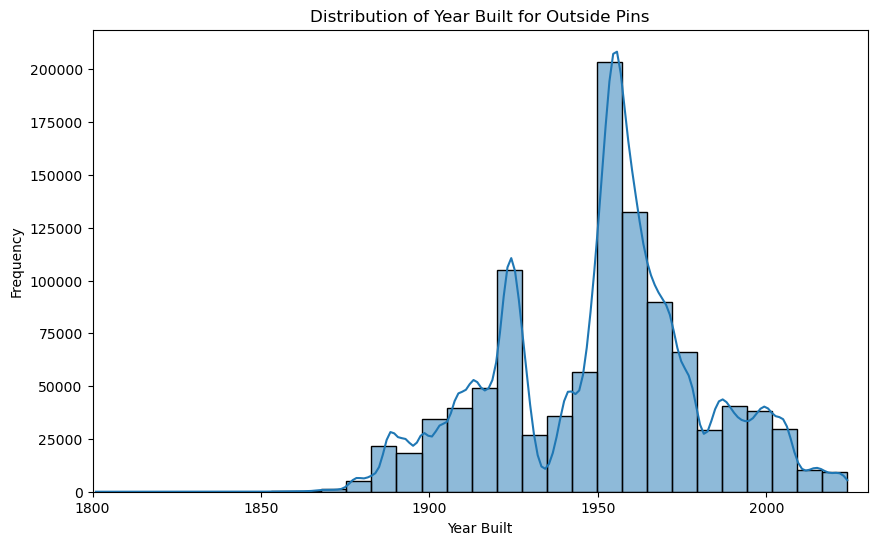

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot Year Built distribution with specified bins
plt.figure(figsize=(10,6))
sns.histplot(df['year_built'], bins=30, kde=True)

# Set x-axis limits and labels to focus on the range of year_built (1900 to 2025)
plt.xlim(1800, 2030)
plt.title("Distribution of Year Built for Outside Pins")
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.show()

In [53]:
# Construction Quality & Repair Condition distribution
print("\nConstruction Quality Distribution:")
print(df['construction_quality'].value_counts())


Construction Quality Distribution:
construction_quality
Average    1030965
Deluxe       10935
Poor           711
Name: count, dtype: int64


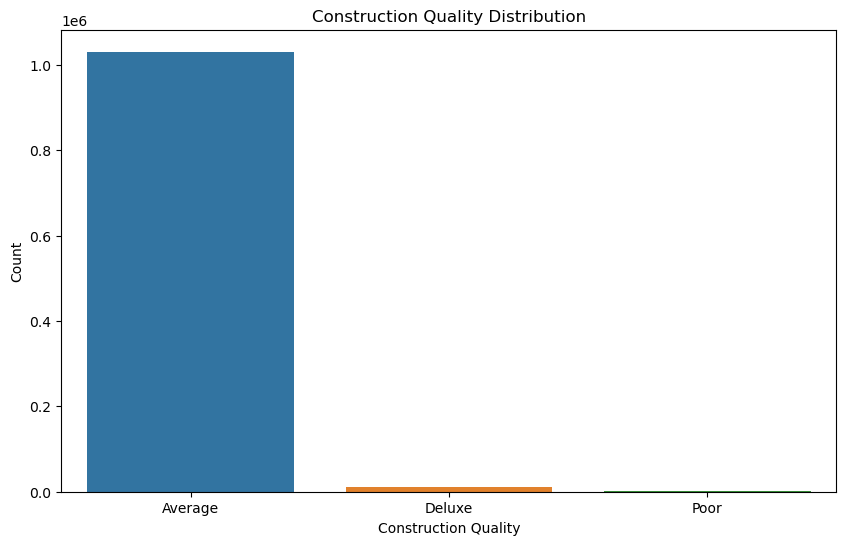

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x='construction_quality', data=df)
plt.title("Construction Quality Distribution")
plt.xlabel("Construction Quality")
plt.ylabel("Count")
plt.show()


Repair Condition Distribution:
repair_condition
Average          1028961
Above Average       8870
Below Average       4961
Name: count, dtype: int64


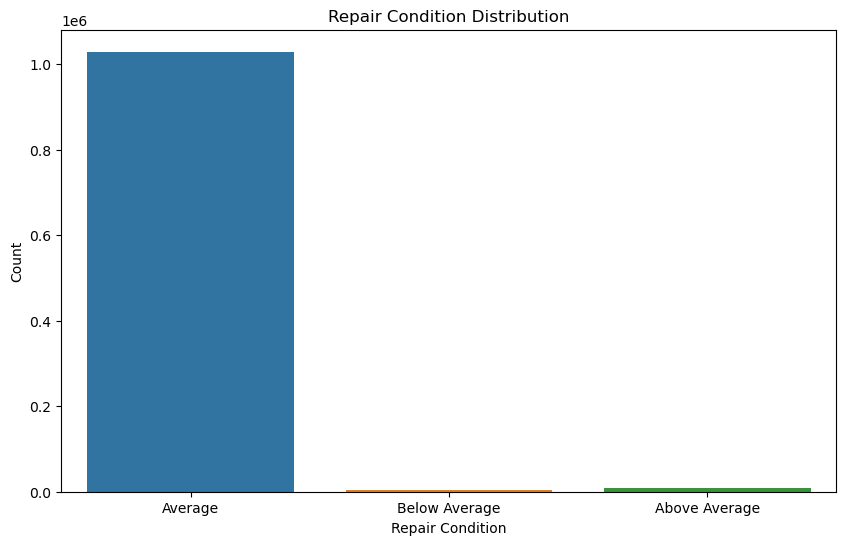

In [55]:
print("\nRepair Condition Distribution:")
print(df['repair_condition'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(x='repair_condition', data=df)
plt.title("Repair Condition Distribution")
plt.xlabel("Repair Condition")
plt.ylabel("Count")
plt.show()

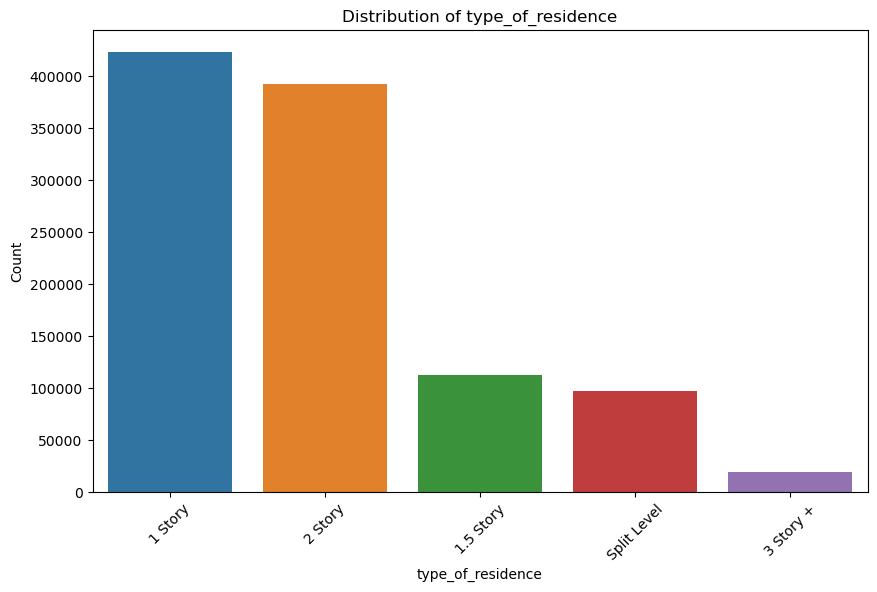

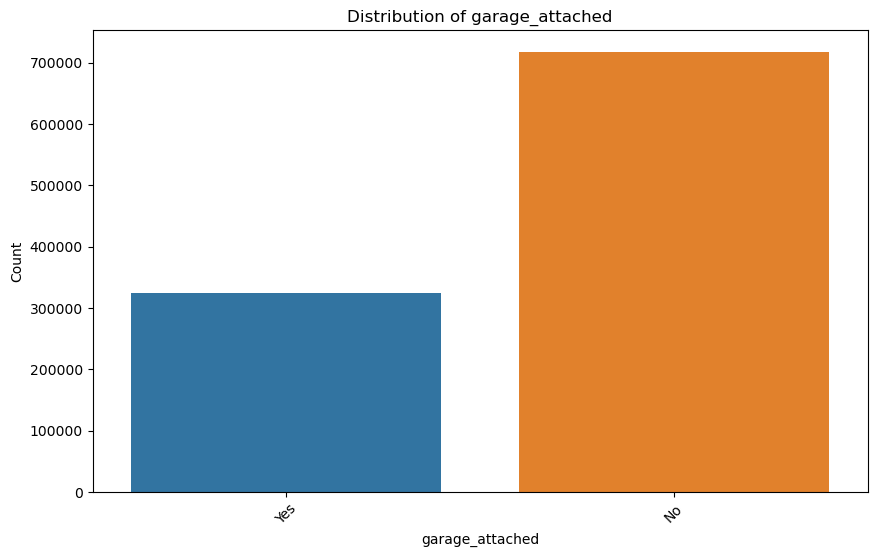

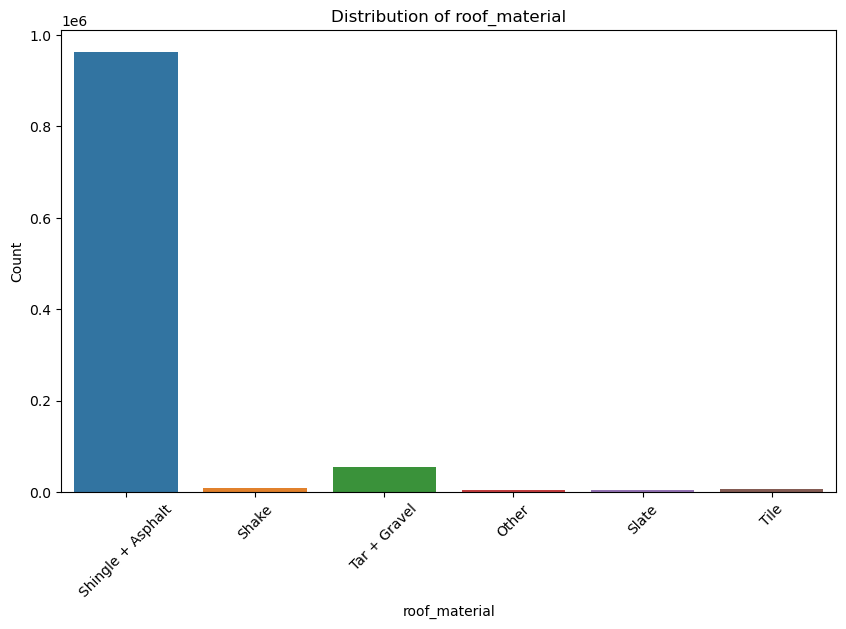

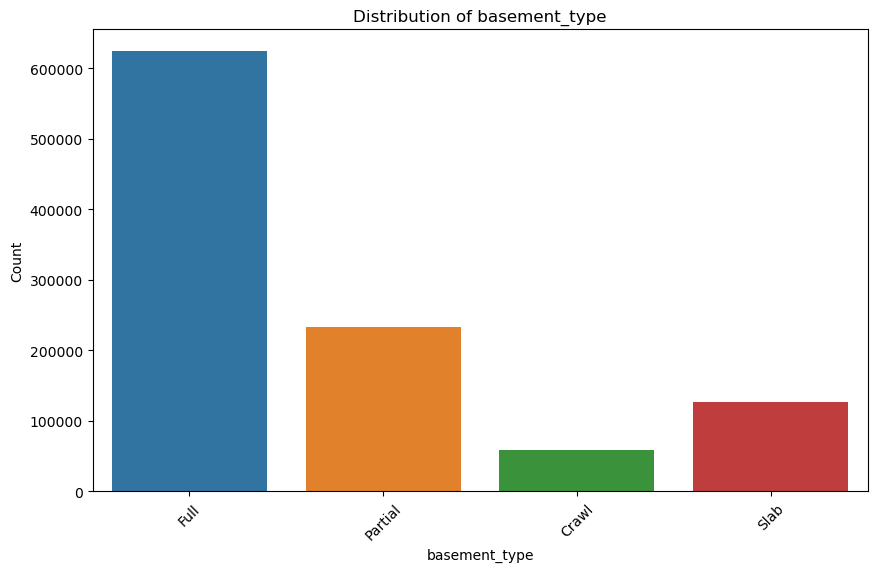

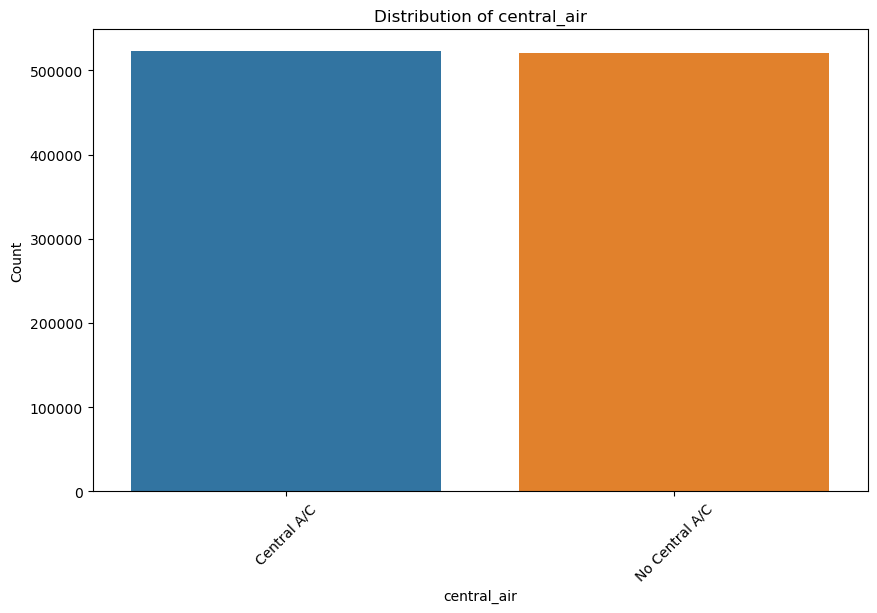

In [56]:
# 4. Categorical Variables Analysis
categorical_columns = ['type_of_residence', 'garage_attached', 'roof_material', 'basement_type', 'central_air']

# Plot distribution of categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [57]:
# 5. Generate Summary of Insights
print("\nKey Insights:")
print(f"- Average building square footage: {df['building_sqft'].mean()} sq ft")
print(f"- Average number of bedrooms: {df['num_bedrooms'].mean()}")
print(f"- Proportion with garages: {df['garage_attached'].value_counts(normalize=True).get('Yes', 0)}")
print(f"- Proportion with central air: {df['central_air'].value_counts(normalize=True).get('Yes', 0)}")


Key Insights:
- Average building square footage: 1781.6743826553754 sq ft
- Average number of bedrooms: 3.487387479826201
- Proportion with garages: 0.31148921218311926
- Proportion with central air: 0


## Visualizing all pins on map

In [65]:
import pandas as pd

# Load the datasets
pin_lat_long = pd.read_csv("pin_lat_long.csv")  
filtered_highdensity = pd.read_csv("filtered_high_density_zoning.csv")  

# Create a new column for matching pins in filtered_highdensity
filtered_highdensity["in_connected_community"] = "inside"

# Merge datasets on 'pin' (left join to retain all rows in pin_lat_long)
pin_lat_long = pin_lat_long.merge(filtered_highdensity[['pin', 'in_connected_community']], on='pin', how='left')

# Fill NaN values with "outside" for pins not in filtered_highdensity
pin_lat_long["in_connected_community"] = pin_lat_long["in_connected_community"].fillna("outside")

# Save the updated file
output_file = "pin_lat_long_in_out.csv"
pin_lat_long.to_csv(output_file, index=False)

print(f"Updated dataset saved: {output_file}")

Updated dataset saved: pin_lat_long_in_out.csv


In [66]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = "pin_lat_long_in_out.csv"
df = pd.read_csv(file_path)

# Separate inside and outside pins
inside_pins = df[df['in_connected_community'] == 'inside']
outside_pins = df[df['in_connected_community'] == 'outside'].sample(n=50000, random_state=42)  # Sampling 50K outside pins for better visualization

# Create a base map centered at an approximate location (Chicago area)
m = folium.Map(location=[41.88, -87.63], zoom_start=10)

# Add marker clusters for inside and outside pins
inside_cluster = MarkerCluster(name="Inside Community").add_to(m)
outside_cluster = MarkerCluster(name="Outside Community").add_to(m)

# Add markers for inside pins
for _, row in inside_pins.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7
    ).add_to(inside_cluster)

# Add markers for outside pins
for _, row in outside_pins.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7
    ).add_to(outside_cluster)

# Add layer control to toggle inside/outside pins
folium.LayerControl().add_to(m)

# Save the map as an HTML file
map_file = "diff_in_out_cc.html"
m.save(map_file)

print(f"Map has been saved successfully at: {map_file}")

ValueError: Location values cannot contain NaNs.

In [67]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = "pin_lat_long_in_out.csv"
df = pd.read_csv(file_path)

# Separate inside and outside pins
inside_pins = df[df['in_connected_community'] == 'inside']
outside_pins = df[df['in_connected_community'] == 'outside'].sample(n=50000, random_state=42)  # Sampling 50K outside pins for better visualization

# Drop rows with missing coordinates
inside_pins = inside_pins.dropna(subset=["latitude", "longitude"])
outside_pins = outside_pins.dropna(subset=["latitude", "longitude"])

# Create a base map centered at an approximate location (Chicago area)
m = folium.Map(location=[41.88, -87.63], zoom_start=10)

# Add marker clusters for inside and outside pins
inside_cluster = MarkerCluster(name="Inside Community").add_to(m)
outside_cluster = MarkerCluster(name="Outside Community").add_to(m)

# Add markers for inside pins
for _, row in inside_pins.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7
    ).add_to(inside_cluster)

# Add markers for outside pins
for _, row in outside_pins.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7
    ).add_to(outside_cluster)

# Add layer control to toggle inside/outside pins
folium.LayerControl().add_to(m)

# Save the map as an HTML file
map_file = "diff_in_out_cc.html"
m.save(map_file)

print(f"Map has been saved successfully at: {map_file}")


Map has been saved successfully at: diff_in_out_cc.html


In [77]:
## Exploring Inside Communities

🔹 Summary Statistics (Numerical):

       building_sqft      land_sqft     year_built   num_bedrooms
count  163300.000000  163300.000000  163300.000000  163300.000000
mean     3038.348647    3344.896938    1928.576779       5.026748
std      2503.859244    3615.595345      44.249606       2.972789
min        -1.000000      -1.000000      -1.000000      -1.000000
25%      1760.000000    2592.000000    1894.000000       3.000000
50%      2480.000000    3125.000000    1910.000000       4.000000
75%      3694.000000    3750.000000    1962.000000       6.000000
max    309180.000000  584880.000000    2024.000000      90.000000


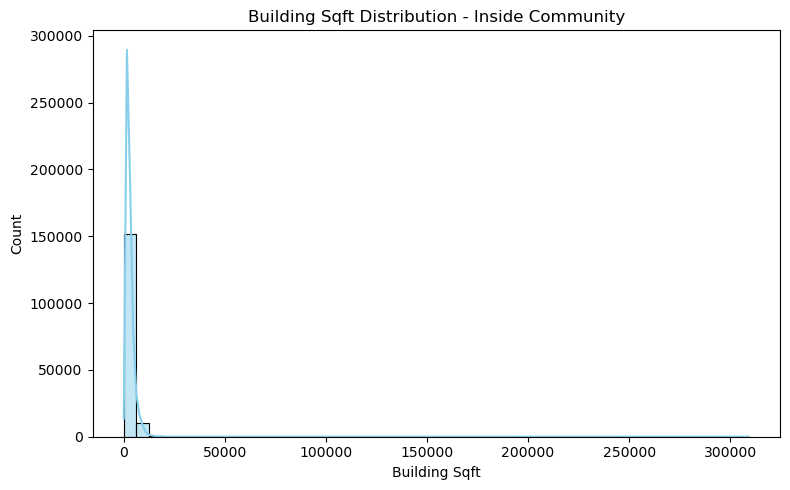

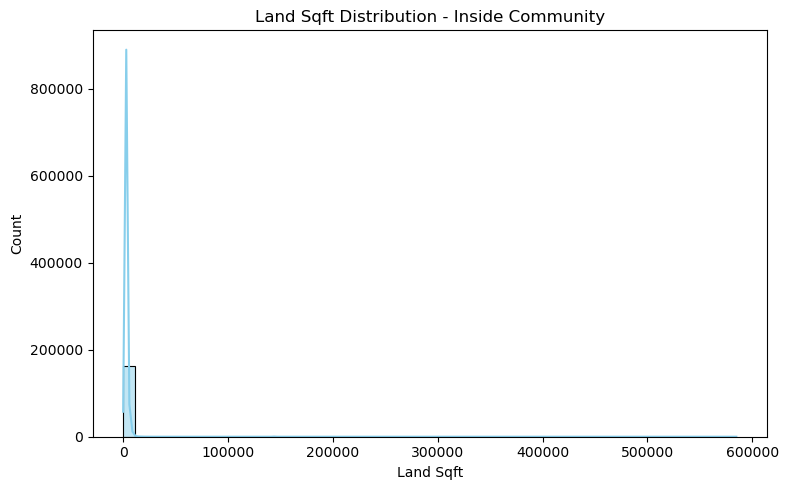

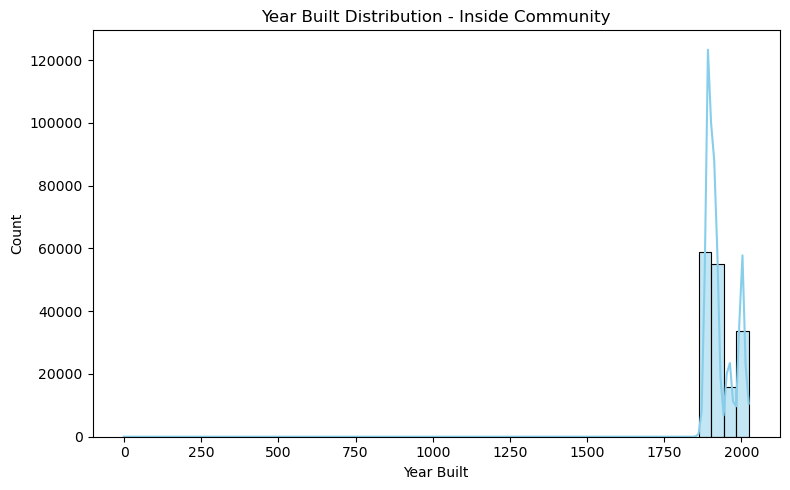

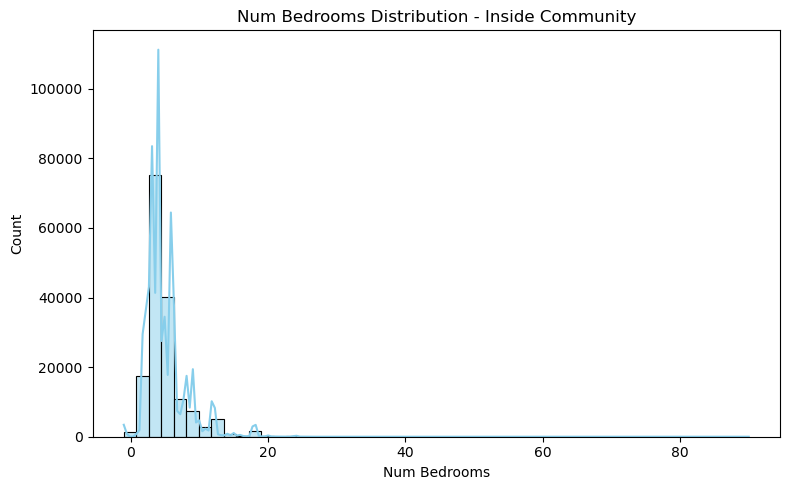

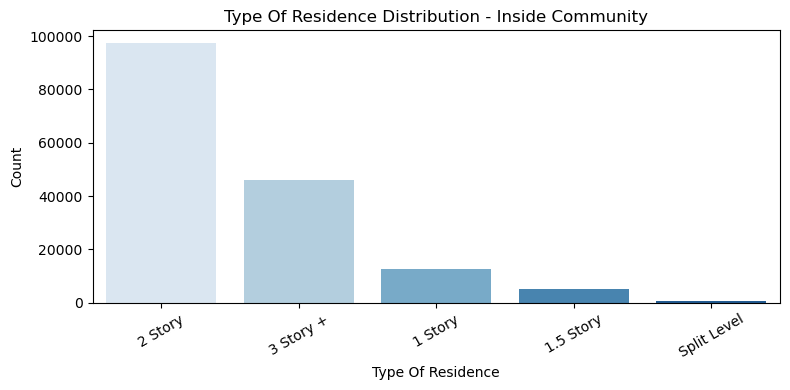


🔹 Value Counts for type_of_residence:

type_of_residence
2 Story        97282
3 Story +      46178
1 Story        12810
1.5 Story       5288
NaN             1106
Split Level      636
Name: count, dtype: int64
--------------------------------------------------


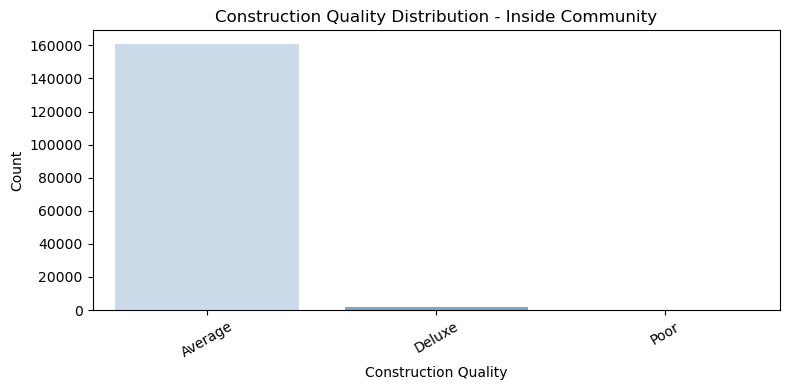


🔹 Value Counts for construction_quality:

construction_quality
Average    161048
Deluxe       1994
Poor          258
Name: count, dtype: int64
--------------------------------------------------


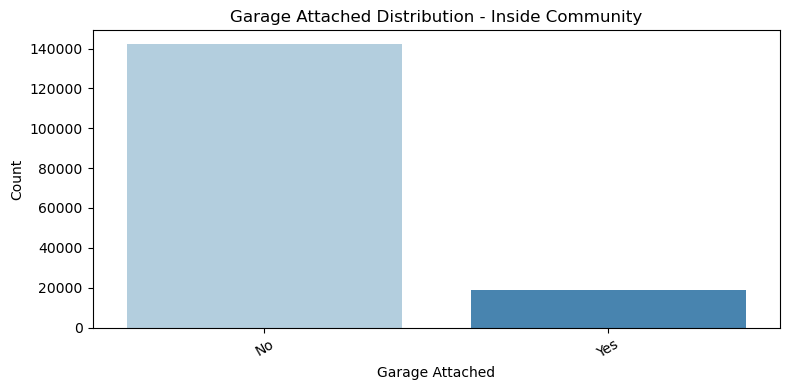


🔹 Value Counts for garage_attached:

garage_attached
No     142046
Yes     18646
NaN      2608
Name: count, dtype: int64
--------------------------------------------------


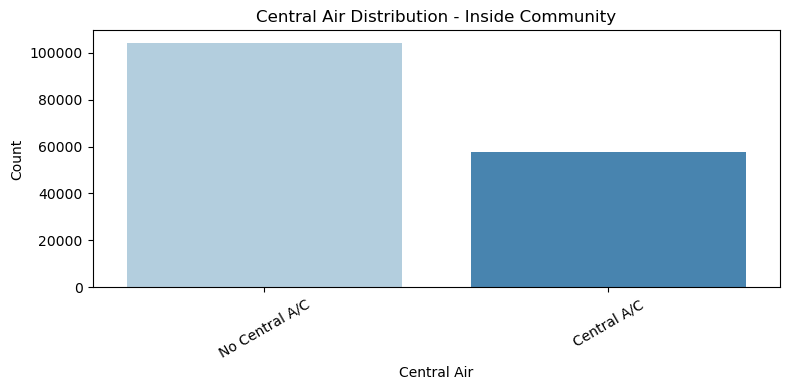


🔹 Value Counts for central_air:

central_air
No Central A/C    104234
Central A/C        57806
NaN                 1260
Name: count, dtype: int64
--------------------------------------------------


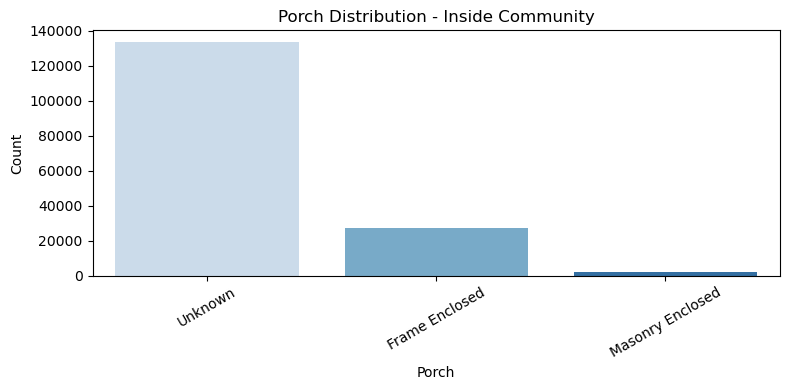


🔹 Value Counts for porch:

porch
Unknown             133516
Frame Enclosed       27544
Masonry Enclosed      2240
Name: count, dtype: int64
--------------------------------------------------


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare inside community data
inside_df = pd.read_csv("processed_connected_community_data.csv")
cc_status_df = pd.read_csv("unique_pins_with_cc_status.csv", dtype={"pin": str})
inside_df["pin"] = inside_df["pin"].astype(str).str.strip()
cc_status_df["pin"] = cc_status_df["pin"].astype(str).str.strip()
inside_df = pd.merge(inside_df, cc_status_df[["pin", "in_connected_community"]], on="pin", how="left")
inside_df = inside_df[inside_df["in_connected_community"] == "inside"]

# Convert numerics
numeric_cols = ["building_sqft", "land_sqft", "year_built", "num_bedrooms"]
inside_df[numeric_cols] = inside_df[numeric_cols].apply(pd.to_numeric, errors="coerce")
inside_df.dropna(subset=numeric_cols, inplace=True)

# Summary stats
print("🔹 Summary Statistics (Numerical):\n")
print(inside_df[numeric_cols].describe())

# Histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(inside_df[col], bins=50, kde=True, color="skyblue")
    plt.title(f"{col.replace('_', ' ').title()} Distribution - Inside Community")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Explore categorical features
cat_features = ["type_of_residence", "construction_quality", "garage_attached", "central_air", "porch"]
for col in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=inside_df, x=col, order=inside_df[col].value_counts().index, palette="Blues")
    plt.title(f"{col.replace('_', ' ').title()} Distribution - Inside Community")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    print(f"\n🔹 Value Counts for {col}:\n")
    print(inside_df[col].value_counts(dropna=False))
    print("-" * 50)


C:\Users\usman\AppData\Local\Temp\ipykernel_6260\316196048.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  outside_df = pd.read_csv("processed_outside_community_data.csv")


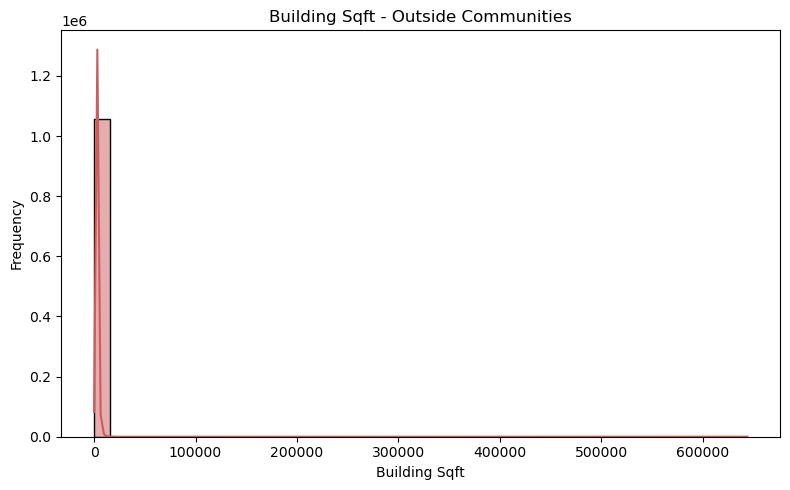

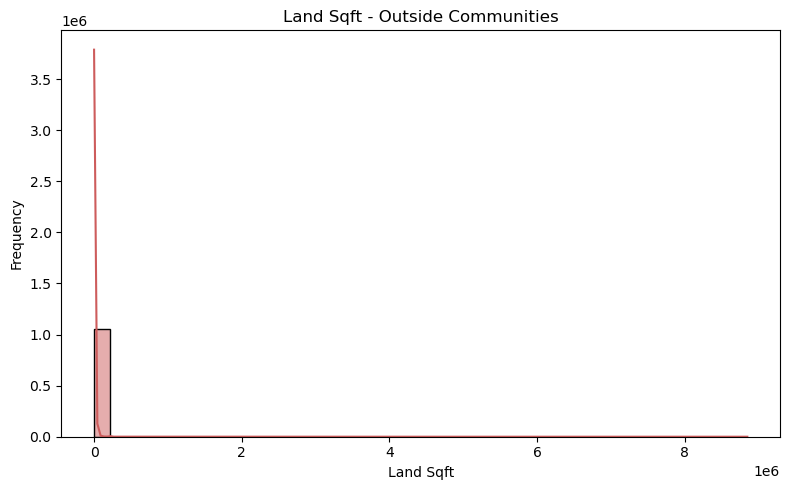

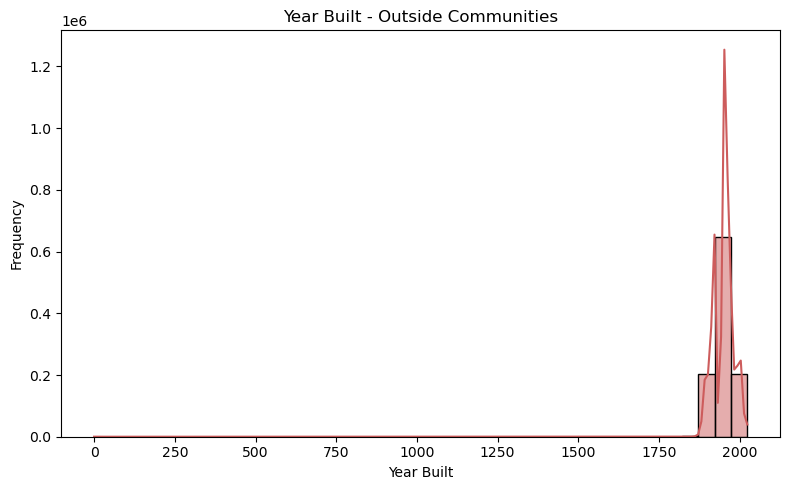

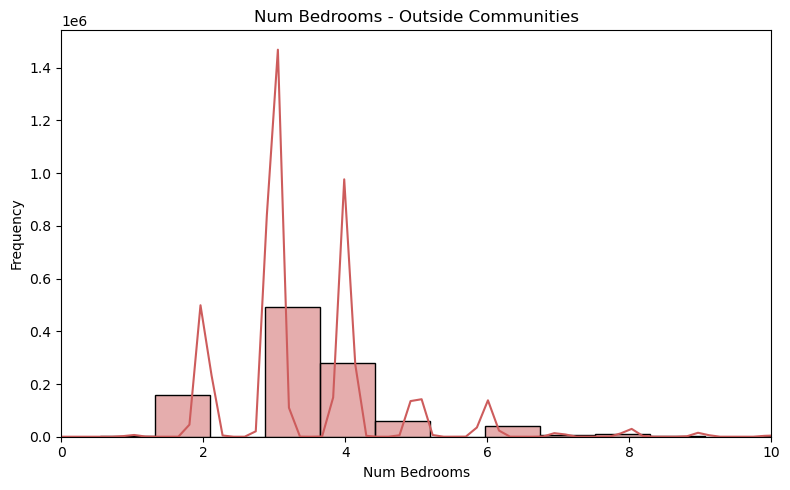

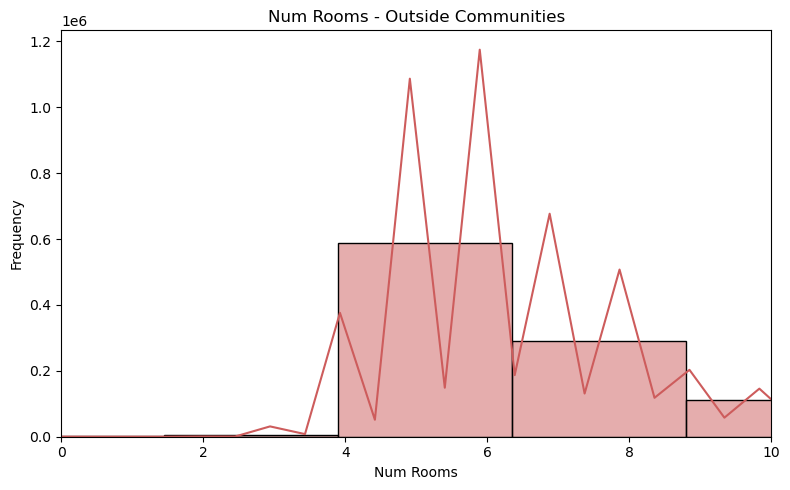

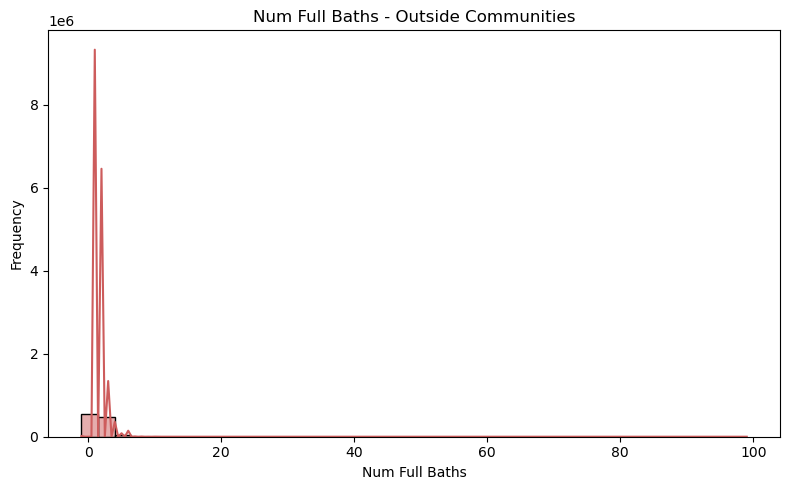

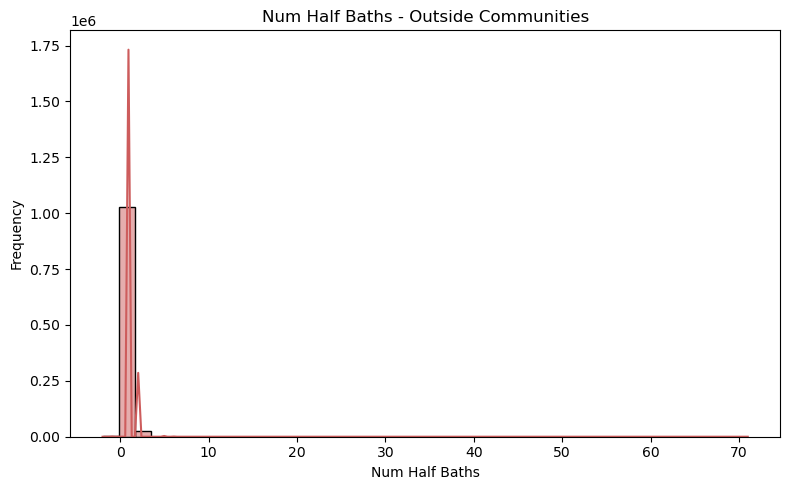

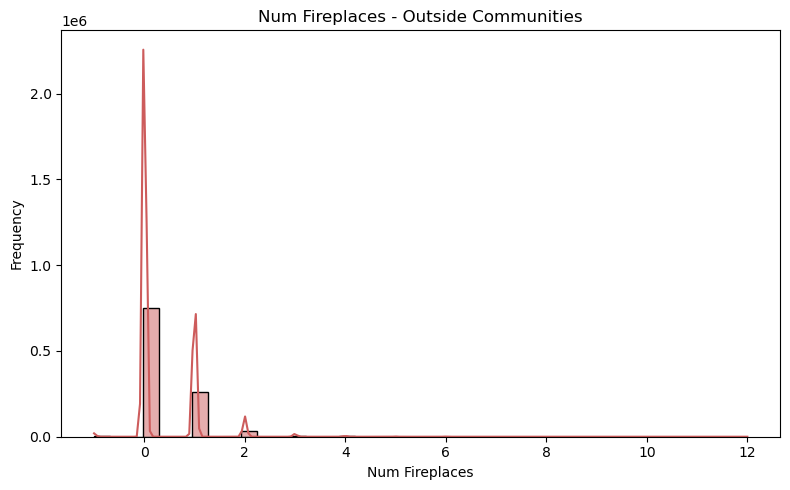

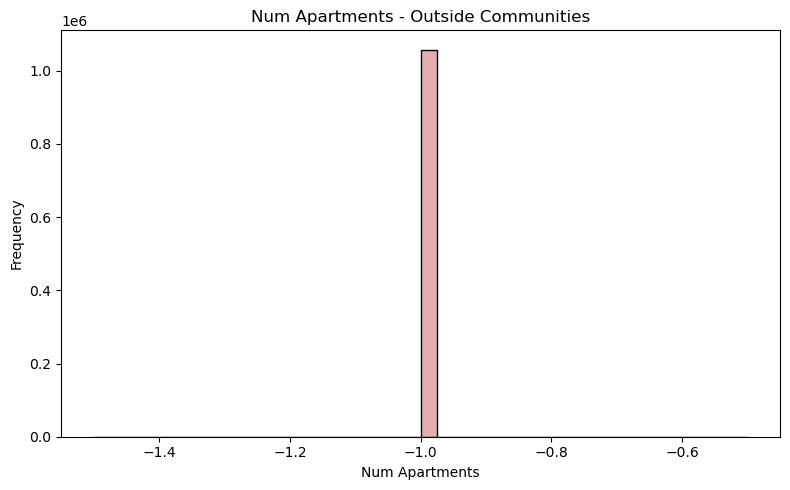

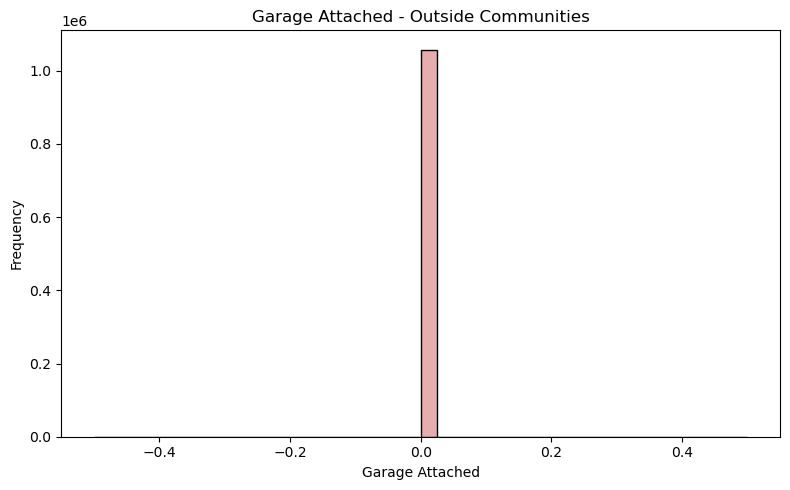

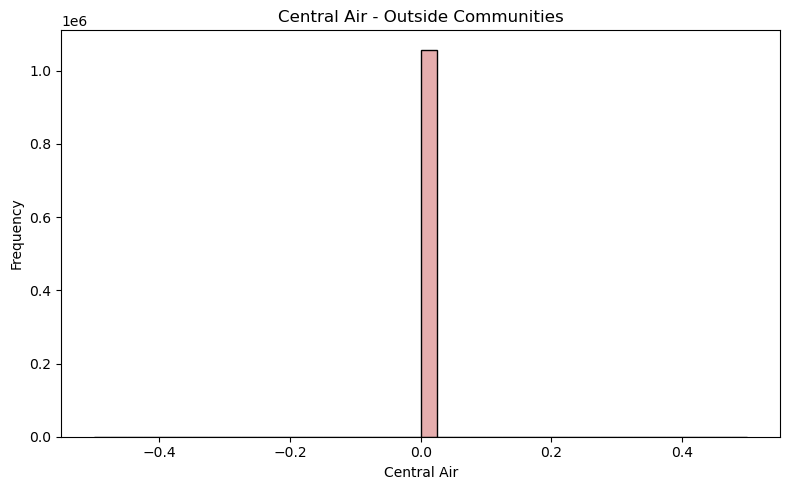

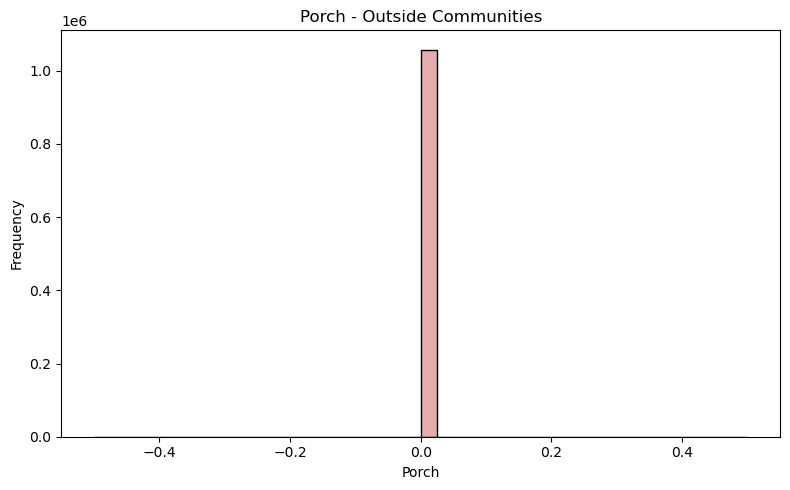

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load outside community data
outside_df = pd.read_csv("processed_outside_community_data.csv")
cc_status_df = pd.read_csv("unique_pins_with_cc_status.csv", dtype={"pin": str})

# Standardize PIN format
outside_df["pin"] = outside_df["pin"].astype(str).str.strip()
cc_status_df["pin"] = cc_status_df["pin"].astype(str).str.strip()

# Merge to label with community status and filter to only "outside"
outside_df = pd.merge(outside_df, cc_status_df[["pin", "in_connected_community"]], on="pin", how="left")
outside_df = outside_df[outside_df["in_connected_community"] == "outside"]

# Convert numerical features
num_cols = [
    "building_sqft", "land_sqft", "year_built",
    "num_bedrooms", "num_rooms", "num_full_baths",
    "num_half_baths", "num_fireplaces", "num_apartments"
]
outside_df[num_cols] = outside_df[num_cols].apply(pd.to_numeric, errors="coerce")
outside_df.dropna(subset=num_cols, inplace=True)

# Binary features: convert to 0/1
binary_cols = ["garage_attached", "central_air", "porch"]
for col in binary_cols:
    outside_df[col] = outside_df[col].map({"Y": 1, "N": 0})
    outside_df[col] = outside_df[col].fillna(0)

# Combine all for plotting
plot_cols = num_cols + binary_cols

# Histogram plotting loop with axis control
for col in plot_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(outside_df[col], kde=True, bins=40, color="indianred")

    # Add x-axis limit for bedrooms and rooms
    if col in ["num_bedrooms", "num_rooms"]:
        plt.xlim(0, 10)

    plt.title(f"{col.replace('_', ' ').title()} - Outside Communities")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [81]:
## Side-by-Side Comparison on Same Axes


C:\Users\usman\AppData\Local\Temp\ipykernel_6260\2950096254.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  outside_df = pd.read_csv("processed_outside_community_data.csv")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


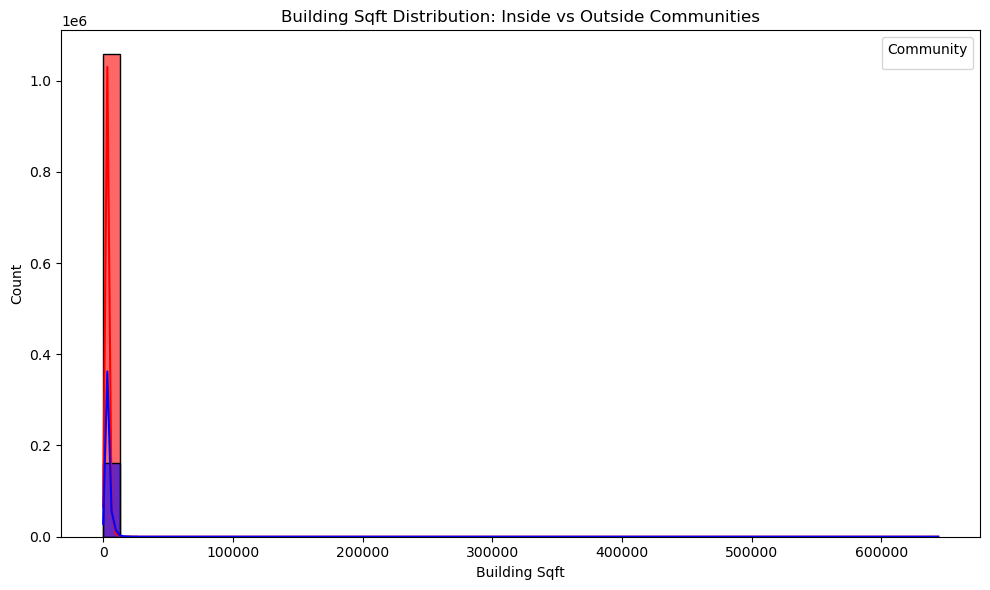

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


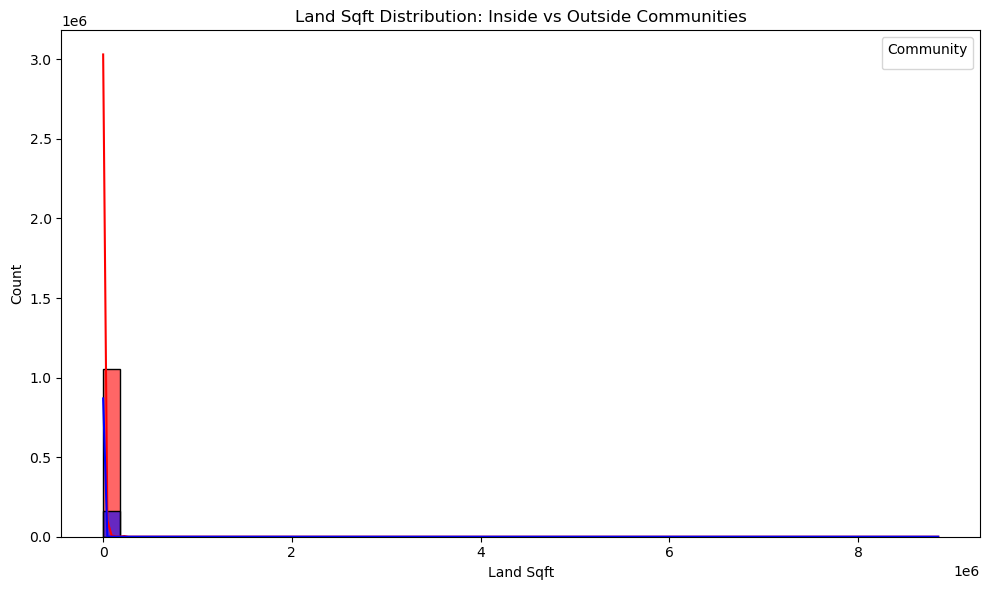

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


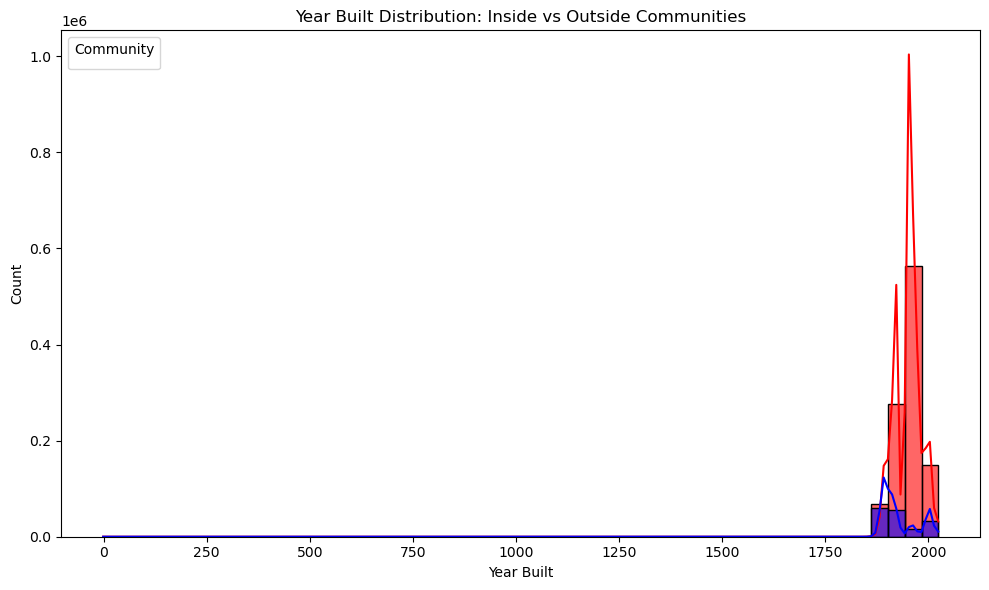

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


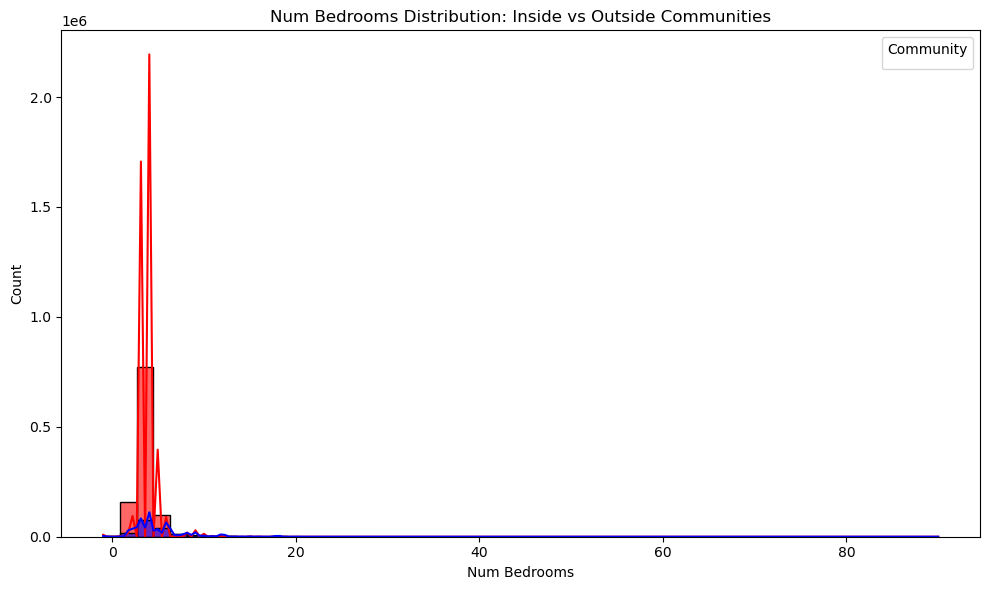

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


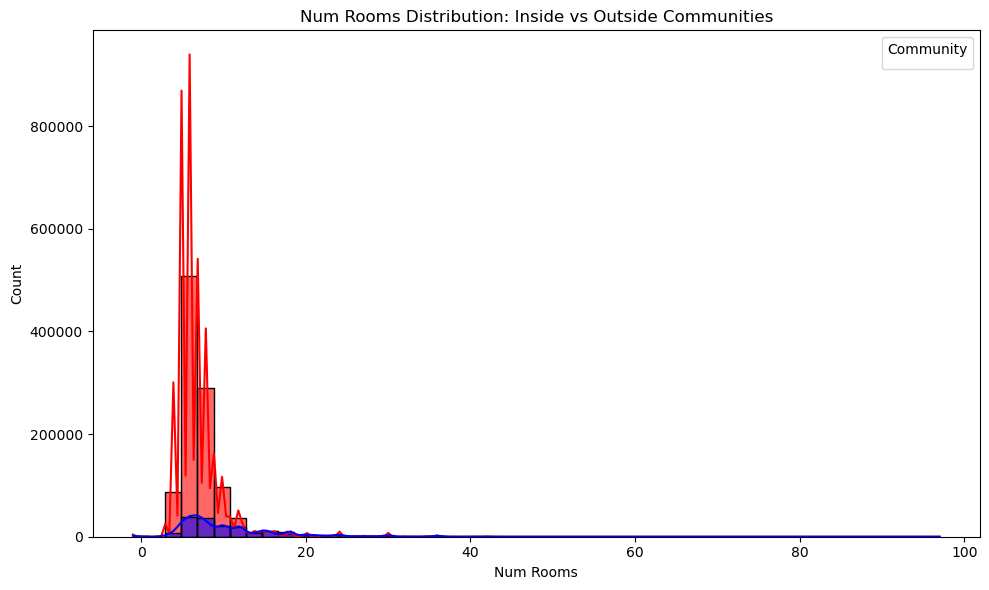

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


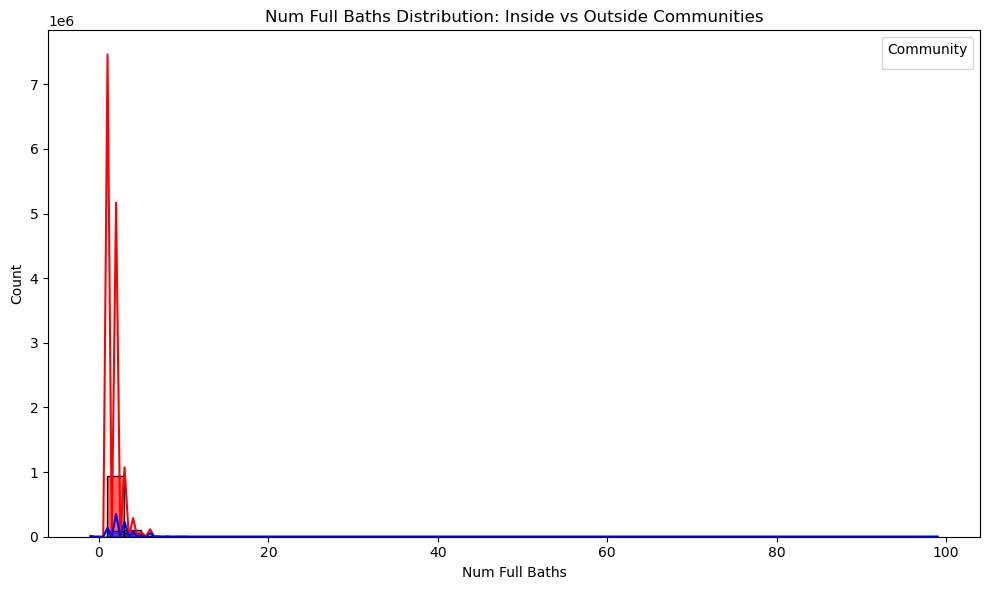

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


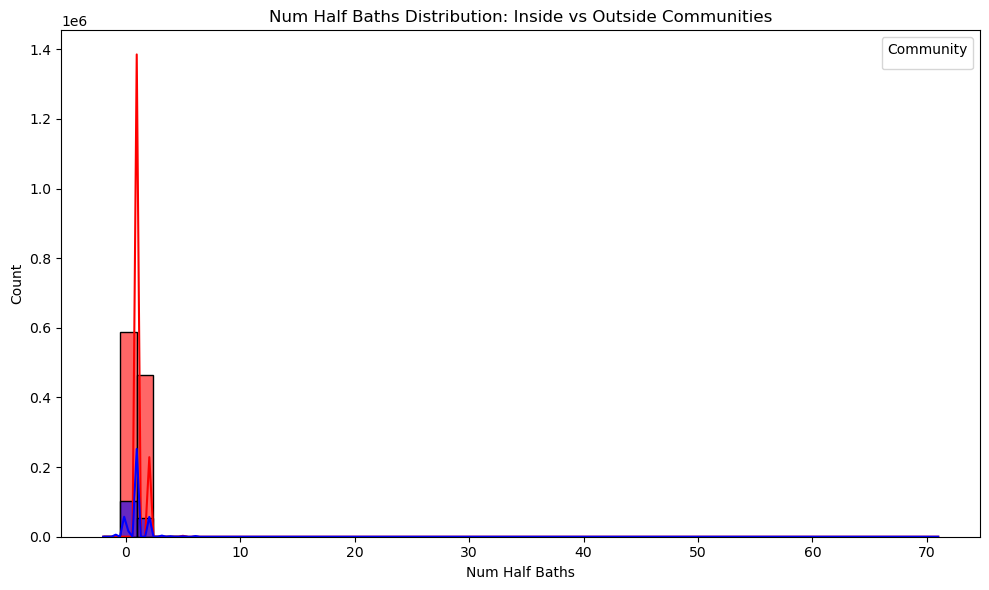

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


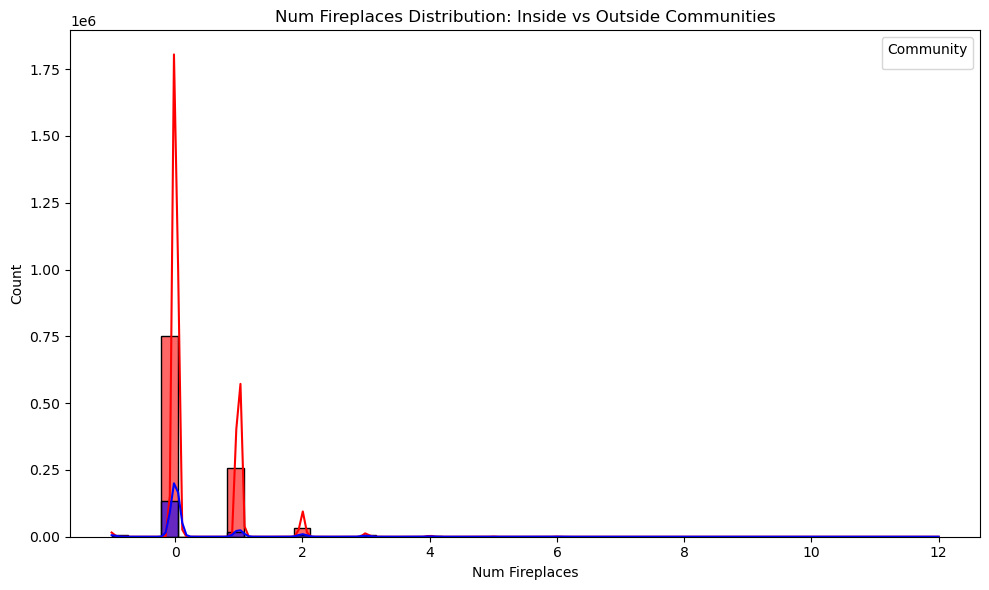

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

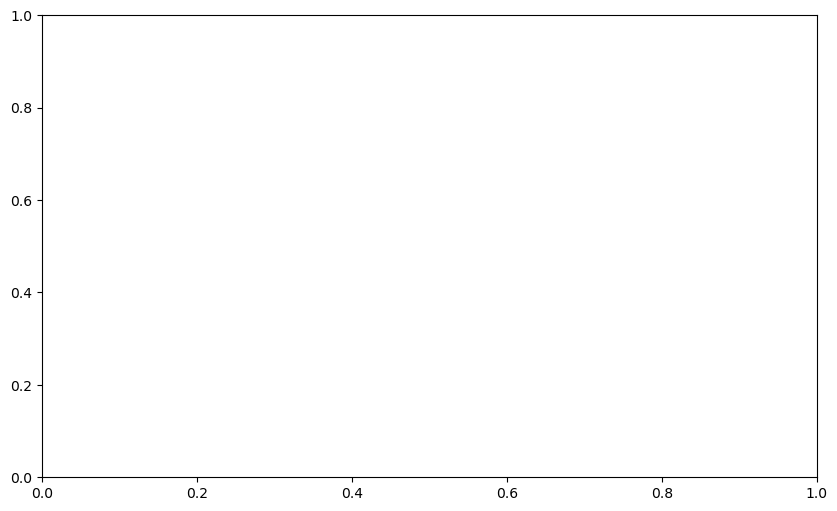

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
inside_df = pd.read_csv("processed_connected_community_data.csv")
outside_df = pd.read_csv("processed_outside_community_data.csv")
cc_status_df = pd.read_csv("unique_pins_with_cc_status.csv", dtype={"pin": str})

# Standardize PINs
for df in [inside_df, outside_df, cc_status_df]:
    df["pin"] = df["pin"].astype(str).str.strip()

# Merge in community labels
inside_df = pd.merge(inside_df, cc_status_df[["pin", "in_connected_community"]], on="pin", how="left")
outside_df = pd.merge(outside_df, cc_status_df[["pin", "in_connected_community"]], on="pin", how="left")

# Add a source label
inside_df["community_type"] = "Inside"
outside_df["community_type"] = "Outside"

# Combine both
combined_df = pd.concat([inside_df, outside_df], ignore_index=True)

# Convert numerics
numeric_cols = [
    "building_sqft", "land_sqft", "year_built",
    "num_bedrooms", "num_rooms", "num_full_baths",
    "num_half_baths", "num_fireplaces", "num_apartments"
]
combined_df[numeric_cols] = combined_df[numeric_cols].apply(pd.to_numeric, errors="coerce")
combined_df = combined_df.dropna(subset=numeric_cols)

# Plot overlayed histograms
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=combined_df, x=col, hue="community_type", bins=50, kde=True, palette=["blue", "red"], alpha=0.6)
    plt.title(f"{col.replace('_', ' ').title()} Distribution: Inside vs Outside Communities")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Count")
    plt.legend(title="Community")
    plt.tight_layout()
    plt.show()


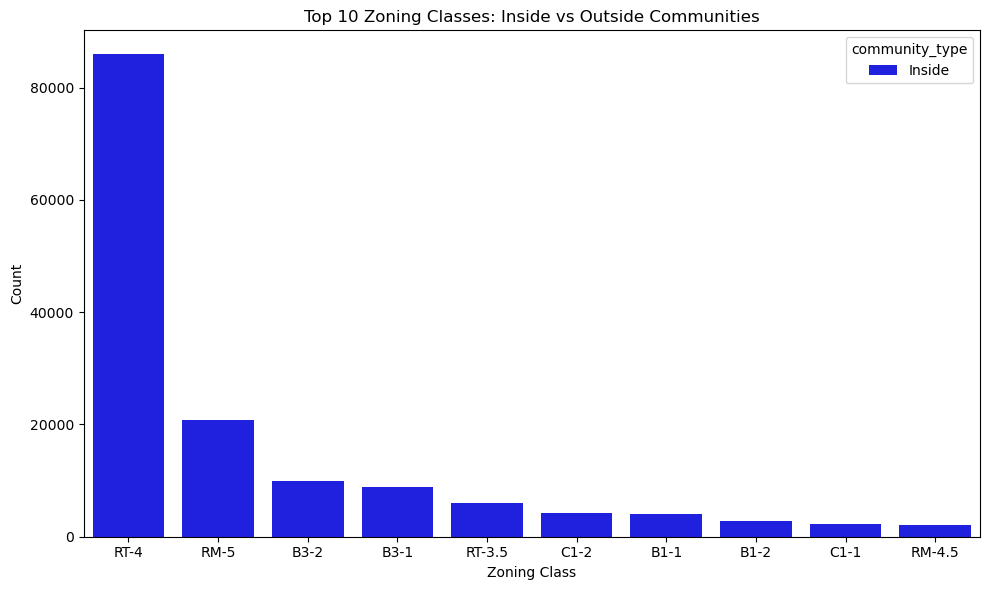

In [94]:
# Get top 10 most frequent zoning classes
# top 10 most common zoning classes across both communities:
# Remove NaNs and empty strings in ZONE_CLASS
df = df[df["ZONE_CLASS"].notna()]
df = df[df["ZONE_CLASS"] != "nan"]
df = df[df["ZONE_CLASS"] != ""]

# Get top 10 zoning classes
top_classes = df["ZONE_CLASS"].value_counts().head(10).index

# Filter to top classes only
top_df = df[df["ZONE_CLASS"].isin(top_classes)]

# Plot the cleaned chart
plt.figure(figsize=(10, 6))
sns.countplot(data=top_df, x="ZONE_CLASS", hue="community_type", order=top_classes, palette=["blue", "red"])
plt.title("Top 10 Zoning Classes: Inside vs Outside Communities")
plt.xlabel("Zoning Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


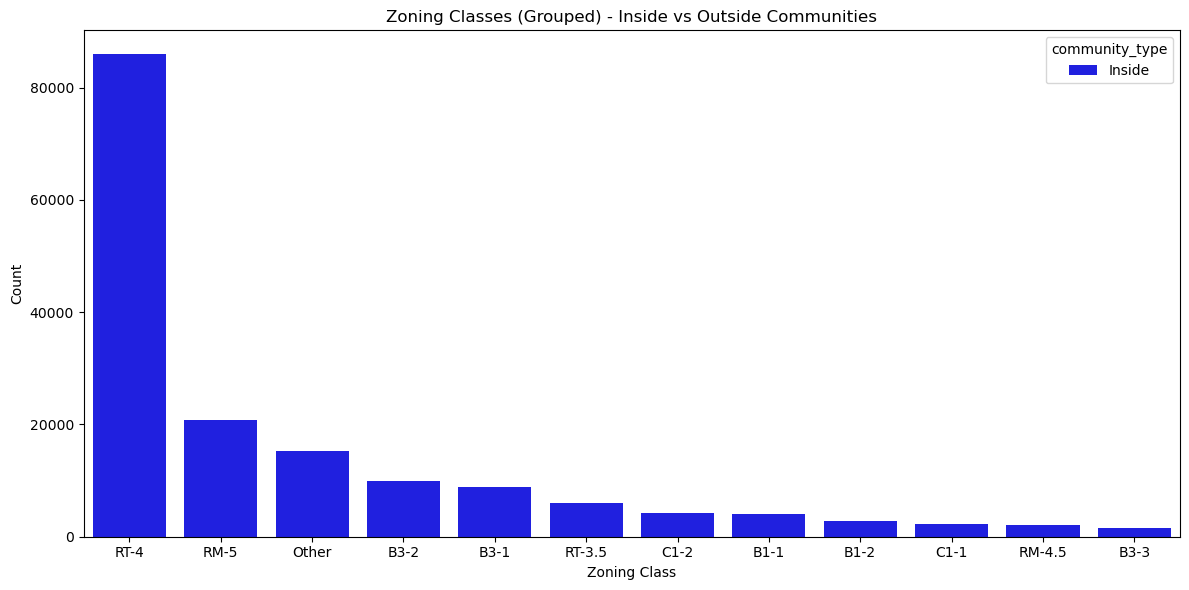

In [95]:
# Aggregate all minor zoning codes into "Other":
# Create a new column where rare classes are grouped
threshold = 1000  # minimum count to keep
zoning_counts = df["ZONE_CLASS"].value_counts()
df["ZONE_GROUPED"] = df["ZONE_CLASS"].apply(lambda x: x if zoning_counts[x] >= threshold else "Other")

# Plot grouped zoning classes
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="ZONE_GROUPED", hue="community_type", order=df["ZONE_GROUPED"].value_counts().index, palette=["blue", "red"])
plt.title("Zoning Classes (Grouped) - Inside vs Outside Communities")
plt.xlabel("Zoning Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\usman\AppData\Local\Temp\ipykernel_6260\3657852345.py:6: DtypeWarning: Columns (0,1,2,4,5,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,26,41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  inside_df = pd.read_csv("processed_connected_community_data.csv", nrows=50000)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


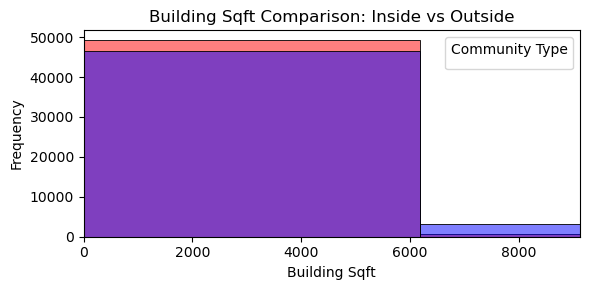

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


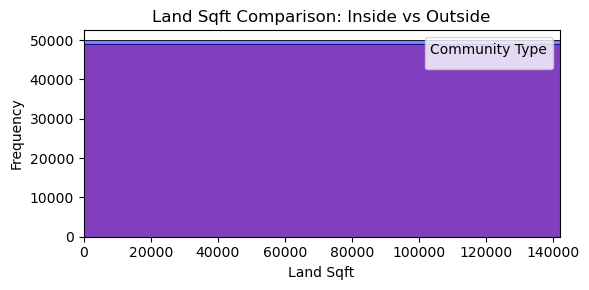

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


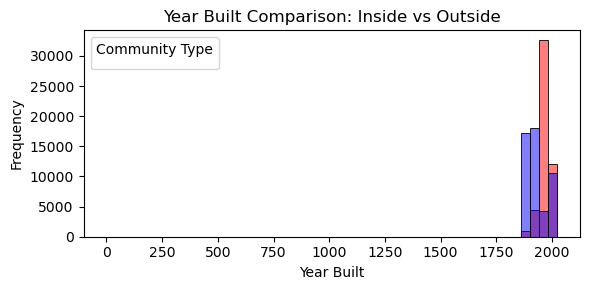

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


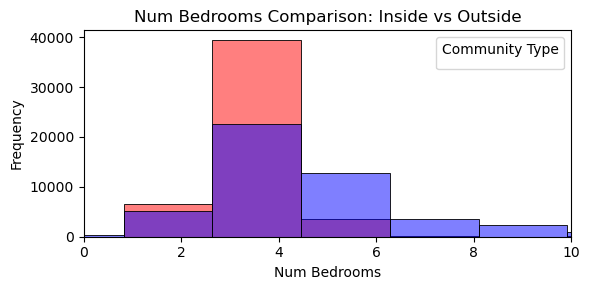

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load inside and outside datasets (sampled for performance)
inside_df = pd.read_csv("processed_connected_community_data.csv", nrows=50000)
outside_df = pd.read_csv("processed_outside_community_data.csv", nrows=50000)

# Add community labels
inside_df["community_type"] = "Inside"
outside_df["community_type"] = "Outside"

# Combine
df = pd.concat([inside_df, outside_df], ignore_index=True)

# Property features
features = ["building_sqft", "land_sqft", "year_built", "num_bedrooms"]
df[features] = df[features].apply(pd.to_numeric, errors="coerce")
df.dropna(subset=features, inplace=True)

# Plot histograms
for col in features:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, hue="community_type", bins=50, palette=["blue", "red"], alpha=0.5)

    # Set x-axis limits where appropriate
    if col == "num_bedrooms":
        plt.xlim(0, 10)
    elif col in ["building_sqft", "land_sqft"]:
        plt.xlim(0, df[col].quantile(0.99))  # exclude extreme outliers

    plt.title(f"{col.replace('_', ' ').title()} Comparison: Inside vs Outside")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.legend(title="Community Type")
    plt.tight_layout()
    plt.show()


### Key Insights
Inside communities have more large buildings (>6000 sq ft).
Outside communities mostly have smaller to medium-sized buildings.

Land size distribution is very similar for both groups.
Slightly wider spread in inside communities.

Inside communities have more older/historic buildings.
Outside communities have more modern constructions (1900s–2000s).

Inside communities have more large homes (5+ bedrooms).
Outside communities are concentrated around 2–4 bedrooms.

